## I want to create accurate confidence intervals for synapse samples

Specifically, take a random sample of presynaptic cells from a certain subclass, and ask what percent of its synapses are onto neurons of a certain subclass. The synapses are not independent however, because there are often many synapses between two neurons.

Moreover, the large counts assumption is often violated for the standard error of proportion formula, so the sampling distribution is not normal and has an unkown standard deviation.

In [2]:
%load_ext autoreload
%autoreload 2

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import json
from tqdm import tqdm

from confidence_intervals import get_probs_of_p_hat, get_CI, get_CI_of_p

In [4]:
n_ps = 100  # number of values of parameter p to use (between 0 and 1) to find most likely p given p-hat
ps = np.linspace(0.5/n_ps, 1 - 0.5/n_ps, n_ps)
p_edges = np.linspace(0, 1, n_ps + 1)

In [174]:
for sample_size in tqdm(range(2, 500)):    
    num_successes = np.arange(0, sample_size + 1)
    probs_of_p_hat = get_probs_of_p_hat(sample_size, num_successes, ps=ps, n_trials=10_000)
    # because of uniform prior, the probability of p_hat given p, is the probability of p given p_hat after normalization
    probs_of_p = probs_of_p_hat / np.sum(probs_of_p_hat, axis=0)
    for j, nsuc in enumerate(num_successes):
        CI = get_CI(p_edges, probs_of_p[:, j], confidence=0.95)
        print(CI)
        CIs[f"{int(sample_size)}|{int(nsuc)}"] = (float(CI[0]), float(CI[1]))

  0%|▏                                                                               | 1/498 [00:10<1:28:44, 10.71s/it]

(0.008408847591152414, 0.7072165898617512)
(0.0943435836782969, 0.9060568862275447)
(0.2915624270711786, 0.9915822388361284)


  0%|▎                                                                               | 2/498 [00:22<1:33:19, 11.29s/it]

(0.006341789153573248, 0.6015316188870192)
(0.06727185469580631, 0.8062133947939264)
(0.19458333333333339, 0.9330252976190473)
(0.3988919642857144, 0.9936643821707787)


  1%|▍                                                                               | 3/498 [00:34<1:34:32, 11.46s/it]

(0.005097513022163216, 0.5195089792060493)
(0.0519566811515481, 0.7160986421725217)
(0.1454168545659527, 0.853108660998937)
(0.2828290297339594, 0.9472104041507371)
(0.4777000000000001, 0.9948897786391921)


  1%|▋                                                                               | 4/498 [00:44<1:32:19, 11.21s/it]

(0.004255832992222679, 0.4602030905077254)
(0.0428308391234634, 0.6419268060836498)
(0.11841728525980914, 0.7766802670623132)
(0.22166273932253322, 0.882700787401575)
(0.359752566735113, 0.9565891246684354)
(0.5409680412371135, 0.9957406970784213)


  1%|▊                                                                               | 5/498 [00:55<1:29:46, 10.93s/it]

(0.0036713873725409446, 0.40966122004357347)
(0.03639511986301372, 0.5780350790513824)
(0.09856552631578952, 0.7081264805414552)
(0.18283720112517585, 0.8163275735294118)
(0.2908011647254576, 0.9008937432578209)
(0.4205101744186047, 0.9637800965360591)
(0.5934530516431925, 0.9963280864197531)


  1%|▉                                                                               | 6/498 [01:06<1:29:24, 10.90s/it]

(0.0032355365474339053, 0.3677040441176456)
(0.03134346959122633, 0.526733966745843)
(0.08516365046535679, 0.6503914319248815)
(0.15668911719939121, 0.7555881622516551)
(0.2441581010452962, 0.8437624999999994)
(0.3505494555353903, 0.9150567956349215)
(0.47382643678160924, 0.9682885204081634)
(0.6318071933962265, 0.9967631128848347)


  1%|█                                                                               | 7/498 [01:16<1:27:44, 10.72s/it]

(0.00288163774290762, 0.33584000000000025)
(0.02780000000000002, 0.4815740259740275)
(0.07516491491491493, 0.6025922982885082)
(0.1361085298196949, 0.7000893749999998)
(0.21099063032367976, 0.7880289982425304)
(0.2997740274599543, 0.8636551593323218)
(0.4000720238095239, 0.925198118006104)
(0.5166167546174143, 0.972127226840855)
(0.6639280913978496, 0.9971036553660566)


  2%|█▎                                                                              | 8/498 [01:27<1:27:09, 10.67s/it]

(0.0026149455383326376, 0.3088530219780217)
(0.024675976884975245, 0.4450796398891962)
(0.06684426229508199, 0.554957627118644)
(0.12138241525423732, 0.6530880462724937)
(0.18777551020408167, 0.7379265033407572)
(0.26104666011787825, 0.8140206801470593)
(0.3495316985645934, 0.8782280876494015)
(0.44447242647058827, 0.9330367187499999)
(0.5533380829015545, 0.9749213698630137)
(0.6922611256544504, 0.9973826776184995)


  2%|█▍                                                                              | 9/498 [01:39<1:30:17, 11.08s/it]

(0.002390337986774433, 0.285827712609971)
(0.022736408782017777, 0.41224847094801037)
(0.060447658402203876, 0.5168714689265538)
(0.10819924242424242, 0.6115852601156043)
(0.1679091320072333, 0.6903656249999999)
(0.23161519114688134, 0.765921332046332)
(0.3082841494845361, 0.8308929227941169)
(0.39095784543325535, 0.8905898692810464)
(0.483708, 0.9398709262435679)
(0.5877236024844721, 0.9778184104627764)
(0.7141296012269939, 0.9976025000000001)


  2%|█▌                                                                             | 10/498 [01:50<1:31:36, 11.26s/it]

(0.002192058730659932, 0.2629189393939394)
(0.02098975686627646, 0.38523328267477125)
(0.054885945945945966, 0.4837122641509426)
(0.09941653094462546, 0.5707500000000015)
(0.15039212328767124, 0.654892857142857)
(0.21187770137524561, 0.7221668831168823)
(0.27688385826771666, 0.7884685567010319)
(0.3487555248618785, 0.8479764397905756)
(0.4267321958456974, 0.9007421874999998)
(0.5137483388704319, 0.945073969072165)
(0.6135186464088398, 0.979417865707434)
(0.7360206185567011, 0.9978047854959418)


  2%|█▋                                                                             | 11/498 [02:02<1:32:24, 11.38s/it]

(0.0020430649957519135, 0.2475467289719629)
(0.019104838709677434, 0.3605205479452057)
(0.050120940170940195, 0.45440572390572337)
(0.08991549844236763, 0.5370035816618912)
(0.13799572243346012, 0.6143165634674926)
(0.19390466531440168, 0.6855205479452051)
(0.25056506024096387, 0.7475223404255315)
(0.3168818051575932, 0.8076685222672068)
(0.3870638138138139, 0.86017981557377)
(0.4646195987654322, 0.9094283479349189)
(0.544688498402556, 0.9486381753764394)
(0.6411511976047904, 0.9809133157547791)
(0.7533699127906978, 0.997955950991832)


  2%|█▉                                                                             | 12/498 [02:13<1:31:24, 11.29s/it]

(0.0018992047395388577, 0.22872583081571007)
(0.017231242312423133, 0.33581756756756714)
(0.046492735470941904, 0.42803876582278577)
(0.08470340751043116, 0.5087205414012729)
(0.12714003590664277, 0.582574675324675)
(0.17805357142857148, 0.6487437500000004)
(0.22922613065326639, 0.7102999999999998)
(0.28758750000000005, 0.7685167064439133)
(0.3514660493827161, 0.8207728794642857)
(0.41782165605095545, 0.8724888059701489)
(0.4917873831775701, 0.917565696022727)
(0.5696547202797204, 0.9538311518324607)
(0.6629210122699387, 0.9826314894932014)
(0.7684810606060607, 0.9980997387224059)


  3%|██                                                                             | 13/498 [02:25<1:32:22, 11.43s/it]

(0.0017852320222912887, 0.21755279503105607)
(0.01570699831365937, 0.3191685855263164)
(0.0427929792979298, 0.40396357615893924)
(0.07717451298701301, 0.48128983050847474)
(0.11800998003992018, 0.5531736334405141)
(0.1633004115226338, 0.6156776315789475)
(0.21191450471698117, 0.6758753731343287)
(0.2656094632768362, 0.7358596605744125)
(0.32363108882521496, 0.7874423076923079)
(0.38362939297124604, 0.836391011235955)
(0.4492106164383562, 0.8816938976377949)
(0.5194396551724139, 0.9223615326251897)
(0.5949358108108108, 0.9566008188331625)
(0.6803796583850933, 0.984196520989074)
(0.7807311977715878, 0.9982129818533233)


  3%|██▏                                                                            | 14/498 [02:36<1:32:10, 11.43s/it]

(0.0016837300732442928, 0.20756384615384618)
(0.014812430786268, 0.3032482698961927)
(0.04038966116420506, 0.38148653198653243)
(0.07320732526881724, 0.4561480496453907)
(0.11053764805414554, 0.5247785947712417)
(0.15225256147540986, 0.5882413522012576)
(0.19771688311688315, 0.6436276923076923)
(0.24415814917127074, 0.6997831412103737)
(0.29830623100303955, 0.753062676056338)
(0.35403571428571434, 0.8038287401574801)
(0.4127334905660378, 0.8483860576923071)
(0.4754102990033223, 0.8897589285714284)
(0.5434071207430341, 0.927084345479082)
(0.6165796296296296, 0.959616769095698)
(0.6953553082191782, 0.985103512278698)
(0.7932375, 0.9983143180349062)


  3%|██▍                                                                            | 15/498 [02:47<1:31:22, 11.35s/it]

(0.0015821525148729061, 0.1945377358490569)
(0.013834108527131787, 0.2848617021276589)
(0.03801833527357394, 0.36564083333333314)
(0.06736798561151082, 0.4331688432835822)
(0.10254593495934962, 0.4994275244299678)
(0.14243619246861927, 0.5600591603053439)
(0.18573317865429234, 0.6175645645645638)
(0.22959206586826353, 0.6703702090592332)
(0.27945648734177225, 0.7226737536656898)
(0.3302917867435159, 0.7702022058823536)
(0.383226443768997, 0.8174511363636364)
(0.44012071917808226, 0.8572802144249516)
(0.5029763719512196, 0.8969038120567379)
(0.5648158844765344, 0.9319761549925488)
(0.636912457912458, 0.9619839743589744)
(0.712661496350365, 0.9860753513794898)
(0.8036617187500001, 0.9984124405276816)


  3%|██▌                                                                            | 16/498 [02:58<1:30:45, 11.30s/it]

(0.0015131321370309965, 0.18621091205211765)
(0.013093129770992374, 0.2756470588235301)
(0.035059664694280096, 0.3471149635036503)
(0.06348576158940399, 0.4153700716845864)
(0.09563365384615385, 0.4761612318840576)
(0.13313935281837164, 0.5332835144927536)
(0.17248809523809525, 0.5893689320388333)
(0.21577189265536725, 0.6413219298245612)
(0.26047976501305486, 0.6928199658703071)
(0.3061387043189369, 0.7390140750670239)
(0.35611792452830193, 0.7845346467391309)
(0.40962167300380237, 0.8269737394957988)
(0.4640384615384616, 0.866916996047431)
(0.5237301038062284, 0.9046148148148148)
(0.5867418699186993, 0.9356829436038517)
(0.652315331010453, 0.9645621814475023)
(0.7268183593750001, 0.9868541041041041)
(0.8129004702194358, 0.9984919416105926)


  3%|██▋                                                                            | 17/498 [03:09<1:29:14, 11.13s/it]

(0.0014357728017476807, 0.1769259868421057)
(0.012403855195110494, 0.25948561151079164)
(0.03326612127045237, 0.3309978902953596)
(0.06083189122373301, 0.39356538461538426)
(0.0915297202797203, 0.4573818897637799)
(0.12592694063926943, 0.5113744855967061)
(0.1624936194895592, 0.5660796232876723)
(0.20230197368421057, 0.617966088328076)
(0.24495099431818185, 0.6646535369774931)
(0.28755891719745225, 0.711460616438355)
(0.33463535031847136, 0.7547492211838)
(0.3835289735099338, 0.7979665450121657)
(0.43498745819398, 0.8366945727482676)
(0.48771500000000007, 0.8752992584745762)
(0.5424460784313726, 0.908718540268456)
(0.6043876953125, 0.9385983974358976)
(0.6691225099601594, 0.9662490645463049)
(0.739415306122449, 0.9877307600950118)
(0.824084935897436, 0.998553248603046)


  4%|██▊                                                                            | 18/498 [03:21<1:30:00, 11.25s/it]

(0.0013647698560913999, 0.16989723926380404)
(0.011767431399010353, 0.2503760330578514)
(0.03223921319796955, 0.3176687062937066)
(0.05732567353407291, 0.37846631205673753)
(0.08665731462925855, 0.43491729323308315)
(0.11965527577937653, 0.49194380733944976)
(0.1542018292682927, 0.5443369565217387)
(0.19098766233766237, 0.5932463099630997)
(0.23006865284974098, 0.6388894080996891)
(0.2716094720496895, 0.6864177740863785)
(0.3148535598705502, 0.7256515410958909)
(0.35961290322580647, 0.7681570680628268)
(0.4085434782608696, 0.808885101010101)
(0.45611775362318846, 0.8471908482142858)
(0.5102418032786886, 0.8810933583959902)
(0.5640915948275863, 0.9133084158415847)
(0.6200261732851986, 0.9432761136712753)
(0.6816457564575646, 0.9683608510638297)
(0.7502315436241611, 0.9881198090692124)
(0.831671630094044, 0.9986269645015936)


  4%|███                                                                            | 19/498 [03:32<1:29:48, 11.25s/it]

(0.001310312568787147, 0.1615549450549458)
(0.011484986351228393, 0.23879856115107795)
(0.03058099752679308, 0.3036355769230759)
(0.05421786723163842, 0.3636023206751043)
(0.08222756933115827, 0.41935590277777784)
(0.11138071570576544, 0.47280443548387163)
(0.14556856796116507, 0.5216699134199133)
(0.1806184210526316, 0.5720130111524165)
(0.2183982808022923, 0.6166631944444451)
(0.2572667253521127, 0.6612219101123592)
(0.2986007194244605, 0.6987029411764709)
(0.34145962199312724, 0.7419841666666671)
(0.38366698841698843, 0.7821060855263151)
(0.4307430830039526, 0.8182164705882352)
(0.47774501992031876, 0.8545573770491806)
(0.530149090909091, 0.8879340425531912)
(0.582249027237354, 0.9174662273476113)
(0.6339880952380953, 0.9460696428571429)
(0.696306768558952, 0.9691423996584116)
(0.7614443396226416, 0.9887955039096438)
(0.8375887096774194, 0.9986784210526316)


  4%|███▏                                                                           | 20/498 [03:44<1:30:33, 11.37s/it]

(0.001257311242077172, 0.15708362369337905)
(0.010732921207041076, 0.22949058219178065)
(0.028446322657176757, 0.2914215481171544)
(0.05177383790226461, 0.34957879377431944)
(0.07727607361963192, 0.4032217194570131)
(0.10735937500000002, 0.451892857142857)
(0.13729743589743593, 0.502342105263158)
(0.17258604336043362, 0.5487071167883202)
(0.20633088235294123, 0.5942046370967744)
(0.24265740740740743, 0.633282685512368)
(0.2825358333333334, 0.6795229970326407)
(0.32192592592592595, 0.7186273291925466)
(0.364393536121673, 0.7576622023809512)
(0.4061801619433199, 0.7921710963455147)
(0.4512433962264151, 0.827463567839196)
(0.49846659482758626, 0.8620248091603059)
(0.5448980392156864, 0.8933436754176611)
(0.5980719512195122, 0.921687125748503)
(0.6475520446096655, 0.9482297633872975)
(0.7077177419354839, 0.9709568434032059)
(0.7715231660231661, 0.9893363880196692)
(0.8471498287671233, 0.9987321269239349)


  4%|███▎                                                                           | 21/498 [03:55<1:31:13, 11.47s/it]

(0.0012088310818354374, 0.14685691318328026)
(0.01036806424697539, 0.21750092936802923)
(0.027863584474885857, 0.27971245421245455)
(0.048458667736757645, 0.33497907488986833)
(0.07467123893805311, 0.3863701171874999)
(0.10224818181818185, 0.43712407407407433)
(0.13225535331905786, 0.4819933862433864)
(0.16289031862745101, 0.5283656583629884)
(0.19704590163934432, 0.5728099547511318)
(0.23104867256637174, 0.6137578740157486)
(0.27036602209944754, 0.6547097378277154)
(0.304690036900369, 0.6956283524904207)
(0.34545804794520557, 0.7301347583643127)
(0.3857063008130082, 0.7693022388059702)
(0.4275810810810811, 0.8023562874251499)
(0.47090288461538465, 0.8355519230769225)
(0.5151929133858268, 0.8667704918032786)
(0.5623412280701755, 0.8980484344422697)
(0.6136425531914894, 0.9262482269503547)
(0.6626010416666668, 0.9500801225919441)
(0.7181375, 0.9722670047732695)
(0.7805547138047139, 0.9896397240527183)
(0.850984076433121, 0.998790226993179)


  4%|███▍                                                                           | 22/498 [04:07<1:31:36, 11.55s/it]

(0.0011686939461883412, 0.14378422053231843)
(0.010131113320079528, 0.2118054511278198)
(0.025989660657476148, 0.26951966292134794)
(0.04776409017713368, 0.32476704545454627)
(0.07083346645367415, 0.3757010416666675)
(0.09846891191709847, 0.423796208530806)
(0.12534823677581863, 0.46445603015075265)
(0.15537121212121213, 0.5115848416289587)
(0.18754565868263476, 0.551864832535885)
(0.2213960459183674, 0.5951331300813019)
(0.2580442804428045, 0.6315137614678896)
(0.2890861344537815, 0.6699264705882351)
(0.32803252032520336, 0.7085083612040141)
(0.36643692660550464, 0.7454494680851058)
(0.40565625000000005, 0.7796483516483517)
(0.4478008130081301, 0.813650943396226)
(0.4882912946428572, 0.8433027456647398)
(0.5339009803921569, 0.8725077030812325)
(0.5792630208333334, 0.9022650753768843)
(0.6258950216450216, 0.9291167910447758)
(0.675189163498099, 0.952593295638126)
(0.7296334196891192, 0.9736971947194719)
(0.7887388211382115, 0.990234756097561)
(0.8571815476190476, 0.9988309918754231)


  5%|███▋                                                                           | 23/498 [04:18<1:30:21, 11.41s/it]

(0.0011304703361154989, 0.1395988562091508)
(0.009310457516339877, 0.2044589285714284)
(0.025024004085801847, 0.2601860986547088)
(0.04454576502732242, 0.31505580357142954)
(0.06812787056367435, 0.3612522624434389)
(0.09281085192697772, 0.40685474308300446)
(0.12007213438735177, 0.4520642857142843)
(0.14942121212121215, 0.495680180180181)
(0.18157672634271102, 0.5355331950207468)
(0.2121317663817664, 0.5752522222222214)
(0.2439934640522876, 0.6145551330798479)
(0.2754804270462634, 0.6496691176470589)
(0.3110284280936455, 0.6861322463768121)
(0.3493078512396695, 0.7207560483870971)
(0.38672900000000004, 0.7564459219858156)
(0.42617857142857146, 0.7894032738095238)
(0.46491701680672276, 0.8190902203856751)
(0.5036663090128756, 0.8500495283018864)
(0.5475593607305937, 0.8786995841995843)
(0.5932787356321839, 0.9074220977596741)
(0.6378071748878924, 0.9320503018108649)
(0.687849557522124, 0.9549732770745429)
(0.7385096566523606, 0.974454149590164)
(0.7972342342342343, 0.9904240687679082)
(

  5%|███▊                                                                           | 24/498 [04:31<1:32:39, 11.73s/it]

(0.0010904786208460941, 0.13070665322580732)
(0.008735121731289458, 0.19673651079136706)
(0.024013418079096054, 0.2535954935622318)
(0.04341926729986433, 0.30345381526104453)
(0.06510998062015506, 0.3462926008968614)
(0.09002107925801013, 0.39360328638497694)
(0.1147434523809524, 0.43631060606060595)
(0.14362234042553196, 0.4786953441295552)
(0.17276736972704718, 0.5173021653543302)
(0.20272575757575761, 0.556654506437769)
(0.2337898550724638, 0.5926995798319327)
(0.2656132404181185, 0.6296936026936033)
(0.30022438162544174, 0.6679434306569344)
(0.3351094377510041, 0.7011430041152265)
(0.37000088967971534, 0.7339360236220475)
(0.40595374449339217, 0.767824013157895)
(0.44322784810126586, 0.7990813253012047)
(0.48294979919678716, 0.8280199468085111)
(0.522639534883721, 0.8563659217877091)
(0.5645237556561087, 0.8854100496277917)
(0.6053366228070176, 0.909809375)
(0.6510248917748919, 0.9357125000000001)
(0.6968035714285715, 0.9567442567567567)
(0.7471292016806723, 0.9761941984056688)
(0.

  5%|███▉                                                                           | 25/498 [04:43<1:33:05, 11.81s/it]

(0.0010523621596888594, 0.12649744897959186)
(0.00787892948173323, 0.18964448669201564)
(0.023429564411492132, 0.2425812500000007)
(0.04123559907834102, 0.2934747706422015)
(0.06279577464788734, 0.33633794466403183)
(0.08568858695652176, 0.3803011904761911)
(0.11030177824267784, 0.4232839366515834)
(0.1380038109756098, 0.46471874999999996)
(0.16631769230769236, 0.5041161971830991)
(0.1932451298701299, 0.5409502369668245)
(0.22297661290322585, 0.5768199588477374)
(0.253707249070632, 0.6130753588516757)
(0.2872243083003953, 0.646258522727273)
(0.32008691756272406, 0.6828143776824034)
(0.35166734693877555, 0.7132804878048782)
(0.3881949339207049, 0.7478587719298248)
(0.4229075203252033, 0.7760150793650801)
(0.46192800000000006, 0.8067133757961785)
(0.4983410138248848, 0.8340816326530611)
(0.5378551401869159, 0.863815934065934)
(0.5775886363636364, 0.8890221445221447)
(0.6165510638297873, 0.9139046052631579)
(0.6629681818181818, 0.9370394088669952)
(0.708894472361809, 0.9585103785103786)
(

  5%|████                                                                           | 26/498 [04:54<1:32:45, 11.79s/it]

(0.0010213596692696379, 0.12420938628158834)
(0.007464374482187251, 0.1825486891385775)
(0.022063529921942767, 0.23504479166666734)
(0.04059075535512966, 0.2817004405286341)
(0.06104569486404835, 0.3286856343283578)
(0.08330757575757577, 0.36714834024896276)
(0.10673657289002561, 0.4075156950672654)
(0.13136444141689377, 0.4492209051724138)
(0.15859407665505232, 0.48443488372093085)
(0.18528061224489797, 0.5239883720930241)
(0.2144342105263158, 0.5607102803738309)
(0.24446175373134332, 0.5941634615384616)
(0.27464217557251913, 0.6272451923076924)
(0.3074657676348548, 0.6618252118644066)
(0.33615136718750005, 0.6943985943775104)
(0.3736921641791045, 0.7253498168498168)
(0.404082558139535, 0.7577218992248068)
(0.4406036821705427, 0.7849234317343168)
(0.4758835341365462, 0.8129682539682538)
(0.5158079268292683, 0.842776548672566)
(0.5532206521739131, 0.8678884615384618)
(0.5903943089430894, 0.8925085227272731)
(0.6299178921568628, 0.9178592479674796)
(0.6737017766497463, 0.939317567567567

  5%|████▎                                                                          | 27/498 [05:06<1:32:59, 11.85s/it]

(0.0009867709651443701, 0.11964564564564592)
(0.0071523631840796085, 0.1779327651515153)
(0.021634741591468425, 0.22879570895522439)
(0.03870354729729731, 0.27543699186991827)
(0.058257239382239395, 0.317148678414097)
(0.07986835443037978, 0.35631967213114785)
(0.10333607456140353, 0.39873917748917853)
(0.1271693811074919, 0.4362727272727274)
(0.15296373056994822, 0.4728097560975613)
(0.17919368600682595, 0.5079636150234739)
(0.20525719424460437, 0.5422365853658538)
(0.2340702054794521, 0.576672690763052)
(0.26461560150375946, 0.61038924050633)
(0.293128431372549, 0.6429174008810568)
(0.32448054474708177, 0.6733271604938277)
(0.3566930501930502, 0.7045099206349206)
(0.38833095238095244, 0.735739344262295)
(0.4227383177570094, 0.7660485829959516)
(0.45634080717488795, 0.7926379928315409)
(0.49027888888888893, 0.8216913265306124)
(0.5269060773480664, 0.8469576719576719)
(0.5619216867469881, 0.8719351265822787)
(0.6039019138755981, 0.8970636160714286)
(0.639609375, 0.9206129807692309)
(0.

  6%|████▍                                                                          | 28/498 [05:18<1:32:27, 11.80s/it]

(0.0009651968140367089, 0.11585791366906492)
(0.0067636068237205615, 0.17255468750000041)
(0.020820552147239272, 0.22081218274111689)
(0.037375856164383575, 0.26434734513274377)
(0.0558809523809524, 0.3068047619047623)
(0.07596247240618104, 0.3467235023041477)
(0.0984191780821918, 0.38694936708860783)
(0.12267287917737792, 0.42344781553398053)
(0.14827140410958906, 0.4575464285714293)
(0.17356931464174458, 0.4945992990654205)
(0.19887450199203194, 0.5275760869565226)
(0.22751733576642338, 0.5619736238532106)
(0.2538308270676692, 0.5932594339622639)
(0.28330018248175187, 0.6252809829059829)
(0.311435546875, 0.6560650224215245)
(0.3442081545064378, 0.6881204081632656)
(0.37412392241379316, 0.7166917938931299)
(0.40775829383886264, 0.7451040892193308)
(0.43766025641025647, 0.7733754863813233)
(0.4722360406091371, 0.799615015974441)
(0.5069454787234043, 0.828151617250674)
(0.5411515151515153, 0.8516073619631902)
(0.5764587264150943, 0.8773856968215156)
(0.614665137614679, 0.900755747126437

  6%|████▌                                                                          | 29/498 [05:29<1:31:06, 11.66s/it]

(0.0009338431236241467, 0.11276264591439723)
(0.006455235811350925, 0.16704882812499974)
(0.020358327192336042, 0.21416493775933665)
(0.03559817518248176, 0.2568734042553194)
(0.05432962328767125, 0.2975171673819742)
(0.07389794921875002, 0.3377325870646771)
(0.09563106235565823, 0.3733715909090915)
(0.11857339449541286, 0.413982051282051)
(0.1435790884718499, 0.44629098360655806)
(0.16680285234899334, 0.48339583333333397)
(0.19284597523219815, 0.5131315165876775)
(0.21737454212454216, 0.5473367579908676)
(0.2444918367346939, 0.5776834061135377)
(0.2743701923076924, 0.6084213147410358)
(0.3019945414847162, 0.640398097826088)
(0.3293237327188941, 0.6700821078431375)
(0.3600542168674699, 0.6976428571428575)
(0.391055785123967, 0.7257312030075191)
(0.4224638554216868, 0.7541505576208182)
(0.4542303493449782, 0.7808425110132156)
(0.485048717948718, 0.8070767973856214)
(0.5186373456790124, 0.8325111683848799)
(0.5533767281105991, 0.8592378706199462)
(0.5897405405405406, 0.8798431372549022)


  6%|████▊                                                                          | 30/498 [05:41<1:31:10, 11.69s/it]

(0.0009125631684099203, 0.10874631268436621)
(0.005707008670520237, 0.16287045454545462)
(0.020116318147871553, 0.20785995850622402)
(0.03405474198047421, 0.249380905511811)
(0.05256526898734179, 0.29008886255924204)
(0.07162573385518593, 0.3285074468085106)
(0.09285995623632387, 0.36546009389671397)
(0.11541777188328915, 0.3987388392857146)
(0.13834680451127826, 0.43255493273542656)
(0.16234722222222225, 0.46599671052631586)
(0.18532317073170734, 0.49953556034482827)
(0.21184672131147542, 0.5319027777777774)
(0.23613214285714287, 0.562870967741935)
(0.26488169642857146, 0.5943100961538463)
(0.2908774131274131, 0.623531407035176)
(0.31959811827956996, 0.652318693693694)
(0.3468303571428572, 0.6815196078431377)
(0.37447976190476195, 0.7096549429657797)
(0.4057941860465117, 0.7369436475409841)
(0.43764875000000003, 0.765607007575758)
(0.46876439790575924, 0.7921196581196582)
(0.4992527777777778, 0.8144332191780822)
(0.5325179324894516, 0.838402354570637)
(0.5670355504587157, 0.8639948071

  6%|████▉                                                                          | 31/498 [05:53<1:31:18, 11.73s/it]

(0.0008905824553095781, 0.10611322463768134)
(0.005343597773138488, 0.15557806324110657)
(0.018817164179104492, 0.20421128318584095)
(0.03365722656250001, 0.24414408866995083)
(0.05105123546511629, 0.2833497596153849)
(0.07039144144144147, 0.31931630434782665)
(0.09072245762711866, 0.3540746268656717)
(0.11077315914489314, 0.3886689189189194)
(0.13260140845070426, 0.42216497461928965)
(0.15640660377358495, 0.4566312785388129)
(0.18027720588235296, 0.48656610576923065)
(0.20439246323529414, 0.519435520361991)
(0.22920833333333338, 0.549478310502283)
(0.2535047528517111, 0.5753798543689325)
(0.2826335125448029, 0.6070611587982833)
(0.3090675675675676, 0.6352397959183682)
(0.33561395348837214, 0.66177027027027)
(0.3642244186046512, 0.6940427631578954)
(0.3922352941176471, 0.7186249999999998)
(0.42194273127753307, 0.7461589147286821)
(0.45305777777777784, 0.7694169741697414)
(0.4795115207373272, 0.7986859205776176)
(0.5141877934272301, 0.8213966942148755)
(0.5467710396039605, 0.84415268987

  6%|█████                                                                          | 32/498 [06:05<1:30:47, 11.69s/it]

(0.0008577072768015106, 0.10374548736462114)
(0.005206298655343245, 0.1526868932038832)
(0.018045019157088137, 0.1974160231660235)
(0.032655575539568354, 0.23720693277310953)
(0.04965342163355411, 0.2746237113402065)
(0.06739866504854372, 0.31273663101604304)
(0.08742716535433072, 0.3450766331658287)
(0.10735702341137128, 0.37922826086956607)
(0.128111821086262, 0.4115677083333337)
(0.15008630136986303, 0.4436730769230771)
(0.1725522648083624, 0.4738994565217394)
(0.19792814960629926, 0.5056694312796212)
(0.22025510204081636, 0.5375603864734302)
(0.24713004484304935, 0.5640434782608695)
(0.27155748175182487, 0.591181216931217)
(0.2993419689119171, 0.61990873015873)
(0.3255089285714286, 0.6482331838565023)
(0.3523683127572017, 0.6764295454545448)
(0.3785876963350786, 0.7034486899563323)
(0.40664743589743596, 0.7278271484375004)
(0.43596984924623117, 0.7549318181818183)
(0.46299038461538466, 0.7771408450704221)
(0.492889896373057, 0.8024800380228136)
(0.52487625, 0.8268140569395017)
(0.5

  7%|█████▏                                                                         | 33/498 [06:16<1:28:58, 11.48s/it]

(0.0008439014300910067, 0.09836912225705356)
(0.005055964912280706, 0.1488524734982332)
(0.017759032258064526, 0.19148907766990259)
(0.03226876513317192, 0.23180208333333388)
(0.04871167048054922, 0.26772636815920403)
(0.06508858695652175, 0.30334826589595437)
(0.08409112149532712, 0.33502185792349665)
(0.10352393617021279, 0.3689906103286387)
(0.12493731988472626, 0.4025098314606757)
(0.14770335820895525, 0.4366953125000001)
(0.1692630522088354, 0.462925806451613)
(0.1905820189274448, 0.4938058510638292)
(0.2137660377358491, 0.523414893617022)
(0.23920476190476195, 0.5515388601036271)
(0.26290600000000003, 0.5784391891891887)
(0.2865141509433963, 0.6060142180094791)
(0.31428059071729963, 0.6309228855721398)
(0.34143400000000007, 0.6603950276243095)
(0.36733469945355196, 0.6860788888888891)
(0.39401958525345626, 0.7100367298578205)
(0.4242281420765028, 0.7367822265625003)
(0.4484424157303371, 0.7621936619718308)
(0.477898097826087, 0.7863827519379847)
(0.5063146067415731, 0.80907100591

  7%|█████▍                                                                         | 34/498 [06:27<1:28:42, 11.47s/it]

(0.0008239096758817935, 0.09807943143812775)
(0.0047126941255908215, 0.14452880658436218)
(0.016842647058823535, 0.1843749999999998)
(0.03103914590747332, 0.2235342465753432)
(0.04680290456431537, 0.2600055865921786)
(0.06328343023255815, 0.29362500000000025)
(0.08232659574468086, 0.3290339366515834)
(0.10188979848866501, 0.3603750000000002)
(0.12130182072829133, 0.39250131578947467)
(0.1424020172910663, 0.4241209677419355)
(0.16350559105431312, 0.45091949152542415)
(0.1851693548387097, 0.48216759776536305)
(0.20810714285714288, 0.5063676470588244)
(0.23029322033898308, 0.539251196172249)
(0.25726032110091746, 0.563828817733991)
(0.27919420600858375, 0.5938580402010059)
(0.3062216748768473, 0.6190765550239242)
(0.3287923280423281, 0.6438221393034824)
(0.35423023255813957, 0.6712759433962266)
(0.38031278026905835, 0.6959041850220267)
(0.40829812834224605, 0.7196985294117652)
(0.4343004926108375, 0.7464372294372298)
(0.46108525345622126, 0.767738)
(0.4890983146067416, 0.7903484848484849)

  7%|█████▌                                                                         | 35/498 [06:38<1:28:18, 11.44s/it]

(0.0008148371531966234, 0.09434000000000024)
(0.004334345047923327, 0.14080168269230772)
(0.016496690734055363, 0.18280995934959343)
(0.030249473684210534, 0.2191904761904768)
(0.0454297597042514, 0.25612162162162244)
(0.062206156716417924, 0.2895095693779905)
(0.0793869760479042, 0.31946889400921613)
(0.09864683734939762, 0.34961546610169575)
(0.11755519480519483, 0.3833693181818183)
(0.13821043771043776, 0.41315142857142834)
(0.15991798418972336, 0.4373134517766503)
(0.18086919504643964, 0.46995091324200905)
(0.20211775362318843, 0.4975695187165779)
(0.22432845188284523, 0.5247265193370165)
(0.24685222222222225, 0.5533428143712579)
(0.2712780082987552, 0.5812045454545451)
(0.2948655778894473, 0.6053231981981987)
(0.31933500000000004, 0.630980676328503)
(0.3461002415458938, 0.6548002336448604)
(0.3722466517857143, 0.6794155701754396)
(0.3946515486725664, 0.7055451541850217)
(0.41805874316939895, 0.7286392276422766)
(0.4472217948717949, 0.7524267441860468)
(0.471581043956044, 0.7759627

  7%|█████▋                                                                         | 36/498 [06:50<1:29:10, 11.58s/it]

(0.0007922305461575649, 0.09298594377510047)
(0.004163869537682083, 0.13650092592592644)
(0.01603974654377881, 0.17774229074889883)
(0.029328922495274117, 0.21317500000000061)
(0.043675353356890476, 0.24965705128205162)
(0.06065980230642505, 0.2805349462365596)
(0.07652448453608249, 0.3151156250000003)
(0.09456317204301076, 0.3455456852791873)
(0.11491547277936964, 0.37420294117647007)
(0.13420370370370374, 0.4033225806451614)
(0.15294934640522878, 0.43227142857142903)
(0.17600992779783395, 0.4602098214285714)
(0.19518154761904766, 0.4861243589743598)
(0.2182365145228216, 0.5109393939393934)
(0.2410602189781022, 0.5380906976744186)
(0.263190170940171, 0.5659309392265198)
(0.28455915178571434, 0.5915624999999995)
(0.3096922043010753, 0.6165705445544554)
(0.3338133333333334, 0.6398955223880598)
(0.35898726114649687, 0.6669539170506917)
(0.3819317010309279, 0.6907604712041882)
(0.40901795580110506, 0.7134964454976306)
(0.433065594059406, 0.7383026315789475)
(0.45886338797814213, 0.7600833

  7%|█████▊                                                                         | 37/498 [07:00<1:25:02, 11.07s/it]

(0.0007710927112293007, 0.09014302325581389)
(0.00407669196710943, 0.13520643153526993)
(0.015227987421383656, 0.17543532338308523)
(0.02822307001795333, 0.21035406091370573)
(0.041991724738675976, 0.23938254310344861)
(0.05853535980148885, 0.2757758215962446)
(0.07540668202764979, 0.3035710659898482)
(0.09192218137254902, 0.336753409090909)
(0.11081084337349399, 0.3630580110497241)
(0.12970233812949644, 0.39159745762711967)
(0.15063970588235295, 0.4190246636771299)
(0.16778381147540988, 0.44723803191489414)
(0.19011044520547948, 0.4759987684729067)
(0.2137545955882353, 0.5017868589743596)
(0.23333823529411768, 0.5283873056994822)
(0.2536074879227053, 0.5529730113636363)
(0.27872487437185933, 0.5787822164948454)
(0.30160911016949155, 0.6034055851063834)
(0.3223411214953271, 0.6284929577464785)
(0.3465712290502794, 0.6502905405405401)
(0.3712983490566038, 0.6771877682403434)
(0.39561126373626376, 0.6978057939914163)
(0.42147388059701496, 0.7209046961325971)
(0.4445360824742268, 0.746018

  8%|██████                                                                         | 38/498 [07:07<1:15:32,  9.85s/it]

(0.0007545724321705436, 0.08861343930635847)
(0.004012857142857145, 0.13055416666666633)
(0.01497676282051283, 0.16896428571428612)
(0.027808957952468016, 0.20288222222222227)
(0.04132116519174042, 0.2357814136125657)
(0.056567745803357335, 0.2700673652694617)
(0.07304744525547448, 0.29673969072164996)
(0.09030500000000001, 0.3283052763819095)
(0.1076757188498403, 0.3556317204301086)
(0.12629307432432435, 0.3827747093023252)
(0.14578820598006648, 0.41191310160427785)
(0.1648641732283465, 0.4386761658031093)
(0.18606723484848486, 0.4642997237569065)
(0.20708480176211458, 0.49365607734806755)
(0.22681603773584907, 0.517126696832579)
(0.24603855721393036, 0.5412357142857145)
(0.26847000000000004, 0.567361904761905)
(0.2929792576419214, 0.589737341772152)
(0.31499355670103096, 0.6153107734806633)
(0.3363206521739131, 0.6406685714285718)
(0.36040231092436975, 0.6614696531791905)
(0.3866195054945055, 0.6859127604166672)
(0.4077708333333334, 0.7104821428571431)
(0.432109068627451, 0.731346910

  8%|██████▏                                                                        | 39/498 [07:15<1:09:42,  9.11s/it]

(0.0007422324159021413, 0.08718355481727562)
(0.003685179640718566, 0.13002933673469413)
(0.014994941427050056, 0.1663099999999997)
(0.026632867132867145, 0.20077714285714324)
(0.041050291545189514, 0.2304441340782129)
(0.05419526627218937, 0.2628500000000004)
(0.07146480331262942, 0.2928792134831454)
(0.08764244186046513, 0.32179166666666703)
(0.10527457865168542, 0.34821636771300474)
(0.12346556886227547, 0.3789572864321614)
(0.14223981191222573, 0.40208857142857213)
(0.16185179640718567, 0.4295137362637366)
(0.18202820121951221, 0.4557473262032089)
(0.20082168458781366, 0.4833569364161848)
(0.21968522727272732, 0.5067350543478262)
(0.24147282608695655, 0.5298857758620694)
(0.26400655021834063, 0.5543644067796605)
(0.28552253218884127, 0.5785542035398237)
(0.30660160427807487, 0.6046160220994478)
(0.32962231182795704, 0.6252979452054797)
(0.3523445378151261, 0.6479532710280378)
(0.3724551282051282, 0.6713541666666668)
(0.39895494186046515, 0.6933153266331659)
(0.42127617801047124, 0.

  8%|██████▎                                                                        | 40/498 [07:22<1:04:45,  8.48s/it]

(0.000724267859330965, 0.08394858870967736)
(0.0036091401082381266, 0.125871244635193)
(0.014272794117647064, 0.1625187224669606)
(0.02635471854304637, 0.19495703125000055)
(0.03953598484848486, 0.22779589371980669)
(0.05359892787524368, 0.255464659685864)
(0.0703953033268102, 0.2859902439024391)
(0.08600351123595508, 0.31512231182795725)
(0.10298929663608565, 0.34097756410256447)
(0.11957352941176475, 0.3673038116591932)
(0.13882539682539685, 0.39457142857142863)
(0.15686437246963567, 0.4221647398843936)
(0.17651632653061228, 0.445044973544974)
(0.19354063604240287, 0.4710994152046796)
(0.2168821428571429, 0.4949717741935493)
(0.23597807017543862, 0.5184731707317074)
(0.2556564102564103, 0.5435398773006138)
(0.27742769607843143, 0.5671243961352659)
(0.2980025773195876, 0.5894031531531534)
(0.31919148936170216, 0.613138461538462)
(0.3420233516483517, 0.6357306701030926)
(0.36340458937198067, 0.6581619170984453)
(0.3881575144508671, 0.6788650627615065)
(0.4085039893617022, 0.69993231046

  8%|██████▌                                                                        | 41/498 [07:29<1:01:19,  8.05s/it]

(0.0007139500371011635, 0.08318442622950858)
(0.003411309175920518, 0.12154310344827625)
(0.013893211100099112, 0.15993411552346556)
(0.025369318181818198, 0.18961287313432898)
(0.038616817155756225, 0.22199331550802157)
(0.052369731800766296, 0.2510740740740744)
(0.06771495956873318, 0.27961744186046533)
(0.08255961538461541, 0.3084166666666673)
(0.10007304785894208, 0.3357564766839381)
(0.11676041666666669, 0.3602863924050638)
(0.13413981481481485, 0.38979483695652195)
(0.15473326771653545, 0.4105625000000002)
(0.17228874538745392, 0.4383601694915256)
(0.19092832764505122, 0.4616951219512191)
(0.2101003787878788, 0.486547904191617)
(0.23056545454545457, 0.5089278606965166)
(0.24693357487922707, 0.53105993150685)
(0.26791881443298976, 0.5569057377049184)
(0.2896438172043011, 0.5786711165048549)
(0.3116877593360996, 0.6013612804878047)
(0.33373989898989903, 0.6251586021505371)
(0.3521702127659575, 0.646505154639176)
(0.3768002645502646, 0.6674306818181821)
(0.4000083732057417, 0.690842

  8%|██████▊                                                                          | 42/498 [07:36<58:58,  7.76s/it]

(0.0006981624037745227, 0.08120866141732294)
(0.003292334096109843, 0.11981164383561663)
(0.013681166347992359, 0.15560129310344817)
(0.024448002754820945, 0.1883061926605506)
(0.03677935222672066, 0.2164198113207547)
(0.0509044117647059, 0.24648067010309316)
(0.06637248743718595, 0.2747071428571431)
(0.08248681192660552, 0.29960071090047413)
(0.09776329787234045, 0.3252037500000002)
(0.11522586206896554, 0.3514769736842106)
(0.13098557692307694, 0.3791137566137567)
(0.1508343373493976, 0.4029698795180723)
(0.16780530973451332, 0.42650588235294107)
(0.18626687763713082, 0.45154353932584274)
(0.20401893939393942, 0.47502395209580844)
(0.22351063829787238, 0.5009337349397592)
(0.24494067796610172, 0.5213863636363637)
(0.2635455665024631, 0.5430283783783784)
(0.2843134920634921, 0.5678918539325846)
(0.3027011904761905, 0.5926421875000004)
(0.3239731182795699, 0.6129623655913983)
(0.3444544392523365, 0.6354725433526013)
(0.3638510928961749, 0.6552218137254905)
(0.3908943514644352, 0.675856

  9%|██████▉                                                                          | 43/498 [07:43<57:23,  7.57s/it]

(0.0006849298049447144, 0.07830312500000017)
(0.003194762449914141, 0.11686776061776041)
(0.01321647424511546, 0.15155681818181893)
(0.02441551246537397, 0.1829325842696632)
(0.03703695652173915, 0.21267934782608805)
(0.050406345565749244, 0.2406680107526885)
(0.0644659090909091, 0.2677536231884062)
(0.08049621212121214, 0.2924614285714291)
(0.09596953125000002, 0.3181374458874458)
(0.11091765578635017, 0.34589594594594647)
(0.12812355212355214, 0.3709629629629633)
(0.14529520295202955, 0.3967435897435899)
(0.1626908602150538, 0.4183665730337075)
(0.1819964285714286, 0.44335838150288986)
(0.200187962962963, 0.4662747093023269)
(0.22056879844961244, 0.4908883333333335)
(0.23706760204081637, 0.5145819444444446)
(0.2566412429378532, 0.5369375000000003)
(0.27659792626728114, 0.5569067164179106)
(0.29850284090909096, 0.5787175000000006)
(0.3148128140703518, 0.5986545226130648)
(0.33730681818181824, 0.620740322580645)
(0.35679096045197745, 0.6408000000000005)
(0.37797470238095243, 0.66530191

  9%|███████▏                                                                         | 44/498 [07:50<56:31,  7.47s/it]

(0.0006781974569932692, 0.07692140468227432)
(0.0030675941540191155, 0.11464699570815488)
(0.013242500000000004, 0.14784956709956698)
(0.02324967234600263, 0.17866317991631808)
(0.03567471042471044, 0.20833564814814828)
(0.04919866666666668, 0.2361161137440756)
(0.0626788939051919, 0.26288243243243314)
(0.07916811846689897, 0.28801297169811335)
(0.0928709677419355, 0.315131707317073)
(0.10983301886792454, 0.33778856382978717)
(0.1259616858237548, 0.36321019108280267)
(0.14308152173913047, 0.3870086206896554)
(0.15952693965517245, 0.4118229927007298)
(0.17650757575757578, 0.43593497109826596)
(0.1964117021276596, 0.4555901898734176)
(0.21330630630630631, 0.48135849056603763)
(0.23346959459459463, 0.5018421787709499)
(0.2503707627118644, 0.5237566844919791)
(0.2712161572052402, 0.5465063694267515)
(0.29061990950226246, 0.5691256544502622)
(0.3076944444444445, 0.5903620129870134)
(0.3296625000000001, 0.6114437869822488)
(0.3495958333333334, 0.6309854838709673)
(0.3688953488372093, 0.65037

  9%|███████▎                                                                         | 45/498 [07:57<56:05,  7.43s/it]

(0.0006652585119798246, 0.07575631768953121)
(0.002874326508620691, 0.11123241206030092)
(0.01289918664383562, 0.14437796208530815)
(0.023428010471204196, 0.1744697674418607)
(0.034620135363790196, 0.2025615384615384)
(0.04886718750000002, 0.2326988636363635)
(0.062139591439688724, 0.25707665094339593)
(0.07699603174603178, 0.28361363636363757)
(0.0905897435897436, 0.30740957446808487)
(0.10772970479704799, 0.333412760416667)
(0.12219054878048782, 0.35778000000000004)
(0.1406474164133739, 0.3800406976744193)
(0.15495866141732287, 0.4057500000000005)
(0.1726555555555556, 0.4247543859649128)
(0.1904424528301887, 0.44857083333333314)
(0.2073425531914894, 0.4701678082191784)
(0.22729702970297033, 0.4933846153846159)
(0.2465337837837838, 0.5143368902439024)
(0.2630408878504673, 0.5372886740331496)
(0.2836226635514019, 0.5570962643678161)
(0.30167093023255814, 0.5779245049504954)
(0.32176851851851856, 0.5983816489361704)
(0.3392228571428572, 0.620375838926175)
(0.36040919282511213, 0.6392163

  9%|███████▍                                                                         | 46/498 [08:05<55:29,  7.37s/it]

(0.000652923680546767, 0.074784136546185)
(0.0028453663793103477, 0.11014948453608255)
(0.012467502124044186, 0.1417724056603777)
(0.022727379553466515, 0.17202604166666663)
(0.03427988215488217, 0.1986626106194694)
(0.04725493827160496, 0.22756818181818197)
(0.06045909090909092, 0.25258519553072695)
(0.07445110192837467, 0.2795364864864867)
(0.08986909090909093, 0.30366081871345063)
(0.10326230769230772, 0.32602071823204437)
(0.11972351694915256, 0.3509200680272113)
(0.13709710743801656, 0.37465469613259705)
(0.15199496644295304, 0.39521130952380956)
(0.16868779904306225, 0.417426795580111)
(0.18740023474178408, 0.4382152061855677)
(0.2048883720930233, 0.4616369863013706)
(0.22089313725490198, 0.486659937888199)
(0.2401514830508475, 0.5069829192546587)
(0.25851973684210533, 0.5280059523809527)
(0.2763569518716578, 0.546807142857143)
(0.29504679144385026, 0.5699264705882349)
(0.3126043956043956, 0.5867609756097563)
(0.3317956989247312, 0.6074516129032261)
(0.3490150602409639, 0.6284109

  9%|███████▋                                                                         | 47/498 [08:12<55:47,  7.42s/it]

(0.0006385255270510547, 0.0740459641255607)
(0.002746276595744685, 0.1091890909090913)
(0.012476140202702707, 0.14195877659574468)
(0.02215159271899887, 0.16892299107142866)
(0.033242622950819686, 0.19633018867924557)
(0.047019656019656034, 0.22346357615894066)
(0.05852528901734106, 0.24726951219512255)
(0.07332205513784464, 0.2757155688622757)
(0.08716759259259262, 0.2961785714285721)
(0.10195758928571431, 0.32013323353293477)
(0.11973076923076925, 0.3419967741935491)
(0.13274496644295306, 0.3681589403973518)
(0.14927045454545457, 0.387447222222222)
(0.1664425531914894, 0.4108717948717952)
(0.18149451754385967, 0.43202272727272734)
(0.20125396825396827, 0.4552750000000001)
(0.21655829015544045, 0.4760750000000002)
(0.2322869458128079, 0.49740846994535537)
(0.2534825581395349, 0.5187499999999998)
(0.26907453416149074, 0.5389715909090912)
(0.28843037974683544, 0.5573222222222225)
(0.3049418918918919, 0.5779066091954027)
(0.32528205128205134, 0.5989411764705885)
(0.3423176795580111, 0.61

 10%|███████▊                                                                         | 48/498 [08:19<55:15,  7.37s/it]

(0.0006309964276601178, 0.07158369565217387)
(0.0026415392725355853, 0.1078100358422941)
(0.011982486528098541, 0.13654855371900806)
(0.02176698754246886, 0.1675630341880341)
(0.03295879120879122, 0.1919627071823211)
(0.04466702586206898, 0.21805707762557106)
(0.05820979532163744, 0.24244337016574607)
(0.07207106598984774, 0.2671325301204817)
(0.0852204049844237, 0.2899728773584912)
(0.1013622448979592, 0.31490452261306523)
(0.11611472602739727, 0.3363858024691357)
(0.131492795389049, 0.3599052631578946)
(0.14552391304347828, 0.38229503105590074)
(0.16334350393700792, 0.4041404320987655)
(0.18029861111111112, 0.42477500000000024)
(0.19446228448275865, 0.4444518229166667)
(0.2111239837398374, 0.4646676470588235)
(0.23155896226415099, 0.4864542857142862)
(0.24509102564102567, 0.5091831550802143)
(0.26421727748691104, 0.5267301136363637)
(0.28042788461538465, 0.5496703910614523)
(0.3002556053811659, 0.565094240837696)
(0.31773982558139535, 0.5870462328767121)
(0.3358565573770492, 0.608132

 10%|███████▉                                                                         | 49/498 [08:27<54:29,  7.28s/it]

(0.0006160611854684518, 0.06951842105263152)
(0.0026243393234672324, 0.10459412955465572)
(0.011887964396284834, 0.13463780487804897)
(0.021666498993963786, 0.16307908163265308)
(0.03222203038674033, 0.18925660792951499)
(0.04406747572815535, 0.2152838983050844)
(0.0570514705882353, 0.2391857798165136)
(0.07009878587196469, 0.2623486394557824)
(0.08327105978260871, 0.2849298469387754)
(0.09824344569288392, 0.30769897959183634)
(0.11338685015290521, 0.3306607142857146)
(0.12806921487603307, 0.3535340236686392)
(0.14369565217391306, 0.3759941520467829)
(0.15956472081218276, 0.39605386740331466)
(0.17472570850202432, 0.41771994535519114)
(0.19062634408602153, 0.4396122754491018)
(0.20648820754716982, 0.45795923913043457)
(0.22534102564102568, 0.48046799999999973)
(0.2398806179775281, 0.49724069148936195)
(0.25889917127071826, 0.5193254189944133)
(0.2756891891891892, 0.5372593582887698)
(0.2928763020833333, 0.557196700507614)
(0.31139973958333333, 0.5755763473053892)
(0.3328204787234043, 0

 10%|████████▏                                                                        | 50/498 [08:33<53:42,  7.19s/it]

(0.0006131578947368427, 0.06951457055214724)
(0.002366446725317695, 0.1017677664974618)
(0.011717935165609587, 0.1334612499999998)
(0.021053988326848252, 0.16040797546012267)
(0.03159343794579173, 0.1861767676767675)
(0.04310679611650486, 0.21135294117647013)
(0.0559157681940701, 0.2360419075144511)
(0.06902617328519858, 0.2582471751412428)
(0.08129015544041451, 0.27990769230769197)
(0.097233498349835, 0.3018075757575756)
(0.11095396600566573, 0.3267194148936167)
(0.12416696750902528, 0.3448425324675321)
(0.1399593301435407, 0.37050320512820534)
(0.15539012096774196, 0.3934493006993008)
(0.17205035971223023, 0.4117283950617283)
(0.18832754010695188, 0.4343616071428566)
(0.2043794416243655, 0.45005105633802744)
(0.21958611111111112, 0.46888917525773194)
(0.23657162921348315, 0.49156632653061216)
(0.2534047619047619, 0.5109612676056338)
(0.27002534562211983, 0.5311616541353383)
(0.2865447530864198, 0.5496341145833334)
(0.3051939393939394, 0.5684780219780218)
(0.32120652173913045, 0.58872

 10%|████████▎                                                                        | 51/498 [08:40<52:59,  7.11s/it]

(0.0006050574861129058, 0.06782962328767114)
(0.0023989682939104203, 0.09917708333333342)
(0.011552220680083278, 0.1296845454545453)
(0.02104178957718781, 0.15736382978723387)
(0.0311726618705036, 0.1807530120481926)
(0.04243520220588236, 0.2063185483870967)
(0.05431610576923078, 0.23227243589743565)
(0.06625974930362119, 0.25521546052631605)
(0.08051883116883118, 0.27706954887218055)
(0.09344752186588923, 0.29881016042780717)
(0.10831024096385544, 0.32039705882352953)
(0.12185996563573884, 0.34028284671532877)
(0.13806659388646292, 0.3635617088607591)
(0.15357919847328247, 0.3818614649681528)
(0.16692454954954958, 0.4025983870967738)
(0.18242784552845528, 0.4247612179487175)
(0.20064762931034485, 0.4430184563758384)
(0.2148218085106383, 0.4628809523809526)
(0.231210396039604, 0.48289285714285707)
(0.24680829015544042, 0.5016054421768704)
(0.26447473404255323, 0.5229283216783214)
(0.28143638392857145, 0.5420279605263159)
(0.29658620689655174, 0.561889655172414)
(0.3163142458100559, 0.5

 10%|████████▍                                                                        | 52/498 [08:48<53:23,  7.18s/it]

(0.000597909246801214, 0.06574084249084228)
(0.0022220782280867124, 0.09963831615120279)
(0.011340458276333792, 0.12852922077922072)
(0.020381463414634152, 0.15462189054726394)
(0.03064781491002571, 0.1792396694214875)
(0.04153088803088804, 0.20461578947368403)
(0.05390975336322871, 0.22649621212121204)
(0.06500276243093923, 0.2500638297872337)
(0.0804046511627907, 0.27194047619047623)
(0.09112358757062147, 0.29173958333333305)
(0.10593221830985917, 0.31561850649350615)
(0.12179700854700856, 0.33598129251700665)
(0.13335833333333336, 0.35623076923076913)
(0.1495981308411215, 0.3754355828220861)
(0.1658117408906883, 0.3964966666666663)
(0.18048905109489052, 0.4173090909090907)
(0.19451651982378856, 0.43543867924528246)
(0.21159336099585063, 0.4567191011235953)
(0.22725753768844223, 0.4749074675324671)
(0.24517686170212766, 0.4902663043478257)
(0.26192477876106196, 0.5112601626016263)
(0.2764905660377359, 0.5344675324675328)
(0.29145410628019325, 0.5500656934306568)
(0.30840683229813665,

 11%|████████▌                                                                        | 53/498 [08:55<53:55,  7.27s/it]

(0.0005889378783890501, 0.06564145907473293)
(0.002193327023189779, 0.09705535714285699)
(0.01131080185553347, 0.12505882352941147)
(0.02027986425339367, 0.15021964285714273)
(0.030497211895910783, 0.1766437499999997)
(0.041294006069802734, 0.19786438679245286)
(0.05247211895910781, 0.22191358024691327)
(0.064038125, 0.24751229508196665)
(0.07727162629757788, 0.26754427083333343)
(0.08991942148760332, 0.28845857988165663)
(0.10418035714285716, 0.3075130718954251)
(0.11684704641350212, 0.33263811188811165)
(0.13234308510638298, 0.3502059859154925)
(0.1462314814814815, 0.37139965986394535)
(0.16046119133574008, 0.38835571428571436)
(0.17643014705882354, 0.41187587412587384)
(0.189957182320442, 0.42979458598726067)
(0.205954641350211, 0.4486709770114943)
(0.22301431718061676, 0.46691560509554086)
(0.2374783950617284, 0.4859054878048781)
(0.25400762195121956, 0.505873355263158)
(0.26975000000000005, 0.5235256410256408)
(0.28664024390243903, 0.5417828947368419)
(0.30152083333333335, 0.55939

 11%|████████▊                                                                        | 54/498 [09:02<53:45,  7.26s/it]

(0.0005794361744170735, 0.06406102362204733)
(0.0021625479846449154, 0.09571027131782942)
(0.011037751677852353, 0.12358783783783797)
(0.020173873873873878, 0.14966968325791832)
(0.0295450928381963, 0.1737147058823531)
(0.04006113902847572, 0.1952338709677419)
(0.050488658777120325, 0.2183683574879226)
(0.06310501355013551, 0.24028365384615386)
(0.07565346534653468, 0.2615906040268457)
(0.08939735772357725, 0.28491607142857117)
(0.102335626911315, 0.30290833333333333)
(0.1155407196969697, 0.3247259615384616)
(0.1286276371308017, 0.3440362068965516)
(0.14168674698795183, 0.36415094339622633)
(0.15763536585365856, 0.38164051094890494)
(0.17163157894736844, 0.404513157894737)
(0.1895994897959184, 0.4193115183246071)
(0.20260923423423427, 0.44072599999999995)
(0.2187423780487805, 0.45986805555555554)
(0.2345686274509804, 0.478494252873563)
(0.24826300578034682, 0.49762587412587406)
(0.26408146067415733, 0.5150964285714283)
(0.2813095794392524, 0.53233865248227)
(0.29687946428571427, 0.5478

 11%|████████▉                                                                        | 55/498 [09:10<53:24,  7.23s/it]

(0.0005747868939797554, 0.061664102564102444)
(0.0020401149425287373, 0.09559479166666665)
(0.010986328125000002, 0.12077142857142825)
(0.019373847926267285, 0.1453707729468598)
(0.029679973821989537, 0.1699289999999999)
(0.03947091412742384, 0.19302515723270444)
(0.050515686274509815, 0.21579329608938538)
(0.06223536585365855, 0.2384890710382515)
(0.07474693251533744, 0.25932857142857146)
(0.08639464882943144, 0.28044736842105267)
(0.1000432011331445, 0.29919305555555537)
(0.11317986798679869, 0.31864722222222175)
(0.1278235930735931, 0.3385793413173649)
(0.14217192691029903, 0.35793508287292825)
(0.15434199134199136, 0.37527325581395354)
(0.16964973958333338, 0.3972052469135802)
(0.18334634146341464, 0.41393589743589737)
(0.19882768361581923, 0.43555357142857165)
(0.21504694835680752, 0.4530132450331125)
(0.2288223270440252, 0.4713973880597016)
(0.2429654255319149, 0.48966374269005836)
(0.26008649789029537, 0.5054271523178803)
(0.2777680722891567, 0.5252232704402514)
(0.2918195067264

 11%|█████████                                                                        | 56/498 [09:17<53:37,  7.28s/it]

(0.0005661774561050802, 0.06182402912621353)
(0.001975159525979947, 0.09259004739336496)
(0.0107724025974026, 0.11914008620689637)
(0.01842714884696018, 0.14112656249999997)
(0.028659615384615394, 0.16759975369458122)
(0.0387654411764706, 0.18972860360360358)
(0.05056350626118069, 0.20948198198198179)
(0.0614372340425532, 0.23165361445783114)
(0.07307746478873241, 0.2540468749999998)
(0.08468452380952382, 0.27339448051948034)
(0.09932467532467534, 0.29419277108433717)
(0.11115200617283952, 0.3122077702702708)
(0.12449625468164795, 0.33360204081632644)
(0.14023753894081, 0.3546347402597403)
(0.15193097014925375, 0.37021523178807936)
(0.16560550458715598, 0.39031666666666665)
(0.18031437768240344, 0.4076555232558137)
(0.1935322164948454, 0.42688808139534884)
(0.20918263473053894, 0.44751)
(0.22392344497607658, 0.4628472222222224)
(0.24107142857142858, 0.48101102941176516)
(0.25426470588235295, 0.497207602339181)
(0.2716666666666667, 0.5172189349112423)
(0.28636180124223604, 0.53337244897

 11%|█████████▎                                                                       | 57/498 [09:25<54:51,  7.46s/it]

(0.0005551230871590158, 0.05971637055837567)
(0.0019709275496077538, 0.09231052631578923)
(0.010871212121212124, 0.11744341563786004)
(0.01896903153153154, 0.1401604046242773)
(0.02814055023923446, 0.16383556149732612)
(0.03898913043478262, 0.18684068627451)
(0.04729518072289158, 0.20820689655172378)
(0.060832831325301207, 0.22903272251308882)
(0.07151156812339333, 0.24894117647058822)
(0.08316875000000001, 0.2715270270270268)
(0.09549728260869567, 0.2905996376811593)
(0.10803292181069961, 0.3086354166666668)
(0.12278032786885247, 0.3297176470588234)
(0.13621384297520664, 0.3474236111111112)
(0.1492303664921466, 0.3671506024096385)
(0.16351673640167366, 0.3847026143790851)
(0.17768125, 0.403543103448276)
(0.19094940476190478, 0.4207690839694658)
(0.20703142076502734, 0.43771314102564074)
(0.22163616071428574, 0.4578163841807908)
(0.2356438172043011, 0.4743640939597315)
(0.25049078341013825, 0.49345357142857205)
(0.26555337078651686, 0.508065714285714)
(0.2813821243523317, 0.52526697530

 12%|█████████▍                                                                       | 58/498 [09:32<54:17,  7.40s/it]

(0.0005530151089717881, 0.0597771260997067)
(0.001929719797887002, 0.08847854785478539)
(0.010684823677581865, 0.11444575471698101)
(0.01871091954022989, 0.13799497991967866)
(0.027340749414519912, 0.16240810810810816)
(0.03724672774869111, 0.18479848484848493)
(0.047729041916167676, 0.20441666666666664)
(0.05962813620071686, 0.22496189024390212)
(0.07049160206718348, 0.24709715025906748)
(0.08253560606060607, 0.26707515337423327)
(0.09451373626373627, 0.2852550675675672)
(0.1073765060240964, 0.3026322463768118)
(0.12182043650793652, 0.32497262773722657)
(0.13307711864406782, 0.34094038461538473)
(0.14643150684931508, 0.35915624999999995)
(0.16028497942386832, 0.3768796874999998)
(0.17495986238532113, 0.3936759868421057)
(0.18730027932960897, 0.41463149350649303)
(0.20210465116279072, 0.4320121951219506)
(0.2155652777777778, 0.44882017543859615)
(0.2311340425531915, 0.4664778481012658)
(0.24590060240963857, 0.48594565217391333)
(0.25851067073170736, 0.5030967153284671)
(0.2755527108433

 12%|█████████▌                                                                       | 59/498 [09:39<52:57,  7.24s/it]

(0.0005440000000000004, 0.05996307692307696)
(0.0018573967125721914, 0.08838306451612875)
(0.010396997621878717, 0.11505833333333303)
(0.017690451745379882, 0.13707477678571386)
(0.026161177644710584, 0.15880711206896536)
(0.0363719512195122, 0.17998903508771905)
(0.04740527065527067, 0.20349556213017736)
(0.0587983870967742, 0.22315781249999989)
(0.07021860730593608, 0.24284683098591536)
(0.08074400000000001, 0.2629724137931029)
(0.09335068493150686, 0.28410489510489484)
(0.10520168067226893, 0.3006814814814814)
(0.12033585164835166, 0.3196115591397848)
(0.1307209090909091, 0.3376152694610776)
(0.14492282608695653, 0.35423366013071883)
(0.15624876237623764, 0.37302533783783776)
(0.1718919491525424, 0.39055681818181803)
(0.1849193548387097, 0.406694444444444)
(0.2001356275303644, 0.4284156250000003)
(0.2123689903846154, 0.4437569930069929)
(0.22416826923076924, 0.46275689655172403)
(0.2435613425925926, 0.47850468749999964)
(0.2553118811881188, 0.4937168674698792)
(0.26982846715328473, 

 12%|█████████▊                                                                       | 60/498 [09:46<52:18,  7.16s/it]

(0.0005396019217570353, 0.059725075528700676)
(0.0017687873612297193, 0.08678956834532356)
(0.0103485754985755, 0.11208284883720922)
(0.016894301470588242, 0.1341683417085427)
(0.02649237472766885, 0.157720930232558)
(0.03587179487179488, 0.17767772511848332)
(0.04646301369863015, 0.2002628205128205)
(0.05745671378091874, 0.21977387640449425)
(0.06811724806201552, 0.24039260563380233)
(0.08096401985111663, 0.2590026455026454)
(0.09138235294117648, 0.2770185185185184)
(0.1036388888888889, 0.2965803030303031)
(0.11614446721311476, 0.31328816793893105)
(0.12909722222222225, 0.3324239864864862)
(0.1410037313432836, 0.3504841269841265)
(0.15665853658536588, 0.368063583815029)
(0.16884137055837567, 0.38485102739726024)
(0.18183412322274883, 0.40202222222222206)
(0.19472751322751325, 0.41900857142857156)
(0.20886144578313254, 0.4344452054794518)
(0.22308016304347827, 0.4559383802816902)
(0.23616158536585366, 0.4649654088050315)
(0.252655637254902, 0.4857810344827585)
(0.2645098314606742, 0.50

 12%|█████████▉                                                                       | 61/498 [09:53<51:39,  7.09s/it]

(0.0005302620913266688, 0.05837096774193528)
(0.0018112844866576222, 0.08457319819819802)
(0.010230780101752405, 0.11035901162790689)
(0.017224950884086453, 0.13326807228915633)
(0.025640020366598786, 0.1560455729166667)
(0.03521171171171172, 0.17555801104972368)
(0.0451514945652174, 0.19685518292682905)
(0.05548714285714287, 0.21487025316455668)
(0.0672532786885246, 0.2358900602409638)
(0.07964062500000002, 0.2534450757575758)
(0.08897076612903226, 0.273743006993007)
(0.10351034482758623, 0.2896304347826088)
(0.1144402573529412, 0.3083270348837207)
(0.12744170403587446, 0.3284756944444442)
(0.137968112244898, 0.3463349358974358)
(0.15237725225225227, 0.3625187500000004)
(0.16585731132075474, 0.37913036809815914)
(0.17630874316939893, 0.39769805194805175)
(0.19219029850746272, 0.4136861702127659)
(0.2044851485148515, 0.4290978260869563)
(0.21912577639751554, 0.4459673913043481)
(0.23174871134020622, 0.4630591603053435)
(0.24804532163742693, 0.47875318471337575)
(0.26140886699507393, 0.

 12%|██████████                                                                       | 62/498 [10:00<50:54,  7.00s/it]

(0.000520532552438028, 0.0568470279720277)
(0.0017464726631393314, 0.08212690355329956)
(0.010221963894967179, 0.1077952674897118)
(0.016371852517985615, 0.1321313559322032)
(0.025149635036496358, 0.15351136363636356)
(0.034389721627409, 0.17304878048780478)
(0.044773002421307516, 0.19405645161290308)
(0.05511712328767124, 0.2136094771241828)
(0.06518360655737707, 0.2300681818181819)
(0.0775019230769231, 0.2504929078014183)
(0.08839375000000001, 0.2680185185185184)
(0.10062538461538463, 0.2868551282051278)
(0.11274489795918369, 0.3070199999999998)
(0.12464229249011859, 0.32339261744966424)
(0.13667261904761907, 0.33967245989304806)
(0.149984126984127, 0.3569779005524862)
(0.16184345794392527, 0.3751694214876034)
(0.17512500000000003, 0.39045491803278676)
(0.18645244565217392, 0.40478921568627463)
(0.20287677725118486, 0.4237923076923076)
(0.2148349358974359, 0.4417499999999998)
(0.2292191780821918, 0.4571125827814565)
(0.24209554973821992, 0.4753882978723406)
(0.25810261194029854, 0.48

 13%|██████████▏                                                                      | 63/498 [10:07<50:55,  7.02s/it]

(0.0005188101788170567, 0.05517231075697197)
(0.0016588794926004245, 0.08286219512195124)
(0.010275542237442925, 0.10673050458715591)
(0.016241197183098598, 0.12871153846153846)
(0.024879032258064523, 0.14882322175732238)
(0.034282769556025376, 0.16916702127659572)
(0.04384515765765767, 0.18947888888888867)
(0.053963037634408614, 0.20895903954802256)
(0.0639178370786517, 0.22686658031088092)
(0.07683576642335768, 0.24764114832535902)
(0.08584466911764707, 0.26397596153846126)
(0.10029459064327487, 0.28233279220779234)
(0.10985645933014355, 0.299301075268817)
(0.12215513833992096, 0.31684218749999976)
(0.13404013761467892, 0.33457379518072294)
(0.14860897435897438, 0.3494451530612242)
(0.1595366847826087, 0.3690349999999998)
(0.17343913043478262, 0.38548591549295746)
(0.18438121546961328, 0.40147244094488194)
(0.19985967741935487, 0.41762106918239)
(0.21034591836734695, 0.4336031468531466)
(0.22609064327485384, 0.44690432098765437)
(0.23801438848920867, 0.4678543046357614)
(0.2512674418

 13%|██████████▍                                                                      | 64/498 [10:14<50:55,  7.04s/it]

(0.0005121432491767292, 0.05406999999999984)
(0.0016535576510930145, 0.0827891414141413)
(0.010146528157463097, 0.10529245283018854)
(0.016121951219512203, 0.12840609137055828)
(0.024361545138888895, 0.1485149769585252)
(0.03323174157303371, 0.16866051136363636)
(0.04403125000000001, 0.1870847457627119)
(0.05295903614457832, 0.20692929292929282)
(0.06426754385964914, 0.22493666666666662)
(0.07476761744966445, 0.2427555970149261)
(0.08655371900826447, 0.26162499999999994)
(0.0977798353909465, 0.2776443850267375)
(0.10898684210526317, 0.29523709677419324)
(0.12000889679715303, 0.3124131944444445)
(0.13304014598540148, 0.3301393442622951)
(0.14603186274509805, 0.34629320987654333)
(0.1578839869281046, 0.36155833333333304)
(0.17026930147058825, 0.38172291666666663)
(0.1834917840375587, 0.3965228873239437)
(0.19411621621621625, 0.41282624113475197)
(0.20903082191780825, 0.43035775862068953)
(0.2226842783505155, 0.44539500000000004)
(0.23505232558139535, 0.46132116788321154)
(0.2488639455782

 13%|██████████▌                                                                      | 65/498 [10:21<51:08,  7.09s/it]

(0.000513327270183294, 0.05355079681274891)
(0.0015578722538649318, 0.07953271812080515)
(0.010068777901785717, 0.10413717948717943)
(0.015902728873239444, 0.12742632850241536)
(0.024135470085470092, 0.14443098958333345)
(0.03295672191528545, 0.16694780219780206)
(0.04257822085889571, 0.18540408805031425)
(0.05233810572687225, 0.20196258503401351)
(0.06206546134663342, 0.22356065088757351)
(0.07361046511627908, 0.24054664179104446)
(0.08386707746478875, 0.25818646408839757)
(0.09531762295081969, 0.27464285714285713)
(0.10730985915492959, 0.29434751773049617)
(0.1198682634730539, 0.3115031055900617)
(0.1319715909090909, 0.3241808510638298)
(0.14347874493927126, 0.34039960629921245)
(0.1552608173076923, 0.3582588757396451)
(0.16920352564102567, 0.3752823741007194)
(0.17934129213483146, 0.3926555118110234)
(0.19259566326530614, 0.4065803571428572)
(0.20465135135135137, 0.4237629870129872)
(0.21685668789808918, 0.4375488505747125)
(0.23286567164179106, 0.4561846153846154)
(0.24479144385026

 13%|██████████▋                                                                      | 66/498 [10:28<50:49,  7.06s/it]

(0.0005005943224723818, 0.05322235576923067)
(0.0015512715340442996, 0.07866911764705875)
(0.009824666666666676, 0.10251795580110497)
(0.015365600000000005, 0.12475870646766168)
(0.023401883830455262, 0.14395081967213097)
(0.032467426710097724, 0.1641853932584269)
(0.042608585858585867, 0.18346354166666684)
(0.05226710816777043, 0.20061589403973515)
(0.06236104060913707, 0.21834090909090906)
(0.07299442675159237, 0.23912907608695622)
(0.0831154485049834, 0.25504503105590054)
(0.09485416666666668, 0.27075396825396814)
(0.10649356223175967, 0.2881695906432748)
(0.1169559585492228, 0.30579044117647036)
(0.1278086734693878, 0.3193203125000001)
(0.1404762711864407, 0.337767515923567)
(0.15291517857142858, 0.35324489795918357)
(0.1642524752475248, 0.36832972972972944)
(0.17778846153846156, 0.3838742236024843)
(0.1905009881422925, 0.4014659999999993)
(0.20236875000000001, 0.4158647260273973)
(0.2138825966850829, 0.4318035714285716)
(0.22965316901408453, 0.4478860544217686)
(0.2396363636363636

 13%|██████████▉                                                                      | 67/498 [10:35<51:12,  7.13s/it]

(0.0005004202269225386, 0.05170454545454544)
(0.001533048373644705, 0.07682211538461527)
(0.008634939759036155, 0.0999539249146759)
(0.015083593750000004, 0.12070180722891558)
(0.02308373590982287, 0.1411217948717947)
(0.03229575707154742, 0.16188586956521717)
(0.0419058116232465, 0.18013286713286675)
(0.051122329059829066, 0.1975383597883599)
(0.06159467821782179, 0.21571450617283938)
(0.07156876790830947, 0.2357829670329672)
(0.08153550724637681, 0.2504365942028984)
(0.0924888888888889, 0.26809696969696956)
(0.10435452586206899, 0.2847500000000001)
(0.11540108695652175, 0.30032826086956516)
(0.12672222222222224, 0.3162968750000001)
(0.13924851190476192, 0.3336952554744524)
(0.1503016194331984, 0.34789285714285706)
(0.1617605042016807, 0.3651103448275859)
(0.1741548223350254, 0.38062213740457995)
(0.18775988700564974, 0.39654294478527613)
(0.19744940476190478, 0.4104999999999997)
(0.21142201834862387, 0.4257324840764328)
(0.2246871428571429, 0.4406957364341086)
(0.23563970588235297, 0

 14%|███████████                                                                      | 68/498 [10:42<51:02,  7.12s/it]

(0.0004979394628392786, 0.05189215686274502)
(0.001441409342834522, 0.07798884758364313)
(0.009251913265306128, 0.09833964143426271)
(0.015126427406199025, 0.12092905405405399)
(0.023154481132075473, 0.14094190140845037)
(0.03146328382838284, 0.15899146341463416)
(0.040980983302411886, 0.1781250000000002)
(0.05081434599156119, 0.196628205128205)
(0.06057378854625551, 0.2135215827338128)
(0.0703997493734336, 0.23041056910569124)
(0.08133169014084508, 0.24607450331125827)
(0.0918797770700637, 0.26450816993464066)
(0.10302606177606179, 0.28236795774647866)
(0.11323010380622839, 0.2976275167785236)
(0.12337309160305344, 0.3127787769784174)
(0.13553589108910893, 0.3294712837837834)
(0.15020390070921988, 0.34421666666666667)
(0.16101234567901238, 0.3615851851851855)
(0.1716158798283262, 0.3758290322580646)
(0.18498557692307693, 0.3917286821705423)
(0.19606470588235297, 0.4067762237762234)
(0.20923270440251573, 0.42001515151515156)
(0.22132075471698115, 0.43810457516339857)
(0.233289402173913

 14%|███████████▏                                                                     | 69/498 [10:49<50:37,  7.08s/it]

(0.0004887167515563104, 0.04992233560090699)
(0.0014496945010183315, 0.07611312217194577)
(0.008173433874709984, 0.09868478260869566)
(0.01457518518518519, 0.1186720297029703)
(0.022462088698140203, 0.13841395348837193)
(0.0315520030816641, 0.15686515151515135)
(0.04071594827586208, 0.1749649999999999)
(0.05041582150101421, 0.19400662251655643)
(0.060390271493212674, 0.21190993788819854)
(0.07009278959810876, 0.22576212121212139)
(0.07979710144927538, 0.2459620253164558)
(0.09051108033240998, 0.2599131736526946)
(0.10163541666666669, 0.27579999999999993)
(0.11228617363344053, 0.291932835820895)
(0.12301255230125524, 0.3103418803418803)
(0.13207655502392346, 0.3244999999999996)
(0.14499770642201837, 0.34077906976744154)
(0.15584634146341464, 0.3558322784810127)
(0.17070141700404862, 0.36992428571428543)
(0.1813283410138249, 0.3875128676470585)
(0.1930489949748744, 0.40114870689655163)
(0.20449860335195533, 0.4177320143884888)
(0.21982072368421054, 0.4290853293413168)
(0.2302248858447488

 14%|███████████▍                                                                     | 70/498 [10:56<50:21,  7.06s/it]

(0.0004868703491700061, 0.0501476063829785)
(0.0014173694779116475, 0.07323756218905451)
(0.007305851063829793, 0.0971073008849556)
(0.01419068965517242, 0.11797842639593914)
(0.02265269679300292, 0.13678004807692282)
(0.03123068181818182, 0.15592999999999996)
(0.03896350364963505, 0.17397452229299346)
(0.0494794117647059, 0.1881083333333332)
(0.058933198380566806, 0.2057269938650304)
(0.067069391634981, 0.22351490066225152)
(0.0791068281938326, 0.23958467741935438)
(0.08912796208530807, 0.25777443609022566)
(0.10114556962025317, 0.27193495934959316)
(0.11103296703296704, 0.288384615384615)
(0.12138692579505302, 0.30538819875776424)
(0.13319753086419756, 0.32012745098039214)
(0.1434694323144105, 0.3353854961832059)
(0.15569597989949752, 0.35154724409448834)
(0.16579096045197744, 0.368006993006993)
(0.1799129746835443, 0.38216880341880305)
(0.1907724215246637, 0.394505952380952)
(0.20189543269230772, 0.41031359649122806)
(0.21526656626506027, 0.4250751748251747)
(0.22814409722222223, 0.

 14%|███████████▌                                                                     | 71/498 [11:04<50:13,  7.06s/it]

(0.0004802575107296141, 0.049793565683646054)
(0.0014062998405103676, 0.07201363636363621)
(0.007671666666666675, 0.09703522727272745)
(0.014180873925501436, 0.11590217391304351)
(0.022118549511854955, 0.1355485714285715)
(0.030692082111436956, 0.15384313725490212)
(0.03989244186046513, 0.1693791079812205)
(0.0493570038910506, 0.1876559278350516)
(0.05813601532567051, 0.20736337209302338)
(0.06865208333333335, 0.22120937499999996)
(0.07697200000000001, 0.2377077922077921)
(0.08778521126760565, 0.2535164233576642)
(0.09867990654205609, 0.2669041450777202)
(0.109044776119403, 0.28358571428571416)
(0.11987566137566139, 0.30137394957983177)
(0.1312948979591837, 0.3147483108108107)
(0.14186864406779662, 0.32936979166666647)
(0.15354314720812184, 0.34670270270270265)
(0.16347133027522937, 0.36140853658536565)
(0.17694264705882354, 0.37763582677165336)
(0.18800909090909093, 0.39161382113821125)
(0.19924305555555558, 0.4043900709219854)
(0.21204166666666668, 0.4189983660130719)
(0.224456586826

 14%|███████████▋                                                                     | 72/498 [11:11<50:09,  7.06s/it]

(0.0004732841007819291, 0.04831268882175217)
(0.0013600118717847264, 0.0733329207920794)
(0.0069102822580645205, 0.09461627906976729)
(0.01385034722222223, 0.11605994897959203)
(0.02208024691358025, 0.132996835443038)
(0.030281515580736548, 0.15154720279720263)
(0.03870532646048111, 0.1675730769230769)
(0.04700085034013606, 0.1855944148936169)
(0.056579545454545466, 0.20228547297297284)
(0.06581225296442689, 0.21891032608695637)
(0.07645498084291188, 0.2354418238993709)
(0.08567168674698795, 0.250946296296296)
(0.09602815315315316, 0.2664176646706585)
(0.10812757731958765, 0.28047972972972984)
(0.11918449197860963, 0.2969907407407406)
(0.13002232142857145, 0.3129384328358208)
(0.13848994252873564, 0.32715058479532155)
(0.151331223628692, 0.34328749999999997)
(0.16216868932038836, 0.3580946428571429)
(0.1744263005780347, 0.37267975206611575)
(0.1861923076923077, 0.38567938931297696)
(0.19682629870129872, 0.4012500000000002)
(0.20755379746835442, 0.4167455089820355)
(0.22058181818181818,

 15%|███████████▊                                                                     | 73/498 [11:18<49:49,  7.03s/it]

(0.0004740381833960085, 0.0498230769230769)
(0.0013230513121817481, 0.07201184210526314)
(0.007162903225806456, 0.09120757575757549)
(0.013445928753180665, 0.1135591715976331)
(0.021303773584905664, 0.1315509554140127)
(0.030172530446549394, 0.14846962616822434)
(0.037527343750000004, 0.16503787878787843)
(0.04746979865771813, 0.18484337349397562)
(0.055881619937694714, 0.19794413407821213)
(0.06526223776223777, 0.216740506329114)
(0.07585212765957448, 0.2327581168831169)
(0.08442465753424658, 0.24802747252747243)
(0.09548095238095239, 0.26210563380281643)
(0.1044776595744681, 0.2784135220125787)
(0.11578862660944207, 0.29224330357142836)
(0.12615178571428573, 0.309)
(0.13846393034825874, 0.32254562043795604)
(0.1490727848101266, 0.33668633540372656)
(0.16116699604743084, 0.3517179999999994)
(0.17080070754716983, 0.367833916083916)
(0.18291484716157205, 0.38274793388429745)
(0.19290745856353594, 0.3969982394366198)
(0.20644325153374235, 0.40890757575757586)
(0.21667146596858639, 0.4273

 15%|████████████                                                                     | 74/498 [11:25<49:27,  7.00s/it]

(0.0004681923690700715, 0.04768241279069762)
(0.0013012422360248457, 0.07109392265193362)
(0.007192224622030243, 0.09237804878048755)
(0.013490259740259745, 0.11221036585365846)
(0.02123513870541612, 0.12858108108108096)
(0.029654639175257735, 0.14712228260869553)
(0.03666096866096867, 0.16387341772151895)
(0.045571325648415, 0.18035150375939854)
(0.05528680981595093, 0.19716834170854255)
(0.06453676470588236, 0.21429613095238065)
(0.07354250000000001, 0.22778091397849437)
(0.0836019855595668, 0.24430178571428574)
(0.09324423076923077, 0.2583023952095807)
(0.10405660377358492, 0.27470833333333317)
(0.11413278008298756, 0.2918425196850395)
(0.1253840579710145, 0.30474999999999974)
(0.13520000000000001, 0.31973863636363636)
(0.14512760416666667, 0.33302066115702456)
(0.15646428571428572, 0.3480449101796408)
(0.16864240506329117, 0.3630630252100836)
(0.18091274509803923, 0.37583717105263165)
(0.19119618834080718, 0.3899609826589593)
(0.20239712918660288, 0.4058880597014924)
(0.21435303030

 15%|████████████▏                                                                    | 75/498 [11:32<49:44,  7.06s/it]

(0.00045807719799857087, 0.04832491856677526)
(0.0013500000000000014, 0.07127807486631019)
(0.006583164300202845, 0.08980107526881713)
(0.013511334196891194, 0.10922756410256416)
(0.020958020050125318, 0.12820813397129174)
(0.028759677419354843, 0.14707631578947347)
(0.03630056179775282, 0.16017763157894735)
(0.04638897763578276, 0.1789649390243901)
(0.05422942073170733, 0.19441242038216552)
(0.06390712074303406, 0.20985585585585578)
(0.07234971098265898, 0.2263841463414634)
(0.08267165492957748, 0.2401931818181819)
(0.09329133858267717, 0.2572298136645962)
(0.10321096654275094, 0.27064365671641827)
(0.11318276515151515, 0.2881082317073168)
(0.12244877049180329, 0.30088362068965496)
(0.13443837209302328, 0.3130227272727271)
(0.14485526315789474, 0.329904838709677)
(0.1538654891304348, 0.34608739837398367)
(0.16609031413612568, 0.3568605072463765)
(0.17856423611111114, 0.37456203007518807)
(0.1881116352201258, 0.38750183823529394)
(0.20092918454935624, 0.40048846153846124)
(0.2118093922

 15%|████████████▎                                                                    | 76/498 [11:39<49:19,  7.01s/it]

(0.00046373422420193056, 0.0466556122448979)
(0.0012375281320330092, 0.06899003067484662)
(0.006196428571428576, 0.09064098837209285)
(0.01302317073170732, 0.10903398058252413)
(0.021178960096735193, 0.1261197916666668)
(0.029617543859649133, 0.14426896551724125)
(0.03562678062678063, 0.15978048780487789)
(0.04563404825737266, 0.17647916666666635)
(0.05367272727272728, 0.19233103448275832)
(0.06313473520249221, 0.21003504672897133)
(0.07219321329639891, 0.22388419117647068)
(0.0811225806451613, 0.239420118343195)
(0.09248630136986302, 0.2544413793103446)
(0.10169132653061226, 0.2682083333333331)
(0.11114768339768341, 0.2838799212598424)
(0.12213327205882354, 0.2998121118012424)
(0.13169935344827588, 0.313961363636363)
(0.14371845794392524, 0.3251384892086327)
(0.15300462962962963, 0.33971345029239736)
(0.16389112903225808, 0.35371183206106876)
(0.17445135135135137, 0.36719791666666646)
(0.18524074074074076, 0.38273046875000005)
(0.19549852941176474, 0.39451973684210523)
(0.207855960264

 15%|████████████▌                                                                    | 77/498 [11:46<49:07,  7.00s/it]

(0.0004560000000000003, 0.04661313868613123)
(0.0012191485371342845, 0.06817155172413791)
(0.006175925925925933, 0.08854959514170054)
(0.013052743902439028, 0.10795420792079215)
(0.021062726176115803, 0.12384459459459408)
(0.029464912280701763, 0.14292151162790698)
(0.0347927135678392, 0.1574729729729726)
(0.044661016949152546, 0.17405228758169924)
(0.052958211143695026, 0.1916862416107382)
(0.06156574923547401, 0.2051818181818181)
(0.07163494318181819, 0.22089316239316217)
(0.08139558823529412, 0.2380108695652173)
(0.09041742424242424, 0.2505351851851849)
(0.10088473520249222, 0.266175182481752)
(0.10991763005780347, 0.2814173076923077)
(0.1207621107266436, 0.2955456204379563)
(0.13006415094339624, 0.30787248322147615)
(0.14195991561181437, 0.32330072463768117)
(0.15142410714285715, 0.3373309859154929)
(0.1621076388888889, 0.3502115384615382)
(0.17142980295566504, 0.36317635658914715)
(0.18369093406593406, 0.3792406716417908)
(0.19406250000000003, 0.3895447976878619)
(0.20508993902439

 16%|████████████▋                                                                    | 78/498 [11:53<48:58,  7.00s/it]

(0.00045478762764540517, 0.04620075757575756)
(0.0012149355572403347, 0.06826335877862603)
(0.0059298493408662944, 0.08792346938775497)
(0.01285247349823322, 0.10629125000000028)
(0.020774059734513278, 0.12485857142857142)
(0.027850000000000007, 0.14020833333333332)
(0.03554336043360434, 0.15763920454545444)
(0.0439312827225131, 0.1708099315068492)
(0.05330420054200542, 0.18829278074866285)
(0.06172619047619048, 0.2028103448275861)
(0.07115519877675842, 0.21704393939393915)
(0.07988762626262627, 0.23161554621848746)
(0.08848156682027651, 0.24956785714285695)
(0.0978961352657005, 0.26178968253968254)
(0.1082109375, 0.27620303030302995)
(0.11770833333333335, 0.2913081395348837)
(0.13014092664092666, 0.3073968749999997)
(0.13980535714285716, 0.31891666666666646)
(0.14775276243093924, 0.3297738095238094)
(0.16019961977186314, 0.34809055118110227)
(0.17082038834951457, 0.3576293706293707)
(0.18093668122270742, 0.3700561224489799)
(0.19222677595628418, 0.3880427631578946)
(0.2022551546391752

 16%|████████████▊                                                                    | 79/498 [12:00<49:05,  7.03s/it]

(0.00045049841413683753, 0.044988043478260596)
(0.0011744444444444456, 0.06712608695652186)
(0.005134328358208959, 0.0857748917748917)
(0.012803927315357566, 0.1041434426229507)
(0.020521087680355165, 0.12210185185185196)
(0.02731139053254439, 0.13712939698492474)
(0.03519689119170985, 0.15557225433525995)
(0.04334302325581396, 0.1692808219178081)
(0.051814439140811464, 0.1854636627906975)
(0.060514447236180914, 0.20181666666666662)
(0.06906707317073173, 0.21642295597484237)
(0.07735779816513763, 0.23149618320610668)
(0.08793846153846155, 0.24519148936170218)
(0.09750469483568076, 0.2578494318181817)
(0.10797580645161292, 0.2736578947368419)
(0.11846969696969699, 0.28739655172413797)
(0.12645207253886012, 0.30234523809523794)
(0.13570634920634922, 0.3158766666666668)
(0.1484622641509434, 0.3272393939393939)
(0.15649127906976745, 0.34164230769230747)
(0.1701825726141079, 0.35212307692307687)
(0.17779901960784314, 0.36877992957746486)
(0.18956818181818183, 0.38249380165289243)
(0.1996153

 16%|█████████████                                                                    | 80/498 [12:07<49:06,  7.05s/it]

(0.00044225897779764597, 0.04486852589641424)
(0.001181852268466443, 0.06628125000000014)
(0.00554227272727273, 0.08519328703703676)
(0.012752277904328022, 0.10279216867469868)
(0.02039113355780023, 0.11879811320754712)
(0.02675563380281691, 0.13775686813186816)
(0.03426658767772513, 0.15246126760563383)
(0.04257589285714287, 0.16869273743016788)
(0.05185729847494554, 0.18414930555555534)
(0.05992567567567569, 0.19769428571428563)
(0.0679778761061947, 0.21088429752066096)
(0.0763413043478261, 0.22567666666666647)
(0.08620756880733947, 0.2421602112676059)
(0.09627789699570817, 0.25429676258992795)
(0.10500000000000001, 0.2707812499999998)
(0.11476464435146444, 0.2850437062937061)
(0.1240092105263158, 0.29648566878980875)
(0.13470964125560542, 0.3137266949152543)
(0.14496907216494848, 0.32683478260869564)
(0.15561820652173913, 0.3362743506493506)
(0.16579973118279573, 0.3528202479338844)
(0.1754347133757962, 0.3627072649572649)
(0.1867450980392157, 0.3782589928057554)
(0.1965591715976331

 16%|█████████████▏                                                                   | 81/498 [12:14<49:11,  7.08s/it]

(0.0004385375792333235, 0.045525330396475605)
(0.0011449889462048645, 0.0654908675799086)
(0.005309502664298406, 0.0847380319148936)
(0.012267968750000004, 0.10228680981595084)
(0.020065027322404373, 0.11943749999999997)
(0.026901129943502827, 0.13543113772455068)
(0.033296909492273735, 0.14955263157894727)
(0.04217016317016318, 0.16684831460674152)
(0.050569230769230776, 0.18028671328671309)
(0.05955382775119618, 0.19564038461538452)
(0.06777983539094652, 0.21201162790697672)
(0.07594094488188978, 0.22707857142857144)
(0.08500627615062763, 0.23749000000000003)
(0.09539357429718877, 0.25324778761061906)
(0.10507669322709164, 0.26721029411764685)
(0.114024678111588, 0.2810332031249997)
(0.12420734597156399, 0.2929932432432433)
(0.13266000000000003, 0.30974161073825474)
(0.14453214285714286, 0.32081712962962927)
(0.1545524193548387, 0.3337662601626013)
(0.1630825242718447, 0.3461507936507938)
(0.17368367346938776, 0.3613799999999998)
(0.18394101123595508, 0.3721541666666666)
(0.193908108

 16%|█████████████▎                                                                   | 82/498 [12:21<49:06,  7.08s/it]

(0.00044104351823475357, 0.043185747663551356)
(0.0010936614730878195, 0.06477234042553182)
(0.005276455026455031, 0.08193285714285715)
(0.012275967413441958, 0.10060897435897444)
(0.019780716723549502, 0.11718685567010308)
(0.026956428571428576, 0.13399512987012976)
(0.03365092165898618, 0.14755303030303032)
(0.04210277777777778, 0.1643009868421051)
(0.050025214592274686, 0.17917972972972973)
(0.058687238493723856, 0.1935677083333336)
(0.06680021834061137, 0.20926879699248138)
(0.0755114503816794, 0.22296350364963474)
(0.08389166666666667, 0.2352725694444445)
(0.09310496183206107, 0.2510043103448276)
(0.10347977941176473, 0.2649148148148148)
(0.1133904255319149, 0.277636194029851)
(0.12145361990950228, 0.29086622807017537)
(0.13203915662650603, 0.3028285123966938)
(0.14291924778761064, 0.3172358156028364)
(0.15271875000000001, 0.33100215517241366)
(0.16200502512562814, 0.34420610687022896)
(0.17124882629107985, 0.35551388888888874)
(0.18162676056338029, 0.3697774390243902)
(0.19256081

 17%|█████████████▌                                                                   | 83/498 [12:28<48:41,  7.04s/it]

(0.00043470007593014465, 0.043783482142857134)
(0.0011010267693436018, 0.06516447368421044)
(0.004971524288107206, 0.08392270531400958)
(0.012337096774193552, 0.09978769841269848)
(0.02009869739478958, 0.11582768361581904)
(0.02507656612529003, 0.13166917293233082)
(0.03291722222222223, 0.14791540404040399)
(0.0415031712473573, 0.16287121212121208)
(0.05001112185686655, 0.17811705202312145)
(0.05826117886178862, 0.19235370370370347)
(0.06521332046332047, 0.20611969696969673)
(0.07401274509803923, 0.22020736434108515)
(0.08468355855855857, 0.23530037313432794)
(0.09259851301115242, 0.24760958904109578)
(0.1016943359375, 0.26119517543859616)
(0.11103102836879433, 0.27506702898550706)
(0.1215122180451128, 0.28888868613138674)
(0.13145539419087138, 0.3025722656249998)
(0.14066495901639345, 0.3135706106870223)
(0.14768786982248522, 0.32691727941176435)
(0.1592147239263804, 0.33871337579617805)
(0.17003017241379312, 0.35096261682243013)
(0.18038304721030043, 0.36716056910569084)
(0.191019953

 17%|█████████████▋                                                                   | 84/498 [12:35<48:27,  7.02s/it]

(0.0004334844758684295, 0.04333222222222217)
(0.0010616499642090201, 0.06397093023255808)
(0.004791262135922334, 0.08129585798816574)
(0.01228682795698925, 0.09844411764705885)
(0.018438053097345142, 0.11519714285714294)
(0.0247358276643991, 0.1291127659574468)
(0.032838389121338914, 0.1447924836601305)
(0.041002024291497983, 0.16141221374045775)
(0.04922532188841203, 0.17516242038216553)
(0.056483333333333344, 0.1902663043478262)
(0.06514313725490198, 0.20257913669064728)
(0.07316157556270098, 0.2177996794871795)
(0.08268115942028986, 0.23143939393939383)
(0.09175267857142858, 0.24628035714285712)
(0.10101578947368423, 0.2573449367088605)
(0.11035949612403101, 0.27188293650793655)
(0.12035892857142858, 0.2851392857142857)
(0.12841566265060242, 0.2996466165413533)
(0.13921568627450984, 0.31157024793388416)
(0.14885534591194968, 0.3250144927536228)
(0.15707794117647061, 0.33610766423357685)
(0.1676242236024845, 0.34895390070921967)
(0.17726268115942032, 0.3611108695652172)
(0.1876452702

 17%|█████████████▊                                                                   | 85/498 [12:42<48:19,  7.02s/it]

(0.0004310855007008259, 0.040863636363636456)
(0.0010313800277392518, 0.061131097560975484)
(0.004668433931484505, 0.0798555363321798)
(0.012143270241850686, 0.0978299999999999)
(0.019013322884012546, 0.11399301675977642)
(0.024741686460807606, 0.12997146118721445)
(0.03231889352818372, 0.14469791666666668)
(0.0398288888888889, 0.15949725274725257)
(0.048334661354581684, 0.17341258741258744)
(0.05599446494464946, 0.18603437499999975)
(0.06457432432432433, 0.20273846153846162)
(0.07321006944444446, 0.21682500000000035)
(0.081665857605178, 0.22929601226993856)
(0.09070421245421247, 0.24406458333333322)
(0.10046949152542374, 0.2550108695652173)
(0.11002675840978594, 0.269080357142857)
(0.11852638888888889, 0.2818830275229355)
(0.12700407608695655, 0.2948187022900765)
(0.13573036649214662, 0.3074510489510489)
(0.14448743016759777, 0.3202547619047614)
(0.156562874251497, 0.334064516129032)
(0.1639385026737968, 0.34586496350364954)
(0.1750164670658683, 0.3560639534883721)
(0.1846640211640211

 17%|█████████████▉                                                                   | 86/498 [12:49<48:07,  7.01s/it]

(0.0004221665381649964, 0.04437085308056853)
(0.0010420668801138396, 0.06059864864864866)
(0.004689332247557007, 0.0794005016722408)
(0.012045094152626366, 0.0969879227053139)
(0.01899584717607974, 0.1117890070921985)
(0.024209978070175442, 0.12855193236714976)
(0.032072115384615386, 0.14267578125)
(0.040436924493554335, 0.1574731638418078)
(0.04805801687763714, 0.17136199999999988)
(0.055742395437262365, 0.18597557471264362)
(0.06277090592334496, 0.199854885057471)
(0.07186682242990655, 0.21122560975609736)
(0.08070747800586511, 0.22714403973509917)
(0.08912500000000001, 0.2392120689655173)
(0.09967307692307695, 0.25176428571428544)
(0.10798015873015873, 0.2662837301587297)
(0.11477427184466021, 0.27773076923076917)
(0.1243525, 0.2925719696969694)
(0.13473258706467664, 0.3067344961240308)
(0.14395549738219898, 0.31654651162790687)
(0.15401432291666667, 0.3290082236842103)
(0.16473567708333334, 0.3423447580645159)
(0.17174516908212561, 0.35455708661417307)
(0.18178897849462367, 0.36571

 17%|██████████████▏                                                                  | 87/498 [12:56<48:06,  7.02s/it]

(0.0004213972087188336, 0.0411652298850574)
(0.0010102941176470598, 0.060715773809523664)
(0.0045128000000000034, 0.07813940520446089)
(0.011847222222222224, 0.0957032967032965)
(0.018108562691131508, 0.10971513944223113)
(0.02381068464730291, 0.12799611398963742)
(0.032124768089053804, 0.14214612676056307)
(0.04020009242144178, 0.15613593749999982)
(0.04633847402597403, 0.16960082872928153)
(0.05435844370860928, 0.18395370370370395)
(0.0629992088607595, 0.19703955696202535)
(0.07114531250000002, 0.20946978021978002)
(0.08109913793103449, 0.22651666666666642)
(0.08814500000000002, 0.23448965517241388)
(0.09781613756613758, 0.24842177914110425)
(0.10619086021505378, 0.26058050847457626)
(0.11429910714285715, 0.27603937007874024)
(0.1232549261083744, 0.2875700757575758)
(0.13417583732057417, 0.3022797619047614)
(0.14425000000000002, 0.31295297029702956)
(0.15342792792792792, 0.32682068965517225)
(0.16270121951219513, 0.33689465408804997)
(0.1713828125, 0.349215625)
(0.18105295566502463, 

 18%|██████████████▎                                                                  | 88/498 [13:03<47:55,  7.01s/it]

(0.00041740729390131795, 0.03980600461893752)
(0.001038309352517986, 0.061215231788079166)
(0.0046273109243697525, 0.07789435146443509)
(0.011850594648166504, 0.09542027027027013)
(0.01753969359331477, 0.10958942307692303)
(0.023933163265306128, 0.12495292207792223)
(0.03135480572597137, 0.13908783783783793)
(0.039026748971193424, 0.15413975155279486)
(0.047266605166051676, 0.16683695652173902)
(0.05525549450549451, 0.18103828828828816)
(0.06257047477744808, 0.19616379310344817)
(0.07021986301369865, 0.20999850299401188)
(0.07920698924731184, 0.22260638297872345)
(0.08730191256830602, 0.234324074074074)
(0.09603365384615385, 0.24830357142857115)
(0.10428493449781662, 0.2617461832061072)
(0.11428632478632479, 0.2729159663865541)
(0.12421933962264152, 0.28335080645161304)
(0.13176000000000002, 0.2979999999999998)
(0.14005555555555557, 0.3103649999999999)
(0.15078708133971291, 0.3234039999999999)
(0.16108552631578948, 0.33655511811023614)
(0.17005614406779662, 0.3474574074074072)
(0.17839

 18%|██████████████▍                                                                  | 89/498 [13:10<48:10,  7.07s/it]

(0.00041648256272684264, 0.039849999999999955)
(0.0009723275862068975, 0.059317546583850925)
(0.004225038402457761, 0.07796064814814817)
(0.011531419529837253, 0.09330882352941172)
(0.01742513736263737, 0.10804092920353978)
(0.023874736842105268, 0.1242499999999999)
(0.030917372881355935, 0.13917668269230762)
(0.03823735408560312, 0.15300694444444424)
(0.045289622641509444, 0.16565499999999983)
(0.05360233918128656, 0.17963451776649741)
(0.0622546439628483, 0.19329399999999974)
(0.07041301369863015, 0.204995)
(0.07854888268156426, 0.21828392857142848)
(0.08604390243902439, 0.23329452054794492)
(0.09547409909909911, 0.24602007299270054)
(0.10259817351598174, 0.2576066666666663)
(0.11170397489539749, 0.2691182634730538)
(0.12285729613733906, 0.28336706349206303)
(0.13176428571428572, 0.294465909090909)
(0.13787724550898206, 0.3074139344262295)
(0.14844310344827588, 0.31982922535211233)
(0.15562198795180723, 0.329283430232558)
(0.16751870748299322, 0.3417704545454542)
(0.1755238853503185,

 18%|██████████████▋                                                                  | 90/498 [13:17<48:05,  7.07s/it]

(0.00041662713472485815, 0.03977987012987018)
(0.0009608568479008954, 0.05847544642857136)
(0.004019287833827896, 0.07716113744075824)
(0.011703720508166971, 0.09249999999999985)
(0.017424285714285722, 0.10803694581280793)
(0.023240649606299218, 0.12272798742138362)
(0.030920661157024798, 0.13738857142857142)
(0.03766449814126395, 0.14971931818181822)
(0.04440732087227415, 0.1661741379310345)
(0.05362608069164266, 0.17875299401197603)
(0.06186363636363637, 0.1898521505376344)
(0.07014950372208438, 0.2044788961038962)
(0.07696046511627909, 0.21535666666666647)
(0.08494327731092438, 0.22902864583333346)
(0.0936467391304348, 0.24404233870967756)
(0.10355752212389382, 0.25671544715447137)
(0.11133841463414634, 0.26779026845637566)
(0.12104610655737705, 0.28059510869565224)
(0.12820142857142858, 0.29054750000000024)
(0.13894677419354842, 0.3022324999999998)
(0.14789123376623378, 0.31546398305084744)
(0.15658474576271186, 0.3284403973509932)
(0.16461809815950923, 0.3399048507462687)
(0.17340

 18%|██████████████▊                                                                  | 91/498 [13:25<48:20,  7.13s/it]

(0.0004098048548310331, 0.03911597938144324)
(0.0009710608154803047, 0.0585979299363057)
(0.003923416789396173, 0.07667999999999998)
(0.011337676678445232, 0.09341396103896107)
(0.01739428571428572, 0.10664130434782589)
(0.023049818840579717, 0.12081089743589747)
(0.031038257575757577, 0.13517603550295837)
(0.03698939929328623, 0.14784795321637434)
(0.044416403785488966, 0.16395973154362395)
(0.0530882768361582, 0.17672852760736207)
(0.060177613941018775, 0.18867912371134038)
(0.0684247448979592, 0.2009375000000001)
(0.07565231092436976, 0.21540858208955213)
(0.0839312015503876, 0.22858885542168628)
(0.0929619771863118, 0.23981761006289307)
(0.1023243494423792, 0.25272154471544706)
(0.11057749077490775, 0.2635479999999995)
(0.11908860759493672, 0.27847407407407393)
(0.12759806629834256, 0.2880616197183098)
(0.13612430939226522, 0.3032247706422015)
(0.14563513513513515, 0.3131299212598424)
(0.15387853107344635, 0.32432222222222223)
(0.16401756756756758, 0.33671453900709225)
(0.172481843

 18%|██████████████▉                                                                  | 92/498 [13:32<48:44,  7.20s/it]

(0.00040786985977627263, 0.03951602564102564)
(0.0009465782122905039, 0.05811654135338356)
(0.0039624814264487395, 0.07427260638297854)
(0.011449425795053005, 0.09140544871794865)
(0.01634233668341709, 0.10641829268292673)
(0.022696614583333337, 0.1199858695652172)
(0.030704371165644173, 0.135938333333333)
(0.03637626262626263, 0.1478489847715735)
(0.04385800604229608, 0.1602)
(0.0515520304568528, 0.17452836879432612)
(0.060251700680272115, 0.18711643835616432)
(0.06808955223880599, 0.19942076502732223)
(0.07480321285140563, 0.21464335664335668)
(0.08281889763779529, 0.22602962962962958)
(0.09239491150442479, 0.2365833333333332)
(0.10002685185185187, 0.24924354838709653)
(0.10855279503105592, 0.2615508474576269)
(0.11824841772151899, 0.27400581395348816)
(0.12559322033898307, 0.2842424242424241)
(0.13506979695431473, 0.2963004032258063)
(0.1445137362637363, 0.3092466216216216)
(0.15216108247422683, 0.32050624999999994)
(0.16046641791044777, 0.3326022727272723)
(0.17094082125603866, 0.3

 19%|███████████████▏                                                                 | 93/498 [13:39<48:54,  7.25s/it]

(0.0004055073859987158, 0.0384723837209302)
(0.0009244756427604881, 0.058028431372549)
(0.0038482658959537596, 0.07553968253968237)
(0.011267937219730944, 0.09034774436090225)
(0.016243209876543215, 0.10625852272727278)
(0.022787379421221866, 0.11831439393939383)
(0.03034908536585366, 0.13155033557046966)
(0.03687735849056605, 0.1470833333333334)
(0.04340000000000001, 0.15925388601036278)
(0.051611728395061736, 0.1734293103448275)
(0.05890357142857144, 0.18594763513513507)
(0.06740995260663508, 0.19882692307692315)
(0.07474385245901641, 0.20940607734806624)
(0.08125260416666667, 0.22377222222222215)
(0.09136802973977695, 0.23395620437956166)
(0.09910201149425289, 0.24704166666666644)
(0.10751462765957448, 0.25831570512820495)
(0.1152654761904762, 0.26996617647058807)
(0.12477020202020203, 0.2843464912280699)
(0.13337799043062204, 0.29475200000000007)
(0.14095652173913045, 0.30513821138211394)
(0.1503392857142857, 0.31867293233082694)
(0.15972709923664125, 0.3320353773584902)
(0.1698492

 19%|███████████████▎                                                                 | 94/498 [13:47<48:50,  7.25s/it]

(0.00040265060240963883, 0.038044797687861204)
(0.0009071332436069994, 0.05649180327868846)
(0.003882440476190478, 0.07259638554216849)
(0.011133811475409837, 0.08843948412698399)
(0.016157701711491446, 0.10249270072992668)
(0.02266609294320138, 0.11723181818181819)
(0.02921358267716536, 0.13167748091603046)
(0.03581504702194358, 0.1455067567567568)
(0.04356830985915494, 0.1566457055214724)
(0.050959584295612016, 0.17111157024793403)
(0.058669471153846166, 0.1839729166666666)
(0.06563409090909092, 0.19612585034013585)
(0.07270583596214512, 0.20612898089171988)
(0.08230964912280703, 0.21969462025316433)
(0.09048758278145695, 0.23274080882352907)
(0.0981686746987952, 0.24313178294573648)
(0.10721331521739132, 0.25690097402597434)
(0.11428013392857143, 0.26693108974358976)
(0.12256222222222223, 0.27961781609195396)
(0.1319318181818182, 0.29057291666666624)
(0.14086255924170618, 0.3050222222222222)
(0.15057254901960784, 0.3145333333333332)
(0.15622633136094677, 0.3255639534883718)
(0.16752

 19%|███████████████▍                                                                 | 95/498 [13:54<49:46,  7.41s/it]

(0.0004033262330001642, 0.038313455657492355)
(0.0008901922450309552, 0.05629268292682914)
(0.0037337192474674423, 0.07329268292682932)
(0.011152250661959401, 0.08717901234567907)
(0.015613281250000003, 0.10431832298136623)
(0.022733686067019403, 0.11607526881720433)
(0.02975222222222223, 0.13066992187499976)
(0.03529956268221575, 0.14292880794701954)
(0.042478960396039614, 0.1557322580645161)
(0.05063820224719102, 0.1682959183673467)
(0.057982876712328775, 0.18121153846153837)
(0.06487349397590363, 0.19338372093023243)
(0.07307105263157895, 0.20692407407407382)
(0.08030098684210527, 0.21889890710382515)
(0.08839161849710983, 0.22998899371069162)
(0.09618191964285716, 0.24381798245614048)
(0.1035983412322275, 0.2544613636363637)
(0.11467171717171717, 0.2651041666666663)
(0.12144769874476988, 0.2774792899408286)
(0.13208510638297874, 0.288951048951049)
(0.13861184210526317, 0.29914999999999975)
(0.14821302816901408, 0.3099140211640209)
(0.1570805369127517, 0.32258771929824565)
(0.164041

 19%|███████████████▌                                                                 | 96/498 [14:02<49:25,  7.38s/it]

(0.00040133409723359015, 0.03818836805555557)
(0.000873094764744865, 0.055322580645161344)
(0.003470230040595403, 0.07064527027027027)
(0.01116021867115223, 0.08691521739130424)
(0.015546910755148746, 0.102030534351145)
(0.022590986394557824, 0.11491964285714282)
(0.029601041666666675, 0.1289579081632653)
(0.035100000000000006, 0.14194827586206885)
(0.04207338902147972, 0.15534509202453964)
(0.050297671840354774, 0.16860921052631578)
(0.05626698113207548, 0.1793812849162011)
(0.06448730468750001, 0.19039285714285703)
(0.07185014836795253, 0.20374275362318825)
(0.08092228739002934, 0.21549671052631578)
(0.08833479532163743, 0.22870695364238383)
(0.09524869791666668, 0.24042249999999987)
(0.10375581395348837, 0.2529374999999997)
(0.11257188841201717, 0.2650499999999997)
(0.12148207171314741, 0.275512195121951)
(0.13016505791505792, 0.2871314655172412)
(0.13817517006802724, 0.29771401515151513)
(0.14523076923076925, 0.30827692307692306)
(0.15435428571428572, 0.31915789473684186)
(0.161874

 19%|███████████████▊                                                                 | 97/498 [14:09<48:48,  7.30s/it]

(0.000396108125712425, 0.03819968553459116)
(0.0008671386236417523, 0.05434174311926597)
(0.0036230272596843656, 0.07117281879194641)
(0.01109928229665072, 0.08717067307692303)
(0.015082278481012663, 0.09966415094339612)
(0.02184468562874252, 0.11517129629629608)
(0.028981171548117163, 0.12800837988826805)
(0.03490000000000001, 0.14027559055118097)
(0.04185784313725491, 0.1534736842105262)
(0.04953091397849464, 0.16630034722222212)
(0.05535036496350365, 0.17958490566037727)
(0.06339730639730641, 0.18900000000000006)
(0.07134339080459771, 0.20096354166666663)
(0.07879729729729731, 0.21154661016949142)
(0.08788428571428572, 0.2256952554744524)
(0.09504126213592234, 0.23596120689655176)
(0.10224773755656111, 0.248233630952381)
(0.11084187279151944, 0.2594676870748299)
(0.1178673184357542, 0.2726012931034483)
(0.12629946524064173, 0.28478787878787876)
(0.136373417721519, 0.29552499999999976)
(0.14436911764705884, 0.30706496062992117)
(0.15265104166666668, 0.3175399999999999)
(0.16119358974

 20%|███████████████▉                                                                 | 98/498 [14:16<48:57,  7.34s/it]

(0.00039243759177679915, 0.036361111111111115)
(0.0008458757804797903, 0.05462244897959172)
(0.0035516381766381795, 0.07108986928104567)
(0.011134136546184741, 0.0853238095238095)
(0.015570438799076217, 0.09845581395348837)
(0.021715491923641705, 0.11358279220779202)
(0.028235687022900767, 0.12715571428571423)
(0.03425895316804408, 0.13966666666666666)
(0.04156250000000001, 0.15234496124031016)
(0.04938076923076924, 0.1659774305555553)
(0.05528927203065135, 0.17717484662576685)
(0.06312758620689655, 0.18859006211180104)
(0.07105523255813954, 0.20015596330275232)
(0.0795553892215569, 0.2125548780487802)
(0.0861335978835979, 0.22481488549618306)
(0.09410661764705884, 0.23468541666666698)
(0.10156617647058824, 0.24638759689922465)
(0.11013287401574803, 0.2561810344827586)
(0.1178191823899371, 0.2695595238095237)
(0.12523342541436466, 0.28023947368421037)
(0.13540294117647061, 0.2925991379310343)
(0.14186025641025643, 0.303309829059829)
(0.15248763736263737, 0.3129940476190474)
(0.16052422

 20%|████████████████                                                                 | 99/498 [14:24<49:00,  7.37s/it]

(0.0003923945533045503, 0.03827999999999995)
(0.0008391403451644424, 0.05313114754098362)
(0.0031581115335868218, 0.06886307420494697)
(0.011097352024922121, 0.08571957671957675)
(0.015516279069767448, 0.09966666666666671)
(0.02172184684684685, 0.11240306122448979)
(0.027993659420289863, 0.12662878787878792)
(0.03402770083102494, 0.1366419753086421)
(0.041630047505938246, 0.14883736559139785)
(0.04801184834123224, 0.1629227642276422)
(0.05476545454545455, 0.17431294964028765)
(0.06296039603960396, 0.18626174496644293)
(0.07075324675324676, 0.19701149425287354)
(0.07717703349282298, 0.21136363636363661)
(0.08651303317535546, 0.21997896039603956)
(0.09238977272727274, 0.23390524193548382)
(0.10120948616600792, 0.2432032520325202)
(0.1103403010033445, 0.256783203125)
(0.11732629870129872, 0.2690903846153847)
(0.12426369863013699, 0.27770833333333317)
(0.13374626865671643, 0.2874255319148935)
(0.14072925764192143, 0.2996545454545454)
(0.14931205673758866, 0.31151546391752577)
(0.1580806451

 20%|████████████████                                                                | 100/498 [14:31<48:59,  7.38s/it]

(0.00038861345232193056, 0.03752724358974355)
(0.0008320760905214833, 0.0523430232558141)
(0.00320439844760673, 0.06903819444444444)
(0.01101176917236143, 0.08447443181818186)
(0.014732688391038699, 0.09769275700934567)
(0.021397632311977718, 0.11136754966887406)
(0.02891020408163266, 0.12355194805194804)
(0.03378524804177546, 0.1356188271604936)
(0.04107083333333334, 0.14828717948717932)
(0.047573770491803294, 0.1605950413223142)
(0.054856761565836305, 0.17459552845528442)
(0.06226466275659825, 0.18535884353741494)
(0.07053687500000001, 0.19606859756097533)
(0.0768651832460733, 0.20914215686274487)
(0.08347379912663756, 0.2192299999999998)
(0.09206481481481482, 0.22995481927710848)
(0.10095370370370371, 0.24302272727272714)
(0.10801060606060607, 0.2542173076923076)
(0.115207182320442, 0.26302734374999986)
(0.12464321608040202, 0.2761333333333333)
(0.1321706161137441, 0.28770940170940157)
(0.14159154929577467, 0.2980526315789471)
(0.1499214876033058, 0.30928214285714273)
(0.15928676470

 20%|████████████████▏                                                               | 101/498 [14:38<48:18,  7.30s/it]

(0.00038990939044481084, 0.03677428057553952)
(0.0008326999339061474, 0.053263368983957116)
(0.0031504539559014297, 0.06835)
(0.011033641715727505, 0.08273376623376623)
(0.01462729124236253, 0.09755440414507763)
(0.02113847708894879, 0.11051785714285699)
(0.026963768115942036, 0.11999180327868847)
(0.03344545454545455, 0.13701533742331282)
(0.04010980392156863, 0.14618867924528292)
(0.04733906882591094, 0.1587087765957447)
(0.05385804416403786, 0.1727006802721087)
(0.061260869565217396, 0.18346715328467153)
(0.06737882653061227, 0.19673801369863014)
(0.07665420560747666, 0.2053422818791948)
(0.08378138075313808, 0.21827380952380945)
(0.09123905109489051, 0.22936217948717946)
(0.09934354838709679, 0.24186805555555532)
(0.10655232558139537, 0.2514166666666666)
(0.1139451530612245, 0.2621138392857145)
(0.12289772727272728, 0.27263513513513493)
(0.1314508547008547, 0.2835758928571428)
(0.14031956521739133, 0.2952103174603175)
(0.1463951612903226, 0.30562969924812017)
(0.15554794520547946, 

 20%|████████████████▍                                                               | 102/498 [14:45<47:33,  7.21s/it]

(0.0003808187520633876, 0.036810276679841845)
(0.0008257374875704348, 0.0539616402116401)
(0.0031222580645161317, 0.068218023255814)
(0.010789350180505418, 0.08091929133858261)
(0.014094444444444448, 0.0957236180904522)
(0.02108402489626556, 0.10955985915492955)
(0.027262411347517737, 0.12276811594202873)
(0.033088199513382, 0.1338976510067114)
(0.03965521327014219, 0.14610737179487154)
(0.046273809523809536, 0.15967721518987332)
(0.05312239583333334, 0.16925289017341044)
(0.06100290697674419, 0.18143518518518514)
(0.06841042780748664, 0.19069594594594577)
(0.07477983539094651, 0.20525187969924802)
(0.08324007936507938, 0.21544583333333325)
(0.09108361486486487, 0.22816373239436608)
(0.0980363924050633, 0.23794301470588228)
(0.10518852459016395, 0.24906725146198835)
(0.1131702380952381, 0.25921790540540557)
(0.12098726851851853, 0.2710064655172416)
(0.12950946969696972, 0.28538565891472867)
(0.13827022058823532, 0.2903325471698115)
(0.14457228915662654, 0.3017075471698116)
(0.152818062

 21%|████████████████▌                                                               | 103/498 [14:52<47:35,  7.23s/it]

(0.00038330822032479515, 0.035497933884297436)
(0.000803244458721491, 0.05298711340206179)
(0.003117899603698813, 0.06767827004219402)
(0.010711136023916296, 0.08197517730496455)
(0.01414787430683919, 0.095195652173913)
(0.021308437067773172, 0.1089792531120332)
(0.02668399339933994, 0.12170436507936501)
(0.03260176470588236, 0.13492785234899324)
(0.04023624288425048, 0.14462671232876698)
(0.045890740740740746, 0.15647115384615357)
(0.05251311475409837, 0.1679365671641792)
(0.06046476964769648, 0.17957105263157894)
(0.0666678082191781, 0.19158531746031743)
(0.07411725663716816, 0.20280859374999985)
(0.08195444915254238, 0.21439618644067784)
(0.09035247349823322, 0.22593500000000002)
(0.09662428571428573, 0.23695898437500013)
(0.10421707317073173, 0.24631349206349207)
(0.1130387168141593, 0.2579248251748251)
(0.12063856589147287, 0.2676334586466164)
(0.1282802013422819, 0.2767533557046981)
(0.1355205696202532, 0.2899859374999998)
(0.14440482954545455, 0.30034068627450955)
(0.15283946078

 21%|████████████████▋                                                               | 104/498 [15:00<47:21,  7.21s/it]

(0.0003796814099305206, 0.03655252100840335)
(0.0007985623003194895, 0.05094654088050316)
(0.0029463399503722107, 0.06782099999999994)
(0.010718093093093095, 0.08223928571428579)
(0.014058173076923083, 0.0930363924050633)
(0.021223809523809527, 0.1073916666666666)
(0.026216720779220788, 0.11926265822784818)
(0.032584056399132325, 0.13030753968253975)
(0.03991753926701572, 0.14457730263157875)
(0.0450644599303136, 0.15523684210526312)
(0.052371776504298, 0.1663229166666665)
(0.060325000000000004, 0.17803571428571446)
(0.06686635944700461, 0.1885393258426965)
(0.07456872037914693, 0.20102439024390242)
(0.08070089285714287, 0.21221590909090918)
(0.08933018867924529, 0.22148660714285712)
(0.09545893719806764, 0.2343307086614172)
(0.1047279069767442, 0.24330530973451303)
(0.11208239700374532, 0.25613559322033924)
(0.12001724137931034, 0.26820220588235283)
(0.12721676300578036, 0.27717375886524814)
(0.13485919540229888, 0.28446311475409836)
(0.14197374429223747, 0.29474532710280366)
(0.15101

 21%|████████████████▊                                                               | 105/498 [15:07<46:58,  7.17s/it]

(0.00038267990495587274, 0.03515878378378378)
(0.0007800643086816727, 0.050821192052979955)
(0.0027440688018979865, 0.06628791469194317)
(0.0106911871813547, 0.07924621212121208)
(0.014217181467181471, 0.09336858974358972)
(0.0209638783269962, 0.10640196078431355)
(0.026193829113924056, 0.11854842931937165)
(0.03241037735849057, 0.1303247863247863)
(0.039704545454545465, 0.14374471830985894)
(0.04481228373702423, 0.1534557692307693)
(0.05195357142857144, 0.1671047794117648)
(0.05901282051282052, 0.17801612903225797)
(0.06546205357142858, 0.18943749999999976)
(0.07339458955223882, 0.19971808510638298)
(0.08015110759493671, 0.20989497041420122)
(0.08847398843930637, 0.22291851851851838)
(0.09474371859296483, 0.23113978494623647)
(0.10249315068493152, 0.24443999999999985)
(0.11025881057268723, 0.25301136363636356)
(0.11719910179640719, 0.2644633620689654)
(0.12529411764705883, 0.27434782608695657)
(0.13418656716417912, 0.2853975409836065)
(0.14139336492890997, 0.2953999999999999)
(0.14914

 21%|█████████████████                                                               | 106/498 [15:14<47:09,  7.22s/it]

(0.00037402509325195016, 0.034873786407767005)
(0.0007807203389830514, 0.050098333333333286)
(0.0026404653802497187, 0.06587790697674417)
(0.010711577522004063, 0.07972448979591831)
(0.013995274102079399, 0.09086940298507469)
(0.020939961880559087, 0.10723895027624297)
(0.025147696476964777, 0.1165390243902439)
(0.03213574423480084, 0.12863815789473687)
(0.03991463414634147, 0.14117999999999992)
(0.045129807692307705, 0.1530833333333333)
(0.05160889175257733, 0.16337896825396822)
(0.057445238095238105, 0.17673178807947004)
(0.06603295454545456, 0.18542979452054784)
(0.07325277777777779, 0.19648899371069178)
(0.07956456953642385, 0.2075422794117644)
(0.0865658536585366, 0.21871895424836596)
(0.09340638766519824, 0.22918377483443683)
(0.10192323651452284, 0.2436217391304348)
(0.10926909722222224, 0.2509158653846152)
(0.11596502590673576, 0.2627323008849557)
(0.1244590395480226, 0.27209114583333344)
(0.13322660098522168, 0.28219387755102054)
(0.1409700854700855, 0.2917102803738317)
(0.149

 21%|█████████████████▏                                                              | 107/498 [15:21<46:31,  7.14s/it]

(0.0003777835318487834, 0.035920233463035044)
(0.0007549081697276762, 0.0483553008595988)
(0.0026798603026775337, 0.06550943396226408)
(0.01040556730091614, 0.07906297709923665)
(0.013735940246045698, 0.09072499999999997)
(0.0206629766297663, 0.10345774647887325)
(0.0248995786516854, 0.11543404907975444)
(0.03196355236139631, 0.12829613095238085)
(0.038402412280701764, 0.13951395939086297)
(0.04334900990099011, 0.14988800904977378)
(0.05166561712846348, 0.1617641129032258)
(0.056933486238532116, 0.17315416666666664)
(0.06485169491525425, 0.18572784810126558)
(0.07191743827160495, 0.19570535714285708)
(0.0784815340909091, 0.20721453900709205)
(0.08648197115384616, 0.2168177083333331)
(0.09261147186147187, 0.22797592592592586)
(0.10151420454545455, 0.23923237179487178)
(0.10806896551724139, 0.2476153846153844)
(0.11486569148936171, 0.2584030612244897)
(0.12247690217391305, 0.26806101190476195)
(0.13201511627906978, 0.2798277777777778)
(0.13958510638297875, 0.2885440251572326)
(0.14656901

 22%|█████████████████▎                                                              | 108/498 [15:28<46:11,  7.11s/it]

(0.00037031036834925, 0.03398087431693987)
(0.0007716237942122192, 0.04952450980392155)
(0.002698589894242071, 0.06472459893048134)
(0.010517358625626345, 0.07760206422018359)
(0.013511421319796959, 0.0922337398373983)
(0.02020478036175711, 0.10340705128205117)
(0.024540775401069522, 0.11523709677419354)
(0.031767751479289945, 0.1262965425531915)
(0.03883088235294119, 0.1381742424242424)
(0.04387253289473685, 0.14990624999999996)
(0.050828983516483524, 0.16140208333333306)
(0.0566909090909091, 0.17385401459854022)
(0.06409313725490197, 0.183486328125)
(0.07164597902097904, 0.19427941176470595)
(0.07622554347826088, 0.2044359999999998)
(0.0846400966183575, 0.21561678832116798)
(0.09269877049180328, 0.22683333333333322)
(0.09938111888111889, 0.23662977099236615)
(0.10804251700680274, 0.2472693798449613)
(0.1139329268292683, 0.25484669811320754)
(0.12363657407407408, 0.2673368794326242)
(0.13010021097046415, 0.2762959558823531)
(0.13731115107913672, 0.28546999999999983)
(0.144044585987261

 22%|█████████████████▌                                                              | 109/498 [15:35<46:33,  7.18s/it]

(0.0003672410836762692, 0.03384090909090905)
(0.0007611916264090183, 0.049356927710843365)
(0.0025142299107142885, 0.06275000000000001)
(0.010528144544822796, 0.07810126582278488)
(0.013449186991869923, 0.09099038461538456)
(0.020355011933174228, 0.10163461538461523)
(0.02502890173410405, 0.11554140127388529)
(0.031597736625514405, 0.12654113924050622)
(0.03626413427561838, 0.13758428571428566)
(0.0436786971830986, 0.14855394736842104)
(0.050576291079812215, 0.1600375000000001)
(0.05562713675213676, 0.1724181415929203)
(0.06343214285714287, 0.18131132075471676)
(0.07109375000000001, 0.1911805555555556)
(0.0769806701030928, 0.20232874015748054)
(0.0834169642857143, 0.21263235294117622)
(0.0907331560283688, 0.22402499999999992)
(0.09864792899408285, 0.23441603053435078)
(0.10614798850574714, 0.2436905737704917)
(0.11359898477157361, 0.2547575757575757)
(0.12093382352941177, 0.26254787234042565)
(0.1288030303030303, 0.2746299212598425)
(0.1355320512820513, 0.28327358490566046)
(0.14284103

 22%|█████████████████▋                                                              | 110/498 [15:43<46:31,  7.19s/it]

(0.00036820463988919704, 0.03376025641025643)
(0.000731861198738171, 0.048609271523178836)
(0.002509593679458241, 0.0639503311258277)
(0.010506377551020409, 0.07639999999999998)
(0.01326612903225807, 0.08851923076923086)
(0.020567296678121422, 0.1022552083333332)
(0.024123737373737377, 0.11271974522292998)
(0.03128773584905661, 0.12447392638036807)
(0.037305102040816336, 0.1374706790123457)
(0.04264733333333334, 0.14631866197183085)
(0.0493649732620321, 0.1591691176470588)
(0.05625000000000001, 0.17030585106383003)
(0.06292132867132867, 0.18021491228070172)
(0.06907544378698227, 0.19005630630630635)
(0.07664512195121953, 0.19958874999999995)
(0.08273785425101216, 0.2112374999999999)
(0.09117956349206349, 0.22289347826086928)
(0.09692701863354039, 0.2306166666666665)
(0.10425132978723406, 0.23924854651162789)
(0.11160581395348838, 0.25263169642857125)
(0.12076800847457628, 0.26340811965811944)
(0.12628365384615386, 0.2728296460176988)
(0.1335491573033708, 0.2830382352941175)
(0.14106808

 22%|█████████████████▊                                                              | 111/498 [15:50<46:06,  7.15s/it]

(0.0003683604815864026, 0.03340052356020943)
(0.0007244283065512985, 0.04913485804416405)
(0.0024568306010928982, 0.06275159235668788)
(0.010392953472690493, 0.07611910377358473)
(0.01345165745856354, 0.08796126760563375)
(0.02036073059360731, 0.10138571428571438)
(0.02419267139479906, 0.11244178082191772)
(0.030648756660746006, 0.12406529850746255)
(0.03680335968379447, 0.13419642857142858)
(0.042824074074074084, 0.14564967105263174)
(0.050049479166666674, 0.1572465034965033)
(0.05539711538461539, 0.16717994505494493)
(0.06289250814332248, 0.17774666666666664)
(0.07038724226804124, 0.1873822674418605)
(0.07644668246445499, 0.1993875)
(0.08246455938697318, 0.20944822485207096)
(0.0908228782287823, 0.22007608695652153)
(0.09678877005347594, 0.23082142857142848)
(0.1050816062176166, 0.23917246835443037)
(0.1107091439688716, 0.2507877906976745)
(0.11969548872180452, 0.26108064516129015)
(0.12659228187919463, 0.2702545871559632)
(0.13379123711340207, 0.280539603960396)
(0.1405799180327869,

 22%|█████████████████▉                                                              | 112/498 [15:56<45:29,  7.07s/it]

(0.0003648138391289079, 0.03233192090395479)
(0.0007082558859975222, 0.048159090909090874)
(0.0025132641291810867, 0.06088513513513521)
(0.010292542372881358, 0.07477445652173904)
(0.012852290076335881, 0.08713089622641507)
(0.02003135498320269, 0.09996475770925106)
(0.024169458762886602, 0.10991820276497695)
(0.030536040145985405, 0.12299460431654673)
(0.03570172413793104, 0.13482462686567165)
(0.04245557029177719, 0.14442730496453896)
(0.05022121535181237, 0.15622395833333325)
(0.054282945736434114, 0.16656666666666664)
(0.0610249169435216, 0.17607419354838716)
(0.0688011695906433, 0.18801886792452804)
(0.07481219512195124, 0.19798355263157885)
(0.08199615384615386, 0.2092743902439024)
(0.0894884105960265, 0.21866605839416048)
(0.09740058479532165, 0.22720652173913045)
(0.10220535714285715, 0.23693442622950817)
(0.10853757225433527, 0.2476267605633802)
(0.11784821428571429, 0.257643581081081)
(0.12385062893081762, 0.2683291366906474)
(0.13160185185185186, 0.2766999999999999)
(0.13990

 23%|██████████████████▏                                                             | 113/498 [16:04<45:22,  7.07s/it]

(0.00036550802139037456, 0.03144277108433726)
(0.0007010618651892896, 0.04744330855018585)
(0.002344799566630555, 0.061879934210526295)
(0.010136604774535811, 0.07422099447513804)
(0.013091121495327106, 0.08682749999999986)
(0.02007579787234043, 0.09781735751295326)
(0.02372858796296297, 0.10880595238095239)
(0.030138844301765652, 0.12240873015873002)
(0.03550616197183099, 0.13074029126213565)
(0.04158924050632912, 0.14329961832061053)
(0.04850134408602152, 0.15299796747967476)
(0.053599506578947374, 0.16481346153846146)
(0.061647106109324765, 0.17596780303030302)
(0.06642098445595856, 0.18610102739726034)
(0.07471563981042656, 0.19718045112781954)
(0.08134154929577465, 0.20697794117647045)
(0.08733383233532935, 0.2163304195804195)
(0.09433793969849247, 0.2261464843750001)
(0.10283262711864408, 0.2361598360655737)
(0.11018387681159421, 0.24530309734513292)
(0.11546107784431138, 0.25611320754716965)
(0.12338210227272728, 0.2669131205673758)
(0.1325878048780488, 0.2753165137614678)
(0.13

 23%|██████████████████▎                                                             | 114/498 [16:11<46:20,  7.24s/it]

(0.00035839475103361523, 0.03124208860759491)
(0.0006817147192716244, 0.04652478448275866)
(0.00232792207792208, 0.06163571428571424)
(0.010156624605678235, 0.07414221556886223)
(0.012921331316187596, 0.08557368421052623)
(0.019478165938864637, 0.09793037974683538)
(0.02346158129175947, 0.10890775401069532)
(0.030126576576576577, 0.11991309012875528)
(0.03459404388714734, 0.13241101694915242)
(0.0413464705882353, 0.14242322834645676)
(0.048524111675126914, 0.15343843283582081)
(0.054308608058608064, 0.16179621848739476)
(0.061082369942196534, 0.17450454545454547)
(0.06674009900990101, 0.18470325203252005)
(0.07340102040816328, 0.19336304347826097)
(0.08035765124555161, 0.2051455223880595)
(0.08773837209302326, 0.2150283687943262)
(0.09333208955223882, 0.22491447368421022)
(0.10165057915057917, 0.23465447154471536)
(0.1100421146953405, 0.24401973684210498)
(0.11484298780487806, 0.2536307339449542)
(0.12351036269430052, 0.26633223684210516)
(0.1297888888888889, 0.2733514851485149)
(0.137

 23%|██████████████████▍                                                             | 115/498 [16:19<47:37,  7.46s/it]

(0.00036039541957416383, 0.03183695652173907)
(0.0006847362000609947, 0.04603352490421447)
(0.0023077127659574485, 0.05933155487804874)
(0.010256926546391754, 0.07413281249999995)
(0.01309702660406886, 0.08521556886227548)
(0.01937663755458516, 0.09820192307692306)
(0.02346739130434783, 0.10730299539170504)
(0.030255785123966945, 0.11805160550458714)
(0.034741856677524434, 0.13117763157894718)
(0.041186031331592696, 0.13957875000000008)
(0.047508064516129045, 0.1529329268292683)
(0.05390412186379929, 0.1629899193548387)
(0.0602154255319149, 0.17114736842105235)
(0.06596973094170405, 0.1810069444444444)
(0.07354644268774704, 0.19002925531914902)
(0.08056369426751593, 0.20099999999999987)
(0.08711477987421384, 0.21244318181818184)
(0.09272222222222223, 0.22252272727272715)
(0.10102407407407409, 0.23131651376146814)
(0.10764649681528664, 0.24057766990291232)
(0.11477486910994765, 0.25125490196078426)
(0.12284014423076924, 0.26086650485436885)
(0.1293692307692308, 0.27171999999999996)
(0.1

 23%|██████████████████▋                                                             | 116/498 [16:27<47:58,  7.53s/it]

(0.000359917651271035, 0.030990683229813586)
(0.0006810084541062809, 0.046775390624999975)
(0.0023207547169811346, 0.060065693430657006)
(0.010242268041237115, 0.07340397350993366)
(0.012787274096385545, 0.0853526785714285)
(0.019274122807017555, 0.0970188172043011)
(0.023096491228070178, 0.10869430051813467)
(0.030054193037974686, 0.11836237373737364)
(0.034429042904290434, 0.1292565445026178)
(0.04071350762527234, 0.14097619047619042)
(0.04756904761904763, 0.14956763285024155)
(0.052921357615894046, 0.16086199999999995)
(0.059624203821656056, 0.17240178571428552)
(0.06496585903083701, 0.1793412921348314)
(0.07258545454545455, 0.18962576687116545)
(0.0786388888888889, 0.20016150442477865)
(0.08594444444444445, 0.209936305732484)
(0.09272465437788019, 0.22222074468085096)
(0.09957194244604319, 0.23270560747663552)
(0.10649496644295303, 0.2395259146341464)
(0.11289720812182742, 0.25009635416666653)
(0.12039121338912134, 0.2583431372549019)
(0.12731122448979593, 0.2698166666666667)
(0.13

 23%|██████████████████▊                                                             | 117/498 [16:35<48:44,  7.67s/it]

(0.0003587688945547262, 0.029846743295019143)
(0.0006672683513838754, 0.04618699186991865)
(0.002179047131147543, 0.058701310861423224)
(0.010220635430038512, 0.07184352517985604)
(0.012644287833827896, 0.08409662576687106)
(0.018560450819672142, 0.09518168604651162)
(0.023263341067285385, 0.10647419354838714)
(0.030015163934426232, 0.11732994186046501)
(0.03427403846153847, 0.12895738636363624)
(0.04101555299539171, 0.1388227040816325)
(0.04734375000000002, 0.14980487804878054)
(0.05194541139240507, 0.15920027624309402)
(0.059546875000000006, 0.1689520348837209)
(0.06461320754716982, 0.17916402116402108)
(0.07138731060606061, 0.1881878698224851)
(0.07934146341463416, 0.1981090909090906)
(0.08513461538461539, 0.2086707317073169)
(0.09157015810276681, 0.21989285714285717)
(0.09800000000000002, 0.2287482014388488)
(0.10595238095238096, 0.23624999999999982)
(0.11246734693877551, 0.24752222222222206)
(0.12076818181818182, 0.2567310924369746)
(0.1262482638888889, 0.26524795081967206)
(0.133

 24%|██████████████████▉                                                             | 118/498 [16:42<48:13,  7.61s/it]

(0.0003581093352706141, 0.03141720779220762)
(0.000674808575803982, 0.046398185483870875)
(0.002110204081632655, 0.05911340206185563)
(0.009887440758293847, 0.07215833333333334)
(0.012323315719947162, 0.08352987421383634)
(0.01886147186147187, 0.09507386363636366)
(0.022528645833333336, 0.1062196969696969)
(0.030071060382916053, 0.11689112903225798)
(0.03399246575342466, 0.1279201570680628)
(0.04045098039215687, 0.13748795180722875)
(0.046246848739495805, 0.14836464968152857)
(0.0520139318885449, 0.15818421052631587)
(0.05883516483516484, 0.16917365269461074)
(0.06591276595744681, 0.1796111111111111)
(0.07137748344370862, 0.18894964028776964)
(0.07818323863636364, 0.1966855828220857)
(0.08456250000000001, 0.20942901234567898)
(0.09031439393939394, 0.2163759999999999)
(0.09754500000000002, 0.2271885593220342)
(0.10425273224043717, 0.23695335820895536)
(0.1116990291262136, 0.246590909090909)
(0.11842281879194631, 0.25411458333333337)
(0.12597292993630574, 0.2654437984496124)
(0.132699507

 24%|███████████████████                                                             | 119/498 [16:50<48:28,  7.67s/it]

(0.0003582239241429616, 0.02956045081967211)
(0.0006505216095380036, 0.046149789029535884)
(0.002148713826366561, 0.05860512367491159)
(0.010041666666666667, 0.0698333333333333)
(0.012646661931818185, 0.08260106382978716)
(0.01890720524017468, 0.09479898648648638)
(0.022759223300970875, 0.10602958579881654)
(0.02889810426540285, 0.11571212121212116)
(0.03373504273504274, 0.12786338797814206)
(0.04067622080679406, 0.13703939393939382)
(0.04485486891385769, 0.14672904191616773)
(0.051416163141993966, 0.15673878205128203)
(0.05837865497076024, 0.1670790322580644)
(0.06489473684210527, 0.17714074074074065)
(0.07172118380062306, 0.1863321167883212)
(0.07673626373626374, 0.19680263157894742)
(0.08320833333333334, 0.20535714285714288)
(0.09054787234042554, 0.21620039682539696)
(0.09657656250000002, 0.22548124999999994)
(0.10418041237113404, 0.2346132075471699)
(0.11102183406113537, 0.2442238805970148)
(0.11838709677419355, 0.2529357798165137)
(0.12257682291666668, 0.2610963541666668)
(0.13049

 24%|███████████████████▎                                                            | 120/498 [16:58<48:08,  7.64s/it]

(0.0003529924729208742, 0.029371666666666678)
(0.0006577471194663438, 0.046003124999999916)
(0.002035467980295568, 0.05782812500000001)
(0.009507042253521133, 0.06916988416988408)
(0.012443197278911567, 0.08303035714285709)
(0.016897413793103454, 0.09557653061224487)
(0.022237827715355808, 0.10448630136986306)
(0.028572274881516598, 0.11584201388888885)
(0.03325935828877006, 0.12544936708860752)
(0.04019949494949496, 0.135981543624161)
(0.044955426356589154, 0.1463616352201257)
(0.051654269972451795, 0.15503488372093033)
(0.057160539215686285, 0.1669283333333333)
(0.06373160173160174, 0.1766543209876542)
(0.07031375838926177, 0.18560370370370377)
(0.07686578947368422, 0.1957556390977443)
(0.08257782101167316, 0.20582627118644073)
(0.09057725694444445, 0.21212912087912106)
(0.09565730337078653, 0.22229245283018864)
(0.10283068181818183, 0.23207631578947374)
(0.11069635627530365, 0.2425294117647056)
(0.115871875, 0.2507117647058822)
(0.12315079365079365, 0.25892758620689643)
(0.130419884

 24%|███████████████████▍                                                            | 121/498 [17:05<48:02,  7.65s/it]

(0.0003518010605229478, 0.029747228381374724)
(0.0006437292734398558, 0.04444053398058254)
(0.0020616197183098606, 0.057748975409835986)
(0.010142089552238807, 0.06891729323308264)
(0.012336941340782125, 0.08165400000000002)
(0.01718454545454546, 0.09369190140845067)
(0.022023039215686276, 0.10284398496240602)
(0.028416289592760186, 0.11383333333333318)
(0.03328531855955679, 0.12468918918918906)
(0.04006071428571429, 0.1366930147058823)
(0.04450551470588236, 0.14434552845528453)
(0.050739100817438695, 0.15429878048780477)
(0.0569889705882353, 0.16290368852459022)
(0.06298872180451129, 0.1744814814814814)
(0.06991333333333336, 0.18397247706422)
(0.07588920454545456, 0.1945211864406779)
(0.08176591760299626, 0.20194859813084118)
(0.09046066433566434, 0.20961631016042784)
(0.09487087912087913, 0.221549107142857)
(0.10178645833333334, 0.2323537234042553)
(0.10859740259740261, 0.2414188034188037)
(0.11378918918918919, 0.24978169014084503)
(0.1221701030927835, 0.25828289473684196)
(0.1289867

 24%|███████████████████▌                                                            | 122/498 [17:13<47:34,  7.59s/it]

(0.000353502888019378, 0.029520419426048564)
(0.0006331684652278182, 0.04453468899521525)
(0.0019524853801169608, 0.0580571748878923)
(0.009071428571428581, 0.06916872427983539)
(0.01222195290858726, 0.08004831932773104)
(0.016832764505119464, 0.0940283687943263)
(0.022208812260536403, 0.1023796296296297)
(0.027376556016597515, 0.11438703703703701)
(0.032808168316831685, 0.12349280575539573)
(0.04035680970149254, 0.13491346153846143)
(0.0446258865248227, 0.14197983870967723)
(0.05103346456692914, 0.15430555555555553)
(0.056979368932038844, 0.16506196581196592)
(0.06223406040268457, 0.17106775700934565)
(0.06844512195121953, 0.18372180451127818)
(0.07425364077669905, 0.18990091463414632)
(0.08151770833333334, 0.20248364485981302)
(0.08711550632911393, 0.2102452380952378)
(0.09411206896551726, 0.22005769230769248)
(0.10152488687782807, 0.22915217391304363)
(0.10588294797687862, 0.23768609022556375)
(0.11331088082901555, 0.24808333333333343)
(0.12098872950819672, 0.2550741525423729)
(0.12

 25%|███████████████████▊                                                            | 123/498 [17:20<47:07,  7.54s/it]

(0.0003542775839911882, 0.02970454545454548)
(0.0006345858895705526, 0.04478448275862068)
(0.001969844357976656, 0.05717105263157899)
(0.008862107623318394, 0.069773185483871)
(0.012047826086956523, 0.07984285714285706)
(0.016534628378378387, 0.09185326086956522)
(0.022159909909909913, 0.10273538961038957)
(0.027350202429149803, 0.11193243243243238)
(0.032959656084656085, 0.12248999999999974)
(0.03937301587301588, 0.1339021739130434)
(0.043767384105960275, 0.14392382812500001)
(0.05085607940446651, 0.1526339285714286)
(0.05525000000000001, 0.16367361111111092)
(0.06197516025641026, 0.17181919642857157)
(0.06941319444444446, 0.179403125)
(0.07402586206896553, 0.19162499999999996)
(0.08158243727598567, 0.20008947368421046)
(0.08601445086705203, 0.20889263803680969)
(0.09372014925373136, 0.21814833333333342)
(0.10034426229508198, 0.22852173913043455)
(0.10752891156462586, 0.23623250000000007)
(0.11349171270718234, 0.24458823529411775)
(0.1211953125, 0.2531051401869158)
(0.1256918238993710

 25%|███████████████████▉                                                            | 124/498 [17:28<46:51,  7.52s/it]

(0.00034568532639018076, 0.02900770142180097)
(0.0006344869459623563, 0.043586956521739086)
(0.0019035747883349025, 0.05737136929460572)
(0.008546536796536804, 0.06778363228699548)
(0.012140726329442285, 0.07921984435797663)
(0.017096363636363642, 0.08904112554112549)
(0.021855045871559637, 0.0996508620689655)
(0.027125000000000007, 0.1117184873949579)
(0.03221724137931035, 0.12058482142857141)
(0.03917045454545456, 0.13172799999999998)
(0.04391483516483517, 0.1421816037735849)
(0.050567786069651746, 0.1517475961538459)
(0.05495647321428572, 0.1620317796610169)
(0.061800970873786415, 0.1697539682539683)
(0.06962587412587415, 0.1791432748538011)
(0.07427872340425533, 0.188340361445783)
(0.081311872909699, 0.19985645161290322)
(0.08588403614457832, 0.20695833333333336)
(0.09352763819095479, 0.21585964912280708)
(0.10073523206751056, 0.22614318181818188)
(0.105984375, 0.2357339999999999)
(0.11241625000000001, 0.24425840336134444)
(0.12015597345132743, 0.25128932584269653)
(0.1259362745098

 25%|████████████████████                                                            | 125/498 [17:35<46:26,  7.47s/it]

(0.0003515770810003736, 0.028947215777262197)
(0.0006173003241968765, 0.042790229885057485)
(0.00195682730923695, 0.05650454545454545)
(0.008998853211009183, 0.06744754464285718)
(0.012150451030927836, 0.07893078512396687)
(0.01659385665529011, 0.08987301587301585)
(0.02206735751295337, 0.10019827586206892)
(0.02658333333333334, 0.10956601731601733)
(0.03243734793187348, 0.11948502304147457)
(0.03938793103448277, 0.1296856435643564)
(0.043083067092651764, 0.13987309644670048)
(0.05017597087378641, 0.14998520710059168)
(0.05460371179039302, 0.15840308988764043)
(0.06255650684931507, 0.1694356725146199)
(0.06741384180790962, 0.17706386861313866)
(0.07307782101167316, 0.18630921052631572)
(0.07909863945578233, 0.19564049586776852)
(0.08547607655502393, 0.20602755905511808)
(0.09209845132743363, 0.21609475806451603)
(0.09937862318840582, 0.2256202830188679)
(0.10445735294117649, 0.2343959854014598)
(0.11136572052401747, 0.24439210526315805)
(0.1176746031746032, 0.25003488372093047)
(0.1248

 25%|████████████████████▏                                                           | 126/498 [17:42<45:51,  7.40s/it]

(0.0003427472321261028, 0.029343989769820986)
(0.0006247730024213079, 0.042644409937888116)
(0.0018071297989031099, 0.05616500000000003)
(0.008384615384615393, 0.06844715447154469)
(0.012165306122448982, 0.07864009661835747)
(0.015759009009009013, 0.08970797413793094)
(0.02149030354131535, 0.09886303191489354)
(0.026091071428571432, 0.11049099099099087)
(0.03198268398268399, 0.11858333333333325)
(0.03770552884615386, 0.12898115577889444)
(0.042893518518518525, 0.14020642201834843)
(0.04961006289308177, 0.1471222222222221)
(0.05398513011152417, 0.15843478260869567)
(0.06075513196480939, 0.16680970149253702)
(0.06635887096774194, 0.17775168918918907)
(0.07279200000000001, 0.18474809160305342)
(0.07950163398692811, 0.19637820512820509)
(0.08384216589861752, 0.20579347826086947)
(0.09122835497835498, 0.21227163461538454)
(0.09813392857142858, 0.2253468468468468)
(0.10393386243386245, 0.23151941747572802)
(0.11049893162393164, 0.2395775316455695)
(0.11573493975903615, 0.2486573426573425)
(0

 26%|████████████████████▍                                                           | 127/498 [17:50<46:40,  7.55s/it]

(0.0003465195891974137, 0.028745283018867897)
(0.0006014684287812046, 0.04086274509803921)
(0.0017943773234200757, 0.056788915094339594)
(0.008639013452914806, 0.06671030042918447)
(0.012044823232323235, 0.07835091743119263)
(0.01615245901639345, 0.08951146788990821)
(0.021406902086677372, 0.09827122641509431)
(0.0265562248995984, 0.10861842105263153)
(0.03160229645093946, 0.11932266009852212)
(0.03746945701357467, 0.12836773255813955)
(0.043128164556962036, 0.13865588235294116)
(0.04792896174863389, 0.1470448717948717)
(0.054258687258687266, 0.15635570469798657)
(0.060811805555555556, 0.16526584507042258)
(0.06567548076923078, 0.17651739130434793)
(0.07190940766550524, 0.18505511811023617)
(0.08018962848297215, 0.19513349514563094)
(0.08382901554404146, 0.20385470085470103)
(0.09050274725274725, 0.21214182692307681)
(0.09602352941176472, 0.22075247524752448)
(0.10316666666666667, 0.22866906474820142)
(0.11033031674208145, 0.23812592592592588)
(0.1165716911764706, 0.24798611111111116)


 26%|████████████████████▌                                                           | 128/498 [17:58<46:36,  7.56s/it]

(0.0003381511161991989, 0.02869291907514447)
(0.0006007899356348747, 0.04116118421052621)
(0.0017918572735590135, 0.054301630434782575)
(0.00896596244131456, 0.06573174157303366)
(0.011923860911270985, 0.07645979899497483)
(0.016143790849673212, 0.08784037558685451)
(0.021448106060606063, 0.09766978609625676)
(0.025361563517915315, 0.10764928909952605)
(0.03175711159737418, 0.11828104575163395)
(0.037146288209607, 0.12775290697674427)
(0.04258402777777778, 0.13736042944785268)
(0.04770788043478262, 0.14677896341463403)
(0.05383035714285715, 0.15504094827586223)
(0.06074307479224377, 0.16482518796992485)
(0.06578076923076924, 0.175485294117647)
(0.07154270462633452, 0.18307327586206898)
(0.07689940828402368, 0.19334020618556697)
(0.08413440860215055, 0.2020624999999998)
(0.09062282229965157, 0.21144047619047598)
(0.0958969696969697, 0.21890714285714288)
(0.1037013888888889, 0.22906481481481467)
(0.10959297520661158, 0.23881299212598417)
(0.11396192893401016, 0.24384134615384598)
(0.1212

 26%|████████████████████▋                                                           | 129/498 [18:06<47:03,  7.65s/it]

(0.00034025543992431445, 0.029104755784061714)
(0.0006013451543870381, 0.03985466377440347)
(0.0017067982456140365, 0.054533967391304373)
(0.007254734848484852, 0.06575390624999991)
(0.011800754060324829, 0.07695398009950245)
(0.015320530726256987, 0.08701256983240213)
(0.021522321428571432, 0.09720135135135125)
(0.026093639575971737, 0.10777747252747247)
(0.03128270509977828, 0.11727083333333327)
(0.03637662337662339, 0.12673376623376637)
(0.04165793201133145, 0.1355363924050632)
(0.04784605263157896, 0.14612147887323945)
(0.052307761732851996, 0.15526121794871786)
(0.06014452054794521, 0.16301116071428573)
(0.06479750000000001, 0.17504135338345855)
(0.07174351851851853, 0.18438414634146327)
(0.07720031055900622, 0.1913935643564354)
(0.08285759493670887, 0.19995322580645153)
(0.08958333333333335, 0.2094345238095237)
(0.09500142045454546, 0.21738087248322133)
(0.10212958715596332, 0.22824999999999984)
(0.10777906976744188, 0.23669545454545457)
(0.11368168604651163, 0.244970982142857)
(

 26%|████████████████████▉                                                           | 130/498 [18:13<47:09,  7.69s/it]

(0.0003395737327188943, 0.028185950413223127)
(0.0005763081395348843, 0.04043893129770996)
(0.0018011627906976756, 0.05314123376623367)
(0.007984110169491533, 0.06497585227272724)
(0.011764618138424823, 0.07636049723756907)
(0.01575694444444445, 0.086638440860215)
(0.02089939024390244, 0.09672727272727269)
(0.025306528662420388, 0.10640100671140942)
(0.03136066398390342, 0.11595370370370375)
(0.036201000000000004, 0.12549503311258275)
(0.041870779220779225, 0.13659967320261435)
(0.04689319248826292, 0.1449402173913044)
(0.0530060763888889, 0.154654761904762)
(0.059199695121951224, 0.16364669421487585)
(0.06540671641791046, 0.16936548913043473)
(0.07024025974025976, 0.17959782608695643)
(0.07622238372093024, 0.1888871527777777)
(0.0828468085106383, 0.1991183431952661)
(0.08831666666666667, 0.2073276515151514)
(0.09408196721311476, 0.2155043478260867)
(0.09935067114093961, 0.2242229166666665)
(0.10536445783132531, 0.23380476190476177)
(0.11274607329842933, 0.24173364485981305)
(0.1205527

 26%|█████████████████████                                                           | 131/498 [18:21<47:08,  7.71s/it]

(0.0003404440154440157, 0.028171874999999985)
(0.000587595532039977, 0.03981498829039812)
(0.0016471229293809958, 0.05413826815642466)
(0.007892553191489366, 0.06532567567567556)
(0.011741464757709253, 0.07636173184357534)
(0.015423303834808264, 0.08607803468208088)
(0.021174809160305345, 0.09769526627218936)
(0.025049331103678935, 0.10577795031055903)
(0.0312653162055336, 0.11615701219512188)
(0.03544670542635659, 0.12475799999999981)
(0.04193652849740933, 0.1344618055555555)
(0.046494923857868034, 0.14413636363636365)
(0.05229290429042905, 0.15192187500000007)
(0.05957352941176471, 0.16175900900900894)
(0.06319061302681993, 0.17051923076923073)
(0.06934246575342468, 0.17911111111111117)
(0.07588520408163267, 0.18742617449664425)
(0.0816356589147287, 0.19691935483870976)
(0.08886507936507937, 0.20617213114754082)
(0.09376923076923079, 0.21369642857142862)
(0.10100720164609055, 0.22320045045045034)
(0.105445987654321, 0.23158333333333334)
(0.11198104265402845, 0.239786259541985)
(0.116

 27%|█████████████████████▏                                                          | 132/498 [18:29<46:40,  7.65s/it]

(0.0003350636630754166, 0.028371987951807245)
(0.0005864098837209307, 0.040019503546099254)
(0.0016534437663469936, 0.05275666666666668)
(0.007054511278195494, 0.06529396984924614)
(0.011602972399150745, 0.07454545454545441)
(0.015048728813559325, 0.08522431506849304)
(0.021089439655172418, 0.09528209459459455)
(0.024783385093167708, 0.10475349650349638)
(0.030971679687500003, 0.11483576642335774)
(0.035692460317460324, 0.12524796747967487)
(0.04131806282722514, 0.1328640350877191)
(0.04591774891774893, 0.1433571428571427)
(0.05240239726027398, 0.15129439252336443)
(0.05737205882352942, 0.1609772727272727)
(0.06398220973782773, 0.16992018072289147)
(0.07025843558282209, 0.17801182432432425)
(0.07517000000000001, 0.1865211267605632)
(0.08191119691119692, 0.19545112781954874)
(0.08635823170731707, 0.2045698198198197)
(0.09292555555555557, 0.21370631067961143)
(0.09948731884057974, 0.22095952380952386)
(0.10622275641025643, 0.2290919354838709)
(0.11220588235294118, 0.23852272727272708)
(0

 27%|█████████████████████▎                                                          | 133/498 [18:37<47:22,  7.79s/it]

(0.0003367946708463952, 0.028238095238095215)
(0.0005691244239631341, 0.03988915662650601)
(0.0016904761904761921, 0.05328693181818183)
(0.006942748091603058, 0.06407784431137718)
(0.011587875417130147, 0.07400316455696207)
(0.014464727722772283, 0.08478906250000008)
(0.021041486291486295, 0.09610030864197532)
(0.024442708333333337, 0.10422159090909086)
(0.030630169172932334, 0.11397336065573764)
(0.034649466192170825, 0.12152803738317733)
(0.04100777202072539, 0.13214563106796087)
(0.047176616915422895, 0.13918449197860958)
(0.05200152905198777, 0.15027419354838695)
(0.057262096774193555, 0.15856696428571418)
(0.06305371093750001, 0.16868478260869563)
(0.0691722972972973, 0.17742592592592582)
(0.0738, 0.18307843137254898)
(0.08111826923076924, 0.19310860655737713)
(0.0850024154589372, 0.20381603773584905)
(0.0923447488584475, 0.21164736842105247)
(0.10041570881226054, 0.2183571428571428)
(0.10410319767441861, 0.22779195804195787)
(0.11154302325581396, 0.2371905594405594)
(0.1180958646

 27%|█████████████████████▌                                                          | 134/498 [18:45<47:21,  7.81s/it]

(0.00033939125295508307, 0.028844852941176485)
(0.000566613969531475, 0.03972999999999996)
(0.0016343943412908946, 0.05323154362416115)
(0.006954372623574151, 0.06354268292682927)
(0.011543307086614175, 0.07383216783216782)
(0.014553708439897702, 0.0862018072289156)
(0.0209309559939302, 0.0947341269841269)
(0.024391966759002775, 0.10302755905511805)
(0.030523534635879222, 0.11293595041322321)
(0.03501930147058824, 0.12275467289719594)
(0.04124870801033592, 0.12998375)
(0.04520312500000001, 0.1398934659090908)
(0.05106288343558283, 0.14854807692307687)
(0.05680154639175258, 0.15928443113772456)
(0.06238230240549829, 0.16631902985074626)
(0.06818512658227849, 0.1770376984126984)
(0.07412073170731709, 0.18460044642857112)
(0.08088513513513514, 0.19359615384615378)
(0.0859472972972973, 0.20144277108433734)
(0.09179960317460317, 0.21088953488372067)
(0.09776048951048953, 0.21690827338129495)
(0.10380833333333335, 0.22584274193548376)
(0.11080000000000001, 0.23403669724770634)
(0.11508279220

 27%|█████████████████████▋                                                          | 135/498 [18:52<46:52,  7.75s/it]

(0.0003347500000000003, 0.027865755627009638)
(0.0005629280821917812, 0.03964854111405832)
(0.0015989628349178926, 0.05245033112582777)
(0.0063505244755244815, 0.0644261006289309)
(0.011522162162162165, 0.07302097902097893)
(0.014548302872062666, 0.08401298701298686)
(0.02075765306122449, 0.09361730769230761)
(0.02348673184357542, 0.10355192307692292)
(0.030753800675675676, 0.11336458333333334)
(0.03427203389830509, 0.11922150259067363)
(0.04065887290167866, 0.12891459627329194)
(0.04498628691983123, 0.1398757142857144)
(0.051983571428571435, 0.14918790849673189)
(0.056569209039548034, 0.15675413223140494)
(0.061837792642140475, 0.1658992537313432)
(0.06689887640449439, 0.17434645669291332)
(0.07225520833333335, 0.1838662790697674)
(0.08068407534246576, 0.19180405405405399)
(0.08598636363636365, 0.19873035714285725)
(0.09115272727272727, 0.20738759689922487)
(0.09802798507462687, 0.21637723214285703)
(0.10395494186046512, 0.2271907894736842)
(0.10884060402684564, 0.23431026785714276)
(

 27%|█████████████████████▊                                                          | 136/498 [19:00<46:54,  7.77s/it]

(0.00033183524298696193, 0.02729455445544553)
(0.0005628415300546453, 0.039142493638676806)
(0.001599434290687556, 0.05193321917808217)
(0.006641263940520452, 0.06331290322580649)
(0.011453858185610013, 0.07349228395061724)
(0.015012430939226523, 0.08239565217391312)
(0.020499671484888307, 0.09305578512396682)
(0.02418088235294118, 0.10319140625000019)
(0.030446395563770795, 0.11028787878787875)
(0.0344704391891892, 0.11895231958762882)
(0.04088641188959661, 0.12906944444444438)
(0.04548672566371682, 0.13855491329479766)
(0.051144702842377265, 0.1465724637681159)
(0.05628804347826088, 0.1573749999999999)
(0.06165454545454546, 0.16481651376146772)
(0.06705917159763315, 0.1743240740740742)
(0.07276068376068377, 0.18147252747252748)
(0.07989453125000001, 0.18854907975460117)
(0.08502963917525774, 0.1989332191780821)
(0.0912915057915058, 0.20595422535211247)
(0.09566257668711657, 0.21464130434782588)
(0.10340808823529413, 0.22499719101123614)
(0.10908739837398375, 0.2312734374999999)
(0.11

 28%|██████████████████████                                                          | 137/498 [19:08<46:50,  7.79s/it]

(0.00033051016341171803, 0.027979099678456548)
(0.0005516546762589933, 0.03893388429752066)
(0.00156904761904762, 0.05135991379310329)
(0.006371024734982339, 0.06298000000000004)
(0.011176591375770022, 0.07292187499999991)
(0.014012731481481484, 0.08075877192982459)
(0.020591784338896024, 0.09233333333333321)
(0.023965314136125657, 0.10162708333333331)
(0.030281250000000003, 0.10982023809523807)
(0.034466549295774654, 0.11954186046511625)
(0.04055526315789474, 0.12812125748502987)
(0.04436764705882354, 0.13813650306748476)
(0.05091868279569893, 0.1474884868421052)
(0.05587688442211056, 0.15526754385964922)
(0.06190972222222223, 0.1632004310344827)
(0.06708519553072627, 0.17011633663366335)
(0.07198645833333335, 0.18134595959595962)
(0.07787974683544305, 0.18933121019108287)
(0.08374763033175356, 0.19637204724409446)
(0.0910897212543554, 0.20627592592592578)
(0.09481994047619048, 0.21327941176470577)
(0.10259294871794873, 0.22183249999999993)
(0.10856147540983607, 0.22847872340425526)
(

 28%|██████████████████████▏                                                         | 138/498 [19:16<46:56,  7.82s/it]

(0.00033005222981116934, 0.027322085889570503)
(0.0005532114055299543, 0.038837707182320394)
(0.0015283097418817666, 0.04969241982507289)
(0.0059099326599326655, 0.061859489051094896)
(0.011334528688524591, 0.07214527027027032)
(0.014476790450928386, 0.08144999999999995)
(0.020322468793342582, 0.09168699186991866)
(0.023833557951482485, 0.10023319327731095)
(0.030142857142857145, 0.11042056074766361)
(0.033771276595744686, 0.11770442708333337)
(0.04036288659793815, 0.1278876404494383)
(0.044412790697674426, 0.13715306122448986)
(0.05047398477157361, 0.1457736220472442)
(0.054522026431718065, 0.15389919354838716)
(0.06081920415224914, 0.16361041666666673)
(0.06550520833333334, 0.1712680412371135)
(0.0722169642857143, 0.17900822368421046)
(0.07746217105263159, 0.18775671140939593)
(0.08179288702928872, 0.1942739130434784)
(0.09090656565656566, 0.20264318181818197)
(0.09473333333333334, 0.21355789473684203)
(0.10008904109589042, 0.21947041420118346)
(0.1058878787878788, 0.2291258992805753

 28%|██████████████████████▎                                                         | 139/498 [19:24<47:05,  7.87s/it]

(0.00033234147342499517, 0.02784065934065934)
(0.0005408747903856907, 0.03884442934782605)
(0.001484375000000001, 0.05137589928057537)
(0.006516853932584274, 0.05993865030674847)
(0.011354104104104106, 0.071228515625)
(0.014179104477611944, 0.07920577617328513)
(0.020347293814432992, 0.0898486590038314)
(0.023281476997578696, 0.09948406862745092)
(0.029541907514450877, 0.10916703056768566)
(0.033502949852507374, 0.11739743589743577)
(0.04000419287211741, 0.12663291139240504)
(0.04447402597402598, 0.1364628378378378)
(0.050342005076142136, 0.14534655172413785)
(0.05427754237288136, 0.15237280701754358)
(0.060694089456869015, 0.1607739361702126)
(0.06518813131313132, 0.16809455128205134)
(0.07224551971326165, 0.17870930232558116)
(0.07756034482758621, 0.18664473684210509)
(0.08289068825910932, 0.1926336633663366)
(0.08848091603053436, 0.20143298969072146)
(0.09392027027027028, 0.21004797979797965)
(0.10002674897119343, 0.21838679245283033)
(0.10627425373134329, 0.2266605691056908)
(0.112

 28%|██████████████████████▍                                                         | 140/498 [19:32<47:36,  7.98s/it]

(0.0003288279201129718, 0.027024221453287166)
(0.0005403481012658233, 0.03846221864951771)
(0.0014703565505804323, 0.049854508196721284)
(0.005775000000000005, 0.061700819672131146)
(0.011239593908629443, 0.06988475836431231)
(0.013936627906976747, 0.07865955631399316)
(0.02048285536159601, 0.08983220720720717)
(0.02305218446601942, 0.09920403587443948)
(0.02966317365269462, 0.10793128654970764)
(0.03366666666666667, 0.11800621118012417)
(0.039647435897435905, 0.12527586206896546)
(0.04316612903225807, 0.13498958333333336)
(0.05007117647058824, 0.1443943965517239)
(0.054260784313725496, 0.1526616161616163)
(0.059743103448275874, 0.15953955696202538)
(0.06474763033175357, 0.16701520270270276)
(0.07102867383512546, 0.17671538461538447)
(0.07677218934911244, 0.18655158730158722)
(0.08229733009708738, 0.19312938596491208)
(0.08677795031055902, 0.2018960674157304)
(0.09423684210526316, 0.20961538461538448)
(0.10053627450980393, 0.21835795454545454)
(0.10447685185185186, 0.22392025862068946)

 28%|██████████████████████▋                                                         | 141/498 [19:41<49:03,  8.25s/it]

(0.0003287768327258002, 0.027477859778597766)
(0.0005321953327571308, 0.0378194444444444)
(0.001368657298985169, 0.04924514563106794)
(0.00664150943396227, 0.05986486486486485)
(0.01130224929709466, 0.07041056910569106)
(0.013645143487858722, 0.07972701149425283)
(0.020541989664082688, 0.08924047619047616)
(0.023390243902439028, 0.09813397129186609)
(0.028687500000000005, 0.10732960893854743)
(0.032752785515320335, 0.1150125)
(0.039831730769230786, 0.12486510791366913)
(0.042841803278688535, 0.13513518518518527)
(0.04961631944444446, 0.14337137681159412)
(0.05379285714285715, 0.1527650862068963)
(0.06033048433048433, 0.1599568345323741)
(0.0644019138755981, 0.16872483221476495)
(0.07107000000000001, 0.17530088495575205)
(0.07467241379310346, 0.183347619047619)
(0.08181458333333334, 0.19114835164835156)
(0.08665923566878982, 0.1988293413173654)
(0.09262057522123894, 0.20819216417910436)
(0.09697272727272728, 0.21628629032258068)
(0.10454941860465118, 0.22575980392156872)
(0.108757352941

 29%|██████████████████████▊                                                         | 142/498 [19:49<48:54,  8.24s/it]

(0.00032752096543260407, 0.02657918149466193)
(0.0005373919308357353, 0.03780378787878786)
(0.0013885161799526452, 0.04886384615384612)
(0.005448275862068972, 0.05928275862068973)
(0.011217703349282298, 0.06923003802281363)
(0.013724943052391803, 0.07882370517928289)
(0.02018628640776699, 0.08928935185185179)
(0.023130835380835383, 0.09828439153439147)
(0.029497023809523817, 0.10673734177215177)
(0.03300216138328531, 0.11645915032679734)
(0.03882738095238096, 0.12458974358974362)
(0.04272516025641026, 0.13255991735537184)
(0.049443333333333346, 0.14143548387096783)
(0.05242790262172285, 0.14942543859649116)
(0.05940873015873017, 0.15817592592592578)
(0.06395222222222223, 0.16458958333333326)
(0.07076190476190478, 0.17526785714285703)
(0.07496130952380954, 0.18231048387096763)
(0.08106226765799257, 0.19025000000000003)
(0.0858109375, 0.1992683333333333)
(0.09218287037037037, 0.20934172661870504)
(0.09722368421052632, 0.21505982905982904)
(0.10411944444444446, 0.22164999999999985)
(0.109

 29%|██████████████████████▉                                                         | 143/498 [19:58<49:10,  8.31s/it]

(0.0003259300670868065, 0.026424089068825863)
(0.0005158218785796109, 0.03763376383763836)
(0.001431799674267102, 0.04874730215827334)
(0.005675496688741726, 0.05951624548736459)
(0.01118216682646213, 0.06959607843137251)
(0.013891100702576117, 0.07851843317972361)
(0.02018575757575758, 0.08989527027027021)
(0.022899092970521544, 0.0971666666666666)
(0.02957704402515724, 0.10698166666666667)
(0.0323830985915493, 0.11466176470588244)
(0.0389329268292683, 0.12326446280991739)
(0.042861731843575425, 0.12968313953488367)
(0.0489950980392157, 0.13979046242774565)
(0.05344771863117871, 0.1478643790849673)
(0.05847604790419162, 0.15777054794520534)
(0.06280208333333334, 0.16725649350649344)
(0.06999038461538463, 0.17272135416666667)
(0.0742013157894737, 0.18126988636363636)
(0.08136380597014926, 0.18622392638036797)
(0.0849940119760479, 0.19812765957446787)
(0.0914609375, 0.20532826086956513)
(0.09804865771812082, 0.213745652173913)
(0.10332352941176472, 0.22261578947368402)
(0.10952370689655

 29%|███████████████████████▏                                                        | 144/498 [20:06<49:50,  8.45s/it]

(0.00032672647611099547, 0.027107569721115502)
(0.0005296380735252213, 0.03785303030303031)
(0.0013391221374045813, 0.04856648936170212)
(0.005446254071661242, 0.05966115702479341)
(0.010945382323733864, 0.06933877551020402)
(0.0135232181425486, 0.07832702020202022)
(0.020268507638072857, 0.08814406779661012)
(0.0227707345971564, 0.09539448051948039)
(0.02845628415300547, 0.10570261437908492)
(0.03225466666666667, 0.1136984732824426)
(0.037500000000000006, 0.12155999999999988)
(0.04217605633802818, 0.12968592964824127)
(0.047027777777777786, 0.13870652173913048)
(0.05268892508143323, 0.14610357142857136)
(0.05882119205298014, 0.1569253731343283)
(0.0627552966101695, 0.1633877118644067)
(0.0691122448979592, 0.17181382978723408)
(0.07370047169811322, 0.1796293103448275)
(0.0802421875, 0.18839130434782597)
(0.08545426829268293, 0.19686434108527123)
(0.09136334745762713, 0.20403373015873014)
(0.09775416666666668, 0.2096920731707317)
(0.10226658767772513, 0.21872916666666653)
(0.10851271186

 29%|███████████████████████▎                                                        | 145/498 [20:15<49:48,  8.47s/it]

(0.0003226865360566906, 0.02630987394957985)
(0.0005140993265993271, 0.03688651877133106)
(0.0013634933123524795, 0.0486210526315789)
(0.005302180685358259, 0.05887074829931969)
(0.011108417200365966, 0.06824193548387095)
(0.013866853932584274, 0.07750988700564972)
(0.02015741822429907, 0.08753125000000017)
(0.02279107142857143, 0.09633614864864858)
(0.0276679104477612, 0.10490778688524596)
(0.03266623376623377, 0.11287398373983742)
(0.0371975138121547, 0.11998708920187783)
(0.0423331043956044, 0.13010141509433953)
(0.04693308080808082, 0.13838166666666665)
(0.052801660516605176, 0.14701909722222206)
(0.05629057591623037, 0.15630799999999997)
(0.063084008097166, 0.1605610465116278)
(0.06922093023255815, 0.1696136363636363)
(0.07405099502487564, 0.1794696428571428)
(0.08010175438596492, 0.18635074626865644)
(0.0842651098901099, 0.19669956140350864)
(0.09005603448275863, 0.20209574468085112)
(0.09520086705202313, 0.21013141025641013)
(0.10086274509803923, 0.21751079136690646)
(0.10677238

 29%|███████████████████████▍                                                        | 146/498 [20:24<50:19,  8.58s/it]

(0.0003227719598204747, 0.02640795454545448)
(0.0005046158023350534, 0.036991438356164384)
(0.0013287831513260544, 0.047854779411764706)
(0.005917247386759586, 0.058875441696113036)
(0.010976728723404256, 0.06898076923076922)
(0.013455154639175262, 0.0774568062827225)
(0.01920646067415731, 0.08742607526881714)
(0.022453379953379957, 0.09612341772151901)
(0.027400000000000008, 0.10511023622047247)
(0.03227662337662338, 0.11302692307692312)
(0.0368769035532995, 0.11987747524752469)
(0.04191783707865169, 0.12890335051546384)
(0.04746617647058824, 0.1385383333333333)
(0.05245567375886526, 0.14681249999999987)
(0.056813988095238105, 0.15397303921568628)
(0.063, 0.1616203703703702)
(0.06799275362318842, 0.169241610738255)
(0.07260784313725491, 0.1787612903225806)
(0.0785708661417323, 0.18665163934426227)
(0.08415277777777778, 0.1948809523809522)
(0.09019034090909091, 0.20070294117647033)
(0.09431250000000001, 0.20905935251798566)
(0.10052349624060151, 0.21717125984251948)
(0.1071679104477612

 30%|███████████████████████▌                                                        | 147/498 [20:32<50:19,  8.60s/it]

(0.00032328220214330767, 0.026208860759493656)
(0.00050891845979615, 0.03728860294117648)
(0.001248692077727953, 0.047793585526315754)
(0.005696610169491531, 0.058199561403508696)
(0.01088434476693052, 0.0678309523809524)
(0.013229919678714864, 0.07708254716981135)
(0.019069060773480667, 0.08454166666666658)
(0.022387339055793994, 0.09536392405063282)
(0.027564634146341468, 0.10364565217391279)
(0.03171411483253589, 0.11212499999999992)
(0.03644675925925927, 0.11974759615384613)
(0.04145304232804233, 0.12784880239520954)
(0.04641219512195123, 0.1370520833333334)
(0.05151854838709678, 0.14668566176470574)
(0.057039705882352944, 0.15463053097345122)
(0.06197989510489511, 0.16033749999999983)
(0.06713906250000001, 0.16913908450704226)
(0.07233906882591094, 0.1772185314685314)
(0.07845078740157482, 0.1833340909090909)
(0.083981220657277, 0.19199999999999992)
(0.089510593220339, 0.20102034883720948)
(0.09411221590909091, 0.20609879032258055)
(0.10002441860465118, 0.21620312500000005)
(0.105

 30%|███████████████████████▊                                                        | 148/498 [20:40<49:10,  8.43s/it]

(0.00032282585583670023, 0.02574289099526063)
(0.0005009820426487097, 0.0378505154639175)
(0.0012531692766592107, 0.048226937269372674)
(0.00518615384615385, 0.05826874999999995)
(0.011025601068566341, 0.06784512195121953)
(0.013151515151515154, 0.0764948453608247)
(0.019722727272727277, 0.08642018072289147)
(0.02205467196819086, 0.09505241935483852)
(0.026822580645161298, 0.10399599999999998)
(0.03219638403990025, 0.11053532608695651)
(0.03657511210762332, 0.11956178160919528)
(0.041040745856353596, 0.128937898089172)
(0.0462938144329897, 0.13518897637795274)
(0.05120046439628484, 0.14297159090909098)
(0.056680706521739135, 0.1521505102040817)
(0.06197491909385114, 0.15935322580645156)
(0.06594082840236687, 0.16614634146341462)
(0.07167025862068967, 0.17633196721311464)
(0.07731203007518798, 0.18493902439024384)
(0.08285795454545455, 0.1913244047619048)
(0.0880367132867133, 0.19795866141732285)
(0.09371700507614214, 0.20530942622950796)
(0.10005120481927712, 0.21399264705882337)
(0.10

 30%|███████████████████████▉                                                        | 149/498 [20:48<48:24,  8.32s/it]

(0.00032158096863665485, 0.027003177966101688)
(0.0004990972222222227, 0.03623832684824907)
(0.0012815829528158307, 0.04724897959183666)
(0.004933534743202422, 0.058023923444976075)
(0.011032411604714416, 0.06695422535211262)
(0.013062996031746035, 0.07679913294797686)
(0.018638297872340434, 0.08457333333333328)
(0.022218944099378884, 0.09424067164179102)
(0.02670444444444445, 0.10291532258064517)
(0.031713709677419356, 0.11218749999999993)
(0.0357265625, 0.11806736526946096)
(0.04185064102564103, 0.1264912587412587)
(0.0458391959798995, 0.13523404255319138)
(0.051228840125391854, 0.14226315789473676)
(0.05586621621621622, 0.15155937499999986)
(0.06144741100323625, 0.1589329710144927)
(0.06706441717791413, 0.16671238938053107)
(0.07125088967971531, 0.17481140350877175)
(0.0774982638888889, 0.1809331395348838)
(0.0834410480349345, 0.19024444444444416)
(0.08783576642335766, 0.1977595419847328)
(0.0930534090909091, 0.20585550458715607)
(0.10027057613168726, 0.21311778846153842)
(0.1033865

 30%|████████████████████████                                                        | 150/498 [20:56<47:30,  8.19s/it]

(0.0003175147804054057, 0.02530472636815923)
(0.000502961082910322, 0.03704339622641513)
(0.0012647396630934163, 0.04748306772908366)
(0.004571030640668526, 0.0573523316062175)
(0.011102212389380531, 0.06627343749999992)
(0.01276891891891892, 0.07498741007194232)
(0.01868817204301076, 0.08506122448979589)
(0.022047736220472444, 0.0916166666666666)
(0.026536796536796543, 0.10064516129032255)
(0.03177446300715991, 0.10934174311926612)
(0.03614810426540285, 0.11775446428571429)
(0.041364845938375354, 0.126662109375)
(0.04557587064676618, 0.13419274809160295)
(0.05123546511627908, 0.14249999999999996)
(0.055398195876288664, 0.1497204142011834)
(0.06039981617647059, 0.1592083333333331)
(0.06568000000000002, 0.16649645390070936)
(0.07175000000000001, 0.1730842696629212)
(0.07714967105263158, 0.17884477124183001)
(0.08247111111111112, 0.1876692913385827)
(0.08913865546218488, 0.19623106060606066)
(0.09356347150259069, 0.2031016483516483)
(0.09767068965517242, 0.21227298850574713)
(0.102483910

 30%|████████████████████████▎                                                       | 151/498 [21:04<46:52,  8.11s/it]

(0.0003175892284676216, 0.02499497487437189)
(0.0004967877094972071, 0.03643172690763051)
(0.0012432432432432441, 0.047495726495726476)
(0.0047733918128655016, 0.05696782178217824)
(0.011009464450600186, 0.06676608910891087)
(0.01288671128107075, 0.07712845303867413)
(0.018405759162303678, 0.08387083333333338)
(0.02188039399624766, 0.09237393162393169)
(0.025807843137254906, 0.09944017094017092)
(0.031976704545454544, 0.10895963541666658)
(0.03521789883268483, 0.1172464788732393)
(0.04123978365384616, 0.12546476510067117)
(0.04538953488372094, 0.1328004807692307)
(0.05108656509695291, 0.1432199074074073)
(0.05507657657657658, 0.1487005988023951)
(0.0607675, 0.1561884920634921)
(0.06631104651162792, 0.16574812030075176)
(0.07189852398523987, 0.1728267326732673)
(0.07586280487804879, 0.17999044585987262)
(0.0818555133079848, 0.18779865771812088)
(0.08744444444444445, 0.19462499999999994)
(0.09214236111111111, 0.20086217948717947)
(0.09769628099173555, 0.20916401273885354)
(0.102827142857

 31%|████████████████████████▍                                                       | 152/498 [21:12<46:45,  8.11s/it]

(0.0003130957538994804, 0.02497321428571429)
(0.0004887933464899919, 0.03577604166666663)
(0.0012097864768683285, 0.04780696202531648)
(0.00459348441926346, 0.056769444444444414)
(0.010764262428687858, 0.06625507614213198)
(0.01313418367346939, 0.07457121212121207)
(0.0183448717948718, 0.08198975409836061)
(0.02196116504854369, 0.08986725663716807)
(0.025891260162601633, 0.0996726519337017)
(0.03125122549019608, 0.10836060606060599)
(0.03515789473684211, 0.11776623376623375)
(0.0409431554524362, 0.1250324074074073)
(0.04472448979591837, 0.13286637931034465)
(0.051599862258953175, 0.13898677884615393)
(0.05445720720720722, 0.1487350746268656)
(0.06116638225255973, 0.15861752136752147)
(0.06436764705882354, 0.1631144859813084)
(0.07083890845070423, 0.172340909090909)
(0.07454411764705883, 0.17760204081632647)
(0.08122274436090227, 0.18765674603174595)
(0.08574386503067485, 0.19444852941176452)
(0.09190167364016737, 0.2023944444444444)
(0.09458682634730539, 0.20779104477611937)
(0.1027910

 31%|████████████████████████▌                                                       | 153/498 [21:21<46:45,  8.13s/it]

(0.00031888864723792984, 0.025911835748792286)
(0.000481931034482759, 0.03559374999999993)
(0.0011931734317343183, 0.04608593749999996)
(0.004638028169014088, 0.05556868131868128)
(0.010910296762589929, 0.06675147058823526)
(0.012861731843575423, 0.07345708955223883)
(0.018014925373134334, 0.08512337662337653)
(0.022034375000000002, 0.09035263157894724)
(0.025916, 0.0987241379310344)
(0.030921974522292995, 0.10736282051282038)
(0.03497708333333334, 0.11572222222222206)
(0.041268623024830704, 0.12357812499999998)
(0.04418137254901962, 0.13257954545454553)
(0.05086225895316805, 0.13906857142857143)
(0.05396228448275863, 0.1474521276595745)
(0.060395089285714285, 0.1567520161290322)
(0.06384935897435898, 0.16110353535353522)
(0.07044948630136988, 0.16845414201183426)
(0.07469460227272728, 0.17731249999999993)
(0.08037727272727273, 0.18417016806722683)
(0.08606006493506495, 0.19311190476190487)
(0.09050774336283186, 0.1993062913907285)
(0.09679107142857143, 0.20704194630872474)
(0.10167533

 31%|████████████████████████▋                                                       | 154/498 [21:29<46:19,  8.08s/it]

(0.0003160357066035709, 0.02477307692307689)
(0.00048438830542151624, 0.03577857142857141)
(0.00116810035842294, 0.04693555555555552)
(0.004515625000000005, 0.05518983957219262)
(0.010773617021276598, 0.06411656441717785)
(0.012734119782214158, 0.07362799999999997)
(0.016945414847161576, 0.08136764705882338)
(0.021432104316546765, 0.09098809523809498)
(0.026230519480519486, 0.09785349462365588)
(0.03119929006085193, 0.10622005988023964)
(0.03456720430107527, 0.11595265151515141)
(0.04089630390143738, 0.12216489361702132)
(0.04352466367713005, 0.13044897959183685)
(0.050529262086514, 0.13747826086956533)
(0.05379295154185022, 0.14571774193548387)
(0.06004085872576177, 0.1555825892857143)
(0.06447451456310681, 0.16210353535353533)
(0.07014779874213838, 0.16803424657534244)
(0.07495972222222223, 0.17770798319327724)
(0.08058786231884059, 0.1834399038461536)
(0.08436312849162012, 0.19030526315789473)
(0.0905322265625, 0.19823242187500004)
(0.09528703703703705, 0.20527459016393437)
(0.10081

 31%|████████████████████████▉                                                       | 155/498 [21:36<45:56,  8.04s/it]

(0.00031590662323561375, 0.025559466019417477)
(0.00048067296996663, 0.035926008968609875)
(0.0011589771101573685, 0.04656277533039648)
(0.0048984375000000035, 0.05478758169934628)
(0.010708133971291868, 0.06405298013245031)
(0.012777881040892195, 0.07325357142857135)
(0.017521531100478476, 0.08137037037037032)
(0.021580856643356645, 0.08851066350710894)
(0.025619341563786015, 0.09714397905759165)
(0.030696394686907023, 0.10729746835443027)
(0.033875, 0.11469047619047615)
(0.040535, 0.12242289719626172)
(0.044183531746031755, 0.12954211956521727)
(0.050086722488038284, 0.13772794117647053)
(0.05317219917012449, 0.14611538461538467)
(0.06033286516853933, 0.1531434782608695)
(0.06330957943925235, 0.16054473684210507)
(0.0698886554621849, 0.1685125899280576)
(0.073436320754717, 0.17530165289256197)
(0.08040000000000001, 0.18099999999999994)
(0.08450888324873097, 0.1892212230215827)
(0.09092322834645669, 0.19766803278688524)
(0.0956815286624204, 0.20641071428571428)
(0.10032964601769913, 0

 31%|█████████████████████████                                                       | 156/498 [21:44<45:13,  7.94s/it]

(0.0003162663998221039, 0.024833762886597936)
(0.00047601704233095154, 0.03482416267942581)
(0.0011408025568181827, 0.0442177419354838)
(0.004422969187675073, 0.054416149068322955)
(0.010629497907949792, 0.06432730263157889)
(0.01268391866913124, 0.07163636363636353)
(0.016692391304347833, 0.08018362831858394)
(0.021551904761904765, 0.08838285024154593)
(0.025644422310756976, 0.09807402912621363)
(0.03077580971659919, 0.1056650326797385)
(0.033987719298245615, 0.11401271186440674)
(0.04036811926605505, 0.11945566502463051)
(0.04302819548872181, 0.1287472222222223)
(0.05036594202898551, 0.13748986486486497)
(0.053603112840466934, 0.14529310344827606)
(0.058716796875000005, 0.15318895348837194)
(0.06385555555555557, 0.16132352941176473)
(0.06991200000000002, 0.16588513513513517)
(0.07267292490118578, 0.17197704081632648)
(0.07784666666666668, 0.18141489361702115)
(0.08302712264150944, 0.18914999999999996)
(0.09015000000000001, 0.1959511718750002)
(0.09272043010752688, 0.2028399999999999)

 32%|█████████████████████████▏                                                      | 157/498 [21:52<45:36,  8.03s/it]

(0.00031398609241812495, 0.024001470588235204)
(0.0004715277777777782, 0.035177725118483355)
(0.001086800818553889, 0.045383689839572215)
(0.004047110552763822, 0.05493601190476189)
(0.010668053244592347, 0.06306617647058826)
(0.012750437828371281, 0.07116666666666656)
(0.0176116504854369, 0.07996666666666669)
(0.021375850340136057, 0.08934517766497457)
(0.02526884920634921, 0.096758875739645)
(0.030815841584158416, 0.10523404255319155)
(0.03427083333333334, 0.11259297520661167)
(0.04003300865800866, 0.11943108108108105)
(0.04334550561797754, 0.12802896341463407)
(0.048686643835616446, 0.13657399999999978)
(0.05358108108108109, 0.1439347826086956)
(0.058812500000000004, 0.15110999999999994)
(0.062751, 0.1588890728476821)
(0.06756635802469137, 0.16664669421487596)
(0.07246506550218342, 0.17354854368932024)
(0.07820265151515153, 0.17928633720930234)
(0.0824235436893204, 0.1869659999999999)
(0.08824000000000001, 0.1940206185567009)
(0.09226963350785342, 0.2035905172413793)
(0.099838785046

 32%|█████████████████████████▍                                                      | 158/498 [22:01<45:43,  8.07s/it]

(0.000310870525850641, 0.024928143712574798)
(0.0004708832543884095, 0.03462264150943399)
(0.0010905172413793111, 0.04405468749999994)
(0.004260504201680675, 0.053629370629370454)
(0.01073967264224474, 0.06323846153846155)
(0.012285600000000002, 0.07157339449541296)
(0.016920403587443955, 0.0783682572614108)
(0.021314419795221844, 0.08903995433789952)
(0.024645470383275265, 0.09660582822085882)
(0.030615463917525777, 0.10354511278195486)
(0.03400081433224756, 0.1119789719626168)
(0.04017094455852156, 0.11859305555555555)
(0.042681438127090306, 0.12991607142857145)
(0.049183098591549304, 0.13636065573770492)
(0.0528122641509434, 0.1421610576923075)
(0.05877819548872182, 0.14944620253164553)
(0.0628701171875, 0.1583016666666665)
(0.06749822695035462, 0.16539462809917335)
(0.07193034351145039, 0.17303735632183923)
(0.07798255813953489, 0.17871401515151503)
(0.0833937823834197, 0.18764925373134314)
(0.0879034090909091, 0.19666735537190072)
(0.09266099476439792, 0.20002272727272724)
(0.0983

 32%|█████████████████████████▌                                                      | 159/498 [22:09<45:29,  8.05s/it]

(0.000311356537260152, 0.024602631578947362)
(0.0004667305585980289, 0.03332608695652174)
(0.001123388252148998, 0.0451430921052631)
(0.004028439153439157, 0.054070754716981105)
(0.01062323667711599, 0.06177840909090902)
(0.012389123102866781, 0.06960753676470587)
(0.016688311688311693, 0.07859183673469387)
(0.02147772277227723, 0.0874970588235294)
(0.024988847583643125, 0.095489932885906)
(0.030537205081669693, 0.10273015873015853)
(0.0333515100671141, 0.11113520408163259)
(0.0393983870967742, 0.11869005102040808)
(0.04289224137931035, 0.12777052238805958)
(0.04859183673469389, 0.13523684210526302)
(0.05221477663230241, 0.13993028846153852)
(0.05775510204081633, 0.14843749999999994)
(0.06197222222222223, 0.1567983870967742)
(0.0658968023255814, 0.16321467391304334)
(0.07140408163265308, 0.17124752475247534)
(0.07694585987261147, 0.17916896551724132)
(0.0825778894472362, 0.18677599999999997)
(0.08916150442477877, 0.1910890804597699)
(0.0916268115942029, 0.20017207792207775)
(0.09767943

 32%|█████████████████████████▋                                                      | 160/498 [22:17<46:37,  8.28s/it]

(0.0003099438202247194, 0.023456845238095287)
(0.0004616589485153913, 0.03470273631840794)
(0.001116224928366763, 0.04463857142857139)
(0.004134408602150541, 0.05375510204081627)
(0.010468287937743192, 0.0633711538461538)
(0.012172195892575042, 0.07075757575757573)
(0.015906250000000004, 0.07915513392857143)
(0.021343185550082105, 0.08702762430939227)
(0.02451883561643836, 0.0964222972972972)
(0.0302183426443203, 0.10407543103448272)
(0.03340390390390391, 0.11027040816326539)
(0.03922297297297298, 0.12004999999999988)
(0.04245583333333334, 0.12715499999999993)
(0.04801818181818183, 0.13493043478260858)
(0.05243396226415095, 0.14198795180722873)
(0.05580188679245284, 0.14756535947712424)
(0.06187698412698413, 0.1577890624999999)
(0.06631287425149701, 0.1622123655913979)
(0.0718320610687023, 0.16949152542372878)
(0.0774496402877698, 0.17630689655172416)
(0.08262790697674419, 0.18548780487804858)
(0.08719573643410854, 0.19222836538461524)
(0.09226168224299065, 0.19860273972602727)
(0.0975

 32%|█████████████████████████▊                                                      | 161/498 [22:26<46:26,  8.27s/it]

(0.00031121410807144505, 0.023398089171974563)
(0.00046001095590249275, 0.03373850574712632)
(0.0010786810886252625, 0.04453810975609754)
(0.0038635204081632697, 0.051825581395348916)
(0.010578467153284673, 0.06034669811320759)
(0.012196633825944173, 0.06930856643356641)
(0.016021568627450987, 0.07892619047619048)
(0.020783471074380166, 0.08632941176470588)
(0.023988333333333337, 0.09542700729927002)
(0.030086683417085428, 0.10282974137931043)
(0.03294888178913738, 0.10933796296296291)
(0.03876198630136987, 0.11817530487804868)
(0.04209424920127796, 0.1254602649006622)
(0.04729910714285715, 0.13314075630252095)
(0.05127302631578948, 0.1383693181818182)
(0.05582820512820513, 0.1479962406015036)
(0.06168909090909091, 0.15539912280701745)
(0.06551993865030677, 0.16044230769230775)
(0.07131924460431656, 0.16903014184397172)
(0.07436686390532546, 0.17692682926829262)
(0.08162951807228916, 0.1837879464285715)
(0.08563410596026491, 0.1909111842105263)
(0.09122737556561086, 0.19798913043478247

 33%|██████████████████████████                                                      | 162/498 [22:34<46:10,  8.24s/it]

(0.0003117782909930719, 0.02341317365269461)
(0.000455005396654075, 0.034155759162303734)
(0.0010753968253968261, 0.04422567567567563)
(0.003705882352941179, 0.05471165644171768)
(0.010473207249802996, 0.0629964285714285)
(0.0122239165329053, 0.06861673151750972)
(0.0161085657370518, 0.07883955223880598)
(0.02088621794871795, 0.08674100719424459)
(0.024081469648562302, 0.09489316239316231)
(0.030141831238779174, 0.10248672566371675)
(0.03297867647058824, 0.10869041450777199)
(0.037678176795580116, 0.11846779141104295)
(0.04208437500000001, 0.1251065573770492)
(0.04758823529411766, 0.13241414141414137)
(0.051702265372168286, 0.13864473684210507)
(0.05705732484076434, 0.14787301587301588)
(0.06139617940199336, 0.1534556074766356)
(0.0656436464088398, 0.16053296703296716)
(0.07139800000000002, 0.16798837209302322)
(0.07565030674846626, 0.17629729729729715)
(0.08138879003558719, 0.18199722222222212)
(0.08404807692307693, 0.18976886792452832)
(0.09126948051948053, 0.19707675438596478)
(0.09

 33%|██████████████████████████▏                                                     | 163/498 [22:42<46:12,  8.28s/it]

(0.0003070820878362845, 0.022406474820143855)
(0.000454558049321142, 0.03292816091954017)
(0.0010151564537157767, 0.042829687500000074)
(0.0035835336538461568, 0.05227032520325196)
(0.010613901018922855, 0.06165044247787607)
(0.011943403298350827, 0.06869855967078188)
(0.01622584033613446, 0.07829644808743161)
(0.020914523449319215, 0.08594654088050308)
(0.023920062695924768, 0.09280263157894744)
(0.029835069444444452, 0.09971566523605149)
(0.03285265363128492, 0.109298128342246)
(0.038135093167701875, 0.1163847517730496)
(0.04183984375000001, 0.12443647540983599)
(0.04704936305732485, 0.13219845360824733)
(0.05187996389891697, 0.13816373239436616)
(0.055207031250000003, 0.1466995412844035)
(0.06081372549019608, 0.15375961538461516)
(0.0653585164835165, 0.1601552631578946)
(0.07096863468634687, 0.16706692913385823)
(0.07485956790123457, 0.17511805555555549)
(0.0806015625, 0.1813975903614455)
(0.08514123376623377, 0.18873784722222214)
(0.0911910480349345, 0.1953467741935485)
(0.09462585

 33%|██████████████████████████▎                                                     | 164/498 [22:51<46:12,  8.30s/it]

(0.0003085737552349933, 0.023268581081081024)
(0.0004539094650205766, 0.03345253164556966)
(0.0010212938881664511, 0.04490217391304353)
(0.0035205882352941204, 0.05432218309859149)
(0.010466320246343343, 0.060674999999999986)
(0.012171191553544496, 0.06896743295019153)
(0.015574275362318845, 0.07703716216216215)
(0.021027947932618685, 0.0855393835616438)
(0.02333098591549296, 0.09406249999999992)
(0.03016506968641115, 0.0998391203703703)
(0.032827868852459016, 0.10838068181818182)
(0.0371558988764045, 0.11381410256410236)
(0.041804545454545455, 0.12343303571428557)
(0.045366022099447526, 0.12849550898203588)
(0.051197761194029856, 0.1375425170068027)
(0.05501577669902913, 0.14561805555555535)
(0.06055059523809524, 0.15254464285714284)
(0.06467297297297298, 0.15822903225806445)
(0.07044928825622777, 0.16650999999999988)
(0.07461187845303868, 0.17415401785714282)
(0.07972983870967743, 0.1775451127819549)
(0.08422, 0.1866495327102803)
(0.09014768339768339, 0.19284510869565208)
(0.09395386

 33%|██████████████████████████▌                                                     | 165/498 [22:59<45:53,  8.27s/it]

(0.0003091743119266058, 0.023887499999999996)
(0.0004601924149470165, 0.03333181818181811)
(0.0009972204054937875, 0.04434201388888892)
(0.003379840546697042, 0.051225728155339864)
(0.010539085545722715, 0.05979598662207358)
(0.012105970149253735, 0.06857322175732226)
(0.0156676245210728, 0.07768303571428573)
(0.02119593558282209, 0.08418798449612404)
(0.023757352941176473, 0.09324152542372888)
(0.030058477237048666, 0.0992582547169812)
(0.03268955223880597, 0.10782065217391301)
(0.036467741935483876, 0.1163688524590164)
(0.04159556786703602, 0.12125274725274729)
(0.045764778325123164, 0.12993898809523804)
(0.050631134969325156, 0.13721666666666657)
(0.055186567164179114, 0.1444959677419356)
(0.060746397694524494, 0.15133673469387732)
(0.06434857142857144, 0.15819871794871787)
(0.0699092741935484, 0.16565170940170937)
(0.07379494382022472, 0.17257368421052607)
(0.07925000000000001, 0.1792761437908496)
(0.08369358974358974, 0.18546064814814817)
(0.0885483870967742, 0.19446601941747563)


 33%|██████████████████████████▋                                                     | 166/498 [23:07<45:56,  8.30s/it]

(0.0003057521113900938, 0.023027777777777765)
(0.0004439348302300113, 0.031691176470588216)
(0.001040443686006827, 0.0432191558441558)
(0.0037031645569620283, 0.04996076923076921)
(0.010490192307692308, 0.059900547445255484)
(0.011917043740573154, 0.06863181818181814)
(0.015222517730496458, 0.07819605263157889)
(0.020669616519174042, 0.08386259541984725)
(0.02339130434782609, 0.09263636363636364)
(0.028107352941176476, 0.09888658536585364)
(0.032252032520325206, 0.10780000000000005)
(0.03667307692307693, 0.11547637795275593)
(0.041014896373057, 0.12063315217391303)
(0.04526201923076924, 0.12873630136986303)
(0.051116147308781876, 0.1386103896103896)
(0.05512972972972974, 0.14275490196078416)
(0.06054398826979472, 0.15093888888888882)
(0.0639804347826087, 0.1569861111111113)
(0.07017923076923079, 0.16424484536082476)
(0.07341079812206575, 0.17075000000000015)
(0.07897608695652175, 0.17880698529411762)
(0.08320142180094788, 0.18475)
(0.09001201923076924, 0.19063356164383552)
(0.092793154

 34%|██████████████████████████▊                                                     | 167/498 [23:16<46:08,  8.37s/it]

(0.00030706208169859237, 0.02305597014925361)
(0.0004466712898751738, 0.03358333333333336)
(0.000978197674418606, 0.04113125000000016)
(0.0035477053140096654, 0.0530397727272727)
(0.010510219530658593, 0.06013675213675215)
(0.011901558073654393, 0.0681595744680851)
(0.015178181818181823, 0.07686486486486484)
(0.020676626323751893, 0.08286853448275858)
(0.02354363905325444, 0.0912965686274509)
(0.02948239436619719, 0.09875549450549449)
(0.031408024691358026, 0.10712050359712227)
(0.036510582010582014, 0.11576829268292683)
(0.04168106060606061, 0.12005412371134008)
(0.04469042056074767, 0.12796140939597314)
(0.050553116147308785, 0.13509112149532712)
(0.054836633663366344, 0.1420104166666668)
(0.05958398437500001, 0.14962908496732027)
(0.06389788732394366, 0.15687326388888875)
(0.0687607142857143, 0.1647056451612902)
(0.07338316582914574, 0.16863908450704226)
(0.0792159090909091, 0.17776724137931021)
(0.08256720430107528, 0.1851875)
(0.08772242647058824, 0.19010051546391726)
(0.092455263

 34%|██████████████████████████▉                                                     | 168/498 [23:24<46:16,  8.41s/it]

(0.00030698022079116854, 0.02239154411764692)
(0.00044135889484071095, 0.03241390728476824)
(0.0009860308285163787, 0.040530737704918114)
(0.0032282366071428596, 0.050709134615384566)
(0.010435849056603774, 0.059210000000000006)
(0.011922695035460994, 0.06764349775784749)
(0.014620312500000003, 0.07587345679012336)
(0.020858403954802263, 0.08296317829457361)
(0.022891191709844563, 0.09159633027522916)
(0.02856363636363637, 0.09839682539682544)
(0.031881019830028334, 0.10540799999999997)
(0.03623469387755102, 0.11471929824561387)
(0.041398684210526324, 0.1199912280701755)
(0.04573567708333334, 0.12839166666666668)
(0.050558739255014334, 0.13308823529411762)
(0.0535236051502146, 0.13984878048780494)
(0.05822931034482759, 0.14786904761904762)
(0.06310555555555555, 0.15609782608695635)
(0.0692417355371901, 0.16274494949494941)
(0.07356382978723405, 0.1682644628099174)
(0.07815398550724639, 0.17692407407407398)
(0.08239093137254902, 0.18118895348837183)
(0.08729303278688524, 0.1904969135802

 34%|███████████████████████████▏                                                    | 169/498 [23:33<46:10,  8.42s/it]

(0.0003032691861813125, 0.021516666666666573)
(0.00043594182825484797, 0.030051652892561866)
(0.0009935981615233102, 0.041667253521126775)
(0.003204595185995626, 0.048920062695924735)
(0.01044823867721064, 0.058658671586715845)
(0.012099078341013828, 0.06814719626168224)
(0.015185483870967745, 0.07614531250000006)
(0.02061399147727273, 0.08402862595419841)
(0.022959102902374674, 0.08975821596244127)
(0.027824022346368722, 0.09840184049079752)
(0.0318249299719888, 0.10663486842105246)
(0.03521410891089109, 0.11387380952380939)
(0.040966269841269845, 0.11976308900523566)
(0.04467839195979901, 0.12739873417721528)
(0.05052032520325204, 0.1340530973451326)
(0.05383023255813954, 0.14184117647058841)
(0.05877304964539008, 0.1474697986577181)
(0.06269394618834082, 0.15399347826086948)
(0.06889876033057854, 0.16135439560439568)
(0.07250425531914895, 0.16838372093023257)
(0.07773880597014926, 0.17553211009174308)
(0.08242476851851853, 0.1820258620689654)
(0.08679007633587787, 0.1884745222929935

 34%|███████████████████████████▎                                                    | 170/498 [23:41<45:39,  8.35s/it]

(0.00030590791637303286, 0.0226232638888888)
(0.0004373270614277812, 0.03203873239436614)
(0.0009701138519924109, 0.04056144067796615)
(0.0032865296803653, 0.049543126684636105)
(0.010379603399433428, 0.058855999999999964)
(0.011806590257879657, 0.06698387096774193)
(0.014722312703583066, 0.0741446428571429)
(0.02057027972027972, 0.08260051546391756)
(0.022742607526881724, 0.08931249999999998)
(0.02825766871165645, 0.09781395348837206)
(0.03209397590361446, 0.10575177304964536)
(0.035862299465240645, 0.1111941964285713)
(0.04071515892420538, 0.11813271604938268)
(0.04417000000000001, 0.1250492700729926)
(0.05000498753117207, 0.13401834862385317)
(0.05387439024390245, 0.13929907975460118)
(0.05907364341085272, 0.14656993006993002)
(0.0621938202247191, 0.15308809523809505)
(0.06783992805755397, 0.159937898089172)
(0.0724951550387597, 0.16825195312499988)
(0.0779248120300752, 0.17379439252336443)
(0.0814343891402715, 0.17910563380281683)
(0.08550314465408805, 0.18773504273504274)
(0.09213

 34%|███████████████████████████▍                                                    | 171/498 [23:50<46:34,  8.55s/it]

(0.00030471720532319413, 0.02246317829457358)
(0.00043960985058107404, 0.030937500000000107)
(0.0009268483709273193, 0.03990893271461718)
(0.0031076086956521765, 0.04922203389830508)
(0.01030916305916306, 0.058804721030042875)
(0.0118032904148784, 0.06694334975369451)
(0.014829081632653066, 0.0757610759493671)
(0.020498589562764458, 0.08091037735849049)
(0.02287271540469974, 0.08921648044692734)
(0.027079015544041456, 0.09727348993288588)
(0.03145217917675545, 0.10287090163934406)
(0.03518233944954129, 0.11166911764705892)
(0.04049865229110512, 0.11904624277456641)
(0.04313856589147287, 0.1249572072072072)
(0.05002905569007265, 0.13159595959595957)
(0.05304442148760331, 0.13896428571428562)
(0.05840000000000001, 0.1454285714285716)
(0.06206182795698925, 0.15127295918367364)
(0.06693164062500001, 0.15872482014388486)
(0.07173059360730595, 0.16838461538461535)
(0.07590348101265823, 0.17476680672268902)
(0.08131610576923078, 0.1791638513513512)
(0.08601071428571429, 0.18640094339622645)
(

 35%|███████████████████████████▋                                                    | 172/498 [23:59<47:00,  8.65s/it]

(0.00029920934623554424, 0.02157112068965505)
(0.0004290064970221986, 0.030835144927536234)
(0.0009759296148738389, 0.03980062499999999)
(0.00328988764044944, 0.049661237785016216)
(0.010359730113636365, 0.05836831275720159)
(0.011785500747384157, 0.06738793103448275)
(0.014530744336569583, 0.07438709677419336)
(0.020484478203434613, 0.0808161764705882)
(0.022752610966057445, 0.0886940476190477)
(0.0273239247311828, 0.0962191558441558)
(0.03149365482233503, 0.10535775862068954)
(0.034520833333333334, 0.11150749999999987)
(0.04051650366748166, 0.11726461038961032)
(0.04375919117647059, 0.12518907563025203)
(0.04913931297709925, 0.13297631578947375)
(0.052845141700404864, 0.13778166666666664)
(0.05875387596899226, 0.14496544715447154)
(0.06169941634241245, 0.1515570652173912)
(0.06663410596026491, 0.15826910828025473)
(0.07136545454545455, 0.16499450549450526)
(0.07479475308641977, 0.17258776595744685)
(0.08075702811244981, 0.17858214285714288)
(0.08473878205128206, 0.18732731958762888)


 35%|███████████████████████████▊                                                    | 173/498 [24:08<47:54,  8.85s/it]

(0.0003044291576152549, 0.020771739130434726)
(0.00042424448679553536, 0.030424180327868772)
(0.0009131513647642687, 0.04207751937984495)
(0.0030998908296943255, 0.04953877887788777)
(0.010325557103064069, 0.058738636363636326)
(0.01170940460081191, 0.06579505813953491)
(0.014642739273927398, 0.07421581196581206)
(0.020323989569752284, 0.08121499999999997)
(0.0228926735218509, 0.08790873015873014)
(0.02759117647058824, 0.09668285714285707)
(0.031213507625272332, 0.10184042553191493)
(0.03494809322033898, 0.10939923469387744)
(0.04033333333333334, 0.11808227848101266)
(0.04316193181818182, 0.12424801587301582)
(0.04839000000000001, 0.13291121495327105)
(0.052346975088967976, 0.13755594405594398)
(0.05733022388059702, 0.14510199999999981)
(0.061194945848375454, 0.1512111111111109)
(0.06653061224489797, 0.15822580645161274)
(0.07070066889632108, 0.1648693693693693)
(0.07505625, 0.16961935483870968)
(0.08097577519379845, 0.17776481481481468)
(0.08419744318181818, 0.18300287356321834)
(0.09

 35%|███████████████████████████▉                                                    | 174/498 [24:17<47:41,  8.83s/it]

(0.00030205066344994, 0.02115000000000005)
(0.00042114914425427904, 0.029895093945720222)
(0.0009105015673981198, 0.04102199999999995)
(0.003148901098901102, 0.04905117449664432)
(0.010315607734806631, 0.05823553719008266)
(0.011717059639389737, 0.06611627906976739)
(0.013767605633802821, 0.07313405797101456)
(0.02031833114323259, 0.07968722943722947)
(0.022315489749430525, 0.08906117021276591)
(0.02588827433628319, 0.0973370253164557)
(0.03153794642857143, 0.1026363636363637)
(0.03482142857142858, 0.10935990338164253)
(0.04051798561151079, 0.11676388888888892)
(0.04308333333333334, 0.12375229357798165)
(0.047352201257861645, 0.1293276836158191)
(0.0526416083916084, 0.1383432203389831)
(0.055997222222222226, 0.1450478260869564)
(0.06198000000000001, 0.15032692307692294)
(0.0651534090909091, 0.1581586206896551)
(0.07063593155893537, 0.1627774725274726)
(0.07552694610778445, 0.1685510204081632)
(0.08107942238267149, 0.17696521739130427)
(0.08444005847953218, 0.18540750000000003)
(0.09011

 35%|████████████████████████████                                                    | 175/498 [24:25<46:33,  8.65s/it]

(0.0003002955082742319, 0.02008944954128432)
(0.0004276389668725438, 0.029919007490636678)
(0.0008804479418886206, 0.03939915966386554)
(0.0032827102803738343, 0.04880681818181816)
(0.010256397306397307, 0.05737444444444441)
(0.011643197278911567, 0.06575462962962964)
(0.014035302593659947, 0.07390239726027395)
(0.02032882585751979, 0.07848549107142852)
(0.022360244988864145, 0.08804881656804733)
(0.02680798969072165, 0.09536753731343271)
(0.03117466517857143, 0.1022455752212389)
(0.03399894514767933, 0.1090732044198895)
(0.040061956521739134, 0.11649662162162167)
(0.04283812949640288, 0.12234444444444431)
(0.04681918238993711, 0.13138520408163246)
(0.05169924812030076, 0.13534959349593478)
(0.05543930635838151, 0.14325510204081637)
(0.061169708029197085, 0.1486279761904762)
(0.06528970588235294, 0.15539102564102547)
(0.07058362989323845, 0.16397826086956516)
(0.07492727272727273, 0.16964900662251653)
(0.07966355140186918, 0.17639999999999995)
(0.0830693717277487, 0.18277654867256646)


 35%|████████████████████████████▎                                                   | 176/498 [24:33<46:00,  8.57s/it]

(0.0003017033099782559, 0.02167658730158729)
(0.00042576177285318594, 0.030246268656716358)
(0.0008752274105518503, 0.039529211956521725)
(0.0030980941704035893, 0.04913784246575338)
(0.0100871237458194, 0.057521017699114954)
(0.011539455782312927, 0.06610185185185187)
(0.014195906432748543, 0.07354700854700856)
(0.020217503217503218, 0.07899561403508773)
(0.022668504901960786, 0.08806081081081074)
(0.02633830845771145, 0.09446511627906987)
(0.030477642276422766, 0.10108490566037741)
(0.03506635071090048, 0.10862048192771082)
(0.040167207792207796, 0.11629166666666668)
(0.04268795620437957, 0.1202611111111109)
(0.046457602339181295, 0.1284401840490797)
(0.0518287197231834, 0.13555859374999982)
(0.055328877005347596, 0.14290957446808483)
(0.06014426523297491, 0.1493997005988025)
(0.06436742424242425, 0.15562168141592925)
(0.07022330960854094, 0.16064325842696603)
(0.07359497206703912, 0.16878888888888893)
(0.08038009404388716, 0.17674999999999993)
(0.08333559782608696, 0.180953125)
(0.0

 36%|████████████████████████████▍                                                   | 177/498 [24:43<46:52,  8.76s/it]

(0.0002992610837438426, 0.02176229508196717)
(0.00042591831140350906, 0.030050813008129954)
(0.0008598735701384716, 0.039629335260115625)
(0.0027965931863727475, 0.04915591397849459)
(0.010192028985507248, 0.056778061224489744)
(0.011639558232931729, 0.06405291970802918)
(0.014134735202492215, 0.07368958333333318)
(0.020155535499398317, 0.07923397435897434)
(0.022130760368663595, 0.08605572289156621)
(0.02577045454545455, 0.09493214285714285)
(0.030676380368098163, 0.09994831730769231)
(0.03359411764705883, 0.1072717391304348)
(0.03846328671328672, 0.11361666666666663)
(0.0425, 0.12156565656565647)
(0.04806587837837839, 0.12760416666666657)
(0.05175254237288136, 0.13674399999999998)
(0.05554971590909091, 0.14166576086956523)
(0.06118055555555556, 0.1489496527777777)
(0.06392564102564104, 0.1561225490196077)
(0.07022962382445141, 0.1609747191011235)
(0.07396130952380954, 0.16695769230769222)
(0.07811753731343285, 0.1759858870967742)
(0.08242380952380952, 0.18157831325301205)
(0.08790289

 36%|████████████████████████████▌                                                   | 178/498 [24:51<46:12,  8.66s/it]

(0.00029957275697411437, 0.019967261904761904)
(0.0004131935226971068, 0.029967455621301764)
(0.0008763888888888895, 0.03954490616621983)
(0.0027564612326043763, 0.048553380782918126)
(0.010184348395546826, 0.05698214285714292)
(0.011492866004962781, 0.06545700636942675)
(0.01410176991150443, 0.069836038961039)
(0.020265078407720148, 0.0774778037383177)
(0.021990022172949004, 0.08617378048780483)
(0.026942408376963357, 0.09483464566929134)
(0.030979338842975206, 0.09953846153846145)
(0.03301993355481728, 0.10754347826086953)
(0.03889583333333334, 0.11423484848484841)
(0.04241803278688525, 0.11973611111111102)
(0.04543232044198896, 0.12761964285714283)
(0.05111348684210527, 0.13579752066115694)
(0.054092783505154646, 0.14018181818181813)
(0.06096498371335505, 0.14789893617021274)
(0.06408173076923078, 0.1557102803738318)
(0.06914406779661018, 0.15967763157894743)
(0.07232198952879582, 0.1664664179104477)
(0.07768984962406016, 0.17305246913580227)
(0.08196524663677131, 0.1790973282442746

 36%|████████████████████████████▊                                                   | 179/498 [24:59<45:27,  8.55s/it]

(0.000298557572743099, 0.021039130434782616)
(0.0004130287418655101, 0.03070620437956207)
(0.0008731117824773421, 0.039325396825396826)
(0.0027396856581532437, 0.048188644688644644)
(0.010189434724091522, 0.05570535714285723)
(0.0115247183979975, 0.0639840425531915)
(0.014017857142857148, 0.07153846153846156)
(0.019893617021276608, 0.0785277777777778)
(0.022100328947368422, 0.08685690789473685)
(0.025714743589743596, 0.09211813186813185)
(0.03066887755102041, 0.09877668539325844)
(0.03382859848484849, 0.10712031250000001)
(0.03790384615384616, 0.11393396226415074)
(0.042363207547169816, 0.11953553299492384)
(0.046793918918918924, 0.12783333333333324)
(0.051132812500000006, 0.1327083333333332)
(0.055255347593582894, 0.1392381756756757)
(0.060442182410423456, 0.14631953642384096)
(0.06411083743842365, 0.15389903846153824)
(0.06879233870967744, 0.1592290209790209)
(0.07354696132596686, 0.16405825242718436)
(0.07658000000000001, 0.172306818181818)
(0.08150573394495414, 0.1784521276595744)


 36%|████████████████████████████▉                                                   | 180/498 [25:08<45:54,  8.66s/it]

(0.0002997496871088863, 0.020490654205607424)
(0.00040647386574688284, 0.029338645418326696)
(0.0008638719512195129, 0.03925145772594751)
(0.0029496753246753267, 0.048084325396825375)
(0.01020854430379747, 0.055979289940828375)
(0.011494370860927155, 0.06414849624060152)
(0.01386389684813754, 0.0693485401459854)
(0.02001479468599034, 0.07833909574468084)
(0.0218875, 0.0860285714285713)
(0.02535666666666667, 0.0913749999999999)
(0.03065754132231405, 0.09866881443298976)
(0.03335622710622711, 0.10722902097902101)
(0.03909126984126985, 0.11303271028037377)
(0.04211569579288026, 0.11863061797752808)
(0.04609502923976609, 0.1234288793103448)
(0.051234593837535015, 0.13326401869158866)
(0.05437555066079296, 0.1390238853503185)
(0.06067352941176471, 0.14433333333333342)
(0.0629605855855856, 0.15279022988505728)
(0.06963025210084035, 0.15874390243902436)
(0.0726177777777778, 0.1646494845360825)
(0.07743198529411766, 0.16987865497076018)
(0.08145096153846154, 0.17746199999999987)
(0.08614860139

 36%|█████████████████████████████                                                   | 181/498 [25:17<45:23,  8.59s/it]

(0.00029525808841689334, 0.01989435483870968)
(0.00041071428571428606, 0.029626355748373093)
(0.0008572540473225412, 0.03836356707317072)
(0.0026245210727969368, 0.048278688524590135)
(0.010187950229207597, 0.05528742514970055)
(0.011324040767386093, 0.06258811475409823)
(0.013493951612903229, 0.06967971887550194)
(0.01837191358024692, 0.0781249999999999)
(0.021872351694915255, 0.08497321428571418)
(0.02513598326359833, 0.0916927083333333)
(0.030230842911877394, 0.09821551724137924)
(0.03322241992882563, 0.10634962406015042)
(0.0383725806451613, 0.11180277777777779)
(0.04153799392097265, 0.11850632911392409)
(0.04600328947368422, 0.12547916666666664)
(0.05098926380368099, 0.13165730337078657)
(0.05443232044198895, 0.13869516129032253)
(0.05819589552238807, 0.14522863247863252)
(0.06322071129707113, 0.15102556818181812)
(0.06739464285714288, 0.1570591603053435)
(0.07179363207547171, 0.1650452380952381)
(0.07575000000000001, 0.1696954022988506)
(0.0816604938271605, 0.17749145299145294)
(

 37%|█████████████████████████████▏                                                  | 182/498 [25:25<45:09,  8.58s/it]

(0.0002946003507892761, 0.020521634615384587)
(0.0004099616858237551, 0.029205882352941144)
(0.0008162492719860229, 0.03913501483679524)
(0.002681188118811884, 0.04751541850220269)
(0.010198892405063293, 0.05518413173652698)
(0.011293373493975904, 0.06391287878787866)
(0.013400127226463106, 0.06947635135135127)
(0.019482876712328772, 0.07694864864864859)
(0.022081460674157307, 0.08415076335877855)
(0.025649336283185848, 0.0928611111111112)
(0.030316793893129773, 0.09834965034965028)
(0.03264829192546584, 0.10381473214285715)
(0.037261834319526635, 0.11271956521739121)
(0.04095013297872341, 0.11674537037037032)
(0.04563407821229051, 0.12471848739495793)
(0.05097072072072072, 0.13171907216494838)
(0.05423756218905473, 0.13855065359477117)
(0.05920731707317074, 0.14479166666666676)
(0.062172489082969434, 0.15120588235294113)
(0.06811290322580646, 0.15803076923076914)
(0.07199270833333335, 0.16438031914893603)
(0.07558603896103898, 0.16846500000000003)
(0.08133718487394959, 0.1758261904761

 37%|█████████████████████████████▍                                                  | 183/498 [25:34<45:12,  8.61s/it]

(0.00029551664182811746, 0.01988768115942028)
(0.0004094686648501366, 0.02984219088937093)
(0.000829035194174758, 0.038619462025316464)
(0.0026926877470355745, 0.04787076271186431)
(0.010055464121132325, 0.055133870967741944)
(0.011273849607182942, 0.06314655172413787)
(0.013502005347593585, 0.06933713692946054)
(0.017896706586826357, 0.07692994505494506)
(0.021876470588235296, 0.08417692307692302)
(0.024502727272727277, 0.0897212918660287)
(0.03074236983842011, 0.0981472222222222)
(0.033101851851851855, 0.10354368932038834)
(0.037492603550295864, 0.11234374999999983)
(0.04138756613756614, 0.11794055944055941)
(0.045534482758620695, 0.12448947368421047)
(0.050177377892030854, 0.13024999999999984)
(0.05308369098712447, 0.1372210884353742)
(0.05788931297709925, 0.14193604651162786)
(0.06192752100840337, 0.1482083333333334)
(0.06592176870748301, 0.1584136690647481)
(0.07167154811715482, 0.16355)
(0.07571942446043167, 0.16786231884057973)
(0.08119764957264958, 0.17494587628865976)
(0.08455

 37%|█████████████████████████████▌                                                  | 184/498 [25:42<44:59,  8.60s/it]

(0.0002948926073926076, 0.02008726415094336)
(0.00040247065247065285, 0.028925347222222213)
(0.0008280390959071478, 0.03810066006600656)
(0.002502798507462689, 0.04748173515981736)
(0.009873188405797113, 0.05492187500000008)
(0.011326380728554642, 0.06120049504950492)
(0.013058004640371232, 0.06868783068783064)
(0.018412037037037046, 0.07556595092024534)
(0.0217945, 0.08365909090909089)
(0.02502459016393443, 0.08944247787610617)
(0.030138146167557934, 0.09703125000000005)
(0.032893965517241386, 0.10398940677966095)
(0.03680668604651163, 0.11152295918367344)
(0.04119315068493151, 0.11628124999999992)
(0.04446580188679246, 0.12302319587628859)
(0.050263049450549456, 0.1302993827160494)
(0.053337662337662343, 0.13617557251908413)
(0.05815601503759399, 0.14166975308641977)
(0.06291945606694561, 0.14914969135802464)
(0.0666993006993007, 0.15511538461538446)
(0.07118750000000001, 0.16079166666666647)
(0.07452950310559008, 0.16722817460317468)
(0.07933333333333334, 0.17519626168224292)
(0.082

 37%|█████████████████████████████▋                                                  | 185/498 [25:51<44:50,  8.60s/it]

(0.0002939873417721522, 0.019946305841924403)
(0.0004038671768242693, 0.029064975247524757)
(0.0008264671013633676, 0.03863856304985334)
(0.0023351158645276314, 0.04630434782608689)
(0.010077892695539756, 0.05505588235294123)
(0.011279854910714288, 0.061099514563106694)
(0.013414974619289343, 0.06923023255813957)
(0.018751633986928112, 0.07591558441558438)
(0.021788967611336037, 0.08173177083333338)
(0.0246930501930502, 0.08968357487922703)
(0.03025087260034904, 0.09777515723270441)
(0.03294921875, 0.1023567708333334)
(0.03696751412429379, 0.1110569306930691)
(0.04113461538461539, 0.11619327731092437)
(0.044817948717948725, 0.12191573033707864)
(0.05028083989501313, 0.12883850931677007)
(0.053095720720720725, 0.13625219298245614)
(0.05746666666666667, 0.14356249999999993)
(0.062127, 0.14826079136690637)
(0.06643862275449103, 0.15362971698113212)
(0.07091636029411766, 0.15963871951219508)
(0.07465625000000001, 0.16719782608695644)
(0.07842307692307693, 0.17186931818181805)
(0.0833433908

 37%|█████████████████████████████▉                                                  | 186/498 [26:00<44:48,  8.62s/it]

(0.00029605430093884824, 0.01955054858934168)
(0.00039974135583991326, 0.028613134657836655)
(0.0007985119047619055, 0.0384942307692308)
(0.0024436090225563927, 0.046743119266054976)
(0.008968333333333342, 0.05390328467153288)
(0.011306583242655061, 0.0609499999999999)
(0.012997037914691947, 0.06839479638009048)
(0.01969890510948906, 0.07580833333333331)
(0.02140068493150685, 0.08244675925925925)
(0.02417032967032967, 0.08955806451612894)
(0.03027984429065744, 0.0953156934306569)
(0.03221612903225807, 0.10332999999999999)
(0.036512857142857146, 0.10857285714285714)
(0.040913817663817666, 0.1160529197080292)
(0.043868750000000005, 0.1231785714285714)
(0.0501246913580247, 0.12867218543046358)
(0.05274772727272728, 0.13516489361702122)
(0.05781156716417911, 0.13984171597633135)
(0.061984732824427485, 0.14651851851851846)
(0.06593838028169015, 0.154673076923077)
(0.07105576923076924, 0.16032278481012657)
(0.07383762886597939, 0.16748449612403102)
(0.07858400000000001, 0.16992817679558006)


 38%|██████████████████████████████                                                  | 187/498 [26:09<45:04,  8.70s/it]

(0.0002937467833247558, 0.019542158516020237)
(0.0003947761194029854, 0.02869139650872817)
(0.0007928942807625656, 0.03864840989399291)
(0.0024656954887218065, 0.046944047619047594)
(0.009202464788732401, 0.053892857142857076)
(0.011316075514874143, 0.060697499999999974)
(0.012980450236966827, 0.06772079439252338)
(0.01793491124260356, 0.07533082706766911)
(0.021191535776614312, 0.08131971153846139)
(0.02447047244094489, 0.08873235294117651)
(0.02916319444444445, 0.09641823899371064)
(0.03232205882352941, 0.10133163265306132)
(0.03598204419889503, 0.10894318181818179)
(0.04107412398921833, 0.11383181818181819)
(0.044082964601769914, 0.1217957317073169)
(0.04896572580645163, 0.12657765151515157)
(0.05247357723577237, 0.1363686440677967)
(0.056892857142857155, 0.14263440860215051)
(0.061603298611111114, 0.1464707207207208)
(0.0656939655172414, 0.1531556122448979)
(0.07087762237762239, 0.15862589928057552)
(0.0748268156424581, 0.16533333333333342)
(0.07850211864406781, 0.17035197368421043

 38%|██████████████████████████████▏                                                 | 188/498 [26:17<44:37,  8.64s/it]

(0.0002935421994884913, 0.01991637478108581)
(0.00039555494955004124, 0.028548346055979636)
(0.0007971370734528635, 0.03783070175438593)
(0.0024070631970260245, 0.04678191489361705)
(0.010058559950556243, 0.055038602941176386)
(0.011110540540540541, 0.06142763157894732)
(0.013030000000000003, 0.06820747422680412)
(0.01915892857142858, 0.07566477272727265)
(0.02157764505119454, 0.0807549999999999)
(0.023881625441696117, 0.08836567164179104)
(0.0302947504302926, 0.09539959016393453)
(0.03226456310679612, 0.09957261904761902)
(0.03599484536082475, 0.10754069767441861)
(0.040797110552763825, 0.11399007936507925)
(0.04405973451327434, 0.12048295454545459)
(0.04956034482758622, 0.1272928571428571)
(0.051862727272727276, 0.13357675438596472)
(0.05712857142857143, 0.1393972602739724)
(0.06143245341614907, 0.1468606870229007)
(0.0647717391304348, 0.1526011235955057)
(0.0707434640522876, 0.15777985074626869)
(0.0729024064171123, 0.1650222772277229)
(0.07697834645669292, 0.169256993006993)
(0.082

 38%|██████████████████████████████▎                                                 | 189/498 [26:25<43:44,  8.49s/it]

(0.00029121447028423796, 0.01960329067641682)
(0.0003983188720173539, 0.028653012048192775)
(0.0007601835915088934, 0.03743951612903228)
(0.0024088345864661676, 0.046603825136611994)
(0.009453571428571436, 0.05285169491525417)
(0.01118613537117904, 0.059571691176470584)
(0.012941764705882356, 0.06724189189189186)
(0.01759195402298851, 0.07478169014084501)
(0.02133410351201479, 0.07922701149425289)
(0.024189929328621913, 0.08756564245810053)
(0.029041071428571437, 0.09506851851851854)
(0.031876329787234044, 0.10173595505617974)
(0.035773936170212774, 0.10683433734939755)
(0.040665311653116536, 0.11483333333333323)
(0.043754310344827595, 0.11939156626506015)
(0.047893617021276605, 0.1264812499999999)
(0.051767793594306055, 0.13415977443609017)
(0.05582656250000001, 0.13985361842105265)
(0.061477574750830564, 0.14627254098360656)
(0.06388219895287958, 0.14942329545454544)
(0.06988938053097346, 0.157326923076923)
(0.0723188888888889, 0.16433910891089112)
(0.07809051724137932, 0.16980069930

 38%|██████████████████████████████▌                                                 | 190/498 [26:34<43:20,  8.44s/it]

(0.0002947632901348852, 0.01968407534246575)
(0.00039367659109532945, 0.028346874999999966)
(0.0007387655657823503, 0.037937919463087236)
(0.0023756855575868398, 0.04675797872340426)
(0.009017361111111118, 0.05180660377358484)
(0.01119220430107527, 0.059659482758620694)
(0.012860375275938193, 0.0672473821989528)
(0.01775892857142858, 0.07398905109489044)
(0.0213408273381295, 0.08097422680412356)
(0.023756578947368427, 0.08760227272727275)
(0.029281716417910452, 0.09424145299145287)
(0.03165579710144928, 0.10022058823529413)
(0.03608839779005525, 0.106962962962963)
(0.041159259259259263, 0.113278761061947)
(0.043099372384937246, 0.11979769736842104)
(0.04770323741007195, 0.12660826771653544)
(0.05146617161716172, 0.1316759259259258)
(0.055559677419354844, 0.13844301470588233)
(0.06043881118881119, 0.14585483870967741)
(0.06402966101694917, 0.1503429487179488)
(0.06955000000000001, 0.15705530973451334)
(0.07359057971014493, 0.16326098901098884)
(0.07709957627118645, 0.1691168032786886)
(

 38%|██████████████████████████████▋                                                 | 191/498 [26:42<42:42,  8.35s/it]

(0.0002919842312746389, 0.01961566484517304)
(0.00038832970620239433, 0.028506944444444453)
(0.0007547353760445688, 0.03761372180451125)
(0.002345833333333335, 0.045507621951219476)
(0.008948630136986309, 0.05413356164383561)
(0.01105827067669173, 0.05930762411347515)
(0.01281602708803612, 0.06766393442622955)
(0.018042721518987347, 0.07423400000000001)
(0.02121167557932264, 0.07949895397489543)
(0.023614035087719303, 0.08702290076335881)
(0.029106115107913673, 0.09499380165289244)
(0.03152072192513369, 0.09905150753768843)
(0.03476533018867925, 0.10674404761904766)
(0.04039698795180723, 0.11295681818181816)
(0.04380932203389831, 0.11870621468926548)
(0.04681360946745563, 0.12625847457627112)
(0.05160119047619048, 0.13176506024096363)
(0.05568571428571429, 0.13776595744680845)
(0.060592592592592594, 0.1445882352941176)
(0.06344318181818183, 0.14876953125)
(0.06817600000000001, 0.15494017094017087)
(0.07228000000000001, 0.16066197183098577)
(0.07683453237410073, 0.16877862595419826)
(0.

 39%|██████████████████████████████▊                                                 | 192/498 [26:51<44:44,  8.77s/it]

(0.0002920805018295873, 0.019766055045871554)
(0.0003928472414749102, 0.028274666666666653)
(0.0007513966480446935, 0.0368647540983607)
(0.002091021416803956, 0.04553124999999998)
(0.008891843971631215, 0.0507193396226415)
(0.011148210290827743, 0.05856827309236947)
(0.012818333333333336, 0.06620705521472386)
(0.01664397905759163, 0.07310619469026554)
(0.02095982905982906, 0.07923092369477909)
(0.023354838709677424, 0.08727272727272725)
(0.030024143302180686, 0.092450892857143)
(0.03150733496332518, 0.09912623762376235)
(0.03479255319148937, 0.10669070512820507)
(0.04027995391705069, 0.1109943820224719)
(0.04313627819548873, 0.11885559006211177)
(0.04656414473684212, 0.12641666666666665)
(0.051552491103202855, 0.12938226744186043)
(0.055146067415730346, 0.13725161290322577)
(0.05962954545454546, 0.143872159090909)
(0.06374348958333334, 0.14806818181818177)
(0.06771538461538462, 0.1549304347826086)
(0.07197466960352424, 0.16017279411764704)
(0.07602022058823531, 0.1676903973509934)
(0.0

 39%|███████████████████████████████                                                 | 193/498 [27:00<44:32,  8.76s/it]

(0.0002881694644284575, 0.019448170731707324)
(0.0003877245508982039, 0.028421671018276747)
(0.000763865308432372, 0.037378073770491814)
(0.002011600000000002, 0.045449421965317885)
(0.008755067567567575, 0.05276239669421487)
(0.011060754912099277, 0.05889244186046512)
(0.012520533880903493, 0.06675414364640882)
(0.016567357512953376, 0.07385338345864668)
(0.02114547781569966, 0.07884162303664918)
(0.023507328990228015, 0.08745036764705871)
(0.028133223684210534, 0.09237612612612603)
(0.03155451127819549, 0.09898053892215568)
(0.03478891509433963, 0.10603653846153846)
(0.04019895591647332, 0.11202343750000016)
(0.042498154981549824, 0.11671223021582737)
(0.047896739130434796, 0.1232099056603774)
(0.051562883435582824, 0.12870725388601034)
(0.05479834254143647, 0.13647345132743371)
(0.059888636363636366, 0.14127812499999984)
(0.06351829268292683, 0.14767968749999996)
(0.06872689075630253, 0.15423394495412832)
(0.07170335820895524, 0.1614999999999999)
(0.07550781250000001, 0.167144396551

 39%|███████████████████████████████▏                                                | 194/498 [27:09<44:34,  8.80s/it]

(0.0002907919213393571, 0.019778585271317817)
(0.00038178561587214147, 0.02794514106583073)
(0.0007243967828418238, 0.037194552529182884)
(0.002244247787610621, 0.04537254901960777)
(0.008695945945945954, 0.051922413793103445)
(0.011072884012539187, 0.05801326530612243)
(0.012627931769722817, 0.06719476744186045)
(0.01704888268156425, 0.07323290598290594)
(0.02102376910016978, 0.07875943396226413)
(0.02319179104477612, 0.08744924812030061)
(0.02809797297297298, 0.0917285714285713)
(0.031901937046004844, 0.09834971098265892)
(0.03441776315789474, 0.10489159292035394)
(0.03953455284552847, 0.10936177884615383)
(0.04286380597014926, 0.11751736111111108)
(0.047887323943661984, 0.12418367346938777)
(0.05107987220447285, 0.1283626373626373)
(0.05380820105820106, 0.1376543478260869)
(0.058482142857142864, 0.14050925925925914)
(0.06275586854460094, 0.14952892561983464)
(0.06663851351351352, 0.15405913978494598)
(0.07132025547445256, 0.15964062499999998)
(0.07449006622516557, 0.1667118644067795

 39%|███████████████████████████████▎                                                | 195/498 [27:17<43:37,  8.64s/it]

(0.00029091520861372844, 0.019106102003642995)
(0.00038179020604763215, 0.028058379120879107)
(0.0007120963327859884, 0.03711353711790389)
(0.002237522281639931, 0.04467580645161291)
(0.009175724637681165, 0.050678191489361535)
(0.011121814475025485, 0.05911088709677416)
(0.012356736242884253, 0.06651764705882345)
(0.017074858757062154, 0.07269956140350871)
(0.021038114754098364, 0.07823104265402843)
(0.02321495327102804, 0.08642465753424654)
(0.027674342105263164, 0.09065243902439016)
(0.031523017902813304, 0.09833068783068781)
(0.03393285123966942, 0.10356192660550465)
(0.03842441860465117, 0.10996917808219175)
(0.04275363636363637, 0.11752291666666657)
(0.046065217391304356, 0.1228641304347825)
(0.05077173913043479, 0.12821474358974366)
(0.054138888888888896, 0.13709565217391298)
(0.058480434782608705, 0.1414676470588237)
(0.062275000000000004, 0.14538695652173902)
(0.06634765625000001, 0.15383522727272725)
(0.0715294117647059, 0.15899999999999995)
(0.07428437500000001, 0.1649186046

 39%|███████████████████████████████▍                                                | 196/498 [27:26<43:15,  8.59s/it]

(0.0002893996247654787, 0.01937548828125)
(0.00038406983087834184, 0.02806470588235292)
(0.0007116539301310049, 0.03731142241379308)
(0.002088308457711445, 0.043458633093525205)
(0.009755813953488382, 0.05201500000000012)
(0.010905164092664094, 0.05813581730769237)
(0.012566098081023457, 0.06660312499999989)
(0.017323099415204685, 0.07238221153846151)
(0.020796367851622876, 0.07815932642487042)
(0.023125000000000003, 0.08649456521739125)
(0.02726371951219513, 0.09053571428571427)
(0.031376146788990825, 0.09760479041916165)
(0.03437449392712551, 0.1032333333333332)
(0.03842021276595745, 0.10893170103092781)
(0.04206772575250837, 0.11596626984126979)
(0.046619496855345915, 0.12373762376237606)
(0.05133636363636364, 0.12823648648648642)
(0.054621621621621624, 0.13508547008547003)
(0.05907812500000001, 0.13911596385542166)
(0.06230876494023905, 0.14762704918032782)
(0.06741666666666668, 0.15371176470588255)
(0.07181376518218624, 0.15840268456375847)
(0.07422175141242938, 0.1626385869565216

 40%|███████████████████████████████▋                                                | 197/498 [27:35<44:05,  8.79s/it]

(0.0002895193591455276, 0.01928166986564299)
(0.00038142507478923065, 0.02795045045045042)
(0.0007257308328736905, 0.037184374999999985)
(0.002069883527454245, 0.04425714285714284)
(0.009385496183206114, 0.050800884955752225)
(0.011028738555442525, 0.05802178899082567)
(0.01250616016427105, 0.06558881578947365)
(0.016663043478260878, 0.07071111111111106)
(0.02053342013888889, 0.07811973684210526)
(0.022690340909090913, 0.08414285714285724)
(0.026677197802197804, 0.08966703539823007)
(0.03154631828978623, 0.0977234042553191)
(0.034387029288702936, 0.10407723577235768)
(0.04020531914893617, 0.10945480225988695)
(0.04181905594405595, 0.1141211340206185)
(0.04547428571428572, 0.12072941176470577)
(0.05088227146814405, 0.12889814814814818)
(0.05380450236966825, 0.13497708333333325)
(0.05771183206106871, 0.13920579268292682)
(0.06173775510204082, 0.1436595238095237)
(0.06514779874213837, 0.15002027027026998)
(0.06960849056603775, 0.15817200000000003)
(0.0730013888888889, 0.16290406976744173)

 40%|███████████████████████████████▊                                                | 198/498 [27:45<45:23,  9.08s/it]

(0.0002845773140716963, 0.019248310810810812)
(0.0003785637439483597, 0.0284717868338558)
(0.0007324902723735416, 0.036194078947368404)
(0.002265653775322286, 0.04496476510067123)
(0.00755572289156627, 0.05045749999999993)
(0.010948275862068967, 0.058523706896551723)
(0.012521008403361346, 0.06529801324503309)
(0.01601932367149759, 0.07134000000000001)
(0.020958466453674125, 0.0781958762886598)
(0.023179640718562877, 0.08565765765765758)
(0.02692196531791908, 0.08969457013574658)
(0.03130251141552512, 0.09702536231884054)
(0.03335240963855422, 0.10332009345794398)
(0.03844961240310078, 0.10751445086705202)
(0.04190404040404041, 0.11431048387096783)
(0.044975409836065586, 0.12022941176470595)
(0.05005413105413106, 0.12672142857142854)
(0.05337159090909092, 0.13404670329670326)
(0.05838934426229509, 0.14059615384615382)
(0.06221610169491526, 0.14413834951456306)
(0.06521802325581397, 0.14856918238993708)
(0.070748, 0.15723770491803277)
(0.07375000000000001, 0.16291666666666657)
(0.077704

 40%|███████████████████████████████▉                                                | 199/498 [27:54<45:42,  9.17s/it]

(0.0002871833287932446, 0.01929483122362869)
(0.00038115646258503436, 0.02812076923076924)
(0.0006864293361884376, 0.03583454106280194)
(0.002030016447368423, 0.04362586206896553)
(0.00827721088435375, 0.04913106060606062)
(0.010956213307240706, 0.057826680672268926)
(0.012273719165085392, 0.06577919708029199)
(0.015833720930232564, 0.06998127753303962)
(0.020626369327073554, 0.07786748633879782)
(0.02219753886010363, 0.08280855855855858)
(0.026531428571428577, 0.08983500000000003)
(0.030962921348314607, 0.09619784172661866)
(0.033413461538461545, 0.10152298850574719)
(0.03828597122302159, 0.10727951388888884)
(0.041674242424242426, 0.1153632478632479)
(0.04567897727272728, 0.11926963350785334)
(0.05001483679525223, 0.12702586206896554)
(0.05296719457013575, 0.13095192307692316)
(0.05712132352941177, 0.13808518518518512)
(0.061638888888888896, 0.14515178571428577)
(0.06494411764705883, 0.14999696969696968)
(0.07032890070921986, 0.1564108695652173)
(0.07308472222222223, 0.16252922077922

 40%|████████████████████████████████▏                                               | 200/498 [28:03<45:06,  9.08s/it]

(0.0002874458288190685, 0.019407894736842093)
(0.0003809167573449405, 0.028005131964809374)
(0.0007012028430836531, 0.03668577981651382)
(0.0020655258764607698, 0.04523447204968945)
(0.006962857142857148, 0.04934227129337539)
(0.01096716417910448, 0.05723469387755104)
(0.012286380597014927, 0.06602999999999995)
(0.01625248756218906, 0.06952169811320746)
(0.0207153312788906, 0.07747585227272728)
(0.02280174927113703, 0.08347321428571429)
(0.02600386597938145, 0.08833457711442785)
(0.030797727272727275, 0.09510071942446041)
(0.03380662393162394, 0.10241315789473689)
(0.038126811594202906, 0.10779677419354836)
(0.04140494011976048, 0.1135367647058823)
(0.04502234636871509, 0.11994886363636362)
(0.049328828828828844, 0.12641338582677172)
(0.05261036036036037, 0.1322500000000001)
(0.0577638888888889, 0.13771666666666668)
(0.061079749103942656, 0.14319174757281544)
(0.06537000000000001, 0.15054938271604923)
(0.07052460317460318, 0.15413409090909086)
(0.07288076923076924, 0.15986656441717792)

 40%|████████████████████████████████▎                                               | 201/498 [28:12<44:15,  8.94s/it]

(0.00028633600442111104, 0.019709770114942515)
(0.0003747637051039702, 0.02808883647798746)
(0.0006913646055437106, 0.0361609756097561)
(0.0021078260869565237, 0.042852173913043495)
(0.006801912568306017, 0.04940949820788533)
(0.010831750000000001, 0.05790639810426538)
(0.012285714285714289, 0.06530434782608693)
(0.015186956521739136, 0.06959913793103445)
(0.02061352848101266, 0.0773027108433735)
(0.022530361757105946, 0.0840383064516128)
(0.025953750000000005, 0.09021629213483148)
(0.031219017094017094, 0.09495299145299149)
(0.03347909407665506, 0.10034615384615378)
(0.03797163120567377, 0.10795522388059703)
(0.042020897832817344, 0.11402801724137929)
(0.04511235955056181, 0.11862745098039215)
(0.04908119658119659, 0.12510869565217392)
(0.05265528634361234, 0.13063000000000005)
(0.05674668874172186, 0.13785576923076912)
(0.06101717557251909, 0.14359134615384622)
(0.06412426035502959, 0.14890399999999995)
(0.06855769230769232, 0.15323437500000006)
(0.07243333333333335, 0.15940522875816

 41%|████████████████████████████████▍                                               | 202/498 [28:21<44:27,  9.01s/it]

(0.0002854025900900903, 0.019148633257403187)
(0.0003717051070840201, 0.02709947183098591)
(0.0006711076280041802, 0.0366608910891089)
(0.001833819241982509, 0.04257599999999996)
(0.007172514619883047, 0.04922964169381108)
(0.010842558139534886, 0.057601315789473674)
(0.012336240310077521, 0.06393362831858397)
(0.015629146919431285, 0.06927448979591834)
(0.02049818049490539, 0.07644040697674412)
(0.022572864321608044, 0.08227777777777778)
(0.02674157303370787, 0.08905)
(0.030682183908045977, 0.09557226562499994)
(0.033003597122302164, 0.09954301075268818)
(0.037505102040816335, 0.10749436090225559)
(0.041859078590785914, 0.11101075268817186)
(0.044309090909090916, 0.11829999999999999)
(0.05027837837837838, 0.12507142857142864)
(0.05244238683127573, 0.12866118421052633)
(0.05655839416058395, 0.13658796296296288)
(0.060209107806691455, 0.14267045454545463)
(0.06401470588235295, 0.1469772727272727)
(0.06924764150943398, 0.15235)
(0.07153773584905661, 0.15825531914893615)
(0.07563138686131

 41%|████████████████████████████████▌                                               | 203/498 [28:30<43:53,  8.93s/it]

(0.000284815436241611, 0.018745033112582778)
(0.00037254098360655773, 0.027140624999999995)
(0.0006576646090534986, 0.03497976878612714)
(0.0019588091353996756, 0.041675233644859845)
(0.007814102564102572, 0.04872390572390571)
(0.010735116279069768, 0.056698275862068916)
(0.012237427466150873, 0.06394375000000001)
(0.015192060085836914, 0.06942489711934154)
(0.020563822284908325, 0.07555729166666666)
(0.02219249394673124, 0.08205000000000007)
(0.02519394618834081, 0.08858142857142849)
(0.030873430962343098, 0.09226635514018684)
(0.032770618556701034, 0.09868315508021391)
(0.036949695121951225, 0.10743229166666667)
(0.041299426934097425, 0.11340555555555552)
(0.044206018518518526, 0.11695222929936298)
(0.04931415929203541, 0.12355504587155972)
(0.051630859375000004, 0.12936274509803922)
(0.05564808917197453, 0.1367210743801652)
(0.06083916083916084, 0.14193181818181824)
(0.06319298245614036, 0.14701470588235294)
(0.06803440366972478, 0.1517138888888888)
(0.07209138655462186, 0.159230314

 41%|████████████████████████████████▊                                               | 204/498 [28:38<42:45,  8.73s/it]

(0.00028966815393195787, 0.01932114228456914)
(0.0003693105305682739, 0.02752118644067795)
(0.0006764786418400881, 0.03543108108108105)
(0.00176725403817915, 0.04276694915254235)
(0.00804333333333334, 0.048795202952029465)
(0.010771627906976746, 0.05665000000000007)
(0.01217575187969925, 0.06339473684210524)
(0.015271017699115048, 0.06944634703196345)
(0.020327221438645984, 0.07594326241134752)
(0.022191516709511572, 0.0806117021276596)
(0.025815989847715742, 0.08699516129032261)
(0.03045222929936306, 0.09432407407407402)
(0.032715986394557826, 0.09970304568527918)
(0.036484899328859066, 0.1052678571428572)
(0.040660714285714286, 0.11251436781609193)
(0.04393246445497631, 0.11873575949367089)
(0.0481003787878788, 0.12474342105263163)
(0.051449218750000004, 0.12865492957746474)
(0.055713190184049084, 0.13490131578947365)
(0.059661214953271036, 0.13990833333333338)
(0.06359441489361703, 0.1468469827586206)
(0.06867567567567569, 0.14971808510638293)
(0.07175358851674642, 0.158074218749999

 41%|████████████████████████████████▉                                               | 205/498 [28:46<42:13,  8.65s/it]

(0.00028390673869775406, 0.018958432304038007)
(0.00036251646903820846, 0.02685181818181819)
(0.0006794527896995715, 0.03553124999999998)
(0.0019242671009772, 0.04364552238805967)
(0.006958571428571435, 0.04861892361111113)
(0.010852822580645162, 0.05736748633879783)
(0.01214364640883978, 0.06182352941176462)
(0.01533755760368664, 0.06832572115384615)
(0.020402624309392266, 0.07581164383561646)
(0.022251302083333337, 0.08112234042553194)
(0.0255940594059406, 0.08691823899371073)
(0.030277667984189724, 0.09397685185185171)
(0.03287959866220736, 0.09888383838383837)
(0.03629668674698796, 0.10536851851851849)
(0.04116392215568863, 0.11049107142857151)
(0.04344560669456067, 0.11683474576271177)
(0.048468750000000005, 0.12481904761904758)
(0.051770408163265315, 0.12954807692307693)
(0.054417567567567576, 0.1333269230769232)
(0.06015092879256966, 0.13873554913294797)
(0.06273625000000001, 0.14671694214876038)
(0.06667307692307693, 0.15321067415730336)
(0.07119305019305021, 0.1569609374999999

 41%|█████████████████████████████████                                               | 206/498 [28:55<41:54,  8.61s/it]

(0.0002842929720575786, 0.01893909512761021)
(0.00036479314099074607, 0.02721931407942234)
(0.0006602933473022531, 0.03514497041420118)
(0.0018408396946564898, 0.041479729729729714)
(0.007051775147929, 0.04846660305343509)
(0.010776119402985077, 0.0559130434782608)
(0.011959649122807019, 0.06063636363636356)
(0.014442234848484854, 0.06819394618834079)
(0.02044985358711567, 0.0749844827586207)
(0.022110426008968613, 0.08054775280898879)
(0.025003409090909097, 0.08780030487804882)
(0.03023643410852713, 0.0935098039215685)
(0.0325752508361204, 0.10011627906976737)
(0.03606320224719102, 0.10551483050847454)
(0.04091593567251462, 0.10998422330097084)
(0.04322480620155039, 0.11609917355371896)
(0.04902412280701755, 0.12218373493975901)
(0.05136883802816902, 0.12786706349206348)
(0.05519558823529412, 0.13602522935779815)
(0.06015, 0.137791958041958)
(0.06322439024390245, 0.14414851485148514)
(0.0663918918918919, 0.14929801324503317)
(0.07162068965517242, 0.15616190476190472)
(0.07444252873563

 42%|█████████████████████████████████▎                                              | 207/498 [29:03<40:56,  8.44s/it]

(0.00028375556792873075, 0.018929487179487166)
(0.0003650933189072224, 0.026897509578544043)
(0.0006686666666666671, 0.0348145161290322)
(0.0018933764135702761, 0.04268253968253968)
(0.006909883720930238, 0.048694672131147504)
(0.010778377110694185, 0.055841240875912426)
(0.012095057034220535, 0.05992567567567565)
(0.014857883817427392, 0.06830472636815922)
(0.019915983606557386, 0.07496199999999999)
(0.02227694235588973, 0.08116666666666658)
(0.024954326923076926, 0.08695614035087719)
(0.03019341216216216, 0.09318229166666661)
(0.032476851851851854, 0.09843390804597707)
(0.03677096774193549, 0.1037673267326732)
(0.04051604278074867, 0.11068674698795165)
(0.044098684210526325, 0.11558401639344257)
(0.047904580152671766, 0.12296698113207546)
(0.05222171532846716, 0.12559684684684685)
(0.054348930481283426, 0.1335481651376146)
(0.060375000000000005, 0.1387868098159509)
(0.061974890829694325, 0.14458185840707963)
(0.06630303030303031, 0.1494491017964072)
(0.07089760147601477, 0.1559390756

 42%|█████████████████████████████████▍                                              | 208/498 [29:11<40:23,  8.36s/it]

(0.00028434300341296956, 0.018845842956120094)
(0.00036803232998885207, 0.02714119601328904)
(0.0006415142276422769, 0.03403273809523806)
(0.0017094594594594611, 0.040459523809523834)
(0.006531593406593413, 0.04899319066147863)
(0.01072817281728173, 0.05523225806451611)
(0.012188223938223941, 0.05995673076923077)
(0.01536981566820277, 0.06819131455399059)
(0.020099333333333334, 0.07347297297297295)
(0.022126760563380286, 0.0812)
(0.024776995305164324, 0.08700367647058826)
(0.03025105042016807, 0.09143367346938776)
(0.03218867924528302, 0.0980860215053764)
(0.0359971590909091, 0.10346052631578949)
(0.04028580562659847, 0.10924601063829784)
(0.042848790322580654, 0.11702032520325199)
(0.047266304347826096, 0.1223921052631579)
(0.05081907894736843, 0.12838732394366192)
(0.054777950310559015, 0.1335312500000001)
(0.060263578274760386, 0.13731818181818184)
(0.06232700421940929, 0.144984693877551)
(0.06498809523809525, 0.14782777777777778)
(0.07081102362204725, 0.15350617283950613)
(0.073920

 42%|█████████████████████████████████▌                                              | 209/498 [29:20<40:20,  8.38s/it]

(0.0002836551917156453, 0.01864806378132117)
(0.00036333981121599137, 0.026602697095435633)
(0.0006396560708702454, 0.034683333333333254)
(0.001748554913294799, 0.04139130434782605)
(0.00733012820512821, 0.04855791505791501)
(0.010671448087431696, 0.05416851851851847)
(0.01202486187845304, 0.061543956043956065)
(0.013867595818815335, 0.0687804878048781)
(0.020208587088915958, 0.07397245762711865)
(0.02170080091533181, 0.07921249999999998)
(0.025449275362318845, 0.08741095890410956)
(0.0302882703777336, 0.09091397849462358)
(0.03259554140127389, 0.0971987951807229)
(0.03552653631284917, 0.10320750000000004)
(0.04055745721271394, 0.1092620320855615)
(0.04280303030303031, 0.11488532110091747)
(0.04700171232876713, 0.11963204225352113)
(0.052021551724137936, 0.12672379032258066)
(0.05349102564102565, 0.13231686046511612)
(0.05891592920353983, 0.13686538461538456)
(0.06178571428571429, 0.14333333333333337)
(0.06533626760563381, 0.14822574626865676)
(0.07088327205882354, 0.15564411764705885)

 42%|█████████████████████████████████▋                                              | 210/498 [29:28<40:24,  8.42s/it]

(0.0002834617579908678, 0.018886418269230765)
(0.00036275984682713374, 0.02613775510204077)
(0.0006201265822784815, 0.03360314685314686)
(0.0018102918586789568, 0.03957341772151899)
(0.006566011235955061, 0.048597908745247144)
(0.010796915725456126, 0.055019642857142816)
(0.011953590192644485, 0.05984628378378378)
(0.014891528925619839, 0.06690512048192772)
(0.020371812080536914, 0.07231428571428569)
(0.022148960739030027, 0.07957906976744189)
(0.02515232558139535, 0.08574236641221372)
(0.030180529300567107, 0.08988194444444442)
(0.031921875, 0.09672007042253526)
(0.035289617486338805, 0.10284848484848484)
(0.040640547263681596, 0.10913522012578622)
(0.04283686440677967, 0.11373039215686268)
(0.04810236220472442, 0.11803401360544222)
(0.050555803571428574, 0.12431666666666663)
(0.053969101123595514, 0.13065243902439022)
(0.058186936936936946, 0.1359551886792453)
(0.06157668067226891, 0.1424969512195122)
(0.06470422535211269, 0.14903030303030307)
(0.07024635036496352, 0.1536249999999999

 42%|█████████████████████████████████▉                                              | 211/498 [29:36<40:19,  8.43s/it]

(0.00028179393599101654, 0.01877176616915423)
(0.0003577586206896554, 0.026741346153846105)
(0.0006507139079851936, 0.0349970930232558)
(0.0016992481203007533, 0.0399442896935933)
(0.006444293478260875, 0.04817653508771929)
(0.01065926724137931, 0.05407459677419358)
(0.011887831125827817, 0.0599268953068592)
(0.013992346938775515, 0.06742838541666671)
(0.02025427069645204, 0.0726711711711712)
(0.02160350678733032, 0.07820355191256831)
(0.024638043478260874, 0.08541239316239314)
(0.029100000000000008, 0.09074404761904759)
(0.03187123287671233, 0.0977890625)
(0.0353819095477387, 0.10165624999999996)
(0.04022536057692308, 0.10894354838709672)
(0.04206451612903226, 0.11329545454545459)
(0.04594578313253013, 0.11995977011494259)
(0.05069469696969697, 0.12605443548387105)
(0.05359420289855073, 0.13088000000000014)
(0.05862601626016261, 0.1368425196850394)
(0.061410860655737705, 0.1429318181818181)
(0.0654225806451613, 0.14813059701492537)
(0.07021803278688525, 0.15207432432432444)
(0.0726657

 43%|██████████████████████████████████                                              | 212/498 [29:44<39:01,  8.19s/it]

(0.00028379953379953403, 0.018728571428571424)
(0.00036721536351166006, 0.026388211382113776)
(0.0006147971957936912, 0.033796474358974385)
(0.0016422413793103464, 0.0407204301075268)
(0.006500000000000004, 0.047809954751131166)
(0.010596698113207549, 0.053743055555555586)
(0.01182476265822785, 0.059669326241134746)
(0.014478305785123971, 0.06668382352941177)
(0.01951434426229509, 0.07387284482758621)
(0.02162644341801386, 0.07884189189189182)
(0.024773148148148152, 0.08518897637795265)
(0.030337939698492463, 0.08939285714285716)
(0.03194705882352941, 0.096784)
(0.033893805309734515, 0.10216494845360831)
(0.03981250000000001, 0.10815760869565214)
(0.04293307086614174, 0.11477272727272728)
(0.04578106508875741, 0.11906179775280892)
(0.05106397306397307, 0.12326666666666679)
(0.053465206185567014, 0.13108333333333336)
(0.05810162601626017, 0.1358470149253731)
(0.0610187265917603, 0.14119512195121947)
(0.06395111731843577, 0.14699770642201843)
(0.06851635514018693, 0.1514630681818181)
(0.

 43%|██████████████████████████████████▏                                             | 213/498 [29:53<39:22,  8.29s/it]

(0.00028121370499419306, 0.01843417721518987)
(0.0003602779306549261, 0.02654919678714862)
(0.0006220782520325209, 0.03416047297297295)
(0.0016196255201109586, 0.041409722222222195)
(0.006332880434782615, 0.048202380952380955)
(0.010649791666666669, 0.055084016393442674)
(0.011798172757475085, 0.05960271317829455)
(0.014079181494661926, 0.06683974358974361)
(0.020308785529715764, 0.0724607843137255)
(0.021592050209205023, 0.07857377049180325)
(0.024600000000000004, 0.08447933884297527)
(0.02972413793103449, 0.08982325581395348)
(0.03203443526170799, 0.09647307692307686)
(0.0358806179775281, 0.10184308510638297)
(0.04013772123893806, 0.1071259398496241)
(0.04215892193308551, 0.11081470588235291)
(0.045723837209302336, 0.11793312101910827)
(0.05068731343283583, 0.12372074468085098)
(0.0529671052631579, 0.13004216867469875)
(0.05980339805825244, 0.13450250000000005)
(0.06098221757322176, 0.13990483870967735)
(0.06397321428571429, 0.14493181818181813)
(0.06935606060606062, 0.14966517857142

 43%|██████████████████████████████████▍                                             | 214/498 [30:01<39:17,  8.30s/it]

(0.00028362271924661585, 0.019060929648241198)
(0.00035642680582257655, 0.026316390041493765)
(0.0006255035246727094, 0.03397222222222221)
(0.0015156250000000013, 0.03951549865229111)
(0.006334239130434789, 0.04746208530805689)
(0.010699399656946829, 0.05413524590163931)
(0.011869472789115649, 0.05915716911764705)
(0.013756535947712421, 0.06728010471204186)
(0.02023818407960199, 0.0728097826086955)
(0.021956855791962177, 0.0789544117647059)
(0.024088293650793655, 0.08364194915254228)
(0.03012600969305331, 0.0898041237113402)
(0.03188140161725068, 0.09533870967741946)
(0.035082914572864325, 0.09999339207048458)
(0.04025524475524476, 0.10752127659574463)
(0.042193308550185875, 0.11055555555555545)
(0.04557187500000001, 0.11714233576642333)
(0.05020869565217392, 0.1226326530612244)
(0.05289539748953975, 0.12809459459459455)
(0.056754032258064524, 0.13497524752475243)
(0.06140794223826715, 0.13929078014184398)
(0.06350857142857143, 0.14365999999999995)
(0.06924759615384617, 0.1513702531645

 43%|██████████████████████████████████▌                                             | 215/498 [30:09<38:51,  8.24s/it]

(0.00028454572012854244, 0.01892161520190022)
(0.00035181916915557997, 0.026230851063829767)
(0.0006205564142194751, 0.033881410256410234)
(0.0016132812500000014, 0.03965453296703295)
(0.006112565445026183, 0.04800233644859811)
(0.010593033509700178, 0.05579059829059815)
(0.011606920684292381, 0.05882915057915058)
(0.013755663430420716, 0.06546959459459457)
(0.019568181818181825, 0.07130053191489368)
(0.02153444676409186, 0.07811377245508981)
(0.02349229452054795, 0.08357926829268295)
(0.030139365351629505, 0.08908909574468085)
(0.03182668711656442, 0.09462704918032788)
(0.03501142131979696, 0.10025561797752804)
(0.040030864197530866, 0.10670289855072465)
(0.04219352159468439, 0.10980924170616112)
(0.045204285714285725, 0.11697302158273387)
(0.05009666666666667, 0.1225347222222222)
(0.053264030612244904, 0.12887298387096768)
(0.05636627906976745, 0.13377427184466012)
(0.06077813504823151, 0.1393461538461539)
(0.06414864864864865, 0.14413157894736842)
(0.0687075892857143, 0.149608156028

 43%|██████████████████████████████████▋                                             | 216/498 [30:17<38:14,  8.14s/it]

(0.0002838102409638556, 0.018847256857855346)
(0.00034958422746781147, 0.02587337662337663)
(0.0006137724550898209, 0.033611111111111126)
(0.0016027298850574726, 0.04025000000000001)
(0.0056633165829145776, 0.04705339805825244)
(0.01059732664995823, 0.053376068376068266)
(0.011649464831804283, 0.05874507874015747)
(0.014000000000000004, 0.06606535947712419)
(0.020163518299881937, 0.07046111111111107)
(0.021529858299595143, 0.07779777070063688)
(0.023782075471698118, 0.08161298076923068)
(0.02958260869565218, 0.08833149171270718)
(0.031456875, 0.09658884297520663)
(0.03438010204081633, 0.09961138613861381)
(0.03907964601769912, 0.10640944881889759)
(0.04215307971014493, 0.11104573170731706)
(0.04434895833333334, 0.11757936507936503)
(0.05019379844961241, 0.12203947368421052)
(0.052602941176470595, 0.12698694029850746)
(0.05731451612903227, 0.1340113636363635)
(0.06095348837209302, 0.1380967741935484)
(0.06277295918367347, 0.14375287356321845)
(0.06733264462809918, 0.148421875)
(0.071661

 44%|██████████████████████████████████▊                                             | 217/498 [30:25<37:41,  8.05s/it]

(0.000277958579881657, 0.01860757575757574)
(0.0003532217920353985, 0.027048353909464976)
(0.0005980902777777782, 0.030342499999999963)
(0.0014936750998668458, 0.039864173228346456)
(0.006056149732620325, 0.04704439252336447)
(0.010642054574638845, 0.05434108527131782)
(0.011591962905718702, 0.05903930131004363)
(0.0134478527607362, 0.06591608391608397)
(0.018266544117647065, 0.06998384030418248)
(0.021352161100196467, 0.07695147058823532)
(0.02355888030888031, 0.08202295918367347)
(0.027870629370629375, 0.08885833333333333)
(0.031597593582887704, 0.09391203703703699)
(0.03412278761061947, 0.09896538461538462)
(0.03949772727272728, 0.10562708333333336)
(0.04132291666666667, 0.11224367088607586)
(0.044300000000000006, 0.1166007751937985)
(0.0503948051948052, 0.12048717948717934)
(0.05198148148148149, 0.126708)
(0.056355158730158735, 0.13266569767441858)
(0.06017508143322476, 0.1380776515151515)
(0.06309615384615386, 0.14150974025974017)
(0.06647107438016531, 0.14787681159420293)
(0.0715

 44%|███████████████████████████████████                                             | 218/498 [30:33<37:33,  8.05s/it]

(0.0002796212121212124, 0.018510683760683766)
(0.00035111081370449703, 0.026213582677165323)
(0.0006141990904497227, 0.033365248226950354)
(0.0015931721194879104, 0.039127725856697826)
(0.005029279279279283, 0.046925120772946846)
(0.010522654370489175, 0.05184292035398227)
(0.011588525835866264, 0.05899074074074072)
(0.013995583038869261, 0.06536753731343288)
(0.019685344827586215, 0.0696375968992248)
(0.021262219959266804, 0.07726339285714282)
(0.024172178988326853, 0.08180376344086025)
(0.02809022556390978, 0.08721249999999998)
(0.03137767379679145, 0.09383405172413796)
(0.03404555555555556, 0.0987166666666667)
(0.03942543859649124, 0.10505000000000006)
(0.041307401812688826, 0.11110443037974686)
(0.04419570707070708, 0.11582086614173225)
(0.05018428184281843, 0.12092537313432833)
(0.052556144067796615, 0.12739648437499992)
(0.05565849673202615, 0.13205000000000003)
(0.06087540453074434, 0.13766810344827587)
(0.06272236842105264, 0.14067628205128196)
(0.06678937007874017, 0.149102)
(

 44%|███████████████████████████████████▏                                            | 219/498 [30:42<39:15,  8.44s/it]

(0.0002777942484435223, 0.018273529411764695)
(0.00034904891304347863, 0.025655405405405424)
(0.0005928174001011639, 0.03274015748031492)
(0.0016212765957446824, 0.03942492917847025)
(0.005536945812807887, 0.04720903954802261)
(0.010506373355263159, 0.05284249999999996)
(0.01157635658914729, 0.05921444444444447)
(0.013634615384615389, 0.06426446280991735)
(0.020062712826333713, 0.06985899999999999)
(0.021465, 0.07670977011494251)
(0.023370719178082196, 0.08212771739130442)
(0.027769230769230775, 0.08764117647058828)
(0.03099942791762014, 0.09095129870129864)
(0.03386324786324787, 0.09873513513513518)
(0.03877027027027028, 0.1053267716535433)
(0.04124029126213593, 0.10946098265895948)
(0.04490428571428572, 0.11596487603305783)
(0.04960849056603775, 0.1198484042553191)
(0.05186637931034483, 0.12640517241379307)
(0.05634057971014494, 0.1330898876404495)
(0.05907798165137615, 0.13621785714285709)
(0.06301178010471205, 0.14145769230769237)
(0.06642248062015504, 0.14649609375)
(0.07076229508

 44%|███████████████████████████████████▎                                            | 220/498 [30:50<38:49,  8.38s/it]

(0.00027984848484848506, 0.018473314606741564)
(0.00034544717643880056, 0.025568292682926756)
(0.0005733316733067733, 0.02990579044117647)
(0.0015413862718707955, 0.039064754098360646)
(0.005653350515463922, 0.04614185393258426)
(0.010556265457543281, 0.05165330188679246)
(0.01155351906158358, 0.05877412280701754)
(0.013636885245901644, 0.06468849206349211)
(0.01763333333333334, 0.06961693548387093)
(0.021357965451055665, 0.0762147887323944)
(0.02371548507462687, 0.0829133663366336)
(0.02750171232876713, 0.08824999999999997)
(0.03100870646766169, 0.09298529411764696)
(0.033490259740259744, 0.09798611111111108)
(0.03703442028985508, 0.10415099009900984)
(0.041440140845070424, 0.10891949152542374)
(0.04369930875576038, 0.11290151515151514)
(0.04826041666666668, 0.12276898734177215)
(0.05136712598425197, 0.12653155339805813)
(0.05599125874125875, 0.1311472222222223)
(0.060083333333333336, 0.13672098214285702)
(0.06230286343612335, 0.1408966666666667)
(0.06726587301587303, 0.14615948275862

 44%|███████████████████████████████████▌                                            | 221/498 [30:59<39:37,  8.58s/it]

(0.0002775993883792051, 0.01874514563106795)
(0.0003502313554708768, 0.025750000000000002)
(0.0005869781312127243, 0.03155045871559642)
(0.0014917871222076228, 0.03878951612903226)
(0.005349759615384621, 0.04697446236559139)
(0.01041384069400631, 0.05270871559633029)
(0.011574690402476783, 0.05828807106598988)
(0.013841312056737592, 0.0647810077519379)
(0.019685840707964614, 0.06940748898678416)
(0.021301001821493627, 0.07658978873239441)
(0.023763440860215056, 0.0814285714285714)
(0.027882246376811602, 0.08754588607594933)
(0.03076029055690073, 0.09367619047619043)
(0.03290139442231076, 0.098837962962963)
(0.03750559701492538, 0.10563400000000002)
(0.04120558739255015, 0.10878333333333336)
(0.044241758241758244, 0.11412765957446801)
(0.04800210084033615, 0.11885085227272729)
(0.051640221402214026, 0.12515196078431373)
(0.054493710691823904, 0.12950584795321632)
(0.06066201117318436, 0.13458415841584156)
(0.06275977653631286, 0.14008450704225353)
(0.0659779411764706, 0.1467019230769230

 45%|███████████████████████████████████▋                                            | 222/498 [31:09<40:08,  8.73s/it]

(0.0002767884322678846, 0.018261867088607612)
(0.0003444887300714681, 0.024982712765957416)
(0.000588789682539683, 0.031209090909090905)
(0.001396840148698886, 0.03940175718849837)
(0.00563461538461539, 0.046197916666666665)
(0.010502890173410405, 0.05124761904761899)
(0.011533619456366238, 0.05781818181818181)
(0.013379939209726448, 0.06347619047619048)
(0.018971774193548396, 0.06981359649122805)
(0.020896551724137933, 0.07660800000000001)
(0.023485507246376814, 0.07970247933884296)
(0.027218750000000007, 0.08678492647058823)
(0.030760000000000003, 0.09348245614035085)
(0.03361087866108787, 0.09779577464788725)
(0.037179347826086964, 0.10359249999999996)
(0.04146238938053098, 0.10796406249999993)
(0.044472656250000006, 0.11466008771929825)
(0.04830252100840337, 0.1188685714285714)
(0.05162545126353791, 0.12418809523809529)
(0.05461363636363637, 0.12833103448275865)
(0.05773260869565218, 0.13530042016806723)
(0.0610181623931624, 0.13971279761904767)
(0.06560139860139862, 0.147105769230

 45%|███████████████████████████████████▊                                            | 223/498 [31:16<38:44,  8.45s/it]

(0.00027698605215282016, 0.018322327044025158)
(0.00034030748663101633, 0.02607027649769585)
(0.0005908746208291209, 0.03137820512820512)
(0.0014970198675496704, 0.03897799295774648)
(0.006197443181818187, 0.04656882022471908)
(0.01054248366013072, 0.051754716981132126)
(0.011528901734104048, 0.05832653061224495)
(0.013384126984126988, 0.06333980582524272)
(0.018386538461538468, 0.06912759336099585)
(0.021377376425855514, 0.07566058394160576)
(0.02321534653465347, 0.08150833333333325)
(0.027391608391608396, 0.08506837606837607)
(0.03083041958041958, 0.09078703703703697)
(0.03301315789473685, 0.09813549618320618)
(0.03748518518518519, 0.09985336538461537)
(0.041311239193083577, 0.10807189542483656)
(0.04391581632653062, 0.11282500000000005)
(0.04691788321167884, 0.11748116438356165)
(0.051150862068965526, 0.12344101123595509)
(0.053915322580645166, 0.12960641891891886)
(0.059902631578947374, 0.13569392523364487)
(0.06135046728971963, 0.13957668711656437)
(0.0651043165467626, 0.144104999

 45%|███████████████████████████████████▉                                            | 224/498 [31:25<39:18,  8.61s/it]

(0.000277234426722841, 0.01817803030303028)
(0.0003472418670438475, 0.025188442211055255)
(0.0005602380952380956, 0.03283984374999994)
(0.0014029003783102155, 0.03837301587301587)
(0.005634715025906741, 0.04660511363636366)
(0.010530165615141958, 0.0494775815217391)
(0.011409215955983496, 0.05690740740740741)
(0.013242283950617287, 0.06389837398373978)
(0.018321969696969705, 0.06889069767441865)
(0.021315074906367044, 0.07579193548387096)
(0.023070175438596494, 0.07951882845188284)
(0.026510736196319024, 0.08602099236641224)
(0.030866742596810937, 0.09249404761904763)
(0.03321863117870723, 0.09710064935064934)
(0.03568930635838151, 0.10304464285714285)
(0.04107991803278689, 0.10848415492957754)
(0.04407323232323233, 0.113335294117647)
(0.04756007751937986, 0.11763908450704226)
(0.050681003584229396, 0.12168674698795182)
(0.05364615384615385, 0.1277615384615385)
(0.06015944881889764, 0.13412931034482747)
(0.061535037878787884, 0.1383946540880504)
(0.06483074534161491, 0.1441045918367346

 45%|████████████████████████████████████▏                                           | 225/498 [31:34<39:05,  8.59s/it]

(0.0002788916956109886, 0.01836370481927712)
(0.0003429624664879359, 0.02492910447761189)
(0.000576409495548962, 0.03176818181818182)
(0.001365625000000001, 0.03855113636363635)
(0.005014976958525349, 0.045390822784810124)
(0.010445908733280882, 0.049816343042071165)
(0.011452398255813956, 0.05786160714285716)
(0.013156891495601177, 0.06313865546218492)
(0.016580792682926834, 0.06821811224489795)
(0.020941709844559588, 0.07473295454545449)
(0.023396897810218982, 0.07967986425339368)
(0.02659872611464969, 0.08610370370370372)
(0.031037861915367483, 0.09131645569620246)
(0.03289612676056338, 0.09775925925925918)
(0.037164893617021286, 0.10059226190476182)
(0.040664634146341465, 0.10638503649635035)
(0.04336217948717949, 0.11268103448275862)
(0.04732936507936509, 0.11745683453237411)
(0.05043599397590362, 0.12033666666666674)
(0.052924000000000006, 0.1273115942028985)
(0.05821428571428572, 0.13441326530612244)
(0.06162231759656653, 0.13843165467625895)
(0.06451029411764707, 0.145170560747

 45%|████████████████████████████████████▎                                           | 226/498 [31:42<38:09,  8.42s/it]

(0.0002755996309963102, 0.018005756578947346)
(0.0003375309661436831, 0.024420180722891507)
(0.000571552150271874, 0.030235148514851467)
(0.001384615384615386, 0.038770700636942684)
(0.004649563318777296, 0.04534183673469382)
(0.010482745398773008, 0.0499063492063492)
(0.011507278020378459, 0.0574326424870466)
(0.013046527777777782, 0.06109840425531917)
(0.017581081081081088, 0.06844933920704846)
(0.0210979381443299, 0.07548695652173912)
(0.02326760563380282, 0.07905882352941178)
(0.026973856209150333, 0.08600787401574801)
(0.030751077586206897, 0.08953537735849056)
(0.032396907216494845, 0.09687007874015746)
(0.0367857142857143, 0.10054794520547952)
(0.04061430481283423, 0.10617056074766358)
(0.04322727272727273, 0.1112162162162161)
(0.04650000000000001, 0.11702272727272715)
(0.051037500000000006, 0.12153246753246753)
(0.05387297297297298, 0.1272465277777778)
(0.05847747747747748, 0.13354444444444438)
(0.061611111111111116, 0.1389806201550387)
(0.06490127388535033, 0.14279651162790694

 46%|████████████████████████████████████▍                                           | 227/498 [31:50<37:32,  8.31s/it]

(0.00027754036087369443, 0.01831709265175719)
(0.00034103372635042525, 0.02500634517766495)
(0.0005561838306063528, 0.030965277777777765)
(0.001358323133414934, 0.03862906137184115)
(0.004543067226890759, 0.04403769841269835)
(0.010488503507404521, 0.049051646706586835)
(0.011325288184438042, 0.05674849397590356)
(0.013319571865443428, 0.06385238095238097)
(0.017927777777777786, 0.06753961748633878)
(0.020887861736334407, 0.07505961538461539)
(0.02258978328173375, 0.0789044444444445)
(0.02667903225806452, 0.08482079646017694)
(0.030463438735177865, 0.08992821782178215)
(0.032604575163398694, 0.09607894736842107)
(0.036246598639455785, 0.0993921800947867)
(0.041085635359116024, 0.10666906474820145)
(0.04237937743190662, 0.1098392857142857)
(0.04640178571428572, 0.11678124999999996)
(0.049747619047619054, 0.11998087431693982)
(0.052571608040201015, 0.1261197478991597)
(0.0572420634920635, 0.1307876712328766)
(0.061383064516129036, 0.13704878048780492)
(0.06445535714285715, 0.140660714285

 46%|████████████████████████████████████▋                                           | 228/498 [31:59<37:51,  8.41s/it]

(0.0002773279352226723, 0.018237421383647784)
(0.00033945908460471605, 0.024559210526315812)
(0.0005432054924242429, 0.030344736842105317)
(0.0013580645161290334, 0.038250988142292455)
(0.004613733905579402, 0.045387096774193475)
(0.010438992537313434, 0.04944836065573768)
(0.011373952513966482, 0.05633278145695366)
(0.01300852272727273, 0.06130588235294121)
(0.01637716763005781, 0.0675534682080925)
(0.020969532554257098, 0.07222606382978738)
(0.022558450704225356, 0.07922465437788016)
(0.02569917582417583, 0.08532264957264954)
(0.030475597609561755, 0.08911069651741288)
(0.03243118466898955, 0.09614008620689658)
(0.03547633136094675, 0.09992211055276387)
(0.04024697336561744, 0.10694202898550718)
(0.04270037453183521, 0.10987931034482758)
(0.04573090277777779, 0.11647089041095894)
(0.05063046647230321, 0.12143895348837208)
(0.052840476190476195, 0.12705371900826448)
(0.05668560606060607, 0.13191558441558432)
(0.06134663120567376, 0.13797070312499995)
(0.06368562874251497, 0.1420060975

 46%|████████████████████████████████████▊                                           | 229/498 [32:07<37:25,  8.35s/it]

(0.0002759194673430567, 0.018218321917808214)
(0.0003360744135885687, 0.023596969696969713)
(0.0005450857672693561, 0.029988591269841262)
(0.00142496542185339, 0.03842004048582994)
(0.00526102941176471, 0.045296099290780156)
(0.010469503012048194, 0.05007303370786522)
(0.011393826322930803, 0.056130000000000006)
(0.012799095607235146, 0.0620675)
(0.017251666666666672, 0.06755446927374294)
(0.020810490693739428, 0.07273737373737377)
(0.022763554216867474, 0.07889044943820223)
(0.025887784090909097, 0.0842065217391304)
(0.03036175847457627, 0.08908293269230765)
(0.03237946428571429, 0.09555952380952387)
(0.035683229813664605, 0.10018292682926824)
(0.04068796992481203, 0.10604399999999997)
(0.04227545454545455, 0.10947648514851481)
(0.04614020270270271, 0.11603155339805822)
(0.050566358024691366, 0.12081097560975607)
(0.05230753138075314, 0.12707480314960623)
(0.05566977611940299, 0.13128525641025643)
(0.06121125461254613, 0.13629867256637168)
(0.06285814606741574, 0.13959482758620692)
(0

 46%|████████████████████████████████████▉                                           | 230/498 [32:15<36:53,  8.26s/it]

(0.000275340025906736, 0.017861206896551726)
(0.0003386835716212574, 0.024720994475138123)
(0.0005315135895032807, 0.029837668593448927)
(0.001380874673629244, 0.03804288702928871)
(0.004362648221343877, 0.045975806451612866)
(0.010532314241486068, 0.04960749999999997)
(0.011257486979166668, 0.05589661654135335)
(0.012789405684754524, 0.06096987951807226)
(0.016875000000000008, 0.0679634831460674)
(0.020704773869346736, 0.07224999999999993)
(0.02256837606837607, 0.07908238636363638)
(0.026301612903225812, 0.08355219780219784)
(0.03030169340463458, 0.08811094674556215)
(0.03252439024390244, 0.09483333333333331)
(0.0361078125, 0.09990725806451611)
(0.04018452380952381, 0.1049318181818181)
(0.04275806451612904, 0.10915723270440256)
(0.0470716911764706, 0.11526650943396223)
(0.05020013477088949, 0.11955803571428572)
(0.0522510593220339, 0.12485619469026553)
(0.054821428571428577, 0.1298830409356725)
(0.060566445182724256, 0.1360528846153846)
(0.06317916666666668, 0.14121484375000012)
(0.06

 46%|█████████████████████████████████████                                           | 231/498 [32:23<36:23,  8.18s/it]

(0.0002760517799352753, 0.018078498293515356)
(0.00033453974323955233, 0.02429119318181815)
(0.000534859154929578, 0.029780181086519114)
(0.001338699494949496, 0.03820729166666665)
(0.0041971153846153885, 0.0444741379310345)
(0.010396054628224584, 0.049553784860557795)
(0.011256333333333335, 0.056314873417721484)
(0.012759590792838877, 0.060011904761904745)
(0.01581077348066299, 0.06729491017964072)
(0.02073018292682927, 0.07025000000000005)
(0.022392957746478877, 0.0781205882352941)
(0.026080592105263166, 0.08345750000000003)
(0.030546261682242993, 0.0889325657894737)
(0.03189451827242525, 0.09440466101694915)
(0.034734293193717285, 0.09912853107344631)
(0.04051121076233184, 0.10520370370370376)
(0.041986381322957206, 0.1092740963855421)
(0.04425412087912088, 0.11520117187499994)
(0.050267060367454076, 0.11972889610389609)
(0.05259710743801654, 0.126508547008547)
(0.05492708333333334, 0.12914080459770105)
(0.060085106382978724, 0.13468518518518516)
(0.06315425531914894, 0.141054794520

 47%|█████████████████████████████████████▎                                          | 232/498 [32:31<35:51,  8.09s/it]

(0.0002776068652849743, 0.018369672131147544)
(0.00033927595628415326, 0.02362575757575754)
(0.0005534759358288776, 0.029904150197628453)
(0.0012112958715596342, 0.037816985645933006)
(0.004062741312741316, 0.044084532374100684)
(0.010390811455847256, 0.048859890109890086)
(0.01123540609137056, 0.05598986486486484)
(0.012712025316455699, 0.06031593406593404)
(0.016382530120481936, 0.066237012987013)
(0.020863486842105265, 0.07202970297029707)
(0.02224111675126904, 0.07887222222222215)
(0.025773255813953493, 0.08420652173913043)
(0.029602272727272734, 0.0885763888888889)
(0.03219104477611941, 0.09388235294117642)
(0.034740740740740746, 0.09932867132867126)
(0.039093181818181826, 0.10451682692307694)
(0.041712014134275624, 0.10852234636871506)
(0.04498314606741574, 0.11483333333333338)
(0.05005326704545455, 0.11914351851851847)
(0.05195510204081633, 0.12554255319148938)
(0.0560179856115108, 0.12841275167785238)
(0.060397058823529415, 0.1329235294117646)
(0.06205778894472362, 0.1394335443

 47%|█████████████████████████████████████▍                                          | 233/498 [32:39<35:29,  8.04s/it]

(0.0002744063324538261, 0.01812213740458015)
(0.000333155080213904, 0.024337499999999984)
(0.0005348130841121501, 0.02988379530916843)
(0.0013346824408468256, 0.03799351851851851)
(0.00486805555555556, 0.04375769230769233)
(0.010340007347538576, 0.048323581560283685)
(0.011263174807197945, 0.056321895424836566)
(0.012867808219178085, 0.06114722222222224)
(0.016615740740740747, 0.0662470760233918)
(0.02077558724832215, 0.07164166666666667)
(0.0227, 0.0784298245614035)
(0.02550403225806452, 0.08400240384615387)
(0.030609141791044778, 0.08882972972972973)
(0.03182522796352584, 0.09197252747252743)
(0.03496744791666667, 0.09904801324503316)
(0.04003657205240175, 0.10336944444444446)
(0.04194784172661871, 0.10842156862745096)
(0.04430428571428572, 0.11405107526881712)
(0.05007851239669422, 0.11845035460992902)
(0.052092664092664095, 0.12414583333333337)
(0.0547185628742515, 0.12825974025974024)
(0.05966145833333334, 0.13429687499999995)
(0.061995283018867926, 0.1381666666666666)
(0.06571337

 47%|█████████████████████████████████████▌                                          | 234/498 [32:46<35:04,  7.97s/it]

(0.0002759504132231408, 0.018233035714285722)
(0.0003323949464432851, 0.023634740259740234)
(0.0005225058004640376, 0.029987012987012993)
(0.0012430151338766017, 0.0372897489539749)
(0.004193000000000004, 0.04383015267175575)
(0.01033509861212564, 0.0481944444444444)
(0.011238564167725541, 0.05638682432432435)
(0.01259119106699752, 0.05958630952380954)
(0.01639285714285715, 0.06727607361963193)
(0.020636185243328102, 0.07065963855421688)
(0.02230140845070423, 0.07811309523809525)
(0.025284391534391538, 0.08049107142857138)
(0.030134821428571427, 0.08832926829268288)
(0.031900757575757575, 0.09161890243902425)
(0.03450552486187845, 0.098509493670886)
(0.040007336343115124, 0.10190584415584411)
(0.04183802816901409, 0.10731210191082804)
(0.04444324324324325, 0.11386407766990285)
(0.04901904761904763, 0.11793037974683543)
(0.05247609561752989, 0.1235631578947369)
(0.05524841772151899, 0.1288770161290322)
(0.05937376237623763, 0.13197043010752688)
(0.06208928571428572, 0.13873185483870976)

 47%|█████████████████████████████████████▊                                          | 235/498 [32:55<35:20,  8.06s/it]

(0.00027585922009253165, 0.01837682481751824)
(0.00032845303867403347, 0.023228187919463097)
(0.0005173267326732678, 0.02910784313725489)
(0.0012596385542168686, 0.03760843373493975)
(0.0043502066115702525, 0.043600490196078465)
(0.01045108695652174, 0.04829528301886795)
(0.011144464720194648, 0.055284420289855016)
(0.012510365853658539, 0.05970970695970696)
(0.016034482758620697, 0.06589403973509934)
(0.020727523659305996, 0.07012152777777765)
(0.022514227642276424, 0.07677601156069358)
(0.02432205240174673, 0.08046802325581394)
(0.02982038834951457, 0.08655839416058397)
(0.031912241887905604, 0.09233421052631575)
(0.03494350282485876, 0.09857664233576639)
(0.03918750000000001, 0.10359433962264146)
(0.04179411764705883, 0.10844117647058821)
(0.044021052631578954, 0.11243010752688172)
(0.048696261682243, 0.11806302521008408)
(0.05148327137546469, 0.1239687499999999)
(0.054502906976744196, 0.12750396825396826)
(0.05938221153846154, 0.13396134020618553)
(0.06200487804878049, 0.1372936507

 47%|█████████████████████████████████████▉                                          | 236/498 [33:02<34:35,  7.92s/it]

(0.0002745608327911519, 0.01791272727272729)
(0.0003320664414414417, 0.023484177215189857)
(0.000525676295277396, 0.02960654008438817)
(0.001219847775175645, 0.03766776315789475)
(0.0039792452830188715, 0.04225499999999997)
(0.010301983835415137, 0.04954693877551021)
(0.011188731527093598, 0.055099662162162125)
(0.012461084905660379, 0.059717307692307674)
(0.015914772727272732, 0.06615753424657536)
(0.02073667711598746, 0.07111111111111108)
(0.022262434554973825, 0.07735565476190474)
(0.02549864130434783, 0.08116118421052619)
(0.030126582278481015, 0.08587155963302757)
(0.03173042168674699, 0.09407983193277313)
(0.03457772020725389, 0.09698502994011977)
(0.03877727272727274, 0.10054938271604928)
(0.04177129337539433, 0.1087558823529412)
(0.04430747126436782, 0.11215822784810127)
(0.04953186274509805, 0.11678199999999993)
(0.05179659498207886, 0.1224851190476191)
(0.054641233766233775, 0.12797629310344827)
(0.05967021276595745, 0.1318714285714287)
(0.06228755364806867, 0.137452173913043

 48%|██████████████████████████████████████                                          | 237/498 [33:10<34:32,  7.94s/it]

(0.00027679180887372036, 0.018288256227758003)
(0.0003292830290010744, 0.02324664429530202)
(0.0005253386268099022, 0.029328744493392053)
(0.0012373231132075484, 0.03727978723404257)
(0.0036187500000000026, 0.04268689320388343)
(0.01030848708487085, 0.04885714285714286)
(0.011091867469879519, 0.0549141221374046)
(0.01245058823529412, 0.05954498269896189)
(0.015944602272727277, 0.06636450381679387)
(0.02064216417910448, 0.06965553435114502)
(0.02217810880829016, 0.0762907407407407)
(0.024625598086124405, 0.08108430232558142)
(0.028838983050847464, 0.08740441176470584)
(0.031992401215805474, 0.08917510548523208)
(0.03403658536585366, 0.09741883116883118)
(0.03809583333333334, 0.1011588235294118)
(0.041671826625387, 0.10820143884892089)
(0.044565104166666675, 0.1119391891891893)
(0.04875462962962964, 0.11721478873239438)
(0.051819343065693434, 0.12089374999999998)
(0.054106481481481485, 0.12568162393162394)
(0.05848453608247424, 0.13224050632911394)
(0.06150230414746544, 0.135816513761467

 48%|██████████████████████████████████████▏                                         | 238/498 [33:20<36:16,  8.37s/it]

(0.00027515880976262144, 0.018070110701107013)
(0.000326849836779108, 0.023523952095808348)
(0.0005157038055937648, 0.029528225806451605)
(0.0012545454545454555, 0.03705445544554453)
(0.004071568627450984, 0.041807894736842065)
(0.010313026685393259, 0.04824111111111114)
(0.011180851063829789, 0.05368095238095229)
(0.012392099056603776, 0.0598560924369748)
(0.01591473988439307, 0.0662625)
(0.020602660300136428, 0.0696398678414097)
(0.022173076923076924, 0.07635563380281683)
(0.024648550724637685, 0.0792818396226415)
(0.02915265486725664, 0.08762808641975307)
(0.031668900804289545, 0.08978535353535357)
(0.03385023041474655, 0.09659923664122144)
(0.03877433628318585, 0.10170987654320995)
(0.04116690544412608, 0.10604025423728813)
(0.04351462765957447, 0.11196604938271601)
(0.04863963963963965, 0.11630999999999998)
(0.052033, 0.12213823529411766)
(0.05454347826086957, 0.12772169811320755)
(0.05805238095238096, 0.12909627329192547)
(0.06117137096774194, 0.13493678160919537)
(0.064251453488

 48%|██████████████████████████████████████▍                                         | 239/498 [33:28<36:06,  8.37s/it]

(0.0002748586631193883, 0.017895985401459844)
(0.0003277375313457791, 0.023491666666666668)
(0.0005033302710151588, 0.029285624999999996)
(0.0011925519630485, 0.03712931034482757)
(0.0038590909090909114, 0.04127688172042997)
(0.010210243553008596, 0.04835852713178297)
(0.011191212121212123, 0.05476268115942027)
(0.012387323943661974, 0.05963445378151257)
(0.015794034090909095, 0.06466353383458642)
(0.020628762541806022, 0.06968852459016393)
(0.022069135802469136, 0.07602898550724635)
(0.0242654028436019, 0.07957081545064378)
(0.029767326732673273, 0.08578800000000002)
(0.03152599388379205, 0.08925500000000001)
(0.03402261904761905, 0.09569961240310076)
(0.03716338582677166, 0.10172701149425295)
(0.04081587301587302, 0.10638636363636364)
(0.04383289473684211, 0.1101566666666666)
(0.04771875000000001, 0.1172013274336283)
(0.05197814685314686, 0.12092812499999998)
(0.053626984126984134, 0.12570202020202023)
(0.05741739130434783, 0.1313896103896103)
(0.06087678571428572, 0.1356495327102804

 48%|██████████████████████████████████████▌                                         | 240/498 [33:36<35:49,  8.33s/it]

(0.00027530262273032976, 0.017715669014084494)
(0.0003248150178130998, 0.0227482142857143)
(0.0005060282074613289, 0.029375573394495407)
(0.0012206057007125902, 0.036711249999999966)
(0.0037104779411764733, 0.04293160377358487)
(0.010352858151023289, 0.048705357142857134)
(0.011100409836065575, 0.05418237704918029)
(0.012343537414965989, 0.05884901960784315)
(0.015191919191919197, 0.0644769230769231)
(0.02054034582132565, 0.06978174603174599)
(0.02180861244019139, 0.07560305343511449)
(0.024212882096069872, 0.07906691919191916)
(0.029650990099009907, 0.0850020661157024)
(0.03132093663911846, 0.0913)
(0.03349436936936937, 0.09604882812499996)
(0.03675919117647059, 0.09970374999999997)
(0.04076539589442815, 0.1065851851851852)
(0.04331553398058253, 0.1094292929292929)
(0.04918269230769232, 0.1156201550387597)
(0.05107327586206897, 0.12092905405405399)
(0.053713276836158196, 0.12524202127659578)
(0.056668699186991876, 0.13025320512820512)
(0.061160305343511454, 0.13491089108910892)
(0.063

 48%|██████████████████████████████████████▋                                         | 241/498 [33:46<36:49,  8.60s/it]

(0.0002713810316139769, 0.017371848739495786)
(0.00032810773480663016, 0.024281847133757986)
(0.000509237875288684, 0.029301909307875892)
(0.001162883087400682, 0.03677122641509431)
(0.004129098360655741, 0.04254504504504502)
(0.010256015569709839, 0.048311974789915946)
(0.01105843023255814, 0.05443346774193546)
(0.0120955114822547, 0.058625565610859715)
(0.014946601941747576, 0.06626618705035967)
(0.020416422287390032, 0.06908936170212766)
(0.021675055928411634, 0.07433558558558553)
(0.02445422535211268, 0.08103693181818168)
(0.029476415094339632, 0.08559243697478992)
(0.031253048780487805, 0.0892101648351648)
(0.03404745370370371, 0.09533130081300811)
(0.036746323529411776, 0.10078125000000007)
(0.041075, 0.10600480769230769)
(0.04301297169811322, 0.109501404494382)
(0.04851699029126215, 0.11340937499999995)
(0.05114408099688474, 0.11842880794701989)
(0.053238571428571434, 0.12650976562499996)
(0.057252155172413804, 0.1292380136986301)
(0.06134288537549407, 0.13466262135922327)
(0.06

 49%|██████████████████████████████████████▉                                         | 242/498 [33:54<36:35,  8.58s/it]

(0.00027438002680965173, 0.017745370370370377)
(0.0003195238095238098, 0.022092519685039325)
(0.000520882771713337, 0.02922749391727493)
(0.0011191275167785246, 0.03692447916666666)
(0.004017578125000003, 0.0417)
(0.010252314814814815, 0.04772479838709675)
(0.011096745562130179, 0.053568897637795286)
(0.012205257270693515, 0.05953137651821862)
(0.01510074626865672, 0.06434345794392524)
(0.02041544117647059, 0.06848106060606056)
(0.021795918367346942, 0.07436697247706421)
(0.023450389105058367, 0.07981806930693067)
(0.029247663551401876, 0.08500431034482754)
(0.03146074879227053, 0.08929817708333336)
(0.03383023255813954, 0.09488157894736844)
(0.03765889830508475, 0.09982603092783501)
(0.04102005730659026, 0.10431460674157303)
(0.043391355140186924, 0.10974441340782128)
(0.04597202797202798, 0.11463551401869149)
(0.05090686274509804, 0.12018115942028985)
(0.053055000000000005, 0.12300000000000004)
(0.05678695652173914, 0.1294777777777778)
(0.0609175, 0.13274085365853666)
(0.062351156069

 49%|███████████████████████████████████████                                         | 243/498 [34:02<35:24,  8.33s/it]

(0.0002740274599542337, 0.018021946564885503)
(0.00032649886877828086, 0.022482608695652207)
(0.0005068399452804383, 0.02930156950672645)
(0.0011647264260768342, 0.036762254901960764)
(0.0038342911877394664, 0.0414350961538461)
(0.010184322033898305, 0.04781623931623932)
(0.011044186046511629, 0.053512195121951205)
(0.012194444444444447, 0.05915476190476192)
(0.014949074074074076, 0.06363716814159279)
(0.020296052631578947, 0.06896788990825685)
(0.021436807095343683, 0.07524999999999998)
(0.024169318181818188, 0.07890745192307691)
(0.03004498269896194, 0.08387878787878784)
(0.031218009478672988, 0.08961904761904758)
(0.033396017699115044, 0.0954605263157894)
(0.038077083333333345, 0.09937926136363631)
(0.04067132352941177, 0.10501682692307703)
(0.043519801980198024, 0.10973157894736846)
(0.04772008547008548, 0.11517819148936169)
(0.050752388535031855, 0.11799831081081073)
(0.052009776536312856, 0.12424184782608697)
(0.055513698630137, 0.12792968750000003)
(0.06045212765957447, 0.131775

 49%|███████████████████████████████████████▏                                        | 244/498 [34:10<34:43,  8.20s/it]

(0.0002731020267949161, 0.017549800796812762)
(0.0003283916083916087, 0.02121666666666673)
(0.00048646496815286667, 0.02865330788804069)
(0.001084126984126985, 0.035985119047619)
(0.0036552346570397146, 0.04087078651685388)
(0.010166137005649719, 0.04782177033492821)
(0.011037970838396114, 0.05152528089887638)
(0.01215923566878981, 0.05851363636363638)
(0.01460407239819005, 0.06402173913043478)
(0.020255540166204986, 0.06857729468599033)
(0.021713785046728974, 0.07380803571428565)
(0.0237436974789916, 0.0791506024096386)
(0.028034274193548397, 0.08420572916666667)
(0.031245625000000003, 0.089235824742268)
(0.033248031496062994, 0.0942777777777777)
(0.03758884297520662, 0.09924746192893398)
(0.04069414893617022, 0.1049886363636363)
(0.042719457013574665, 0.1094671052631579)
(0.04623333333333334, 0.11462765957446802)
(0.05045440251572327, 0.1183367346938775)
(0.05244843049327355, 0.12372413793103443)
(0.05611775362318841, 0.1272277777777777)
(0.060547029702970295, 0.13173106060606055)
(0

 49%|███████████████████████████████████████▎                                        | 245/498 [34:19<35:32,  8.43s/it]

(0.00027241918665276354, 0.017391975308641963)
(0.00032583873696081226, 0.021380252100840345)
(0.00048338304218150876, 0.028928940568475447)
(0.0011195530726256994, 0.03618713450292397)
(0.0038735521235521275, 0.03994370460048428)
(0.01028762306610408, 0.04769339622641508)
(0.01106398104265403, 0.053229357798165136)
(0.012274004683840751, 0.057455958549222766)
(0.014527272727272732, 0.06276767676767675)
(0.020396666666666667, 0.0682236842105263)
(0.02173491379310345, 0.07307291666666667)
(0.023721659919028342, 0.07826826484018264)
(0.028138000000000003, 0.08296100917431187)
(0.03129645476772616, 0.08835085227272721)
(0.03324046610169492, 0.09360483870967735)
(0.036148601398601404, 0.0978812849162011)
(0.04092403314917127, 0.10425268817204293)
(0.04304577464788733, 0.1075091911764706)
(0.04590328467153285, 0.11370923913043476)
(0.05074759615384616, 0.11819691780821914)
(0.052582264957264965, 0.11988397129186601)
(0.05531034482758621, 0.12770491803278683)
(0.060612012987012985, 0.1326513

 49%|███████████████████████████████████████▌                                        | 246/498 [34:27<35:05,  8.36s/it]

(0.00027473958333333354, 0.017827946768060828)
(0.0003240973971452564, 0.021327868852459003)
(0.0004893736017897095, 0.029231020942408367)
(0.0011218371837183726, 0.0363196517412935)
(0.003199838187702268, 0.03992493472584857)
(0.010159124356144224, 0.04783764367816089)
(0.010948513215859032, 0.05109722222222215)
(0.012092458677685953, 0.05785406091370554)
(0.015341397849462372, 0.06345089285714287)
(0.020081024930747923, 0.06834834123222748)
(0.02144150110375276, 0.07405833333333334)
(0.023833333333333335, 0.0796403940886699)
(0.028528260869565225, 0.08425)
(0.030774705882352944, 0.08860901162790696)
(0.032847947761194034, 0.09351344086021497)
(0.03542732558139536, 0.09771167883211679)
(0.04026827676240209, 0.10206104651162781)
(0.04285826771653544, 0.10791240875912413)
(0.046250000000000006, 0.11339939024390244)
(0.05072447183098592, 0.11749385245901636)
(0.052340144230769235, 0.12213805970149244)
(0.05492142857142858, 0.12681147540983598)
(0.06073109965635739, 0.13090873015873014)
(

 50%|███████████████████████████████████████▋                                        | 247/498 [34:35<35:00,  8.37s/it]

(0.00027101054780537617, 0.017470982142857104)
(0.0003209195081050869, 0.02084953703703701)
(0.00047127706584180334, 0.029059077809798273)
(0.0011541375291375302, 0.03605416666666667)
(0.003499110320284701, 0.04090364583333336)
(0.010200908455625438, 0.04706249999999999)
(0.010979101358411705, 0.052656565656565714)
(0.012065816326530613, 0.05774016853932579)
(0.014526905829596416, 0.06037195121951214)
(0.020226943346508566, 0.06828434065934061)
(0.021406050955414015, 0.07314030612244886)
(0.023568093385214012, 0.07750267379679143)
(0.02765748031496064, 0.08321078431372549)
(0.03105195599022005, 0.08956635802469132)
(0.03299015748031496, 0.09200588235294106)
(0.03614965986394558, 0.09868711656441718)
(0.04043813775510204, 0.10180792682926824)
(0.042842452830188685, 0.10656150793650788)
(0.04527467105263159, 0.1130833333333334)
(0.050128186968838535, 0.11688779527559055)
(0.05282441860465117, 0.12077573529411754)
(0.05459602649006623, 0.12746551724137925)
(0.05848543689320389, 0.13065714

 50%|███████████████████████████████████████▊                                        | 248/498 [34:44<34:59,  8.40s/it]

(0.00027264557872034526, 0.017560085836909843)
(0.0003185293299972202, 0.021897388059701508)
(0.0004736051502145926, 0.029083999999999978)
(0.001092966194111233, 0.03592794117647059)
(0.003394197952218433, 0.03996049046321526)
(0.010211023351648352, 0.04690921052631574)
(0.010929670912951168, 0.05365046296296304)
(0.012189673913043481, 0.05828245192307692)
(0.014346566523605154, 0.06220478723404263)
(0.02023429319371728, 0.06794857142857141)
(0.021406938325991193, 0.07349184782608689)
(0.023052631578947373, 0.07824096385542166)
(0.027913135593220346, 0.08251388888888887)
(0.030614963503649638, 0.0880866013071895)
(0.03278367346938776, 0.09317948717948706)
(0.03547546012269939, 0.09763422818791945)
(0.04037818877551021, 0.1015500000000001)
(0.042518442622950826, 0.10681153846153851)
(0.046190740740740754, 0.11179360465116284)
(0.04925000000000001, 0.1168326086956522)
(0.052062741312741315, 0.11997727272727265)
(0.055251724137931044, 0.1260889830508474)
(0.060024922118380064, 0.130516129

 50%|████████████████████████████████████████                                        | 249/498 [34:52<34:19,  8.27s/it]

(0.00027526315789473714, 0.01776111111111113)
(0.0003197641774284113, 0.022171641791044798)
(0.0004799512627381483, 0.028751440922190185)
(0.0010973404255319162, 0.03631321839080463)
(0.0032857142857142876, 0.03979373368146212)
(0.010187585499316006, 0.04746052631578945)
(0.010944250871080141, 0.051630952380952416)
(0.011985915492957749, 0.05683854166666668)
(0.014786904761904765, 0.0633463302752294)
(0.019896464646464655, 0.06858970588235296)
(0.02148101265822785, 0.07250574712643676)
(0.02305805243445693, 0.07818639053254443)
(0.02684895833333334, 0.08238520408163261)
(0.03098180751173709, 0.08735284810126576)
(0.03255243445692884, 0.09012142857142855)
(0.03548878205128206, 0.09728595890410961)
(0.04070231958762887, 0.10179878048780473)
(0.04230769230769231, 0.10743055555555558)
(0.04498750000000001, 0.11162333333333328)
(0.04982031250000001, 0.11661283185840708)
(0.05221600877192983, 0.12235989010989011)
(0.05404761904761905, 0.12595959595959594)
(0.059423913043478264, 0.12919620253

 50%|████████████████████████████████████████▏                                       | 250/498 [35:00<33:38,  8.14s/it]

(0.00027144629563984426, 0.017623271889400924)
(0.0003180325528269563, 0.020874999999999977)
(0.00047171848013816966, 0.028617724867724854)
(0.0010062500000000006, 0.03502757352941167)
(0.003494699646643113, 0.03989974293059126)
(0.010239389920424403, 0.04746907216494847)
(0.010953229398663698, 0.050850574712643634)
(0.012051063829787236, 0.05620125786163521)
(0.013975806451612907, 0.06214678899082566)
(0.02020659268929504, 0.06767105263157894)
(0.021320374015748034, 0.06980275974025973)
(0.02300919117647059, 0.07755521472392636)
(0.026299319727891162, 0.08296629213483152)
(0.03060294117647059, 0.08707374100719424)
(0.03247623574144487, 0.09203125000000002)
(0.03571895424836602, 0.09824137931034478)
(0.04057398568019093, 0.10177397260273961)
(0.042286307053941916, 0.10665873015873018)
(0.044094827586206906, 0.11130000000000004)
(0.04877546296296297, 0.11559513274336276)
(0.052600609756097566, 0.12135472972972973)
(0.05445156250000001, 0.1253995327102803)
(0.05708405172413794, 0.1297594

 50%|████████████████████████████████████████▎                                       | 251/498 [35:08<33:22,  8.11s/it]

(0.000271673743807502, 0.01747666666666666)
(0.0003155386740331494, 0.020694196428571406)
(0.0004761580381471394, 0.028286809815950914)
(0.0010101522842639603, 0.03539735099337749)
(0.00358487084870849, 0.039968579234972684)
(0.010160609037328095, 0.04626323529411767)
(0.010879535147392292, 0.05066975308641981)
(0.011870754716981133, 0.057922413793103464)
(0.0143554347826087, 0.06272794117647063)
(0.020122850122850124, 0.06664893617021275)
(0.021252535496957405, 0.07241071428571429)
(0.023295863309352523, 0.0765234375)
(0.026248376623376625, 0.08076999999999984)
(0.030849780701754387, 0.08601999999999997)
(0.03230471380471381, 0.08993829787234042)
(0.03576129032258065, 0.09634677419354844)
(0.03966842105263159, 0.10087857142857146)
(0.04188047808764941, 0.10673504273504263)
(0.0444203125, 0.11017708333333329)
(0.04807905982905984, 0.11593803418803418)
(0.05110483870967743, 0.11872000000000002)
(0.05468373493975904, 0.12483490566037733)
(0.057425000000000004, 0.12988120567375885)
(0.060

 51%|████████████████████████████████████████▍                                       | 252/498 [35:15<32:41,  7.97s/it]

(0.00027024364027230407, 0.017069248826291065)
(0.0003157263751763049, 0.019976581508515806)
(0.00047111992945326315, 0.028285897435897427)
(0.001025484199796127, 0.035195402298850514)
(0.0031622670807453443, 0.03989854111405836)
(0.010153266331658292, 0.046420245398772986)
(0.010873411016949153, 0.05033116883116881)
(0.011933264887063658, 0.05724695121951215)
(0.01428083700440529, 0.061629120879120855)
(0.018958715596330285, 0.06710064935064938)
(0.021329218106995885, 0.06997637795275588)
(0.02278102836879433, 0.07708557046979865)
(0.026117741935483874, 0.07988654618473892)
(0.030778125, 0.08659933774834441)
(0.03259474522292994, 0.08974769585253455)
(0.03507309941520469, 0.09593750000000004)
(0.038602803738317766, 0.09999714285714287)
(0.04189820846905538, 0.10585119047619046)
(0.044568181818181826, 0.1094391891891892)
(0.047522935779816526, 0.11624999999999996)
(0.05220619658119659, 0.11837068965517242)
(0.05383636363636364, 0.12366666666666666)
(0.05864473684210527, 0.1275279850746

 51%|████████████████████████████████████████▋                                       | 253/498 [35:23<32:09,  7.88s/it]

(0.00027027266288951867, 0.0172702380952381)
(0.0003142399777282853, 0.019952395577395567)
(0.0004680946006247215, 0.02842234332425067)
(0.0010763665594855315, 0.034936206896551705)
(0.002910000000000002, 0.03968338323353291)
(0.010212126358695653, 0.045739208633093546)
(0.010840398365679266, 0.05044879518072285)
(0.011996376811594205, 0.05650722543352599)
(0.013836240310077522, 0.059660037878787875)
(0.01952250000000001, 0.06771833333333337)
(0.021292596348884384, 0.07279521276595752)
(0.02277542372881356, 0.07717350746268654)
(0.02690140845070423, 0.08129411764705868)
(0.030213815789473686, 0.08574786324786321)
(0.032050309597523224, 0.08999021739130433)
(0.03547626582278482, 0.09553828828828827)
(0.04016986455981942, 0.10020774647887329)
(0.04158955223880598, 0.10603200000000008)
(0.04465028901734105, 0.10902083333333332)
(0.04789250000000001, 0.11432368421052636)
(0.051623251748251754, 0.1181542207792208)
(0.053719101123595514, 0.12411494252873559)
(0.058879032258064526, 0.12810178

 51%|████████████████████████████████████████▊                                       | 254/498 [35:31<32:31,  8.00s/it]

(0.0002714865363334565, 0.01744859813084111)
(0.0003149295774647891, 0.019832524271844666)
(0.00045149572649572697, 0.02887971014492753)
(0.0010204451345755701, 0.035029929577464716)
(0.003246699669967, 0.03964234104046241)
(0.009163551401869165, 0.046477653631284886)
(0.010826098059244128, 0.0509339080459769)
(0.011659375000000001, 0.0573296178343949)
(0.014215517241379315, 0.059970909090909096)
(0.018720982142857154, 0.0668538732394366)
(0.02108638211382114, 0.07105555555555562)
(0.023061567164179106, 0.07664285714285712)
(0.02648333333333334, 0.08037162162162172)
(0.030629711751662972, 0.08660504201680669)
(0.032309963099631, 0.09161038961038956)
(0.033855468750000006, 0.09491008771929825)
(0.03961734693877552, 0.10059374999999997)
(0.04200775862068966, 0.10268827160493828)
(0.044195906432748545, 0.10875000000000001)
(0.04868750000000001, 0.1140684210526316)
(0.050987455197132624, 0.11814855072463763)
(0.053444010416666674, 0.12406887755102047)
(0.056904347826086964, 0.1284036697247

 51%|████████████████████████████████████████▉                                       | 255/498 [35:40<32:59,  8.15s/it]

(0.0002709689081706438, 0.017270833333333332)
(0.0003164345403899724, 0.019910377358490564)
(0.0004742177170559722, 0.02861142857142855)
(0.0010076142131979703, 0.03452651515151509)
(0.003330419580419583, 0.03916911764705881)
(0.010111877523553164, 0.04618140243902441)
(0.010842643805309736, 0.04979885993485343)
(0.011893298969072166, 0.055726190476190464)
(0.013635576923076927, 0.059825289575289556)
(0.019717171717171723, 0.06544680851063826)
(0.02106332082551595, 0.07030592105263163)
(0.022661290322580647, 0.07706106870229007)
(0.02680069930069931, 0.07933411214953272)
(0.030022727272727274, 0.0855975609756097)
(0.03259576271186441, 0.08924871134020615)
(0.03470114942528736, 0.09542342342342332)
(0.03821933962264152, 0.09951347305389217)
(0.041146812080536915, 0.10485434782608682)
(0.04391623036649216, 0.10929411764705886)
(0.048000000000000015, 0.11262650602409645)
(0.05105827702702703, 0.11708413461538468)
(0.05318508287292818, 0.12300704225352124)
(0.05660504201680673, 0.128434782

 51%|█████████████████████████████████████████                                       | 256/498 [35:48<32:39,  8.10s/it]

(0.000271446518305815, 0.01752880184331796)
(0.0003139160839160842, 0.021397916666666704)
(0.0004659190853122255, 0.028345779220779202)
(0.0010113519091847275, 0.03336134453781517)
(0.003127483443708612, 0.03976645768025078)
(0.01021253272251309, 0.04574259259259261)
(0.01078927813163482, 0.04969344262295079)
(0.011832000000000002, 0.056327272727272726)
(0.013764056224899603, 0.059762448132780074)
(0.02010356280193237, 0.06517077464788729)
(0.02103794642857143, 0.06920971074380167)
(0.02267548076923077, 0.07563188976377949)
(0.026494791666666673, 0.0795540254237288)
(0.029724489795918373, 0.08486458333333327)
(0.03163801261829653, 0.08934580838323349)
(0.03452844311377246, 0.09438043478260875)
(0.03863118811881189, 0.0993640625)
(0.04190644654088051, 0.1030208333333333)
(0.04372500000000001, 0.10916503267973854)
(0.0463631386861314, 0.11268529411764709)
(0.05103534482758621, 0.11719244604316542)
(0.0531460396039604, 0.12428823529411753)
(0.05763461538461539, 0.12803100775193793)
(0.060

 52%|█████████████████████████████████████████▎                                      | 257/498 [35:56<32:38,  8.13s/it]

(0.00026695842450765887, 0.01644571428571428)
(0.0003137268847795166, 0.019996501272264624)
(0.00046345407503234196, 0.028142749244713)
(0.0009683316168898052, 0.035888698630137)
(0.0028438416422287413, 0.03944706840390878)
(0.010028701891715591, 0.0453835616438356)
(0.010830694586312565, 0.04971489726027399)
(0.011771904761904765, 0.056569642857142916)
(0.013684108527131787, 0.05973091603053437)
(0.019271428571428578, 0.06641438356164388)
(0.02095496323529412, 0.06970425531914899)
(0.022662347560975613, 0.07505818965517244)
(0.026357876712328775, 0.0792114361702128)
(0.030349009900990098, 0.0857091346153847)
(0.031863567073170736, 0.08925264550264551)
(0.03417098445595855, 0.0936138613861386)
(0.03808783783783784, 0.09822767857142853)
(0.04148805460750853, 0.10373913043478258)
(0.042903153153153156, 0.10868064516129036)
(0.04889540816326532, 0.11213851351351349)
(0.050712295081967215, 0.11686730769230766)
(0.05285446009389672, 0.12045714285714303)
(0.05690131578947369, 0.1259727722772

 52%|█████████████████████████████████████████▍                                      | 258/498 [36:04<32:31,  8.13s/it]

(0.0002702652222637283, 0.016954326923076912)
(0.0003132078142695359, 0.019992017879948906)
(0.00045053304904051213, 0.027979687499999996)
(0.0009188867745004767, 0.033714)
(0.003134551495016614, 0.03929047619047618)
(0.010146774193548388, 0.04523214285714285)
(0.010821319796954316, 0.04940133779264212)
(0.011661305147058825, 0.05597222222222226)
(0.013995918367346942, 0.059437246963562736)
(0.019681122448979602, 0.06572420634920632)
(0.020921403197158083, 0.06991399082568811)
(0.022390895953757227, 0.07576968503937007)
(0.02614597315436242, 0.08018999999999994)
(0.030549812030075188, 0.08567757009345801)
(0.031826865671641794, 0.08824999999999995)
(0.033879807692307695, 0.09493269230769232)
(0.037555555555555564, 0.09817910447761198)
(0.0405542071197411, 0.10320402298850576)
(0.04323598130841122, 0.10805357142857144)
(0.0472706611570248, 0.11160333333333342)
(0.049053191489361714, 0.11651111111111112)
(0.05285520361990951, 0.11963253012048188)
(0.05591129032258065, 0.12672093023255818

 52%|█████████████████████████████████████████▌                                      | 259/498 [36:12<32:43,  8.21s/it]

(0.0002710775047258981, 0.017380487804878036)
(0.0003111420612813373, 0.0199261658031088)
(0.0004502105263157899, 0.028036440677966096)
(0.0009756410256410265, 0.034331395348837224)
(0.002881329113924053, 0.03880685920577619)
(0.010134913258983892, 0.04494833333333334)
(0.010807135470527406, 0.04963978494623653)
(0.011718276515151517, 0.055405769230769245)
(0.013748039215686278, 0.06005246913580246)
(0.018289130434782613, 0.06693297101449266)
(0.02105740740740741, 0.06912560386473429)
(0.022475000000000002, 0.07520043103448279)
(0.02544852941176471, 0.07849342105263159)
(0.0299138888888889, 0.08449759615384612)
(0.03177238805970149, 0.08899566473988436)
(0.033545652173913046, 0.09468556701030928)
(0.03922115384615385, 0.09898726114649677)
(0.04116033434650456, 0.10474999999999995)
(0.043301906779661024, 0.10782518796992482)
(0.04660961538461539, 0.11069520547945194)
(0.050665634674922605, 0.11565789473684204)
(0.052158629441624374, 0.11975273224043716)
(0.05520833333333334, 0.125057471

 52%|█████████████████████████████████████████▊                                      | 260/498 [36:20<32:28,  8.19s/it]

(0.00026740139211136915, 0.016482456140350883)
(0.0003101697273233169, 0.019862892670157062)
(0.000437964492155244, 0.027646523178807947)
(0.0009715508559919445, 0.03457884615384617)
(0.0030144230769230803, 0.038462500000000004)
(0.01014680783817952, 0.04513246268656718)
(0.010798117154811717, 0.048916107382550346)
(0.011680385288966727, 0.05546453900709219)
(0.013685294117647063, 0.05934636363636364)
(0.01734615384615385, 0.06495762711864407)
(0.020977533460803062, 0.06927631578947367)
(0.02236796875, 0.07525000000000005)
(0.02534883720930233, 0.0788205128205128)
(0.030152298850574712, 0.08536597938144333)
(0.03148036253776435, 0.08830188679245284)
(0.03377714932126697, 0.0931850649350648)
(0.03812844036697249, 0.09768275862068965)
(0.041021577380952384, 0.1022614942528736)
(0.043016089108910895, 0.1069825581395348)
(0.0472304347826087, 0.10926944444444443)
(0.050341538461538465, 0.11689380530973448)
(0.05214125560538117, 0.11891768292682929)
(0.05552640845070423, 0.12509761904761904)

 52%|█████████████████████████████████████████▉                                      | 261/498 [36:29<32:20,  8.19s/it]

(0.0002683197631384162, 0.016783783783783784)
(0.0003111381880733948, 0.019886786188579017)
(0.00044746916205869885, 0.028000000000000014)
(0.00093357843137255, 0.03487222222222225)
(0.002757485029940122, 0.03894249201277954)
(0.010116782553729458, 0.04488992537313435)
(0.0107090203685742, 0.04946090534979422)
(0.011786964980544748, 0.05590068493150684)
(0.013043130990415338, 0.0597234513274336)
(0.018353070175438604, 0.0656170634920635)
(0.020781716417910448, 0.06872307692307691)
(0.02227769679300292, 0.07457568807339456)
(0.025731481481481487, 0.07898786407766992)
(0.03002982456140351, 0.08359821428571425)
(0.03124301675977654, 0.08751461988304098)
(0.03381666666666667, 0.09268749999999996)
(0.03772297297297298, 0.09783626760563383)
(0.040989969135802475, 0.09972879464285712)
(0.042998842592592595, 0.10715046296296302)
(0.04566071428571429, 0.11069852941176474)
(0.05072846153846154, 0.1172072649572649)
(0.052745073891625624, 0.11965718562874254)
(0.054893333333333336, 0.1247391304347

 53%|██████████████████████████████████████████                                      | 262/498 [36:37<31:51,  8.10s/it]

(0.00026949498700334223, 0.01683706467661691)
(0.0003087186073059363, 0.019738760217983646)
(0.0004410064239828697, 0.027916077738515892)
(0.0009661144578313264, 0.034062)
(0.002713068181818184, 0.038838383838383825)
(0.010022024983563445, 0.04475367647058822)
(0.010683302238805972, 0.04921206225680935)
(0.011667444029850748, 0.05459710743801645)
(0.013379151291512919, 0.058922149122806994)
(0.01853863636363637, 0.06505088495575218)
(0.02077782392026578, 0.06795875000000001)
(0.02233380281690141, 0.07491981132075462)
(0.025223988439306365, 0.07833059210526318)
(0.02999137931034484, 0.08427864583333332)
(0.03157132352941177, 0.08804107142857141)
(0.03404232804232805, 0.09113157894736837)
(0.03681954887218046, 0.0970472972972973)
(0.04090506329113924, 0.10105714285714275)
(0.043001136363636366, 0.10640131578947366)
(0.04532241379310346, 0.10926805555555555)
(0.05061377245508983, 0.11490291262135921)
(0.051842039800995034, 0.11917068965517236)
(0.05516772151898735, 0.12393499999999999)
(0

 53%|██████████████████████████████████████████▏                                     | 263/498 [36:45<31:59,  8.17s/it]

(0.00026889097744360927, 0.01685052910052911)
(0.00031150906002265033, 0.019882486979166666)
(0.00044777249134948143, 0.02854016393442624)
(0.0009031400966183583, 0.03362708333333328)
(0.0027177419354838736, 0.03892090909090909)
(0.009631313131313138, 0.044862962962962924)
(0.010741148325358853, 0.04903740157480314)
(0.011600877192982457, 0.05432870370370366)
(0.013160652920962202, 0.05885958904109588)
(0.01750984251968505, 0.06346250000000006)
(0.020784965034965037, 0.06812376237623763)
(0.022209198813056382, 0.07180813953488369)
(0.024432539682539688, 0.07784006211180125)
(0.030400091240875914, 0.08347704081632658)
(0.03137292817679558, 0.08847651006711411)
(0.0332674672489083, 0.09224166666666657)
(0.03582142857142858, 0.09692000000000003)
(0.04068805970149254, 0.09947105263157896)
(0.042518973214285716, 0.10657173913043473)
(0.04601679104477613, 0.1091430817610063)
(0.05048680351906159, 0.11514583333333331)
(0.052359958506224075, 0.11818396226415095)
(0.05441319444444445, 0.1234277

 53%|██████████████████████████████████████████▍                                     | 264/498 [36:53<31:57,  8.19s/it]

(0.0002692881103242641, 0.017092105263157888)
(0.00030802950180907344, 0.01981445047489823)
(0.0004535666218034997, 0.027659003831417617)
(0.0009065196548418031, 0.03441015624999993)
(0.0026099137931034507, 0.03844913419913419)
(0.010094755469755471, 0.04452480916030537)
(0.010735764235764236, 0.0489178832116788)
(0.011577360139860141, 0.05337621359223303)
(0.013280612244897962, 0.059091121495327074)
(0.016697761194029857, 0.06400485436893205)
(0.020980286738351256, 0.06825110132158588)
(0.02232058823529412, 0.07273863636363631)
(0.02470540540540541, 0.07845879120879122)
(0.029918421052631587, 0.08184340659340661)
(0.03154646596858639, 0.08702355072463767)
(0.03317521367521368, 0.09122535211267595)
(0.037875000000000006, 0.09645199999999997)
(0.04084383954154728, 0.10235542168674698)
(0.042617965367965374, 0.10509761904761898)
(0.045151840490797554, 0.10881406250000004)
(0.048262135922330106, 0.11412499999999999)
(0.05202845528455285, 0.1196620689655172)
(0.0550562015503876, 0.12373823

 53%|██████████████████████████████████████████▌                                     | 265/498 [37:02<32:05,  8.26s/it]

(0.00026752517428350143, 0.016545321637426898)
(0.0003077083914134377, 0.019817031463748296)
(0.0004396842105263162, 0.02815138408304496)
(0.0009079861111111119, 0.03284813084112149)
(0.002798387096774196, 0.03909812286689419)
(0.010032805429864254, 0.04352205882352936)
(0.010786027263875366, 0.04889079422382671)
(0.011465573770491806, 0.05311578947368426)
(0.013158536585365857, 0.05879954954954954)
(0.017265625000000007, 0.06427419354838704)
(0.020647595356550582, 0.06852538071065992)
(0.02205754475703325, 0.07316972477064224)
(0.024484455958549225, 0.07756557377049181)
(0.029723684210526322, 0.08159246575342458)
(0.031234939759036146, 0.08800925925925925)
(0.033426535087719304, 0.09121575342465751)
(0.037157024793388435, 0.09650420168067232)
(0.04040775401069519, 0.09998756218905475)
(0.04246004566210046, 0.10614386792452825)
(0.04482678571428572, 0.10896005917159762)
(0.05021754143646409, 0.11461250000000002)
(0.05174038461538462, 0.11825187969924814)
(0.054445161290322584, 0.122869

 53%|██████████████████████████████████████████▋                                     | 266/498 [37:10<32:15,  8.34s/it]

(0.00027072839984502154, 0.017315989847715728)
(0.0003116604744212635, 0.019666025641025642)
(0.00042897254575707187, 0.027495039682539652)
(0.0009099903474903482, 0.03348076923076922)
(0.002534313725490198, 0.03833433734939758)
(0.00926000000000001, 0.04462903225806457)
(0.010775717111770526, 0.048439189189189165)
(0.011488352745424295, 0.053093137254901994)
(0.01312074829931973, 0.05888513513513511)
(0.01723837209302326, 0.06412610619469027)
(0.020892561983471076, 0.06780219780219782)
(0.022019565217391308, 0.07306313131313136)
(0.024655219780219784, 0.07748369565217386)
(0.029159793814432997, 0.08471499999999992)
(0.03138654353562005, 0.08606488549618323)
(0.03274702380952381, 0.09302134146341455)
(0.03720081967213115, 0.09616666666666668)
(0.040061345646438, 0.0988516949152542)
(0.04193988549618321, 0.1050655339805825)
(0.045062500000000005, 0.10859662576687118)
(0.04846039603960397, 0.11207857142857142)
(0.051460431654676266, 0.11667175572519081)
(0.05435956790123457, 0.1199677835

 54%|██████████████████████████████████████████▉                                     | 267/498 [37:18<31:34,  8.20s/it]

(0.00026842889054355944, 0.016879781420765023)
(0.00030620267909143884, 0.019650506512301012)
(0.0004323958333333337, 0.0273074817518248)
(0.0008891554702495207, 0.032836448598130764)
(0.002796493902439027, 0.038759046052631606)
(0.01003370786516854, 0.043327102803738325)
(0.01072962085308057, 0.04892529880478086)
(0.01137402496099844, 0.05272894736842106)
(0.013044612794612798, 0.05842357512953368)
(0.019094059405940604, 0.06406756756756754)
(0.020620385232744787, 0.06804237288135598)
(0.022094029850746273, 0.0713910256410256)
(0.023947072072072077, 0.07622359154929571)
(0.029747311827956997, 0.08112837837837829)
(0.031103246753246754, 0.08523091603053436)
(0.033270661157024796, 0.08984782608695648)
(0.03738461538461539, 0.09590243902439022)
(0.04063961038961039, 0.09912037037037046)
(0.042234848484848486, 0.10361702127659575)
(0.04494871794871796, 0.10926506024096387)
(0.04910795454545456, 0.11169078947368424)
(0.051411259541984736, 0.11797377622377624)
(0.054381097560975616, 0.11956

 54%|███████████████████████████████████████████                                     | 268/498 [37:26<31:28,  8.21s/it]

(0.00026881402679275045, 0.01660080645161291)
(0.0003049771819737595, 0.019596459537572254)
(0.00043090029448885194, 0.02712118320610688)
(0.0008641001855287577, 0.03196354166666662)
(0.002386604774535811, 0.038172178988326824)
(0.009788043478260877, 0.043460396039603943)
(0.010648487626031166, 0.04880522088353414)
(0.011429207119741103, 0.05430625)
(0.013125000000000003, 0.05792420814479639)
(0.016775735294117654, 0.06310937500000001)
(0.020631703470031546, 0.0673598901098901)
(0.021935679611650487, 0.07067307692307685)
(0.02399311926605505, 0.07661397058823526)
(0.02993010752688173, 0.08102976190476192)
(0.031212939698492464, 0.08626704545454543)
(0.03290816326530613, 0.08858108108108105)
(0.03611861313868614, 0.09477857142857146)
(0.04054857819905214, 0.09901623376623377)
(0.042015306122448984, 0.10447303921568624)
(0.04461482558139535, 0.10871503496503496)
(0.04910526315789475, 0.11249999999999988)
(0.051419642857142865, 0.11817982456140351)
(0.05344590643274855, 0.1198880813953487

 54%|███████████████████████████████████████████▏                                    | 269/498 [37:34<30:54,  8.10s/it]

(0.00026808887141171865, 0.016580965909090892)
(0.00030806497577657476, 0.02019387755102038)
(0.0004300677105374528, 0.027163085937499998)
(0.0008344564240790663, 0.03215561224489794)
(0.0024944598337950158, 0.03854133858267715)
(0.010063291139240507, 0.04377272727272732)
(0.010693193193193194, 0.0486049107142857)
(0.011413306451612905, 0.05278846153846151)
(0.01289456869009585, 0.058757894736842106)
(0.01647007042253522, 0.06334635416666662)
(0.02062364760432767, 0.06813589743589749)
(0.02192729591836735, 0.07276630434782605)
(0.024132009345794396, 0.07770620437956206)
(0.02776875000000001, 0.07986673553719009)
(0.031171723300970875, 0.08671920289855067)
(0.03282440476190476, 0.08956746031746023)
(0.035735714285714294, 0.09462376237623764)
(0.040373743718592967, 0.09926697530864202)
(0.042109315589353616, 0.10201865671641787)
(0.044958881578947375, 0.10784677419354838)
(0.05008380681818182, 0.11435326086956515)
(0.051373484848484856, 0.11706102362204723)
(0.0539327485380117, 0.1206089

 54%|███████████████████████████████████████████▎                                    | 270/498 [37:42<30:31,  8.03s/it]

(0.0002686495791889826, 0.016970670391061433)
(0.0003055794606999429, 0.019549642857142863)
(0.0004356521739130439, 0.027174603174603188)
(0.0008587055606198731, 0.029913907284768212)
(0.0023636986301369886, 0.038068080357142875)
(0.008298165137614685, 0.0437794117647058)
(0.010623753399818678, 0.04856779661016951)
(0.011487168874172187, 0.05219293478260872)
(0.012855590062111805, 0.057646596858638766)
(0.016685185185185192, 0.06163690476190481)
(0.02069396551724138, 0.0682085798816568)
(0.021894110275689226, 0.07102743902439028)
(0.024025462962962967, 0.07793214285714288)
(0.03002984496124031, 0.07896145833333335)
(0.031025798525798527, 0.08638257575757574)
(0.032509727626459144, 0.08997474747474749)
(0.03529058441558442, 0.09405833333333334)
(0.03932222222222223, 0.09936994219653178)
(0.0420752688172043, 0.10510784313725485)
(0.04455864197530865, 0.1062739130434782)
(0.04950268817204302, 0.11162202380952382)
(0.05101428571428572, 0.11573983739837392)
(0.053259358288770056, 0.11993949

 54%|███████████████████████████████████████████▌                                    | 271/498 [37:50<30:18,  8.01s/it]

(0.000266486694947937, 0.016368749999999998)
(0.0003026536312849165, 0.01949485294117647)
(0.000428943937418514, 0.027790598290598278)
(0.0008734939759036153, 0.03308962264150947)
(0.0025749279538904925, 0.037826)
(0.010054881746513039, 0.04332857142857145)
(0.01071791320406279, 0.048804347826086954)
(0.011424352750809063, 0.052344387755102036)
(0.012915109034267916, 0.05861432160804021)
(0.016465034965034972, 0.061693750000000006)
(0.020604368932038836, 0.0677218309859155)
(0.021890243902439026, 0.07153125)
(0.02371047008547009, 0.07658732876712325)
(0.027739035087719306, 0.07916780821917807)
(0.031133374689826306, 0.08664038461538465)
(0.03281653225806452, 0.09017692307692303)
(0.0352890625, 0.09270569620253162)
(0.040657008086253374, 0.09783620689655176)
(0.04203924914675768, 0.10249999999999994)
(0.043625000000000004, 0.10764028776978417)
(0.04760049019607844, 0.11048943661971837)
(0.0506609375, 0.1164558823529411)
(0.05268979057591623, 0.11923611111111106)
(0.05653097345132744, 0.

 55%|███████████████████████████████████████████▋                                    | 272/498 [37:58<30:04,  7.99s/it]

(0.00026699604743083024, 0.01629216867469878)
(0.000306428155904596, 0.01967748917748919)
(0.0004225792988313861, 0.027138297872340428)
(0.0008397887323943667, 0.030522727272727198)
(0.002382585751978894, 0.038055793991416315)
(0.009682795698924739, 0.0440474137931034)
(0.010681305201177625, 0.047981914893616986)
(0.011356084243369736, 0.0532710526315789)
(0.01283489096573209, 0.05777777777777776)
(0.015952302631578954, 0.06162662337662337)
(0.020582810047095765, 0.06703125000000004)
(0.021884422110552765, 0.07244186046511632)
(0.023570512820512823, 0.07650840336134455)
(0.028843137254901965, 0.08130120481927697)
(0.03071853146853147, 0.08624385245901639)
(0.03225092936802974, 0.08870487804878052)
(0.03494817073170732, 0.0938722222222222)
(0.039480978260869576, 0.09792343750000002)
(0.04153333333333334, 0.1032903225806451)
(0.0441827485380117, 0.10619036697247702)
(0.04666163793103449, 0.10993393782383418)
(0.05101562500000001, 0.11653361344537821)
(0.0524774678111588, 0.11925318471337

 55%|███████████████████████████████████████████▊                                    | 273/498 [38:06<30:11,  8.05s/it]

(0.00026736111111111134, 0.016550295857988163)
(0.00030442426018165863, 0.01935724743777452)
(0.0004269262981574543, 0.02735037878787877)
(0.0008102222222222227, 0.03159677419354826)
(0.002464285714285716, 0.03774663677130043)
(0.008270454545454553, 0.04273011363636359)
(0.010668133802816903, 0.04763013698630135)
(0.01137281399046105, 0.04960502958579882)
(0.012641141141141142, 0.057636094674556194)
(0.015856687898089177, 0.06096987951807215)
(0.020333834586466166, 0.06662937062937066)
(0.02153975903614458, 0.06991555555555555)
(0.02369181034482759, 0.07633221476510064)
(0.02850961538461539, 0.07980769230769222)
(0.030493540051679587, 0.08608571428571436)
(0.032040262172284645, 0.08838567073170733)
(0.035550000000000005, 0.0932231182795698)
(0.03965555555555557, 0.09710687022900771)
(0.04151007326007326, 0.10132094594594594)
(0.04265625000000001, 0.10755999999999999)
(0.04838235294117648, 0.11008196721311474)
(0.050334259259259266, 0.11411519607843126)
(0.052694029850746275, 0.11878368

 55%|████████████████████████████████████████████                                    | 274/498 [38:14<30:11,  8.09s/it]

(0.00026631724683544327, 0.016261217948717963)
(0.00030447166049558553, 0.019593294460641397)
(0.00041886792452830224, 0.026744493392070467)
(0.0008362956033676339, 0.032458333333333256)
(0.0023901617250673877, 0.03806601731601732)
(0.008764563106796124, 0.04136827956989248)
(0.010605275022542833, 0.04734375000000002)
(0.011232971014492756, 0.052718750000000016)
(0.012561953352769682, 0.05747499999999997)
(0.01639260563380282, 0.05994255663430421)
(0.020414454277286137, 0.0667364341085271)
(0.02154731308411215, 0.06969255319148933)
(0.02336260330578513, 0.07496093750000006)
(0.027469008264462816, 0.07966968911917097)
(0.030432628062360804, 0.08542894736842101)
(0.03225778546712803, 0.08868827160493822)
(0.034370056497175144, 0.09350657894736841)
(0.040200110864745016, 0.09763344594594592)
(0.04115817901234568, 0.09934344660194169)
(0.042901515151515156, 0.10669021739130431)
(0.04685344827586208, 0.109359756097561)
(0.050335507246376816, 0.1153357843137254)
(0.05294693396226416, 0.11836

 55%|████████████████████████████████████████████▏                                   | 275/498 [38:22<29:57,  8.06s/it]

(0.0002661550888529889, 0.016401360544217654)
(0.00030258354394832934, 0.019485946745562123)
(0.00041732201986755, 0.026764639639639626)
(0.0008546341463414644, 0.03040476190476199)
(0.0022015306122449, 0.03785648148148146)
(0.009444148936170222, 0.04109821428571432)
(0.010516059027777778, 0.04781185567010308)
(0.011238231098430813, 0.05172727272727271)
(0.012899038461538464, 0.057997005988023966)
(0.01586550632911393, 0.05990547703180212)
(0.02043984149855908, 0.0660838815789474)
(0.021674170616113746, 0.06915990990990989)
(0.023310165975103738, 0.07535805084745757)
(0.02629827586206897, 0.07894430693069307)
(0.030698170731707317, 0.0833764367816092)
(0.032376760563380284, 0.08814189189189181)
(0.0346698717948718, 0.09295882352941177)
(0.040372460496614, 0.09716783216783217)
(0.04158508771929825, 0.1011340579710145)
(0.04301485148514852, 0.10647413793103445)
(0.04545185185185186, 0.10989610389610383)
(0.050349693251533746, 0.11428865979381439)
(0.052239534883720934, 0.1188717105263157

 55%|████████████████████████████████████████████▎                                   | 276/498 [38:30<29:36,  8.00s/it]

(0.0002664500406173845, 0.0163421052631579)
(0.00029930575233777295, 0.019282625786163514)
(0.0004132462686567168, 0.027163377192982455)
(0.0008494449583718786, 0.031314705882352876)
(0.002231250000000002, 0.038140756302521)
(0.009859890109890117, 0.04252749999999998)
(0.010639340560072269, 0.04731349206349204)
(0.011270893371757927, 0.05045238095238089)
(0.013000000000000003, 0.05689560439560436)
(0.015815705128205133, 0.06177616279069773)
(0.020321529745042494, 0.0661127819548872)
(0.02146330275229358, 0.0689497206703911)
(0.023331196581196586, 0.07550000000000004)
(0.026420289855072467, 0.07892307692307692)
(0.030816777041942606, 0.08301204819277092)
(0.032631818181818185, 0.08766608391608385)
(0.034651515151515155, 0.09452247191011234)
(0.040111274509803924, 0.09691296296296295)
(0.0410875796178344, 0.09988502673796791)
(0.04333648648648649, 0.10597072072072077)
(0.04601483050847459, 0.10824837662337658)
(0.050061178247734144, 0.11229391891891889)
(0.05202570093457944, 0.1169879032

 56%|████████████████████████████████████████████▍                                   | 277/498 [38:39<30:25,  8.26s/it]

(0.0002657926102502982, 0.016019607843137232)
(0.0002987893815635942, 0.019334019769357492)
(0.00041781106949646314, 0.026707964601769923)
(0.0008273755656108604, 0.032170673076923104)
(0.0021354166666666683, 0.037165404040404026)
(0.007560344827586214, 0.041811111111111084)
(0.010622317596566525, 0.04715346534653467)
(0.01125253623188406, 0.050764534883720944)
(0.01257573529411765, 0.05636151079136691)
(0.01572889610389611, 0.06113961038961038)
(0.02024451303155007, 0.06546082089552244)
(0.021678571428571432, 0.06993504901960788)
(0.02383936651583711, 0.07541891891891891)
(0.027783482142857148, 0.0786040669856459)
(0.03051254826254826, 0.08347468354430378)
(0.032003344481605356, 0.08727338129496406)
(0.03464689265536724, 0.09184375000000003)
(0.03749137931034484, 0.09672519083969464)
(0.041526025236593066, 0.0990328947368421)
(0.04353776041666667, 0.10595270270270261)
(0.046253906250000004, 0.10841729323308266)
(0.050495614035087726, 0.11384302325581394)
(0.05198886138613862, 0.117162

 56%|████████████████████████████████████████████▋                                   | 278/498 [38:48<30:42,  8.37s/it]

(0.0002661554192229041, 0.016113486842105236)
(0.00029937214611872173, 0.019484652665589654)
(0.0004195234113712379, 0.026441704035874446)
(0.0008390725436179991, 0.032083333333333366)
(0.0021253041362530437, 0.03744179894179895)
(0.00647407407407408, 0.04158139534883728)
(0.010609540636042403, 0.04816216216216217)
(0.011291415662650604, 0.04989067055393587)
(0.012414420485175204, 0.0566480769230769)
(0.01563798701298702, 0.05936985018726591)
(0.0205933147632312, 0.06583177570093451)
(0.021665898617511524, 0.06856422018348625)
(0.02376616379310345, 0.07540570175438599)
(0.027158000000000005, 0.07925)
(0.030312788018433182, 0.08330523255813962)
(0.03190480132450331, 0.08696249999999996)
(0.034245588235294125, 0.09156402439024382)
(0.037690366972477074, 0.0947334905660378)
(0.041443143812709034, 0.09938397790055244)
(0.043153947368421056, 0.10467499999999991)
(0.04635683760683762, 0.10827127659574466)
(0.050496875000000004, 0.1121645569620253)
(0.052159502262443445, 0.11742322834645665)


 56%|████████████████████████████████████████████▊                                   | 279/498 [38:56<30:10,  8.27s/it]

(0.0002658163265306125, 0.016241319444444458)
(0.0003035662299854442, 0.01958611532625189)
(0.00040720795360397707, 0.02631937172774865)
(0.0007866753472222229, 0.029866161616161603)
(0.0021342364532019723, 0.03758185840707962)
(0.007644736842105269, 0.03994917257683215)
(0.010582969432314411, 0.04673611111111114)
(0.011210160818713451, 0.051015432098765474)
(0.012751582278481015, 0.05708940397350993)
(0.014684895833333336, 0.059520080321285126)
(0.020252284595300263, 0.06599023437499996)
(0.02132592190889371, 0.06843750000000003)
(0.02331051587301588, 0.07409848484848497)
(0.026470149253731347, 0.07790963855421686)
(0.030442266949152544, 0.08283967391304342)
(0.03173646496815287, 0.08675186567164182)
(0.03483689024390244, 0.08968696581196581)
(0.03708474576271187, 0.09714074074074074)
(0.04087724550898204, 0.09881976744186043)
(0.042919811320754724, 0.1037926829268292)
(0.04554770992366413, 0.10869726562499994)
(0.0501495253164557, 0.11362499999999993)
(0.05255896226415095, 0.11649553

 56%|████████████████████████████████████████████▉                                   | 280/498 [39:04<30:07,  8.29s/it]

(0.0002665774299835258, 0.016251623376623368)
(0.00029817895038715257, 0.01931188524590164)
(0.0004028623629719858, 0.025694293478260875)
(0.0007857462019660418, 0.030626543209876587)
(0.0023813202247191033, 0.03754999999999999)
(0.007816371681415937, 0.03999224343675417)
(0.010527920962199313, 0.04667941176470587)
(0.011156121045392023, 0.04959218750000002)
(0.012535112359550564, 0.05711890243902441)
(0.015583333333333338, 0.05957745098039213)
(0.02014709851551957, 0.0646106194690265)
(0.02127340425531915, 0.06816666666666663)
(0.022902573529411767, 0.07316836734693871)
(0.0254983552631579, 0.07864308176100628)
(0.03036728971962617, 0.08175000000000002)
(0.03200079113924051, 0.08662591240875904)
(0.034460526315789476, 0.08998604060913706)
(0.03731578947368422, 0.09582113821138202)
(0.04112422839506173, 0.09877694610778444)
(0.04282863849765259, 0.10502631578947368)
(0.0459423076923077, 0.1076652892561983)
(0.050361764705882356, 0.11011666666666661)
(0.05194502074688797, 0.116800458715

 56%|█████████████████████████████████████████████▏                                  | 281/498 [39:13<30:55,  8.55s/it]

(0.0002658110882956881, 0.016243006993006966)
(0.00029618473895582357, 0.019275300171526587)
(0.0004110187110187114, 0.026736966824644524)
(0.0007970142602495553, 0.029952450980392162)
(0.002069642857142859, 0.03726675977653629)
(0.00837380952380953, 0.03989588859416446)
(0.010552654867256638, 0.04692378048780486)
(0.011216596343178623, 0.0494336569579288)
(0.012359249329758716, 0.05546296296296299)
(0.01533584337349398, 0.058776999999999996)
(0.02008717774762551, 0.06459027777777777)
(0.021347682119205298, 0.06880569948186531)
(0.023445887445887447, 0.07337634408602146)
(0.02557666666666667, 0.07725337837837831)
(0.030411679536679538, 0.08415860215053755)
(0.03200822368421053, 0.08794370860927142)
(0.0339474358974359, 0.09197535211267606)
(0.0397388888888889, 0.095400826446281)
(0.040562138728323704, 0.09864759036144578)
(0.042854255319148944, 0.10143840579710152)
(0.04607677165354331, 0.10716221374045798)
(0.05021230158730159, 0.11166287878787878)
(0.05172500000000001, 0.115769417475

 57%|█████████████████████████████████████████████▎                                  | 282/498 [39:22<30:59,  8.61s/it]

(0.0002662391394290445, 0.01643402777777778)
(0.0002974214582098402, 0.019224786324786327)
(0.00040341614906832336, 0.02607161458333332)
(0.0007508368200836827, 0.029641283524904208)
(0.0019478458049886642, 0.03722164948453606)
(0.007223140495867775, 0.040891891891891935)
(0.01047466777408638, 0.04707440476190474)
(0.011214793741109532, 0.05165853658536585)
(0.012157338308457714, 0.0566846405228758)
(0.015413580246913586, 0.0593112840466926)
(0.020055989583333336, 0.06480172413793106)
(0.02150163043478261, 0.06880027173913045)
(0.022997340425531917, 0.07345103092783506)
(0.025462171052631582, 0.07771450617283947)
(0.030463122605363983, 0.08012313432835814)
(0.0319375, 0.08696476510067114)
(0.03390217391304348, 0.08913661202185788)
(0.03881701030927836, 0.09425852272727278)
(0.041014307228915664, 0.09960502958579884)
(0.042603524229074895, 0.09991176470588234)
(0.0448961038961039, 0.10695934959349583)
(0.04926436781609197, 0.11351999999999998)
(0.05191968911917099, 0.11588317757009346)


 57%|█████████████████████████████████████████████▍                                  | 283/498 [39:30<30:22,  8.47s/it]

(0.00026495462046204646, 0.01593933823529411)
(0.0002972033145901157, 0.01939816433566434)
(0.00039845339845339886, 0.025666666666666667)
(0.0007393216080402017, 0.029505838641188956)
(0.002149375000000002, 0.03697564102564102)
(0.00733333333333334, 0.04058823529411762)
(0.010574700342465755, 0.046745129870129895)
(0.01116202445652174, 0.049522084805653704)
(0.012279100529100532, 0.05695185185185187)
(0.014701315789473689, 0.05920429104477611)
(0.02000337837837838, 0.06566)
(0.021288863109048727, 0.06774867724867727)
(0.022791821561338292, 0.07298888888888894)
(0.025383333333333338, 0.07813181818181823)
(0.030148727984344422, 0.081283950617284)
(0.03196112804878049, 0.08642540322580647)
(0.03360300925925926, 0.08937433862433863)
(0.03798232323232324, 0.09495270270270269)
(0.0408, 0.09933750000000004)
(0.042579218106995886, 0.10247965116279066)
(0.04485344827586207, 0.10737204724409447)
(0.049497023809523824, 0.10953324468085104)
(0.051633458646616545, 0.11464795918367342)
(0.0537973856

 57%|█████████████████████████████████████████████▌                                  | 284/498 [39:38<30:07,  8.45s/it]

(0.00026437632135306577, 0.015608778625954186)
(0.000298619102416571, 0.01905379746835443)
(0.0004054388133498149, 0.025724137931034452)
(0.0007632042253521132, 0.031852272727272715)
(0.0020527251184834137, 0.03601047904191614)
(0.006812992125984258, 0.04019932432432434)
(0.010385702054794521, 0.04622185430463574)
(0.01116863699582754, 0.049391047297297264)
(0.012295026881720433, 0.055543032786885244)
(0.014892655367231644, 0.05917333333333336)
(0.0200163881748072, 0.0630236842105264)
(0.021221861471861475, 0.06871153846153846)
(0.022463815789473686, 0.07278313253012045)
(0.025487012987012992, 0.07723021582733815)
(0.03031620553359684, 0.08124999999999995)
(0.03165256797583082, 0.08682399999999997)
(0.03338490099009901, 0.08876445086705205)
(0.03637896825396826, 0.0932469512195121)
(0.040697530864197536, 0.09745129870129877)
(0.042160780669144984, 0.10139423076923064)
(0.04398428571428572, 0.10637790697674425)
(0.04902500000000001, 0.11161708860759492)
(0.051196022727272736, 0.11482500

 57%|█████████████████████████████████████████████▊                                  | 285/498 [39:47<30:02,  8.46s/it]

(0.0002645313139582483, 0.015774253731343287)
(0.0002939882697947217, 0.019004504504504506)
(0.0004035947712418304, 0.025870967741935466)
(0.0007612533097969997, 0.02992980561555074)
(0.002033734939759038, 0.03715294117647061)
(0.006844488188976383, 0.040822674418604585)
(0.010538897576231433, 0.0460945512820513)
(0.011199430199430201, 0.048926470588235293)
(0.012242819843342039, 0.05496581196581188)
(0.014804812834224603, 0.05930658436213989)
(0.020099231754161333, 0.06475446428571432)
(0.021419372294372296, 0.06869751381215469)
(0.022844095940959413, 0.07225666666666679)
(0.025147928994082844, 0.07830985915492952)
(0.030376753507014027, 0.08122666666666664)
(0.03140378787878788, 0.08613169642857137)
(0.03319162995594714, 0.08875925925925927)
(0.036487500000000006, 0.09438349514563102)
(0.04080475504322767, 0.09797804054054055)
(0.04223582995951417, 0.10125357142857144)
(0.044367834394904465, 0.10586650485436894)
(0.04904069767441861, 0.1090512048192771)
(0.050790145985401464, 0.11455

 57%|█████████████████████████████████████████████▉                                  | 286/498 [39:55<29:21,  8.31s/it]

(0.00026446109030378714, 0.015759541984732804)
(0.0002953605200945629, 0.019363387978142077)
(0.0003973705666530782, 0.02542575757575754)
(0.0007464255677039537, 0.029614989733059552)
(0.001995958429561203, 0.03697638888888894)
(0.007904545454545463, 0.03978038674033149)
(0.010555649957519118, 0.04627397260273973)
(0.011068840579710146, 0.049165224913494794)
(0.01230866666666667, 0.054866525423728836)
(0.015182228915662656, 0.059154444444444454)
(0.020183719433719435, 0.06425549450549446)
(0.02110244161358811, 0.06699825174825173)
(0.022562297734627833, 0.07126071428571415)
(0.025094339622641515, 0.07711538461538461)
(0.029750000000000006, 0.07982126168224295)
(0.03122213622291022, 0.08582112068965514)
(0.03326211453744494, 0.08814506172839504)
(0.03713362068965518, 0.0943095238095238)
(0.04051965601965602, 0.09750671140939599)
(0.04187400793650794, 0.10107986111111114)
(0.045334482758620696, 0.10560084033613448)
(0.047321428571428584, 0.10882352941176472)
(0.05093682310469315, 0.11473

 58%|██████████████████████████████████████████████                                  | 287/498 [40:04<29:44,  8.46s/it]

(0.00026447147651006736, 0.015810077519379864)
(0.0002967343976777942, 0.019120791245791247)
(0.0003928868552412649, 0.025519021739130454)
(0.0007532216494845367, 0.02966341743119264)
(0.001961363636363638, 0.03719886363636361)
(0.006629770992366419, 0.03947900262467192)
(0.010505173841059604, 0.0457125850340136)
(0.011136986301369865, 0.0493772893772894)
(0.012224393530997307, 0.05464999999999997)
(0.01466489361702128, 0.058831818181818187)
(0.019522222222222232, 0.06319387755102039)
(0.02122920892494929, 0.06822754491017956)
(0.022266267123287675, 0.06960562015503877)
(0.025176282051282056, 0.07544573643410861)
(0.030022243713733077, 0.07980607476635512)
(0.03141470588235294, 0.0843465346534653)
(0.033316985645933016, 0.08872305389221553)
(0.03593795620437957, 0.09145625000000004)
(0.04067353723404256, 0.09710658914728687)
(0.041794642857142864, 0.09955097087378637)
(0.04368398876404495, 0.10480238095238094)
(0.04898138297872341, 0.10839821428571424)
(0.05090808823529412, 0.11373)
(0

 58%|██████████████████████████████████████████████▎                                 | 288/498 [40:12<29:02,  8.30s/it]

(0.0002650834403080875, 0.01603435114503817)
(0.00029426229508196754, 0.019205855018587376)
(0.0003849557522123897, 0.026253846153846135)
(0.0007469801553062993, 0.029407986111111114)
(0.002024940617577199, 0.03609011627906978)
(0.007831018518518525, 0.03969310897435898)
(0.010560587262200166, 0.04577462121212116)
(0.01107170542635659, 0.049242616033755265)
(0.012162776412776414, 0.054957317073170725)
(0.01433629441624366, 0.05921033653846155)
(0.02028207671957672, 0.06269034090909086)
(0.021031746031746033, 0.06792349726775958)
(0.022511206896551728, 0.07029794520547943)
(0.024806358381502896, 0.07591481481481484)
(0.030212857142857142, 0.07989285714285713)
(0.031486292428198434, 0.08438281250000003)
(0.03259980620155039, 0.0873283333333333)
(0.036329457364341095, 0.09382317073170728)
(0.040169618528610354, 0.0965717054263566)
(0.04179121863799284, 0.09958026315789478)
(0.04394444444444445, 0.1051617647058824)
(0.047013636363636375, 0.10882142857142858)
(0.0508433962264151, 0.11282876

 58%|██████████████████████████████████████████████▍                                 | 289/498 [40:20<28:51,  8.29s/it]

(0.00026346070343030855, 0.01550652173913046)
(0.00029225978647686856, 0.019014340344168254)
(0.00039025356576862153, 0.02597297297297292)
(0.0007267197986577186, 0.02973214285714285)
(0.0019334085778781058, 0.03658588957055215)
(0.006856854838709683, 0.03963780120481928)
(0.010455423171733773, 0.0456596153846154)
(0.010985331632653063, 0.049112595419847305)
(0.01217068527918782, 0.05545625000000004)
(0.014255000000000004, 0.0576717171717172)
(0.020301935483870968, 0.06224096385542164)
(0.020921415441176473, 0.06803879310344828)
(0.022612627986348124, 0.0712600000000001)
(0.025159810126582284, 0.07656818181818177)
(0.030136748120300753, 0.07899609375)
(0.031091359773371106, 0.08523349056603773)
(0.033045454545454545, 0.0880838323353293)
(0.03538945578231293, 0.09244662921348318)
(0.04064341085271318, 0.09746721311475406)
(0.04175281954887219, 0.09922263681592036)
(0.04371978021978022, 0.10445348837209295)
(0.047034482758620696, 0.10841610738255034)
(0.05120848375451264, 0.1124340277777

 58%|██████████████████████████████████████████████▌                                 | 290/498 [40:28<28:40,  8.27s/it]

(0.00026332459589340347, 0.015321120689655163)
(0.0002963547646383469, 0.01918358714043992)
(0.0003946078431372552, 0.025673913043478214)
(0.0007096977329974817, 0.029749456521739118)
(0.001916860465116281, 0.03651121794871794)
(0.006930327868852463, 0.039357812499999985)
(0.010446428571428572, 0.04493902439024385)
(0.011058398950131235, 0.04877325581395349)
(0.012009906759906762, 0.053557339449541275)
(0.014214108910891093, 0.05891431924882628)
(0.02006295620437956, 0.06269444444444443)
(0.02114140926640927, 0.0670970394736842)
(0.022153571428571432, 0.07207812499999994)
(0.025110937500000007, 0.07587195121951218)
(0.030048359240069086, 0.07941621621621622)
(0.03105075187969925, 0.08284797297297287)
(0.03285340909090909, 0.08744901315789474)
(0.03530298013245033, 0.09083450704225347)
(0.04045509708737864, 0.09675347222222223)
(0.04122282608695653, 0.09913522012578616)
(0.04395285714285715, 0.1042973684210527)
(0.04853611111111112, 0.10769384057971013)
(0.05082375776397516, 0.112813218

 58%|██████████████████████████████████████████████▋                                 | 291/498 [40:37<28:55,  8.39s/it]

(0.0002649572649572652, 0.015954198473282426)
(0.0002938267905304168, 0.019000924214417746)
(0.00038401655498620455, 0.025036858974358978)
(0.0007217573221757328, 0.029617794486215536)
(0.0019338407494145214, 0.03547108843537415)
(0.006189781021897814, 0.03912462006079026)
(0.010499188311688312, 0.045256410256410265)
(0.01107166018158236, 0.048945610687022904)
(0.012093975903614461, 0.05407964601769909)
(0.014581081081081085, 0.05849999999999996)
(0.01886082474226805, 0.06242631578947365)
(0.02085859519408503, 0.06732119205298007)
(0.02232802547770701, 0.07059090909090916)
(0.024913173652694614, 0.07550787401574804)
(0.028347087378640785, 0.07929363207547169)
(0.0312695530726257, 0.08445604395604396)
(0.03256279069767442, 0.08789171974522296)
(0.035324275362318844, 0.09023461538461536)
(0.04001904176904177, 0.0978917322834646)
(0.041777566539923955, 0.0994125683060109)
(0.04282575757575758, 0.10456329113924044)
(0.04615853658536586, 0.10771582733812946)
(0.05031003039513678, 0.10963451

 59%|██████████████████████████████████████████████▉                                 | 292/498 [40:45<28:42,  8.36s/it]

(0.00026337011884550106, 0.015419491525423724)
(0.00028903015966883524, 0.018762729124236245)
(0.00039793624846751164, 0.02616263440860217)
(0.0006919934640522883, 0.029374683544303788)
(0.001938953488372095, 0.035379629629629594)
(0.006640000000000005, 0.039063444108761336)
(0.01042757382282522, 0.04592985611510789)
(0.011048335467349553, 0.049041164658634506)
(0.01209912718204489, 0.05442824074074066)
(0.013737831858407082, 0.05775985221674873)
(0.02002058823529412, 0.060919117647058686)
(0.02077975047984645, 0.0674772727272727)
(0.022271428571428574, 0.06985269709543566)
(0.024678160919540233, 0.07614545454545453)
(0.029020833333333343, 0.07893596059113302)
(0.030757313829787233, 0.08440489130434785)
(0.03249329501915709, 0.08715645161290325)
(0.034649371069182394, 0.09098475609756086)
(0.04031457800511509, 0.09576315789473681)
(0.04163766891891892, 0.09909972677595627)
(0.04351100628930818, 0.10300974025974027)
(0.046948198198198204, 0.10779255319148935)
(0.050206779661016956, 0.11

 59%|███████████████████████████████████████████████                                 | 293/498 [40:53<28:19,  8.29s/it]

(0.0002648642826367947, 0.015797348484848466)
(0.00029138538303492834, 0.01883507604562738)
(0.00038980800653594806, 0.025368181818181817)
(0.0007054515866558184, 0.029470731707317066)
(0.0019045667447306807, 0.03577833333333331)
(0.006261278195488728, 0.03930245901639345)
(0.010487698412698414, 0.045667968749999954)
(0.010976036269430053, 0.04840640394088673)
(0.011957040572792364, 0.05379999999999999)
(0.013676801801801804, 0.057695945945945945)
(0.01909946236559141, 0.06073630136986294)
(0.020716532258064517, 0.066984375)
(0.022389057750759882, 0.06964016736401675)
(0.02436338797814208, 0.07492129629629625)
(0.029125000000000005, 0.079375)
(0.031121843434343436, 0.0839768041237114)
(0.03265021459227468, 0.08707720588235293)
(0.03504655172413794, 0.09058846153846146)
(0.03871938775510205, 0.09534803921568626)
(0.04108779264214047, 0.09873214285714287)
(0.04363057324840765, 0.10205479452054779)
(0.046485416666666675, 0.10718659420289851)
(0.05036641791044776, 0.10973773006134964)
(0.0

 59%|███████████████████████████████████████████████▏                                | 294/498 [41:01<28:13,  8.30s/it]

(0.000263616557734205, 0.015657894736842072)
(0.00029356003611194726, 0.01915304182509505)
(0.0003821056845476384, 0.02517428571428571)
(0.000687896825396826, 0.02931399521531101)
(0.0017824175824175843, 0.0360065359477124)
(0.006656250000000006, 0.03924375)
(0.010376934984520124, 0.04473109243697486)
(0.011027672955974843, 0.048633858267716525)
(0.011956321839080462, 0.05267010309278348)
(0.014190821256038651, 0.05778571428571433)
(0.018041262135922338, 0.05957767857142861)
(0.02086756756756757, 0.0666575757575758)
(0.022516722408026758, 0.06938442211055275)
(0.023911764705882355, 0.07404123711340199)
(0.02787383177570094, 0.07847891566265056)
(0.030839460784313728, 0.08435393258426975)
(0.032612244897959185, 0.08714285714285709)
(0.03466411042944786, 0.08912692307692309)
(0.04012668161434978, 0.09608715596330278)
(0.04144798657718121, 0.1001268656716418)
(0.043900568181818186, 0.10263580246913581)
(0.04615756302521009, 0.1071003787878787)
(0.05025776397515529, 0.10992817679558008)
(0

 59%|███████████████████████████████████████████████▍                                | 295/498 [41:10<28:23,  8.39s/it]

(0.00026240376390077014, 0.015060185185185182)
(0.0002935435435435438, 0.019185714285714292)
(0.00038732534930139754, 0.024406249999999977)
(0.0006872983870967747, 0.02951265060240963)
(0.0018331408775981546, 0.034154761904761945)
(0.006925847457627125, 0.03924303135888502)
(0.010413545816733068, 0.04512799999999994)
(0.010961608222490933, 0.04896514423076922)
(0.011805735930735932, 0.05245380434782602)
(0.013838302752293582, 0.05803070175438591)
(0.020012528473804102, 0.059549828178694184)
(0.020913873370577284, 0.06524009900990092)
(0.022110058309037905, 0.06911931818181818)
(0.0242512315270936, 0.0732659574468086)
(0.027686915887850473, 0.0789970930232558)
(0.030651639344262297, 0.08242721518987345)
(0.03230918367346939, 0.08752951388888887)
(0.035098684210526324, 0.08997435897435896)
(0.040117067833698034, 0.0955747663551402)
(0.041485483870967746, 0.09903124999999999)
(0.042859848484848494, 0.0998767605633803)
(0.04450714285714286, 0.10734710743801652)
(0.050238405797101454, 0.109

 59%|███████████████████████████████████████████████▌                                | 296/498 [41:18<28:11,  8.37s/it]

(0.0002656966086159489, 0.01594172932330828)
(0.0002915468660149514, 0.019043643263757112)
(0.0003796000000000004, 0.025615853658536605)
(0.0006894308943089437, 0.0294041570438799)
(0.0018123608017817387, 0.03563419117647061)
(0.006604838709677427, 0.03910431654676261)
(0.010414483532934133, 0.044380630630630614)
(0.010971779141104296, 0.04822325581395352)
(0.011877551020408165, 0.053520000000000005)
(0.013570512820512824, 0.05735350318471337)
(0.01912087912087913, 0.0610666666666667)
(0.02103330206378987, 0.06663811188811188)
(0.02217220543806647, 0.06927727272727274)
(0.024112299465240645, 0.07355913978494623)
(0.02733558558558559, 0.0787859375)
(0.030923029556650248, 0.0836777108433735)
(0.032494117647058826, 0.0858387096774193)
(0.034941265060240964, 0.08937369791666663)
(0.040206932773109244, 0.0933117647058824)
(0.040469814241486074, 0.09903124999999995)
(0.043096910112359554, 0.10143115942028985)
(0.04561178861788619, 0.10611407766990291)
(0.050272012578616354, 0.109956375838926

 60%|███████████████████████████████████████████████▋                                | 297/498 [41:26<27:42,  8.27s/it]

(0.00026423487544484007, 0.015444444444444441)
(0.00029181235431235454, 0.019042938931297708)
(0.0003813080339119907, 0.024503333333333356)
(0.000707555178268252, 0.029311083123425695)
(0.0016698588709677432, 0.035726785714285676)
(0.006116666666666672, 0.038974907063197006)
(0.010465798045602607, 0.0457560975609756)
(0.010892899061032866, 0.0480939024390244)
(0.011816225165562915, 0.05221629213483149)
(0.014214646464646468, 0.05790782122905029)
(0.0185429292929293, 0.05997653061224487)
(0.02065098566308244, 0.06579782608695653)
(0.021962357954545455, 0.06937440191387557)
(0.02355973451327434, 0.07449537037037035)
(0.0282920792079208, 0.07762323943661972)
(0.03081537530266344, 0.07961444444444442)
(0.032153409090909094, 0.08597807017543863)
(0.0344860248447205, 0.08953172588832489)
(0.03813235294117648, 0.09379885057471261)
(0.04089876760563381, 0.09801845637583897)
(0.04281924882629108, 0.1022464788732394)
(0.044820723684210535, 0.10678663793103446)
(0.04919382022471911, 0.10989630681

 60%|███████████████████████████████████████████████▊                                | 298/498 [41:35<27:35,  8.28s/it]

(0.0002628981606101393, 0.015222222222222224)
(0.00028900236826524594, 0.01890819502074688)
(0.00037965530903328085, 0.025158284023668622)
(0.000712394957983194, 0.028929790026246717)
(0.0016463782696177077, 0.035053999999999974)
(0.005938888888888894, 0.0385047709923664)
(0.010377642913077526, 0.043209595959595976)
(0.010916666666666668, 0.04858467741935483)
(0.011805432372505545, 0.049988605898123324)
(0.013747727272727276, 0.05722514619883042)
(0.018842105263157903, 0.060759493670886115)
(0.02073486328125, 0.06613347457627121)
(0.021770480225988702, 0.0686572398190045)
(0.023592672413793106, 0.07248734177215187)
(0.028217171717171724, 0.07785761589403967)
(0.03075, 0.07919069767441865)
(0.03168032786885246, 0.08603070175438599)
(0.03424438202247192, 0.08934374999999997)
(0.03720758928571429, 0.09512259615384613)
(0.040914634146341465, 0.09693548387096779)
(0.042862864077669906, 0.1012711267605632)
(0.04671610169491526, 0.10563131313131313)
(0.04947560975609757, 0.10869811320754717)


 60%|████████████████████████████████████████████████                                | 299/498 [41:43<27:21,  8.25s/it]

(0.0002623278542869838, 0.014947619047619055)
(0.00029467536407767013, 0.01892695099818511)
(0.0003722067039106149, 0.023872137404580163)
(0.0006600079113924058, 0.029157506702412878)
(0.0016375968992248077, 0.03607638888888892)
(0.006576000000000006, 0.0386357142857143)
(0.010369239631336406, 0.04349249999999999)
(0.010966207759699627, 0.04823696682464459)
(0.011735106382978724, 0.05255113636363627)
(0.013586622807017546, 0.05710454545454543)
(0.019115384615384624, 0.0597170818505338)
(0.02088220757825371, 0.06662681159420285)
(0.02183611111111111, 0.06868181818181816)
(0.02356976744186047, 0.07217261904761908)
(0.02675213675213676, 0.07825000000000004)
(0.030716666666666666, 0.07937499999999997)
(0.03216919191919192, 0.0854724576271186)
(0.0343125, 0.08873492462311555)
(0.037898514851485154, 0.09429494382022471)
(0.04061786786786787, 0.09654457364341082)
(0.04240076335877863, 0.09941379310344826)
(0.045221804511278205, 0.10539224137931043)
(0.04895731707317074, 0.10860416666666665)
(

 60%|████████████████████████████████████████████████▏                               | 300/498 [41:52<27:46,  8.42s/it]

(0.0002603503184713378, 0.013794943820224722)
(0.0002909361069836555, 0.01888431372549019)
(0.0003700159489633177, 0.023349206349206363)
(0.0006703557312252969, 0.02895384615384614)
(0.0017280513918629563, 0.034798507462686555)
(0.005355960264900668, 0.03856549815498157)
(0.010361329661683714, 0.04382216494845355)
(0.010856945975744213, 0.04838488372093024)
(0.011695698924731185, 0.051506756756756825)
(0.013350609756097564, 0.05765327380952383)
(0.01780555555555556, 0.05983397683397683)
(0.020678688524590164, 0.06459259259259255)
(0.021832270408163268, 0.06860672514619882)
(0.02329820627802691, 0.07379326923076922)
(0.027100427350427357, 0.07740277777777779)
(0.03075232558139535, 0.07963215859030837)
(0.03208303886925795, 0.08676388888888888)
(0.034431137724550906, 0.08902298850574715)
(0.03772380952380953, 0.09266279069767436)
(0.04062971014492754, 0.0978209219858156)
(0.04230691964285715, 0.10047499999999997)
(0.044973404255319156, 0.10519531249999997)
(0.04980555555555557, 0.1081086

 60%|████████████████████████████████████████████████▎                               | 301/498 [42:00<27:29,  8.37s/it]

(0.00026531971580817074, 0.015883458646616538)
(0.0002912455410225924, 0.019049999999999997)
(0.0003774747474747479, 0.023555343511450416)
(0.0006426356589147292, 0.02923140495867769)
(0.0018367579908675816, 0.034734615384615364)
(0.0062310606060606115, 0.038906779661016924)
(0.010358447488584476, 0.04262105263157898)
(0.010893165024630544, 0.048472345132743344)
(0.011641440501043843, 0.051370481927710765)
(0.013615301724137933, 0.0574762658227848)
(0.01767523364485982, 0.05949127906976742)
(0.0207070796460177, 0.06639351851851845)
(0.021943247126436784, 0.0690172955974843)
(0.023883333333333336, 0.07168243243243244)
(0.026477459016393447, 0.07850559701492539)
(0.03061970338983051, 0.07963010204081632)
(0.031831980519480524, 0.0853647959183674)
(0.03346010638297873, 0.08922183098591546)
(0.03925882352941178, 0.09385393258426972)
(0.0407718309859155, 0.09755357142857139)
(0.04225442477876107, 0.09977556818181822)
(0.04410191082802548, 0.10448837209302332)
(0.04974687500000001, 0.1083676

 61%|████████████████████████████████████████████████▌                               | 302/498 [42:08<27:17,  8.36s/it]

(0.00026346520495710223, 0.015497619047619041)
(0.0002905565423327415, 0.01890792079207921)
(0.000377093301435407, 0.024543402777777792)
(0.0006445108289768489, 0.029230978260869553)
(0.0016566455696202546, 0.035038934426229504)
(0.005138535031847138, 0.03849900398406374)
(0.010390494296577948, 0.043064999999999985)
(0.01079916067146283, 0.047758928571428556)
(0.011584148727984345, 0.05193373493975904)
(0.013537815126050423, 0.056064)
(0.018473958333333342, 0.05911776859504132)
(0.0205991452991453, 0.06527830188679239)
(0.021834944751381216, 0.06830972222222223)
(0.023436073059360733, 0.07213855421686736)
(0.026535123966942156, 0.0767351851851852)
(0.03078919491525424, 0.08026923076923072)
(0.03218959107806692, 0.08495505617977542)
(0.03374027777777778, 0.08814644970414197)
(0.03684146341463415, 0.09260119047619048)
(0.04033479532163743, 0.09626470588235297)
(0.04208116883116884, 0.09923477157360405)
(0.044310509554140134, 0.10401275510204072)
(0.047877659574468094, 0.10801239669421485

 61%|████████████████████████████████████████████████▋                               | 303/498 [42:16<27:00,  8.31s/it]

(0.00026215596330275253, 0.014789215686274535)
(0.00028734502570305437, 0.018866111111111104)
(0.00037354876160990743, 0.022591981132075452)
(0.0006585912052117269, 0.028808309037900867)
(0.0015993083003952586, 0.03462815126050424)
(0.005755319148936175, 0.03875842696629213)
(0.010307303807303807, 0.042932989690721665)
(0.010828638497652584, 0.0481195652173913)
(0.011634693877551021, 0.05254878048780485)
(0.01381103286384977, 0.05603294573643412)
(0.016915983606557383, 0.05915760869565216)
(0.0206738768718802, 0.06335365853658542)
(0.02197340425531915, 0.06859765625)
(0.02372748815165877, 0.0731)
(0.027112831858407085, 0.07649793388429751)
(0.030316558441558443, 0.07917837078651685)
(0.0315483630952381, 0.08456904761904771)
(0.03453571428571429, 0.0886738410596026)
(0.03632459677419356, 0.09360670731707314)
(0.04063428217821782, 0.09503676470588235)
(0.04233264462809918, 0.0989082840236686)
(0.04409810126582279, 0.104561855670103)
(0.04780263157894738, 0.1076279527559055)
(0.0511489361

 61%|████████████████████████████████████████████████▊                               | 304/498 [42:25<26:51,  8.31s/it]

(0.0002609419600380592, 0.014270114942528724)
(0.0002880868024800711, 0.018883757961783442)
(0.0003704286276051911, 0.024170212765957433)
(0.0006374416796267502, 0.028934952978056414)
(0.0016362244897959197, 0.03454599999999998)
(0.0054155405405405446, 0.038829317269076305)
(0.010377671755725192, 0.04395681818181817)
(0.010895610913404508, 0.04756544502617802)
(0.0115121359223301, 0.05041118421052629)
(0.013581497797356831, 0.055964788732394334)
(0.017801886792452835, 0.05930125523012549)
(0.02058213716108453, 0.0636224489795918)
(0.021456204379562045, 0.06776602564102567)
(0.023615116279069773, 0.07113356164383557)
(0.02691741071428572, 0.07623093220338982)
(0.030526227678571428, 0.0790474537037037)
(0.03202232142857143, 0.08312499999999984)
(0.03402989130434783, 0.08801543209876543)
(0.03725675675675676, 0.09069531250000006)
(0.04042650918635171, 0.09599514563106792)
(0.042140134529147985, 0.0997002617801047)
(0.04394219653179191, 0.10408219178082184)
(0.047890000000000016, 0.1080955

 61%|████████████████████████████████████████████████▉                               | 305/498 [42:33<26:55,  8.37s/it]

(0.00026078886310904894, 0.01404395604395604)
(0.00028668763102725393, 0.018742239467849222)
(0.0003639053254437873, 0.023890977443609025)
(0.0006621892542101049, 0.02886163101604278)
(0.0015684931506849329, 0.0351468253968254)
(0.00548013245033113, 0.03866847826086958)
(0.010212703962703963, 0.04275537634408601)
(0.010793139293139294, 0.04744324324324327)
(0.011586577868852461, 0.050550000000000095)
(0.013438297872340427, 0.0561221374045801)
(0.017309633027522944, 0.05905760869565216)
(0.020418552036199095, 0.0649774774774774)
(0.02174810606060606, 0.0674116766467066)
(0.023709330143540673, 0.07286333333333327)
(0.025666058394160588, 0.07583705357142861)
(0.03058180894308943, 0.07953276699029124)
(0.03173224852071006, 0.08252469135802463)
(0.0332639534883721, 0.08788986013986012)
(0.03601844262295083, 0.09204629629629633)
(0.04057142857142857, 0.09578640776699025)
(0.04233333333333334, 0.10065714285714297)
(0.044155063291139246, 0.10283139534883719)
(0.04735436893203884, 0.10711832061

 61%|█████████████████████████████████████████████████▏                              | 306/498 [42:42<27:01,  8.44s/it]

(0.000260431317393343, 0.013935294117647077)
(0.00028762285012285044, 0.018653930131004373)
(0.0003611111111111114, 0.02362403100775195)
(0.0006341883614088828, 0.02888433908045978)
(0.0016102204408817646, 0.034361788617886184)
(0.005679577464788737, 0.03908687258687259)
(0.010273215656178052, 0.043240000000000035)
(0.010833520809898764, 0.04753631284916198)
(0.011490168539325843, 0.049950626959247624)
(0.013029629629629632, 0.056218978102189766)
(0.017698113207547175, 0.05936521739130434)
(0.020602627257799672, 0.0642612612612613)
(0.021482738095238096, 0.06836801242236025)
(0.02316979166666667, 0.06991244725738394)
(0.026324596774193555, 0.07552826086956524)
(0.030216566866267464, 0.07955970149253733)
(0.031381617647058824, 0.0850576923076922)
(0.03330172413793104, 0.08771644295302013)
(0.036176229508196725, 0.09182000000000003)
(0.04023134328358209, 0.09434374999999992)
(0.04164615384615385, 0.09967777777777777)
(0.043829754601227, 0.10177112676056334)
(0.04763402061855671, 0.107810

 62%|█████████████████████████████████████████████████▎                              | 307/498 [42:51<27:14,  8.56s/it]

(0.00025975903614457857, 0.013430379746835436)
(0.00028739091182666295, 0.018843612334801762)
(0.0003628720525705454, 0.024109712230215814)
(0.0006271863117870728, 0.028860156250000005)
(0.0015911823647294602, 0.0352)
(0.0053609271523178854, 0.038578846153846165)
(0.010349182763744429, 0.04193548387096771)
(0.010729558011049726, 0.046987215909090906)
(0.01157318271119843, 0.05127243589743571)
(0.012916064981949462, 0.05567635658914734)
(0.01725694444444445, 0.059281249999999994)
(0.020592146189735615, 0.06484708737864069)
(0.021672727272727274, 0.06796449704142009)
(0.02321794871794872, 0.06964230769230771)
(0.026919491525423733, 0.0750343137254901)
(0.030280737704918032, 0.07864021164021165)
(0.03165307692307692, 0.07982880434782608)
(0.03289366515837104, 0.0865588235294118)
(0.03673931623931625, 0.09074637681159421)
(0.040231321839080465, 0.09484020618556696)
(0.04142226148409894, 0.0980978260869565)
(0.04381045751633987, 0.10291025641025632)
(0.04784210526315791, 0.10590090090090085

 62%|█████████████████████████████████████████████████▍                              | 308/498 [43:00<27:33,  8.70s/it]

(0.0002597372125762555, 0.01363815789473682)
(0.0002853236098450322, 0.018570438799076217)
(0.0003618991331757292, 0.024159259259259235)
(0.0006250000000000007, 0.0287877643504532)
(0.0015958835341365477, 0.03440046296296299)
(0.005295751633986934, 0.03791734693877553)
(0.01025148257968866, 0.04001153846153846)
(0.010809883720930233, 0.04759946236559139)
(0.011532461240310078, 0.04986371237458191)
(0.01287946428571429, 0.055390624999999985)
(0.017179824561403517, 0.05870217391304351)
(0.02043453355155483, 0.0644684210526316)
(0.02140456674473068, 0.06696935483870972)
(0.023083333333333334, 0.06984221311475407)
(0.026850000000000006, 0.07676388888888891)
(0.02911046511627908, 0.07871703296703299)
(0.03143732782369146, 0.08158333333333334)
(0.03285888888888889, 0.08658471074380161)
(0.037009090909090915, 0.0896519607843137)
(0.04034014084507043, 0.09574557522123896)
(0.04194015444015444, 0.09858333333333336)
(0.043822485207100595, 0.10216901408450707)
(0.047418367346938786, 0.10609090909

 62%|█████████████████████████████████████████████████▋                              | 309/498 [43:09<27:39,  8.78s/it]

(0.0002609435797665372, 0.014276470588235314)
(0.00028391264226391907, 0.018463592233009717)
(0.00036751198083067124, 0.02399814814814815)
(0.0005907968970380824, 0.028942741935483875)
(0.0014873831775700946, 0.03407568807339451)
(0.004508720930232563, 0.038206976744186064)
(0.010225890985324948, 0.0404651898734177)
(0.010776493799323564, 0.0477164804469274)
(0.011451627486437615, 0.04979221854304635)
(0.012913082437275989, 0.05606304347826092)
(0.01686652542372882, 0.058917567567567566)
(0.020709689922480623, 0.06360263157894741)
(0.02167848258706468, 0.06690781250000001)
(0.02302385892116183, 0.07035416666666668)
(0.026316000000000006, 0.0755606060606061)
(0.030163917525773198, 0.07853963414634146)
(0.031569321533923306, 0.08438000000000004)
(0.03347388059701493, 0.08671086956521736)
(0.036361788617886186, 0.08972368421052634)
(0.03948511904761906, 0.0955664893617022)
(0.041911815068493154, 0.09868708609271518)
(0.04409703947368422, 0.10012500000000014)
(0.04633486238532111, 0.106495

 62%|█████████████████████████████████████████████████▊                              | 310/498 [43:19<28:32,  9.11s/it]

(0.00026226323457989337, 0.015)
(0.00028529772866789463, 0.018555944055944046)
(0.00035518759571209833, 0.022589449541284383)
(0.0006161048689138583, 0.028723564954682788)
(0.001481499051233398, 0.034305045871559636)
(0.005307947019867555, 0.03833404255319151)
(0.010224531835205993, 0.042076219512195076)
(0.010802162162162163, 0.04655621301775151)
(0.011498168498168499, 0.04960269360269359)
(0.012851950354609933, 0.0562463503649635)
(0.016127862595419852, 0.05907702020202022)
(0.020476761619190407, 0.06297727272727272)
(0.021585069444444445, 0.06713931297709919)
(0.02286842105263158, 0.06984090909090906)
(0.027295045045045048, 0.07461778846153846)
(0.030438508064516128, 0.07840517241379308)
(0.031100890207715136, 0.08289873417721523)
(0.03334529702970297, 0.08628320312499999)
(0.03595866141732284, 0.08955739795918366)
(0.03952187500000001, 0.09314939024390247)
(0.04136284046692607, 0.09802551020408165)
(0.0429561170212766, 0.10076408450704223)
(0.045619918699187, 0.10483247422680411)
(

 62%|█████████████████████████████████████████████████▉                              | 311/498 [43:28<28:35,  9.17s/it]

(0.0002609375000000002, 0.014320588235294111)
(0.0002848554033485543, 0.018574705882352945)
(0.0003587998466257672, 0.022563084112149523)
(0.0006269113149847099, 0.028668639053254417)
(0.0015348722986247558, 0.03256720430107522)
(0.004607352941176475, 0.037848863636363646)
(0.010307327258921794, 0.04077816901408458)
(0.010869602272727274, 0.047441091954022956)
(0.01146561338289963, 0.04925535714285714)
(0.012898954703832757, 0.05543089430894313)
(0.01565104166666667, 0.05858830845771146)
(0.020400900900900902, 0.06298863636363641)
(0.02141727941176471, 0.06702604166666672)
(0.022964285714285715, 0.07038306451612884)
(0.025860902255639102, 0.07267333333333337)
(0.030052734375, 0.07895333333333329)
(0.031155570652173913, 0.08342732558139544)
(0.0333639705882353, 0.08686458333333336)
(0.035441860465116284, 0.09106249999999992)
(0.03994407894736843, 0.09183904109589035)
(0.04149010791366907, 0.09739821428571432)
(0.043189432989690725, 0.10018145161290327)
(0.04728826530612246, 0.1045390625

 63%|██████████████████████████████████████████████████                              | 312/498 [43:37<28:25,  9.17s/it]

(0.00025943170964660956, 0.013246710526315765)
(0.0002853211009174315, 0.018475862068965523)
(0.0003531262288635472, 0.023053571428571368)
(0.0006042442293373051, 0.02839591078066915)
(0.0014815498154981564, 0.032414893617021275)
(0.005412587412587417, 0.03803389830508473)
(0.010198078344419808, 0.040732394366197223)
(0.010723698481561824, 0.046641719745222895)
(0.011581663326653308, 0.04908105802047781)
(0.012757679180887375, 0.054235294117647034)
(0.016220930232558148, 0.05827348066298343)
(0.020355403348554034, 0.06138311688311685)
(0.021150229357798166, 0.06692910447761194)
(0.022733201581027672, 0.06955482456140352)
(0.025163194444444446, 0.07549999999999996)
(0.0300509009009009, 0.07760339506172835)
(0.030922619047619046, 0.08097602739726016)
(0.03314545454545455, 0.08606399999999996)
(0.035894, 0.08887109374999998)
(0.0395029069767442, 0.0934481707317073)
(0.04101424050632912, 0.09720542635658916)
(0.04302459016393443, 0.09961518324607327)
(0.0458421052631579, 0.1049892473118279

 63%|██████████████████████████████████████████████████▎                             | 313/498 [43:46<27:37,  8.96s/it]

(0.00026072647489029763, 0.013968390804597674)
(0.00028536953242835623, 0.01847058823529412)
(0.0003528092079594229, 0.022577102803738282)
(0.0006232692307692313, 0.02871885813148789)
(0.001415026833631486, 0.033074468085106376)
(0.00495512820512821, 0.038041666666666654)
(0.010240539593552908, 0.0400950704225352)
(0.010812704471101418, 0.04638207547169809)
(0.011512729124236254, 0.04932519531249999)
(0.012868613138686135, 0.05404444444444449)
(0.015721223021582742, 0.05834947643979062)
(0.02034286723163842, 0.061522727272727236)
(0.021511682242990656, 0.06705468749999999)
(0.02308474576271187, 0.07063636363636364)
(0.025575925925925933, 0.07496944444444444)
(0.02905113636363637, 0.07779615384615386)
(0.031219594594594596, 0.0809963768115944)
(0.03297115384615385, 0.08434226190476184)
(0.0353327205882353, 0.08905571428571428)
(0.04020048899755502, 0.09209090909090915)
(0.041221122112211225, 0.09748031496062988)
(0.043117574257425746, 0.0994581447963801)
(0.04612831858407081, 0.10483552

 63%|██████████████████████████████████████████████████▍                             | 314/498 [43:54<26:54,  8.78s/it]

(0.00026024390243902467, 0.013737804878048801)
(0.0002824715297014469, 0.018276315789473693)
(0.00035287987874194803, 0.023168604651162782)
(0.0006185328185328191, 0.02861513157894737)
(0.0014078947368421065, 0.03210576923076921)
(0.004829113924050636, 0.03704519774011296)
(0.010256464011180993, 0.039983253588516746)
(0.010742513368983958, 0.046407196969696966)
(0.011336690017513137, 0.04850475285171102)
(0.012969465648854966, 0.05356989247311831)
(0.016879464285714293, 0.057774853801169604)
(0.020448275862068967, 0.06168918918918921)
(0.021206971677559916, 0.06611475409836064)
(0.022542134831460676, 0.06939836448598129)
(0.025679078014184405, 0.07453787878787878)
(0.030155038759689924, 0.07792682926829267)
(0.030932492581602376, 0.08178618421052632)
(0.03269052419354839, 0.0860802752293578)
(0.03530038759689923, 0.08823042168674695)
(0.040012643678160924, 0.09342134831460677)
(0.040985436893203886, 0.09724122807017545)
(0.04309541062801933, 0.09846617647058825)
(0.04558613445378152, 0

 63%|██████████████████████████████████████████████████▌                             | 315/498 [44:02<26:25,  8.66s/it]

(0.0002614250614250616, 0.014326086956521725)
(0.0002859854236258733, 0.018554617117117117)
(0.0003520326823435635, 0.020892441860465114)
(0.0005823823109843087, 0.028197508896797153)
(0.001420496323529413, 0.03237650602409635)
(0.00446929824561404, 0.03767051282051288)
(0.010300750536097213, 0.04159567901234569)
(0.01076752966558792, 0.046264705882352944)
(0.01145948434622468, 0.04925551470588235)
(0.01263680781758958, 0.05421491228070179)
(0.015415540540540545, 0.058562111801242205)
(0.02019018624641834, 0.060763333333333266)
(0.021255197505197505, 0.06595085470085467)
(0.02255192307692308, 0.06972564102564108)
(0.025626811594202905, 0.07368823529411771)
(0.030266879562043797, 0.07789522058823528)
(0.031161051212938006, 0.08093581081081087)
(0.03275982532751092, 0.08644827586206896)
(0.03455645161290323, 0.0888008720930232)
(0.040180365296803654, 0.09087931034482767)
(0.041230357142857145, 0.09618067226890753)
(0.04236842105263158, 0.10079365079365074)
(0.04539314516129033, 0.1028382

 63%|██████████████████████████████████████████████████▊                             | 316/498 [44:11<26:05,  8.60s/it]

(0.0002612219451371573, 0.01427556818181815)
(0.00028338962235185776, 0.018420147420147415)
(0.00035053722179585604, 0.02238362068965518)
(0.000596750369276219, 0.02803289473684209)
(0.0013987226277372275, 0.032864130434782556)
(0.00459821428571429, 0.03735365853658536)
(0.010204346238130022, 0.039786193029490616)
(0.01072080291970803, 0.04528917910447761)
(0.011361348122866896, 0.04900096899224804)
(0.01255334394904459, 0.05559868421052632)
(0.01561753731343284, 0.058288011695906417)
(0.020331701807228916, 0.06292378048780485)
(0.021368114406779663, 0.06710772357723581)
(0.0223660409556314, 0.069442118226601)
(0.024882911392405067, 0.07482989690721653)
(0.028893258426966297, 0.07771590909090906)
(0.03142674731182796, 0.08061328125000003)
(0.03232882882882883, 0.08636585365853658)
(0.03483445945945946, 0.08868128654970757)
(0.04011851015801355, 0.08976666666666669)
(0.04085064935064935, 0.09693749999999993)
(0.042426855895196514, 0.09865285714285714)
(0.044750000000000005, 0.1031538461

 64%|██████████████████████████████████████████████████▉                             | 317/498 [44:19<25:47,  8.55s/it]

(0.00026104972375690625, 0.014140804597701121)
(0.00028110634385534805, 0.017916246851385383)
(0.00035026686999618784, 0.021697368421052583)
(0.0005912554426705375, 0.02800441696113075)
(0.0014410112359550572, 0.03207926829268285)
(0.0049464285714285764, 0.03822976190476191)
(0.010245841995841996, 0.039581852791878175)
(0.010713041182682155, 0.045153100775193813)
(0.01133362218370884, 0.048943430656934295)
(0.013007782101167318, 0.05354081632653061)
(0.01623412698412699, 0.0575558823529412)
(0.020432249322493226, 0.05989824561403506)
(0.02121252676659529, 0.06470794392523373)
(0.02241408934707904, 0.06947142857142855)
(0.024400862068965523, 0.07371683673469391)
(0.02869252873563219, 0.07787500000000001)
(0.03130608108108108, 0.07929433497536942)
(0.03253218884120172, 0.08565217391304346)
(0.035165441176470594, 0.0882199999999999)
(0.037107142857142866, 0.09162499999999991)
(0.041083571428571435, 0.09593584070796458)
(0.04268514150943396, 0.0989530075187969)
(0.04482194244604317, 0.1045

 64%|███████████████████████████████████████████████████                             | 318/498 [44:28<25:25,  8.48s/it]

(0.0002610565110565113, 0.014338235294117638)
(0.0002805666769325534, 0.01811405835543767)
(0.0003540462427745668, 0.021527777777777764)
(0.0006029191616766473, 0.02812331081081082)
(0.0013992537313432848, 0.031999999999999994)
(0.004122972972972976, 0.03737051282051282)
(0.010197842998585574, 0.04014436619718305)
(0.01070629175946548, 0.04545676691729317)
(0.011339983022071308, 0.048983962264150936)
(0.012581953642384108, 0.05464508928571421)
(0.015255067567567573, 0.057453869047619024)
(0.020200142450142452, 0.06153076923076929)
(0.02119959677419355, 0.0661570247933884)
(0.022429687500000003, 0.0688084862385321)
(0.02472798742138365, 0.0730274390243902)
(0.03000369458128079, 0.07687689393939395)
(0.03100938337801609, 0.07955412371134027)
(0.03212307692307693, 0.0836578947368421)
(0.03548484848484849, 0.08835294117647058)
(0.04026434878587197, 0.09227000000000014)
(0.04044267515923567, 0.09601052631578944)
(0.04232432432432433, 0.09802758620689658)
(0.04451712328767124, 0.104947058823

 64%|███████████████████████████████████████████████████▏                            | 319/498 [44:36<25:36,  8.59s/it]

(0.0002595047523761883, 0.013547794117647035)
(0.00028235110695353936, 0.01831923076923076)
(0.00034861427486712257, 0.022444174757281526)
(0.0005918482344102184, 0.028276501766784444)
(0.001336424957841485, 0.033374999999999974)
(0.004085135135135139, 0.03718685567010311)
(0.010233761598857959, 0.039599125364431484)
(0.010770605759682226, 0.045166666666666626)
(0.01126779513888889, 0.048436383928571435)
(0.012528501628664498, 0.05290178571428567)
(0.014938679245283023, 0.05794494047619045)
(0.020401574803149608, 0.05936518771331055)
(0.021185869565217393, 0.06588053097345126)
(0.022132961783439493, 0.06919489247311827)
(0.024606918238993716, 0.07230519480519479)
(0.029283132530120486, 0.07718148148148145)
(0.03135055096418733, 0.07985526315789472)
(0.03252116935483871, 0.08365988372093021)
(0.03561481481481482, 0.08756834532374104)
(0.03790425531914894, 0.09230882352941173)
(0.04074538461538462, 0.096239010989011)
(0.0417107438016529, 0.09886111111111108)
(0.044859797297297305, 0.1023

 64%|███████████████████████████████████████████████████▍                            | 320/498 [44:44<24:50,  8.37s/it]

(0.0002611997940267767, 0.01431845238095237)
(0.00028020801468338965, 0.01828961748633879)
(0.00034481765834932853, 0.019990823136818686)
(0.000584361393323658, 0.028229707792207778)
(0.0013585992907801433, 0.03183035714285718)
(0.004364525139664808, 0.037180989583333296)
(0.010211745689655173, 0.03975854700854701)
(0.010699947589098533, 0.04567830882352937)
(0.011316126279863482, 0.049360119047619055)
(0.012419811320754719, 0.05412886597938146)
(0.014944805194805198, 0.05695806451612899)
(0.02018601398601399, 0.06071212121212114)
(0.021225583864118897, 0.06541521739130432)
(0.02275294117647059, 0.06889017341040457)
(0.02447352941176471, 0.07365243902439025)
(0.03000656742556918, 0.077705078125)
(0.030945409429280396, 0.07891666666666663)
(0.03188210702341137, 0.08330059523809522)
(0.034152857142857145, 0.08753859060402687)
(0.03671651785714286, 0.09082499999999998)
(0.04067891373801917, 0.09434895833333325)
(0.042074902723735416, 0.09897833333333336)
(0.04518992248062016, 0.1027222222

 64%|███████████████████████████████████████████████████▌                            | 321/498 [44:53<24:57,  8.46s/it]

(0.00025912228796844204, 0.013021126760563356)
(0.00027971311475409865, 0.018097612359550562)
(0.0003521546748749522, 0.02224541284403668)
(0.00058259423503326, 0.02826090909090909)
(0.0012282608695652186, 0.02993587360594796)
(0.0038864795918367376, 0.036697204968944054)
(0.010263256288239294, 0.0399518156424581)
(0.010670923379174854, 0.04445689655172416)
(0.011235584843492588, 0.04849557522123896)
(0.012499161073825505, 0.05314423076923073)
(0.014632352941176475, 0.056947852760736176)
(0.020152236652236654, 0.05976180257510724)
(0.021155225409836068, 0.06542525773195876)
(0.022298360655737707, 0.06787272727272728)
(0.02450730994152047, 0.07306730769230774)
(0.02899127906976745, 0.07638740458015268)
(0.030956305309734512, 0.07911211340206183)
(0.03185469314079423, 0.08348529411764703)
(0.03464375, 0.08719047619047621)
(0.03758500000000001, 0.08931648936170208)
(0.04066238670694865, 0.09595270270270269)
(0.04269949494949495, 0.09781851851851849)
(0.04407333333333334, 0.102898734177215

 65%|███████████████████████████████████████████████████▋                            | 322/498 [45:01<24:41,  8.42s/it]

(0.00025850253807106624, 0.012551587301587327)
(0.00028186425061425087, 0.018141687657430725)
(0.00034488481062085153, 0.020892441860465114)
(0.0005681492109038743, 0.027315789473684227)
(0.0013117443868739219, 0.02991254416961131)
(0.004407514450867057, 0.03646604938271608)
(0.01020830425680391, 0.039763999999999994)
(0.01063159229208925, 0.04433863636363633)
(0.01125084745762712, 0.048441767068273064)
(0.012784821428571432, 0.05303651685393258)
(0.015505434782608702, 0.05700166666666668)
(0.020229083665338647, 0.059459183673469376)
(0.021065841584158418, 0.06567920353982304)
(0.022200495049504953, 0.0689957386363636)
(0.023736910994764403, 0.07329022988505739)
(0.028825842696629217, 0.0765492424242424)
(0.030594913151364766, 0.08000396825396833)
(0.03210387323943662, 0.08151639344262301)
(0.03426060606060606, 0.08679545454545451)
(0.03801842105263158, 0.08911341463414632)
(0.04078418803418804, 0.09393437500000004)
(0.0423436170212766, 0.09803947368421052)
(0.04436034482758621, 0.1013

 65%|███████████████████████████████████████████████████▉                            | 323/498 [45:10<24:35,  8.43s/it]

(0.00025779678068410484, 0.011762295081967175)
(0.000281716417910448, 0.018330708661417325)
(0.0003516141579152084, 0.021195876288659776)
(0.0005818965517241385, 0.028095238095238104)
(0.0012615582191780833, 0.02963292910447761)
(0.004259722222222226, 0.036967514124293756)
(0.010191134751773051, 0.039241228070175424)
(0.010605835806132544, 0.045492125984252)
(0.011328153564899454, 0.0489394618834081)
(0.012434466019417478, 0.0527970588235294)
(0.016421487603305793, 0.057116129032258066)
(0.020083904109589042, 0.06112500000000006)
(0.02107150205761317, 0.06432500000000001)
(0.022288062283737028, 0.06792098445595854)
(0.02334178743961353, 0.07081779661016942)
(0.028026595744680857, 0.0769303278688524)
(0.030420023696682466, 0.07930621301775148)
(0.03175733137829912, 0.08378611111111112)
(0.03403333333333334, 0.08704850746268661)
(0.03716421568627452, 0.08948857868020305)
(0.04070089285714286, 0.09442816091954011)
(0.04207, 0.09804960317460316)
(0.044411231884057975, 0.10222426470588238)


 65%|████████████████████████████████████████████████████                            | 324/498 [45:19<24:51,  8.57s/it]

(0.0002598089829633456, 0.013423333333333317)
(0.00027795079414512635, 0.01795722713864306)
(0.0003421501706484645, 0.021303571428571387)
(0.0005604002859185138, 0.02801486988847583)
(0.0013308303886925806, 0.030257692307692215)
(0.0039309895833333375, 0.03612339743589741)
(0.010208783297336214, 0.03930513595166164)
(0.010664015904572565, 0.04534426229508192)
(0.011210753532182104, 0.048442887931034496)
(0.012282163742690061, 0.05028260869565217)
(0.015118421052631583, 0.05731386861313865)
(0.020197916666666666, 0.05940585774058576)
(0.020862275449101797, 0.06319540229885053)
(0.022330204778157, 0.06838428571428573)
(0.02390425531914894, 0.07121518987341766)
(0.02978750000000001, 0.07562037037037037)
(0.030753923766816144, 0.07856081081081087)
(0.032089590443686006, 0.08395663265306118)
(0.03356891891891892, 0.08756964285714286)
(0.036390625, 0.08913244047619044)
(0.04070133333333334, 0.09341666666666659)
(0.041901515151515155, 0.09706194690265478)
(0.04358647798742139, 0.0993454773869

 65%|████████████████████████████████████████████████████▏                           | 325/498 [45:28<25:02,  8.68s/it]

(0.0002600879461976205, 0.01369666666666667)
(0.00028017510944340233, 0.018076294277929145)
(0.0003449848024316113, 0.020247191011235954)
(0.0005567936736161041, 0.027739224137931055)
(0.0012294117647058834, 0.029691204588910128)
(0.004149425287356326, 0.03677987421383646)
(0.010067961165048545, 0.03946440677966102)
(0.010657587548638133, 0.04414000000000001)
(0.01123282747603834, 0.04843949771689496)
(0.01240207006369427, 0.04985096153846153)
(0.014462427745664743, 0.056260869565217364)
(0.020003768844221108, 0.05870443349753697)
(0.020982673267326734, 0.0642170329670329)
(0.02193457943925234, 0.06738509316770189)
(0.024111428571428575, 0.07034745762711866)
(0.027609042553191493, 0.07633661417322833)
(0.030706367924528303, 0.07953508771929822)
(0.03183273381294964, 0.08265441176470585)
(0.033740489130434786, 0.086767094017094)
(0.037047169811320765, 0.08865217391304349)
(0.040459951456310685, 0.09357738095238091)
(0.04172076612903226, 0.09696900826446274)
(0.04316968911917099, 0.09998

 65%|████████████████████████████████████████████████████▎                           | 326/498 [45:36<24:45,  8.63s/it]

(0.0002580357142857145, 0.01203688524590164)
(0.0002810823603660463, 0.018263550135501353)
(0.00035045347003154605, 0.02214120370370366)
(0.0005421947965310211, 0.02819941634241245)
(0.0012966252220248677, 0.030422535211267573)
(0.0035547619047619082, 0.036516233766233794)
(0.010191433566433566, 0.03959713855421685)
(0.010622492836676219, 0.045186000000000025)
(0.011225619834710746, 0.048408415841584146)
(0.012290895061728396, 0.05090234375000002)
(0.015212837837837842, 0.05655597014925376)
(0.020131361323155218, 0.059339861751152044)
(0.020882206759443342, 0.06400280898876391)
(0.021955108359133127, 0.067262987012987)
(0.02343692660550459, 0.06981759259259261)
(0.027897959183673476, 0.07515384615384615)
(0.030583530805687206, 0.07896523178807943)
(0.03208480565371025, 0.08337499999999996)
(0.033606217616580315, 0.08656198347107436)
(0.03618067226890757, 0.08917329545454541)
(0.04028908355795149, 0.09261071428571432)
(0.04205714285714286, 0.09736000000000003)
(0.04340269461077845, 0.09

 66%|████████████████████████████████████████████████████▌                           | 327/498 [45:45<24:34,  8.62s/it]

(0.00026144942123804756, 0.014291208791208787)
(0.0002824059437243126, 0.01835091145833333)
(0.0003412317728319266, 0.020570224719101148)
(0.0005547752808988768, 0.027611940298507463)
(0.0012746539792387553, 0.02994885277246653)
(0.004113387978142081, 0.036920698924731196)
(0.010192224622030238, 0.0395050505050505)
(0.010685041407867496, 0.04498464912280708)
(0.011133775351014043, 0.048169836956521765)
(0.01218932748538012, 0.05163851351351351)
(0.014600299401197609, 0.05682427536231883)
(0.01864772727272728, 0.05939224137931032)
(0.020641382405745066, 0.06247115384615384)
(0.02213699690402477, 0.06756414473684207)
(0.02369770408163266, 0.07127238805970154)
(0.028340425531914903, 0.07483185840707965)
(0.030710379464285713, 0.07854824561403508)
(0.0318887987012987, 0.08306481481481479)
(0.03318014705882353, 0.08676282051282048)
(0.036078260869565226, 0.08829746835443036)
(0.040053797468354434, 0.08999493927125507)
(0.041346613545816736, 0.09674137931034474)
(0.044421985815602846, 0.0986

 66%|████████████████████████████████████████████████████▋                           | 328/498 [45:53<24:16,  8.57s/it]

(0.000261794871794872, 0.014499999999999976)
(0.00027950262588816833, 0.018053176795580116)
(0.00034450137958218403, 0.020658823529411795)
(0.0005479902979902984, 0.027211187214611857)
(0.0012850799289520435, 0.029797455968688838)
(0.003888601036269434, 0.03680177514792906)
(0.010102256699576869, 0.03927652733118972)
(0.01061231884057971, 0.04454439252336441)
(0.011160947712418302, 0.04806020942408378)
(0.012274849397590364, 0.05065808823529408)
(0.015045302013422825, 0.05632570422535214)
(0.01972784810126583, 0.059049999999999984)
(0.0209985549132948, 0.06397527472527471)
(0.022247596153846156, 0.06803994082840235)
(0.023411407766990293, 0.07042578125000004)
(0.02715186915887851, 0.07530482456140344)
(0.030381550218340613, 0.07794462025316454)
(0.031541788856304986, 0.079975321888412)
(0.03323777173913044, 0.08604047619047617)
(0.03568253968253969, 0.08856962025316453)
(0.04063304093567252, 0.09320394736842104)
(0.04171536796536797, 0.09646205357142856)
(0.04323567708333334, 0.0992374

 66%|████████████████████████████████████████████████████▊                           | 329/498 [46:01<23:53,  8.48s/it]

(0.0002594696969696972, 0.013340909090909108)
(0.00027923197492163036, 0.018043201133144476)
(0.00033885314155942495, 0.019970363849765256)
(0.0005186491935483874, 0.027655373831775673)
(0.0013012477718360085, 0.029903660886319853)
(0.0037325000000000027, 0.03681730769230767)
(0.010167562122229684, 0.03895945945945946)
(0.010592664092664093, 0.04443809523809527)
(0.01114625585023401, 0.047797393364928935)
(0.012215671641791047, 0.05123591549295772)
(0.014283045977011499, 0.05555818965517243)
(0.02007391304347826, 0.05893750000000002)
(0.020875889679715303, 0.06482575757575762)
(0.021899416909620995, 0.06706462585034013)
(0.023363207547169813, 0.06946153846153845)
(0.02647747747747748, 0.07463440860215045)
(0.03060369609856263, 0.078)
(0.03146682098765432, 0.08154044117647057)
(0.032989182692307696, 0.08457397959183663)
(0.03604025423728814, 0.08834803921568628)
(0.04037565789473684, 0.0928784722222222)
(0.04167696629213483, 0.09724807692307688)
(0.04301587301587302, 0.09955056179775279

 66%|█████████████████████████████████████████████████████                           | 330/498 [46:10<23:46,  8.49s/it]

(0.00026078028747433287, 0.014098765432098738)
(0.0002785475030450672, 0.01800918079096045)
(0.0003429100116867943, 0.01993090596330276)
(0.000550835148874365, 0.027485042735042715)
(0.0012875874125874139, 0.02984128440366973)
(0.004127840909090912, 0.03580612244897956)
(0.010077770130763938, 0.03935016835016835)
(0.01062535953978907, 0.04250287356321832)
(0.011178338762214985, 0.04838106796116506)
(0.01206751336898396, 0.05132534246575342)
(0.014495481927710847, 0.0566938405797101)
(0.018834302325581403, 0.05916004672897194)
(0.020853703703703704, 0.06394186046511618)
(0.021808479532163746, 0.06677573529411762)
(0.023542119565217394, 0.06900586854460096)
(0.02585826771653544, 0.0741590909090909)
(0.03022383073496659, 0.0779437086092715)
(0.03174918300653595, 0.07932825203252034)
(0.03343181818181819, 0.08596651785714289)
(0.03592226890756303, 0.08793881118881113)
(0.03887951807228916, 0.09237662337662333)
(0.04159701492537314, 0.09581308411214952)
(0.04284500000000001, 0.0996549707602

 66%|█████████████████████████████████████████████████████▏                          | 331/498 [46:19<23:45,  8.53s/it]

(0.00025821409644939084, 0.01221250000000003)
(0.00027871192893401045, 0.017946376811594212)
(0.0003384379785604903, 0.02103225806451608)
(0.0005370048644892291, 0.027312499999999983)
(0.0011873028391167202, 0.029669207317073155)
(0.0034891304347826123, 0.03669359756097563)
(0.01013874259381172, 0.03910702054794521)
(0.010626070409134158, 0.04311904761904767)
(0.01115856672158155, 0.04781186868686869)
(0.012150724637681161, 0.049834224598930485)
(0.014342647058823533, 0.05551126126126129)
(0.018260869565217396, 0.05857707509881421)
(0.020792628774422738, 0.06417067307692315)
(0.02190273556231003, 0.06694117647058824)
(0.02337971698113208, 0.06923658536585364)
(0.026286016949152547, 0.07292058823529411)
(0.030212845010615712, 0.07730882352941186)
(0.03149468085106383, 0.08028076923076921)
(0.03326334951456311, 0.08566421568627447)
(0.03580371900826447, 0.08874270072992696)
(0.04010741206030151, 0.09071590909090911)
(0.040938811188811194, 0.09651499999999993)
(0.04311526946107785, 0.0989

 67%|█████████████████████████████████████████████████████▎                          | 332/498 [46:27<23:18,  8.43s/it]

(0.0002597087378640779, 0.013407142857142848)
(0.0002775900900900903, 0.01802265624999999)
(0.00033289374529012834, 0.020434523809523764)
(0.0005236375574523969, 0.027408675799086707)
(0.0012167487684729074, 0.029975877192982444)
(0.0037705128205128237, 0.03684517045454542)
(0.01020927446954141, 0.03898954372623574)
(0.0106035, 0.04383333333333323)
(0.011127055306427505, 0.04729032258064515)
(0.012082182320441991, 0.049693627450980396)
(0.014628086419753092, 0.05507884615384613)
(0.02004434993924666, 0.05870454545454543)
(0.02066394230769231, 0.06318975903614454)
(0.02165848806366048, 0.06605487804878049)
(0.02353409090909091, 0.06955067567567567)
(0.02561417322834646, 0.07280246913580242)
(0.030265625, 0.07761986301369862)
(0.0315984375, 0.08068309859154926)
(0.033236453201970446, 0.08512999999999991)
(0.034833984375, 0.08822452229299359)
(0.04011326291079812, 0.08976348039215687)
(0.04093996710526316, 0.0963772321428571)
(0.04302525252525253, 0.09809219858156025)
(0.04477862595419848

 67%|█████████████████████████████████████████████████████▍                          | 333/498 [46:35<23:11,  8.43s/it]

(0.0002589869281045754, 0.01279545454545454)
(0.0002765515035188742, 0.017746056782334377)
(0.0003333649829092293, 0.020145833333333318)
(0.0005232558139534887, 0.027361111111111093)
(0.0011804000000000012, 0.029656395348837218)
(0.0036383495145631104, 0.03634827586206897)
(0.010157376502002671, 0.0391733716475096)
(0.010559740882917468, 0.04326098901098901)
(0.011181969949916529, 0.04761676646706588)
(0.012164772727272729, 0.049993031358885005)
(0.014629687500000004, 0.05565707964601767)
(0.01881626506024097, 0.0585476804123711)
(0.020602686308492203, 0.062407738095238044)
(0.02167118863049096, 0.06603095238095244)
(0.023122340425531917, 0.06920454545454544)
(0.026587837837837844, 0.07153169014084511)
(0.030378164556962024, 0.07688020833333334)
(0.03141770186335404, 0.08070161290322571)
(0.03264777777777778, 0.08554249999999997)
(0.035633720930232565, 0.08821701388888889)
(0.040177500000000005, 0.08912135922330096)
(0.041480496453900714, 0.09416666666666662)
(0.042891250000000006, 0.0

 67%|█████████████████████████████████████████████████████▋                          | 334/498 [46:44<23:02,  8.43s/it]

(0.0002585391487125593, 0.012468749999999978)
(0.00027757891311422085, 0.017952978056426323)
(0.0003361175115207376, 0.019799939467312344)
(0.0005139072847682123, 0.027287037037037012)
(0.0011654874213836487, 0.03040492957746472)
(0.0038652849740932675, 0.03615492957746481)
(0.010071600274725276, 0.039148181818181825)
(0.010565729827742521, 0.04269999999999998)
(0.011097808441558443, 0.04776785714285713)
(0.012000000000000002, 0.04984057971014493)
(0.014367647058823534, 0.054654255319148956)
(0.018255494505494515, 0.05858668341708543)
(0.0207974358974359, 0.061544776119403025)
(0.02161, 0.06666366906474827)
(0.023103971962616827, 0.06915335051546392)
(0.026151260504201683, 0.07312328767123275)
(0.030488878143133464, 0.0766995798319328)
(0.03114026162790698, 0.07989354066985643)
(0.03312926829268293, 0.08503465346534651)
(0.03531617647058824, 0.08747857142857143)
(0.03968150684931508, 0.08991184210526314)
(0.040996130030959754, 0.09491233766233764)
(0.043177595628415305, 0.0975068965517

 67%|█████████████████████████████████████████████████████▊                          | 335/498 [46:52<22:49,  8.40s/it]

(0.0002576227390180881, 0.011605263157894743)
(0.00027520350657482805, 0.01765032679738563)
(0.00034005162827641013, 0.0199319830713422)
(0.0005211315610088622, 0.02749024390243902)
(0.0011645264847512048, 0.02961343612334802)
(0.0036783854166666688, 0.036596715328467096)
(0.010151034712950601, 0.03891159695817488)
(0.010587171052631579, 0.044621428571428645)
(0.011025604551920342, 0.04744585987261147)
(0.011873385012919898, 0.0496843853820598)
(0.013880319148936174, 0.05500490196078435)
(0.017640625000000007, 0.05820558375634515)
(0.020749570446735397, 0.06051136363636348)
(0.02153875968992248, 0.06610740740740738)
(0.02347794117647059, 0.06870052083333332)
(0.02654347826086957, 0.0728086419753086)
(0.030314673913043478, 0.07759732824427483)
(0.03142535211267606, 0.07886910994764398)
(0.03257159090909091, 0.08270180722891556)
(0.035265267175572525, 0.08765586419753084)
(0.038548780487804885, 0.0898900523560209)
(0.04100980392156863, 0.09362650602409635)
(0.04294662921348315, 0.0971961

 67%|█████████████████████████████████████████████████████▉                          | 336/498 [47:00<22:44,  8.42s/it]

(0.00025927918235610565, 0.013151515151515141)
(0.00027245938196878013, 0.017276851851851856)
(0.000334967936627688, 0.019844848484848486)
(0.0005099259757738901, 0.027523170731707326)
(0.0012352686308492213, 0.02990706521739131)
(0.003390552995391708, 0.03627656249999996)
(0.010126826722338205, 0.03900662878787878)
(0.0105565371024735, 0.04242105263157892)
(0.01107216494845361, 0.04746820809248555)
(0.011862820512820515, 0.04961272727272727)
(0.013752577319587633, 0.05558490566037731)
(0.017566326530612252, 0.05836235955056178)
(0.02039664310954064, 0.061698529411764846)
(0.02134729064039409, 0.06573949579831931)
(0.02357926829268293, 0.06907085561497325)
(0.02530698529411765, 0.07278353658536585)
(0.030326195219123504, 0.07674788135593215)
(0.031142128279883382, 0.07927678571428567)
(0.032774122807017546, 0.0831329113924051)
(0.0347677304964539, 0.08714738805970144)
(0.03896646341463415, 0.08975672043010754)
(0.040754180602006695, 0.09354069767441862)
(0.04250398936170213, 0.09815070

 68%|██████████████████████████████████████████████████████▏                         | 337/498 [47:09<22:49,  8.50s/it]

(0.0002572882288228825, 0.011220588235294121)
(0.00027482269503546124, 0.017681034482758616)
(0.0003331415420023018, 0.01972755610972568)
(0.0005175585284280941, 0.027689220183486237)
(0.001063142437591778, 0.029807780320366135)
(0.003359090909090912, 0.03500862068965514)
(0.01007719836400818, 0.03898750000000001)
(0.010568941504178274, 0.03999379232505644)
(0.010980614973262033, 0.04783630952380949)
(0.012016106442577033, 0.04938651877133106)
(0.014166666666666671, 0.05390449438202246)
(0.019534810126582286, 0.05784358288770053)
(0.020567401960784316, 0.060996575342465616)
(0.021540909090909093, 0.06608884297520666)
(0.02294827586206897, 0.06855837563451775)
(0.02634821428571429, 0.07275000000000004)
(0.030175099206349205, 0.0770716911764706)
(0.031222142857142858, 0.0794855263157895)
(0.03257888888888889, 0.08148310810810817)
(0.035162500000000006, 0.08771289062499997)
(0.04020063694267516, 0.08942171717171714)
(0.04115584415584416, 0.09354999999999992)
(0.04240666666666667, 0.098448

 68%|██████████████████████████████████████████████████████▎                         | 338/498 [47:17<22:17,  8.36s/it]

(0.0002595524017467251, 0.013301470588235286)
(0.0002754006410256413, 0.017780303030303028)
(0.00032903046062407156, 0.019700063613231546)
(0.0005166440217391308, 0.02683333333333332)
(0.0011431484502446992, 0.029849255583126545)
(0.0035434782608695686, 0.035626811594202897)
(0.010172552447552448, 0.038743269230769234)
(0.010542863762743281, 0.04207440476190484)
(0.01104925925925926, 0.04739358974358975)
(0.01174058823529412, 0.04941483516483518)
(0.013994594594594598, 0.05444318181818174)
(0.018405172413793112, 0.05761718750000001)
(0.020674764890282134, 0.059627777777777786)
(0.021686950146627568, 0.06561725663716816)
(0.022873949579831934, 0.06844808743169399)
(0.025108455882352946, 0.07072983870967743)
(0.029868243243243248, 0.076468487394958)
(0.031199573863636365, 0.07883291457286426)
(0.03260911016949153, 0.0829246031746032)
(0.03545472440944882, 0.08700225225225228)
(0.0401087420042644, 0.08925980392156863)
(0.040667491749174924, 0.0925392857142858)
(0.04187723214285714, 0.0967

 68%|██████████████████████████████████████████████████████▍                         | 339/498 [47:26<22:37,  8.54s/it]

(0.00025717439293598257, 0.011038461538461533)
(0.0002745614035087722, 0.017497466216216204)
(0.0003330745341614909, 0.019651629072681698)
(0.000502565747273894, 0.027132500000000004)
(0.0011151107594936716, 0.029608669833729208)
(0.003457142857142859, 0.03601574803149601)
(0.010116830065359479, 0.03913352272727273)
(0.010531076066790353, 0.041535714285714245)
(0.011013927576601672, 0.04671074380165295)
(0.011879895561357705, 0.04967213114754095)
(0.014310650887573969, 0.054328431372549)
(0.016892857142857147, 0.05854591836734692)
(0.020614947552447555, 0.06152464788732393)
(0.021651176470588236, 0.06454611650485433)
(0.023211538461538464, 0.06891803278688526)
(0.025719512195121957, 0.07215441176470583)
(0.030214159292035397, 0.0766585365853658)
(0.03127777777777778, 0.07859269662921346)
(0.0326015625, 0.08300362318840587)
(0.03466034482758621, 0.08701785714285716)
(0.03912037037037038, 0.08888970588235297)
(0.041043076923076925, 0.09522826086956522)
(0.04210104166666667, 0.09693907563

 68%|██████████████████████████████████████████████████████▌                         | 340/498 [47:35<22:27,  8.53s/it]

(0.0002599206349206352, 0.013551470588235309)
(0.00027527633289987024, 0.01746947194719472)
(0.0003307649461567028, 0.019810615577889438)
(0.0004925806451612908, 0.026933155080213905)
(0.0011336750788643545, 0.029421140939597322)
(0.003478365384615388, 0.03527651515151515)
(0.010072682119205298, 0.038804054054054044)
(0.010605014191106907, 0.04344999999999998)
(0.010971910112359552, 0.046952380952380905)
(0.01178219696969697, 0.04942962184873947)
(0.013817819148936173, 0.05433947368421047)
(0.017472500000000005, 0.05792879746835443)
(0.020493333333333336, 0.06140298507462677)
(0.021501237623762378, 0.0658201754385965)
(0.022905241935483874, 0.06829521276595743)
(0.02597357723577236, 0.07132291666666662)
(0.030160992217898832, 0.07601077586206897)
(0.031134349030470916, 0.0788977900552486)
(0.03260585585585586, 0.08156153846153852)
(0.03409134615384615, 0.0859084821428571)
(0.03837941176470589, 0.08887011173184357)
(0.04083620689655173, 0.09275384615384621)
(0.041686274509803924, 0.0964

 68%|██████████████████████████████████████████████████████▊                         | 341/498 [47:43<22:17,  8.52s/it]

(0.00025542888165038023, 0.00996172638436482)
(0.0002774289491077332, 0.0178996815286624)
(0.0003247297800969067, 0.01963443396226415)
(0.0004970019986675554, 0.026892307692307663)
(0.001069526627218936, 0.029476525821596253)
(0.0036466836734693905, 0.036280075187969864)
(0.010124833997343959, 0.038175298804780856)
(0.010497967479674797, 0.04104999999999992)
(0.01098446327683616, 0.046589552238806)
(0.011848484848484851, 0.04939222614840989)
(0.013524764150943398, 0.05433064516129022)
(0.017049019607843146, 0.05684172661870511)
(0.020421153846153846, 0.05956950207468879)
(0.021514851485148517, 0.06523711340206191)
(0.023089041095890415, 0.067084375)
(0.025335877862595425, 0.07031343283582082)
(0.03014132553606238, 0.07522727272727273)
(0.0310498753117207, 0.07948876404494377)
(0.03290865384615385, 0.07993801652892563)
(0.034734589041095894, 0.08520833333333332)
(0.03818258426966293, 0.08797376543209877)
(0.041049180327868855, 0.09276315789473683)
(0.04200502008032129, 0.096132882882882

 69%|██████████████████████████████████████████████████████▉                         | 342/498 [47:52<22:48,  8.78s/it]

(0.0002588582677165357, 0.012782786885245884)
(0.0002751699579151832, 0.017635135135135142)
(0.00032471482889733866, 0.019703601108033243)
(0.00048415716096324504, 0.026741176470588227)
(0.001100000000000001, 0.029429061784897015)
(0.003427536231884061, 0.035507751937984486)
(0.010107792207792208, 0.038416000000000006)
(0.010521607605877269, 0.040536764705882335)
(0.01098809523809524, 0.04686706349206346)
(0.011867721518987344, 0.0493979007633588)
(0.013306451612903229, 0.05433823529411763)
(0.017844736842105267, 0.057295058139534866)
(0.020448529411764706, 0.06086071428571433)
(0.021438423645320198, 0.06471287128712869)
(0.02287136929460581, 0.06802380952380951)
(0.025881147540983612, 0.07069672131147546)
(0.02972972972972974, 0.07563829787234039)
(0.03128263707571802, 0.07844613259668509)
(0.03225, 0.08079838709677409)
(0.03417987804878049, 0.0858364485981308)
(0.0378719512195122, 0.08849999999999997)
(0.04064595808383234, 0.08997261904761901)
(0.04184493670886076, 0.0954922680412370

 69%|███████████████████████████████████████████████████████                         | 343/498 [48:02<23:40,  9.17s/it]

(0.00025727166957533474, 0.011155)
(0.00027357095926412636, 0.01730197132616485)
(0.0003246423192771087, 0.01973519283746556)
(0.0005038436899423452, 0.027481900452488717)
(0.0010471976401179952, 0.02953545232273839)
(0.002934647302904567, 0.03563815789473686)
(0.00981849315068494, 0.03876807228915662)
(0.010476521739130436, 0.04019047619047617)
(0.010873113854595337, 0.045585470085470065)
(0.011851851851851853, 0.049356060606060605)
(0.013294520547945209, 0.05305113636363634)
(0.01719845360824743, 0.056611666666666685)
(0.020379032258064516, 0.061524999999999976)
(0.021261098130841122, 0.06530652173913049)
(0.022695783132530123, 0.0679034810126582)
(0.025218283582089558, 0.07078076923076922)
(0.028644578313253018, 0.0763016528925619)
(0.030795121951219515, 0.07822666666666668)
(0.031924796747967485, 0.0799856557377049)
(0.034098159509202454, 0.08553271028037379)
(0.037913793103448286, 0.0885258064516129)
(0.04054375, 0.09272333333333335)
(0.04221478873239437, 0.09587149532710275)
(0.0

 69%|███████████████████████████████████████████████████████▎                        | 344/498 [48:12<23:45,  9.26s/it]

(0.00025792507204610974, 0.011933962264150954)
(0.00027617035110533183, 0.01784933774834436)
(0.0003271502399409379, 0.01970616883116883)
(0.0004894343302990901, 0.027128826530612236)
(0.0010925499231950854, 0.029739046391752573)
(0.0032465909090909116, 0.036161564625850295)
(0.010133196721311476, 0.038447420634920626)
(0.010567380952380953, 0.04113851351351351)
(0.0109014745308311, 0.04584586466165411)
(0.01174561403508772, 0.048769076305220885)
(0.013413834951456314, 0.05148846153846158)
(0.017640625000000007, 0.05770738636363631)
(0.020389209225700165, 0.05958003952569168)
(0.0213639896373057, 0.0648614457831325)
(0.02272076612903226, 0.06816833333333334)
(0.02496258503401361, 0.07016406250000004)
(0.028036111111111116, 0.07459736842105265)
(0.030868493150684934, 0.07838562091503266)
(0.03217181467181467, 0.0798111111111111)
(0.033915697674418606, 0.0846935483870967)
(0.03673969072164949, 0.08794384057971011)
(0.04081775067750678, 0.09076587301587304)
(0.041850446428571435, 0.096602

 69%|███████████████████████████████████████████████████████▍                        | 345/498 [48:22<23:53,  9.37s/it]

(0.0002581414935429536, 0.012109649122806999)
(0.00027479005167958684, 0.017626288659793814)
(0.000324849170437406, 0.019872384937238488)
(0.0005023664638269105, 0.026473684210526316)
(0.001022327964860909, 0.029177648578811374)
(0.003026824034334766, 0.03448842592592588)
(0.010102007772020727, 0.03867456896551722)
(0.010538716814159292, 0.04206325301204811)
(0.010878976486860306, 0.046938848920863335)
(0.011791871921182268, 0.04913900414937762)
(0.013591911764705885, 0.0522147887323943)
(0.01771944444444445, 0.05748308270676689)
(0.020640671641791047, 0.059436792452830206)
(0.021382494004796165, 0.06427777777777777)
(0.022389679715302493, 0.06709999999999998)
(0.025274253731343288, 0.0720760869565217)
(0.028690476190476197, 0.07410526315789483)
(0.030654676258992805, 0.07784666666666666)
(0.03196897810218978, 0.0797739726027397)
(0.03367857142857143, 0.0850625)
(0.036101351351351355, 0.08768558282208588)
(0.039859589041095905, 0.09171785714285721)
(0.04150313807531381, 0.0960552325581

 69%|███████████████████████████████████████████████████████▌                        | 346/498 [48:31<23:48,  9.40s/it]

(0.00025803212851405644, 0.012041666666666659)
(0.00027568049254698664, 0.01755456026058632)
(0.00032645764576457674, 0.019841149273447815)
(0.00048405985686402126, 0.026509803921568605)
(0.0011223316912972094, 0.0295267441860465)
(0.003279205607476639, 0.03454605263157901)
(0.010113173455978976, 0.03827960526315789)
(0.01037376902417189, 0.040189393939393844)
(0.010973845108695653, 0.04616098484848486)
(0.011673965936739661, 0.0483813953488372)
(0.013260465116279074, 0.05269411764705886)
(0.017879032258064524, 0.05696075581395345)
(0.020382886435331232, 0.05945200892857143)
(0.021335201793721975, 0.06361494252873569)
(0.02242770034843206, 0.06676063829787236)
(0.025267857142857147, 0.07050781249999998)
(0.0291867088607595, 0.07435759493670893)
(0.03071611253196931, 0.07793103448275862)
(0.031877289377289376, 0.08062500000000003)
(0.03412913907284769, 0.08542783505154641)
(0.036930555555555564, 0.08763349514563101)
(0.04003765432098766, 0.08978953488372095)
(0.04166769547325103, 0.0947

 70%|███████████████████████████████████████████████████████▋                        | 347/498 [48:40<23:14,  9.23s/it]

(0.00025908025776215604, 0.013064655172413762)
(0.0002746636771300451, 0.0175853242320819)
(0.00032631981637337444, 0.019657181571815723)
(0.00048311897106109367, 0.026947969543147203)
(0.0010361400894187787, 0.02931812339331618)
(0.0026361940298507483, 0.03356372549019603)
(0.010149810366624526, 0.0385551181102362)
(0.010550966608084359, 0.03967067307692309)
(0.01089299363057325, 0.045717557251908396)
(0.011791666666666667, 0.04933649789029533)
(0.013026709401709406, 0.052608823529411826)
(0.017340909090909098, 0.05627138157894737)
(0.02054265402843602, 0.05936222222222225)
(0.02141821345707657, 0.06400815217391304)
(0.022244224422442244, 0.06705882352941173)
(0.024521381578947374, 0.06933085106382982)
(0.029338607594936714, 0.07464386792452825)
(0.030711832061068704, 0.07844461077844314)
(0.03201459143968872, 0.08153749999999992)
(0.03330319148936171, 0.08460439560439559)
(0.03665714285714286, 0.08718589743589744)
(0.0393888888888889, 0.08954497354497354)
(0.041561619718309864, 0.093

 70%|███████████████████████████████████████████████████████▉                        | 348/498 [48:50<23:41,  9.48s/it]

(0.00025744132799084164, 0.011377450980392112)
(0.00027268963232858587, 0.01740057915057915)
(0.0003232549458753269, 0.019713490959666204)
(0.00048679974243399915, 0.027054945054945042)
(0.0009952761627906987, 0.029226222826086966)
(0.0030297356828193856, 0.03406313131313129)
(0.010019953051643193, 0.03805805687203792)
(0.010483374896093101, 0.040723880597014886)
(0.010940620782726047, 0.04603906249999996)
(0.011573462414578588, 0.04856100478468897)
(0.013116071428571432, 0.05149333333333333)
(0.01662946428571429, 0.05706597222222221)
(0.02048854166666667, 0.05953046218487397)
(0.021260869565217392, 0.06209859154929576)
(0.022464980544747083, 0.0674934640522876)
(0.02422611464968153, 0.06921493212669684)
(0.028750000000000005, 0.0726829268292683)
(0.030908450704225352, 0.07835416666666667)
(0.03200524475524476, 0.07937978142076496)
(0.03298252688172043, 0.0846303191489362)
(0.035620762711864415, 0.08638247863247861)
(0.039902985074626876, 0.08959615384615384)
(0.041352517985611514, 0.0

 70%|████████████████████████████████████████████████████████                        | 349/498 [49:00<23:40,  9.54s/it]

(0.00025654231625835215, 0.010205555555555565)
(0.00027098926130816815, 0.017160860655737704)
(0.0003271357742181544, 0.019760121457489878)
(0.00048307640750670284, 0.025822847682119208)
(0.000992117117117118, 0.029437315634218277)
(0.0027752918287937767, 0.03368313953488372)
(0.010001563477173235, 0.038141891891891905)
(0.010467023172905527, 0.04044827586206902)
(0.010924202127659575, 0.04570833333333336)
(0.011652424942263281, 0.048856846473029056)
(0.013559701492537317, 0.053796874999999925)
(0.016532710280373838, 0.056174999999999954)
(0.02023378962536023, 0.05894213973799124)
(0.021183476394849788, 0.06335624999999999)
(0.022729872881355934, 0.06686724137931038)
(0.024080357142857146, 0.0694052132701422)
(0.027127551020408168, 0.0736089743589743)
(0.03068075117370892, 0.07688405797101447)
(0.03187172284644195, 0.07898671497584538)
(0.03320402298850575, 0.08569711538461548)
(0.03851562500000001, 0.08723060344827585)
(0.04032974683544304, 0.08908035714285713)
(0.04128546099290781, 0

 70%|████████████████████████████████████████████████████████▏                       | 350/498 [49:09<23:21,  9.47s/it]

(0.00025800711743772267, 0.012019230769230784)
(0.0002736681370885649, 0.017346296296296308)
(0.0003227802037845709, 0.019730506155950754)
(0.0004751243781094532, 0.025964071856287445)
(0.000997463768115943, 0.02918110795454544)
(0.0029934782608695685, 0.034692660550458686)
(0.009630136986301377, 0.037549222797927426)
(0.010523648648648649, 0.03971638655462184)
(0.010931882022471912, 0.045174796747967434)
(0.011598519362186789, 0.04863665254237287)
(0.012750000000000003, 0.05271249999999997)
(0.016175213675213684, 0.05671985815602844)
(0.020308593750000003, 0.05906950672645737)
(0.021161633109619687, 0.06286607142857145)
(0.022563636363636366, 0.06629770992366409)
(0.023570270270270276, 0.06962731481481481)
(0.028825000000000007, 0.0731688311688311)
(0.03066772151898734, 0.076641129032258)
(0.03152508960573477, 0.07885195530726258)
(0.03399685534591195, 0.08354819277108426)
(0.03567699115044248, 0.08717253521126758)
(0.04035780423280424, 0.08946488764044942)
(0.04149199288256228, 0.092

 70%|████████████████████████████████████████████████████████▍                       | 351/498 [49:18<22:47,  9.30s/it]

(0.0002572815533980585, 0.01118999999999999)
(0.0002747657295850069, 0.01755830388692578)
(0.0003217311233885822, 0.01956639004149377)
(0.00047541773778920354, 0.026553160919540235)
(0.000981371087928466, 0.029483128834355825)
(0.0029650423728813584, 0.03344354838709675)
(0.010022444298820446, 0.03793804347826085)
(0.010499379652605459, 0.03966999999999999)
(0.01088020134228188, 0.046513999999999986)
(0.011586187214611875, 0.04884004739336494)
(0.012883064516129035, 0.052662337662337605)
(0.016376086956521742, 0.05521926229508191)
(0.020316831683168318, 0.058813084112149513)
(0.021030266343825668, 0.06477857142857142)
(0.02241818181818182, 0.06684426229508188)
(0.02399854651162791, 0.06913713592233009)
(0.02736170212765958, 0.07364556962025323)
(0.030679156908665108, 0.07658730158730162)
(0.03180592105263158, 0.07917889908256884)
(0.03297005208333333, 0.08332971014492753)
(0.035645491803278695, 0.08797764227642269)
(0.04023329207920792, 0.08953453038674034)
(0.041406250000000006, 0.094

 71%|████████████████████████████████████████████████████████▌                       | 352/498 [49:27<22:20,  9.18s/it]

(0.0002576255980861246, 0.011584999999999967)
(0.00027275672173631375, 0.017315985130111507)
(0.0003179163526752075, 0.01944547477744807)
(0.0004774047772756621, 0.026205696202531624)
(0.000996757925072047, 0.029108725761772845)
(0.0027688492063492084, 0.03381315789473683)
(0.01001314935064935, 0.03823139534883719)
(0.01043270079435128, 0.040159836065573704)
(0.010906907894736844, 0.04541216216216217)
(0.01150271739130435, 0.04813904494382025)
(0.013018907563025213, 0.05076865671641789)
(0.016309090909090915, 0.056313432835820916)
(0.020336622807017545, 0.05778924418604649)
(0.020910992217898834, 0.05976917404129792)
(0.022245471014492757, 0.06649440298507461)
(0.024820921985815605, 0.06909210526315791)
(0.0296095890410959, 0.07344666666666667)
(0.03042754424778761, 0.07742153284671528)
(0.03188007380073801, 0.07886526946107784)
(0.033449152542372886, 0.08305999999999998)
(0.03556415929203541, 0.08764254385964912)
(0.03969565217391305, 0.08920858895705516)
(0.0411340830449827, 0.093564

 71%|████████████████████████████████████████████████████████▋                       | 353/498 [49:36<21:54,  9.07s/it]

(0.00025722713864306806, 0.011148936170212774)
(0.0002721059736753293, 0.01746399176954733)
(0.0003138807069219444, 0.019541536050156752)
(0.00046736490588949645, 0.026293539325842694)
(0.001012937595129377, 0.029101139601139598)
(0.0030701754385964943, 0.03372340425531917)
(0.009243421052631588, 0.03781400966183575)
(0.010472566371681417, 0.03954687499999999)
(0.010905810983397192, 0.045654580152671764)
(0.011538504464285716, 0.04902328431372547)
(0.012843750000000003, 0.049992063492063504)
(0.0159264705882353, 0.05535176991150439)
(0.020193443804034584, 0.05839302884615384)
(0.020993406593406594, 0.062164383561643756)
(0.022065709969788523, 0.06661380597014925)
(0.02357253886010363, 0.06872274881516588)
(0.02696907216494846, 0.07220000000000007)
(0.030486650485436893, 0.07685080645161292)
(0.03143565088757397, 0.07889062499999999)
(0.03277112676056338, 0.08265234374999998)
(0.036847087378640786, 0.08686309523809525)
(0.04015176322418136, 0.08964970930232559)
(0.04088698630136987, 0.0

 71%|████████████████████████████████████████████████████████▊                       | 354/498 [49:44<21:21,  8.90s/it]

(0.000256824925816024, 0.010648809523809545)
(0.0002706202573408118, 0.017057773109243675)
(0.0003221749226006195, 0.01953597122302158)
(0.0004749696601941751, 0.026097133757961757)
(0.0009591104734576767, 0.029090000000000005)
(0.002568181818181821, 0.03339325842696637)
(0.010007329509241556, 0.037467821782178216)
(0.010452183406113537, 0.039662037037037044)
(0.010822777101096226, 0.04436315789473681)
(0.011690476190476192, 0.04858369098712445)
(0.012769305019305021, 0.04997796352583586)
(0.01652644230769231, 0.05538865546218487)
(0.020313920454545456, 0.058697115384615375)
(0.021159562211981568, 0.06308437500000005)
(0.02201164596273292, 0.06587612612612606)
(0.024172256097560976, 0.06878349282296647)
(0.027747191011235964, 0.07329746835443039)
(0.03056575963718821, 0.07705803571428568)
(0.03154411764705883, 0.07884730538922154)
(0.03324331550802139, 0.08338194444444443)
(0.035756355932203394, 0.08640315315315308)
(0.03896875000000001, 0.08915156249999998)
(0.041223782771535586, 0.09

 71%|█████████████████████████████████████████████████████████                       | 355/498 [49:53<20:55,  8.78s/it]

(0.00025654761904761925, 0.010204545454545397)
(0.0002725423728813562, 0.01739442231075698)
(0.0003122929701877073, 0.019339905362776015)
(0.000461953173136168, 0.026068333333333332)
(0.0010207122093023266, 0.029210869565217394)
(0.002790123456790126, 0.033677419354838665)
(0.009812500000000009, 0.03804010695187163)
(0.010429352580927385, 0.03960735735735735)
(0.010823726541554961, 0.04358522727272729)
(0.01154550561797753, 0.04826125000000003)
(0.012739543726235744, 0.049853623188405784)
(0.01598553719008265, 0.05560119047619043)
(0.020453296703296705, 0.05851851851851855)
(0.020769650655021836, 0.06317307692307682)
(0.02211868686868687, 0.06622297297297298)
(0.024071856287425152, 0.0690760869565217)
(0.026910000000000003, 0.06992279411764706)
(0.03064388888888889, 0.07623026315789479)
(0.03147809667673716, 0.07876183431952659)
(0.032569174757281556, 0.08240492957746477)
(0.036580882352941185, 0.08682553956834535)
(0.040161290322580645, 0.08862068965517238)
(0.04088726993865031, 0.090

 71%|█████████████████████████████████████████████████████████▏                      | 356/498 [50:01<20:25,  8.63s/it]

(0.00025804004854368954, 0.01197641509433962)
(0.00027286331892251435, 0.0173087121212121)
(0.00031852551984877156, 0.019679003021148035)
(0.00047068095838587686, 0.026648571428571417)
(0.0009211051930758995, 0.029110589812332437)
(0.002764285714285716, 0.03394293478260866)
(0.007448369565217399, 0.03768484042553192)
(0.010394017094017095, 0.03963880597014926)
(0.010833435960591133, 0.0442063106796116)
(0.011410455486542445, 0.04822916666666666)
(0.012652462121212123, 0.050611538461538395)
(0.015870833333333337, 0.05505392156862739)
(0.02039592123769339, 0.058736714975845414)
(0.020920570264765785, 0.0608923076923077)
(0.02203387096774194, 0.0666344537815126)
(0.023876453488372095, 0.0686516393442623)
(0.030044515103338634, 0.07037931034482761)
(0.030496746203904555, 0.07557547169811314)
(0.03131370967741936, 0.07863364779874217)
(0.033088082901554405, 0.08149206349206335)
(0.03412585034013606, 0.0867276785714286)
(0.039757142857142866, 0.08857055214723927)
(0.04094301470588236, 0.0924

 72%|█████████████████████████████████████████████████████████▎                      | 357/498 [50:10<20:20,  8.66s/it]

(0.0002576045627376428, 0.011633333333333344)
(0.00027182732878935434, 0.017293307086614168)
(0.0003168626707132021, 0.019590663580246914)
(0.00045018564356435684, 0.025472027972027945)
(0.0009437585733882036, 0.029072664359861576)
(0.0024539711191335755, 0.03265361445783122)
(0.010058311432325887, 0.03780759162303662)
(0.010446029776674939, 0.0396253623188406)
(0.010792944785276074, 0.04433749999999998)
(0.011362348178137653, 0.047719211822660076)
(0.012898785425101218, 0.04976687116564418)
(0.015845338983050853, 0.05531194690265486)
(0.02032938218390805, 0.05829404145077721)
(0.02102219873150106, 0.05991064638783269)
(0.02189016393442623, 0.06563362068965521)
(0.024028106508875744, 0.06846584699453552)
(0.02703645833333334, 0.0722391304347826)
(0.03000538277511962, 0.07438970588235294)
(0.03146507936507937, 0.07821835443037976)
(0.032557432432432434, 0.08141923076923073)
(0.03528333333333334, 0.08501030927835054)
(0.04008569868995633, 0.08918321917808214)
(0.041078030303030304, 0.089

 72%|█████████████████████████████████████████████████████████▌                      | 358/498 [50:18<20:16,  8.69s/it]

(0.00025607902735562334, 0.009987082066869301)
(0.00027234636871508404, 0.017330426356589143)
(0.0003201720841300194, 0.019506944444444445)
(0.0004482345900658293, 0.025729559748427694)
(0.000981468023255815, 0.02947054380664652)
(0.0025722433460076063, 0.03228289473684209)
(0.010120487650411654, 0.03779875000000003)
(0.010404652137468568, 0.03957003012048192)
(0.010839670468948036, 0.04424757281553399)
(0.011372210953346857, 0.048072972972972965)
(0.012836065573770494, 0.04969090909090909)
(0.016824519230769237, 0.05471933962264149)
(0.020250353606789253, 0.05848633879781416)
(0.02086815415821501, 0.06220512820512813)
(0.021953647416413376, 0.06630664062500005)
(0.023678160919540232, 0.06862068965517241)
(0.027625000000000007, 0.06948945147679325)
(0.030531111111111113, 0.07633018867924532)
(0.03128466076696165, 0.07796451612903227)
(0.032551535087719304, 0.08230479452054791)
(0.034647887323943666, 0.08650943396226403)
(0.03782058823529413, 0.08798049645390071)
(0.040900000000000006, 

 72%|█████████████████████████████████████████████████████████▋                      | 359/498 [50:27<20:15,  8.75s/it]

(0.0002587316176470591, 0.012841346153846179)
(0.00027159577975601737, 0.017044117647058817)
(0.0003119419642857145, 0.019435170178282002)
(0.00046520146520146567, 0.025853333333333346)
(0.0009827459618208525, 0.029116428571428564)
(0.002884782608695655, 0.032249999999999966)
(0.008833333333333342, 0.03712352941176473)
(0.010451802179379716, 0.039577507598784194)
(0.0108296875, 0.04457417582417586)
(0.011410493827160495, 0.047843085106382945)
(0.012886929460580916, 0.04991151202749143)
(0.015351626016260167, 0.05546205357142856)
(0.020244225543478264, 0.05896695402298846)
(0.020891025641025643, 0.06195588235294105)
(0.021869122257053293, 0.06626275510204079)
(0.023367187500000004, 0.0687634730538922)
(0.027798295454545457, 0.06997586872586871)
(0.030226215644820295, 0.07519780219780228)
(0.03128700906344411, 0.0787594936708861)
(0.032856382978723404, 0.08132857142857138)
(0.03491977611940299, 0.08620380434782605)
(0.03753651685393259, 0.08807450331125823)
(0.04056980056980057, 0.092203

 72%|█████████████████████████████████████████████████████████▊                      | 360/498 [50:36<20:15,  8.81s/it]

(0.00025501179245283044, 0.009945459905660379)
(0.00027170168790905985, 0.017124485596707824)
(0.00031564349112426067, 0.01949316109422493)
(0.0004494139420111047, 0.025485401459854014)
(0.000926970108695653, 0.02906511976047904)
(0.002913793103448278, 0.03412244897959178)
(0.008259036144578322, 0.03685000000000002)
(0.01042019071310116, 0.03955163934426229)
(0.010783977556109726, 0.04496359223300973)
(0.011336105675146773, 0.04813359788359788)
(0.012590909090909094, 0.04954109589041096)
(0.015436507936507941, 0.05549999999999995)
(0.02007562154696133, 0.058576424870466305)
(0.020922772277227723, 0.05983272727272727)
(0.021872340425531916, 0.06375280898876409)
(0.023830459770114946, 0.06790993788819873)
(0.02705412371134021, 0.07027631578947358)
(0.03026209677419355, 0.07481435643564353)
(0.0310455223880597, 0.07762343750000002)
(0.03251206140350878, 0.08030803571428576)
(0.034553308823529416, 0.084765243902439)
(0.037091836734693885, 0.0887132352941176)
(0.04014882506527415, 0.0900555

 72%|█████████████████████████████████████████████████████████▉                      | 361/498 [50:45<20:06,  8.80s/it]

(0.0002553475935828879, 0.009958556149732619)
(0.0002726713532513183, 0.01727520161290322)
(0.0003123354644603237, 0.01933896940418679)
(0.0004473293768545999, 0.025238549618320644)
(0.0008711512717536819, 0.028841406249999972)
(0.002678137651821865, 0.031427536231884046)
(0.006692307692307698, 0.0368502994011976)
(0.010365008156606853, 0.03948190789473684)
(0.010761470588235296, 0.043859042553191493)
(0.0113825, 0.04792597765363128)
(0.012921940928270046, 0.0497734375)
(0.015982905982905988, 0.054239130434782575)
(0.020181208053691276, 0.057745098039215646)
(0.020978601252609606, 0.05965996168582373)
(0.021736880466472305, 0.06534249999999994)
(0.023417910447761196, 0.06791975308641976)
(0.02626339285714286, 0.07034905660377354)
(0.03008777777777778, 0.07457978723404259)
(0.031258522727272725, 0.07727777777777778)
(0.03213723404255319, 0.08029583333333333)
(0.03417675159235669, 0.08509343434343436)
(0.04010927505330491, 0.08828252032520319)
(0.040600446428571434, 0.09013750000000015)


 73%|██████████████████████████████████████████████████████████▏                     | 362/498 [50:54<19:50,  8.76s/it]

(0.00025724861196792123, 0.011152173913043444)
(0.00027132303559435886, 0.017246861924686177)
(0.000312593144560358, 0.019276025236593067)
(0.00044775449101796443, 0.024621031746031717)
(0.000945716395864107, 0.028801779935275055)
(0.0025219465648854984, 0.03304999999999998)
(0.008014367816091963, 0.03724320652173915)
(0.010434484193011647, 0.03939357142857143)
(0.010824748743718594, 0.04333536585365856)
(0.011334637964774952, 0.04773750000000003)
(0.012528810408921936, 0.04954458041958043)
(0.015281250000000003, 0.05317499999999996)
(0.020084779706275036, 0.057950980392156834)
(0.02075693160813309, 0.05972637795275589)
(0.021881661442006272, 0.06431315789473684)
(0.023095971563981046, 0.06838224637681163)
(0.025394531250000005, 0.06979554655870446)
(0.030308568329718004, 0.07526764705882347)
(0.03133955223880597, 0.07875919117647057)
(0.03246304347826087, 0.08023684210526309)
(0.03480514705882354, 0.08451265822784819)
(0.037437500000000005, 0.0877105263157895)
(0.04068, 0.090222222222

 73%|██████████████████████████████████████████████████████████▎                     | 363/498 [51:02<19:34,  8.70s/it]

(0.00025607902735562334, 0.009987082066869301)
(0.00027040816326530636, 0.016973290598290593)
(0.0003160919540229888, 0.019540273556231013)
(0.000451234567901235, 0.025659999999999992)
(0.000909957627118645, 0.028833050847457638)
(0.0026530000000000017, 0.031863970588235174)
(0.010030860349127183, 0.03724999999999999)
(0.010375625000000001, 0.03908150183150182)
(0.010764920828258223, 0.04291566265060236)
(0.011394153225806454, 0.048178571428571446)
(0.012342526690391462, 0.05019915254237286)
(0.014588926174496648, 0.05580752212389381)
(0.020218579234972677, 0.05719745222929933)
(0.020673933209647496, 0.060261718749999894)
(0.021651055408970978, 0.06455219780219781)
(0.023000000000000003, 0.06742138364779875)
(0.02581932773109244, 0.06984741784037558)
(0.03033266129032258, 0.07554878048780482)
(0.031287764350453176, 0.077921974522293)
(0.032802083333333336, 0.07988033175355452)
(0.03440070921985816, 0.08419135802469135)
(0.03767134831460675, 0.08667148760330577)
(0.04018370607028754, 0.

 73%|██████████████████████████████████████████████████████████▍                     | 364/498 [51:11<19:22,  8.68s/it]

(0.00025630914826498447, 0.009996056782334384)
(0.0002683900069396255, 0.016568292682926825)
(0.00031088695019992755, 0.019292130365659774)
(0.00044770946353224885, 0.0254606164383562)
(0.000897513440860216, 0.02856948881789138)
(0.002460185185185187, 0.030663043478260814)
(0.008196875000000006, 0.037103741496598626)
(0.010366448885472715, 0.039492718446601946)
(0.010754860267314703, 0.04411684782608695)
(0.011374239350912781, 0.04726047904191618)
(0.012495318352059928, 0.04972767857142858)
(0.015062500000000005, 0.05424226804123707)
(0.020176776960784314, 0.05695404411764704)
(0.02085898661567878, 0.0594532967032967)
(0.021586676217765045, 0.0652920560747663)
(0.023534530386740332, 0.06760739436619713)
(0.025514583333333337, 0.07013524590163925)
(0.029724637681159426, 0.07549999999999994)
(0.031195945945945946, 0.07728846153846157)
(0.031995633187772925, 0.07938857142857138)
(0.033619631901840495, 0.08273972602739722)
(0.0366958762886598, 0.08735661764705882)
(0.04028350515463918, 0.0

 73%|██████████████████████████████████████████████████████████▋                     | 365/498 [51:20<19:21,  8.73s/it]

(0.00025723270440251595, 0.0111590909090909)
(0.0002704973118279572, 0.016987179487179475)
(0.0003097014925373136, 0.01925249169435215)
(0.0004478004956629496, 0.025200367647058797)
(0.0008842105263157903, 0.02847249190938512)
(0.002406481481481484, 0.03187000000000002)
(0.008512658227848106, 0.03711783439490443)
(0.010345815899581591, 0.03940258620689657)
(0.010738163972286375, 0.04234740259740262)
(0.01127374031007752, 0.04652568493150683)
(0.012566539923954375, 0.04949248120300752)
(0.014388535031847137, 0.054802083333333286)
(0.019506849315068502, 0.057700598802395205)
(0.020596620450606586, 0.05951274509803923)
(0.021664754098360658, 0.06354391891891896)
(0.022863228699551572, 0.06725590551181104)
(0.025950450450450455, 0.06965099009900988)
(0.03002550091074681, 0.07501030927835048)
(0.030790920716112533, 0.07704600000000002)
(0.031986742424242424, 0.07964858490566037)
(0.034121794871794876, 0.08426744186046517)
(0.03673958333333334, 0.08692920353982295)
(0.04063342696629214, 0.08

 73%|██████████████████████████████████████████████████████████▊                     | 366/498 [51:28<19:11,  8.72s/it]

(0.0002563775510204084, 0.009998724489795918)
(0.00026973913043478283, 0.016918981481481472)
(0.0003076576576576579, 0.019228369384359394)
(0.0004483662145499387, 0.02486309523809522)
(0.0008885542168674704, 0.029049352750809047)
(0.0022331081081081094, 0.031910256410256355)
(0.007448369565217395, 0.03633876811594197)
(0.010398456057007127, 0.039272801302931586)
(0.010733393719806764, 0.04227302631578942)
(0.01129270633397313, 0.0470590277777778)
(0.012524436090225567, 0.04901320754716985)
(0.015051136363636367, 0.054788834951456304)
(0.020021812080536914, 0.05774525316455695)
(0.020690391459074736, 0.05928502415458937)
(0.021680930930930934, 0.06353963414634142)
(0.023250000000000003, 0.06718089430894303)
(0.0258785046728972, 0.06961083743842367)
(0.0302270955165692, 0.07352906976744188)
(0.030853598014888337, 0.07756390977443606)
(0.032096385542168676, 0.07948223350253802)
(0.03354969879518073, 0.08421306818181817)
(0.03640330188679246, 0.08626116071428568)
(0.04015948275862069, 0.08

 74%|██████████████████████████████████████████████████████████▉                     | 367/498 [51:37<19:11,  8.79s/it]

(0.0002548742138364782, 0.00994009433962264)
(0.00026940095302927186, 0.016796803652968026)
(0.0003092179826218363, 0.019255517826825122)
(0.0004397067624177144, 0.024762000000000027)
(0.0008344849246231163, 0.028448501872659175)
(0.0026683673469387777, 0.0323190789473683)
(0.008021341463414641, 0.03609423076923077)
(0.010348108747044917, 0.03917607003891049)
(0.010708431603773586, 0.04145666666666666)
(0.011419938016528927, 0.0472157142857143)
(0.012350000000000003, 0.04914807692307693)
(0.01506818181818182, 0.05485567010309272)
(0.01962676056338029, 0.0577549019607843)
(0.020793785310734465, 0.05946401515151513)
(0.02149367088607595, 0.06361445783132524)
(0.02291438356164384, 0.067123046875)
(0.025005597014925378, 0.06966309523809523)
(0.030045454545454545, 0.07384146341463413)
(0.03103092783505155, 0.07684615384615384)
(0.032039237668161434, 0.07946556122448975)
(0.03413980263157895, 0.08312662337662338)
(0.035776442307692315, 0.08711228813559319)
(0.04040676795580111, 0.08916310975

 74%|███████████████████████████████████████████████████████████                     | 368/498 [51:46<19:01,  8.78s/it]

(0.00025651465798045626, 0.01015625)
(0.0002685986159169553, 0.016668689320388355)
(0.0003124770642201838, 0.019252329192546585)
(0.0004360325105358222, 0.024173245614035103)
(0.0008462328767123295, 0.02880818181818182)
(0.0019684684684684703, 0.03203521126760559)
(0.00708333333333334, 0.03709876543209876)
(0.010358939628482973, 0.03894003378378379)
(0.010721677559912855, 0.04214743589743582)
(0.011214755639097745, 0.0474761146496815)
(0.012526615969581751, 0.04868958333333333)
(0.014652684563758393, 0.05329947916666666)
(0.019309027777777786, 0.05757802547770699)
(0.020924242424242425, 0.059157446808510636)
(0.021488356164383562, 0.06439948453608242)
(0.023084951456310683, 0.06684913793103449)
(0.025450431034482763, 0.0694122596153846)
(0.03020300387596899, 0.07471220930232557)
(0.030909198113207546, 0.07772377622377623)
(0.032475108225108226, 0.07847331460674159)
(0.03380967741935484, 0.08350675675675674)
(0.037773255813953494, 0.08629338842975207)
(0.040068302387267905, 0.0884446202

 74%|███████████████████████████████████████████████████████████▎                    | 369/498 [51:54<18:27,  8.59s/it]

(0.00025436046511627934, 0.009920058139534884)
(0.00026934420541290796, 0.01673032407407406)
(0.00030497771173848467, 0.01922061482820977)
(0.0004278650378126821, 0.024759842519684983)
(0.0008475452196382438, 0.028492753623188406)
(0.002427121771217714, 0.030692622950819592)
(0.007335164835164842, 0.03643103448275864)
(0.010386975455265242, 0.03937033582089553)
(0.010747305389221558, 0.04298734177215185)
(0.011321844660194176, 0.046829136690647505)
(0.012375886524822698, 0.049414062500000015)
(0.014810714285714292, 0.05184459459459464)
(0.0181189024390244, 0.05688385826771653)
(0.020660881801125706, 0.0592469008264463)
(0.021373046875000003, 0.06365937499999993)
(0.022623493975903616, 0.06531681034482759)
(0.025696120689655176, 0.06878276699029126)
(0.029527777777777785, 0.07274358974358969)
(0.030730379746835443, 0.07706115107913673)
(0.03182217573221757, 0.07866568047337277)
(0.03361242603550296, 0.08312650602409631)
(0.035247950819672136, 0.08597680412371138)
(0.04051474201474202, 0

 74%|███████████████████████████████████████████████████████████▍                    | 370/498 [52:02<17:53,  8.38s/it]

(0.000257133377571334, 0.011062499999999982)
(0.00026709546377792846, 0.01628061224489795)
(0.00030219881744272017, 0.01913468809073724)
(0.0004278395784543329, 0.02425614754098359)
(0.0009013157894736846, 0.028743220338983022)
(0.0023017857142857163, 0.031239130434782648)
(0.006822164948453614, 0.03593181818181816)
(0.010360871271585559, 0.03928914590747332)
(0.010763888888888889, 0.04136986301369855)
(0.0112306654676259, 0.046785937499999986)
(0.012158333333333335, 0.04920682730923694)
(0.014395973154362422, 0.054226190476190456)
(0.018930000000000006, 0.05662147887323939)
(0.020729789103690686, 0.058837677725118456)
(0.021330405405405407, 0.06275632911392408)
(0.022823913043478264, 0.06779545454545458)
(0.023542151162790702, 0.06930510752688171)
(0.030063237774030353, 0.0718846153846154)
(0.030777511961722487, 0.07580808080808075)
(0.03222211155378486, 0.07852871621621617)
(0.033315789473684215, 0.08195238095238087)
(0.036711734693877555, 0.08496910112359546)
(0.040233465608465614, 

 74%|███████████████████████████████████████████████████████████▌                    | 371/498 [52:10<17:45,  8.39s/it]

(0.0002548854447439355, 0.009940532345013476)
(0.000269685039370079, 0.016811936936936937)
(0.00030850074404761927, 0.019398881239242674)
(0.00041718661372660263, 0.024537499999999927)
(0.0008657786885245908, 0.02846191406250001)
(0.0021442622950819694, 0.03168115942028993)
(0.008584415584415592, 0.03718300653594772)
(0.010369119878603946, 0.03909374999999998)
(0.010688566552901025, 0.042788961038960995)
(0.01125580270793037, 0.04621572580645159)
(0.012301056338028171, 0.04920046082949306)
(0.014380872483221481, 0.05303000000000005)
(0.020054070473876064, 0.057094262295081945)
(0.02055180608365019, 0.05867219387755101)
(0.021447335025380713, 0.06298376623376617)
(0.022471568627450984, 0.06630942622950818)
(0.02522868217054264, 0.06863221153846154)
(0.030033542039355994, 0.07444620253164559)
(0.030863291139240506, 0.07637068965517241)
(0.0319404296875, 0.07860889570552143)
(0.03350718390804598, 0.08166287878787877)
(0.03697043010752689, 0.0862545871559633)
(0.04000657894736842, 0.088275

 75%|███████████████████████████████████████████████████████████▊                    | 372/498 [52:18<17:13,  8.21s/it]

(0.00025548537234042576, 0.009963929521276595)
(0.00026771787046456447, 0.016406403940886688)
(0.00030996309963099655, 0.019293924466338257)
(0.0004358353510895887, 0.024583333333333308)
(0.0008428753180661586, 0.028415750915750916)
(0.002296052631578949, 0.0308073770491803)
(0.0067752525252525305, 0.03602226027397259)
(0.010310789679437061, 0.03883451957295375)
(0.010726027397260274, 0.04223076923076919)
(0.011204339963833635, 0.04735616438356162)
(0.012163527397260277, 0.04935674157303373)
(0.015083969465648859, 0.053078947368421)
(0.020174844720496896, 0.05623496240601502)
(0.020580998248686515, 0.05875371287128714)
(0.021435695538057745, 0.062295774647887284)
(0.022855381165919286, 0.06691188524590162)
(0.02384571428571429, 0.0694491978609626)
(0.028666666666666674, 0.07307462686567165)
(0.030752920560747663, 0.07590048543689319)
(0.03172135416666667, 0.07827259887005647)
(0.03317857142857143, 0.08050431034482755)
(0.036027777777777784, 0.08542032967032963)
(0.04021670854271357, 0.

 75%|███████████████████████████████████████████████████████████▉                    | 373/498 [52:26<17:03,  8.19s/it]

(0.00025327653997378794, 0.00987778505897772)
(0.00026491625959525493, 0.015762121212121206)
(0.00030616210214655837, 0.019295656028368795)
(0.0004320214669051881, 0.024384955752212348)
(0.0008121230398069971, 0.02840964912280701)
(0.002357142857142859, 0.03283950617283946)
(0.007040322580645168, 0.03659394904458598)
(0.010358627450980392, 0.03903707627118643)
(0.010669693530079457, 0.04210526315789479)
(0.01119778761061947, 0.04651335877862592)
(0.012457089552238808, 0.04913636363636364)
(0.01435161290322581, 0.05220666666666662)
(0.01916304347826088, 0.05732194244604319)
(0.020532608695652176, 0.05909389671361503)
(0.021543478260869567, 0.061794117647058784)
(0.022682403433476397, 0.06621212121212121)
(0.02433012820512821, 0.06885679611650486)
(0.029443661971830994, 0.0715307692307692)
(0.030833539603960396, 0.07569103773584909)
(0.03191666666666667, 0.07800295857988163)
(0.0328948087431694, 0.07971948356807512)
(0.03522336065573771, 0.08639950980392155)
(0.0403241469816273, 0.088444

 75%|████████████████████████████████████████████████████████████                    | 374/498 [52:34<16:46,  8.12s/it]

(0.00025549450549450573, 0.009964285714285715)
(0.0002687698272823408, 0.016837500000000026)
(0.0003038403614457834, 0.01908133086876155)
(0.0004169087739686233, 0.02289893617021279)
(0.0008109756097560982, 0.028482142857142848)
(0.002193412162162164, 0.030012711864406717)
(0.007175824175824182, 0.03578676470588235)
(0.010335894405043343, 0.03890625000000001)
(0.01064994487320838, 0.04141406249999998)
(0.011180454545454547, 0.046160256410256416)
(0.012002343750000002, 0.049135167464114816)
(0.014470198675496693, 0.052500000000000054)
(0.01900000000000001, 0.05634374999999999)
(0.020700434782608697, 0.05909080188679244)
(0.021404904306220097, 0.06290517241379305)
(0.022565573770491804, 0.06667187499999999)
(0.02437080536912752, 0.06854050279329608)
(0.02939772727272728, 0.07242499999999998)
(0.03047427293064877, 0.07471578947368421)
(0.03181405693950178, 0.07867620481927708)
(0.03301811594202899, 0.08142083333333325)
(0.03613571428571429, 0.08565750000000005)
(0.03950357142857144, 0.088

 75%|████████████████████████████████████████████████████████████▏                   | 375/498 [52:43<16:45,  8.17s/it]

(0.00025488281250000017, 0.009940429687499999)
(0.00026772063933287033, 0.016510256410256413)
(0.0003053097345132746, 0.019137809187279153)
(0.00042837998808814814, 0.024107500000000018)
(0.0008593333333333341, 0.028560498220640582)
(0.002039556962025318, 0.030977611940298445)
(0.007023936170212771, 0.0357916666666666)
(0.010260989010989012, 0.038578838174273856)
(0.010696332254584683, 0.04093478260869562)
(0.011238970588235295, 0.04653731343283582)
(0.0121312292358804, 0.04865311004784687)
(0.015001908396946569, 0.05310670731707306)
(0.020034274193548387, 0.0562424812030075)
(0.020551754385964915, 0.05840509259259258)
(0.02141730279898219, 0.06088333333333329)
(0.022794052863436127, 0.06722405660377369)
(0.025475206611570253, 0.06840163934426227)
(0.028960526315789478, 0.06996043165467626)
(0.030649764150943396, 0.0758802083333333)
(0.031540069686411154, 0.07779452054794521)
(0.03362869822485207, 0.08075403225806449)
(0.036240099009900995, 0.08591581632653053)
(0.039203571428571435, 0

 76%|████████████████████████████████████████████████████████████▍                   | 376/498 [52:51<16:32,  8.13s/it]

(0.0002549520766773165, 0.009943130990415334)
(0.0002680492884415136, 0.01650621890547262)
(0.0003081045505829262, 0.01927465397923876)
(0.000422828638497653, 0.023631313131313173)
(0.0008570496083550921, 0.028573684210526307)
(0.002175605536332182, 0.02984122983870967)
(0.006187500000000006, 0.03642907801418439)
(0.010303235053235054, 0.03868068181818181)
(0.010683623503808488, 0.039844533029612744)
(0.011198028673835127, 0.04652651515151514)
(0.012041021671826628, 0.04891157205240174)
(0.013790000000000004, 0.052720394736842174)
(0.019636029411764715, 0.0560625)
(0.020475442834138487, 0.058620327102803745)
(0.021360372340425534, 0.06048305084745761)
(0.02234744094488189, 0.06620327102803737)
(0.024733695652173916, 0.06816212121212122)
(0.029573529411764714, 0.07344444444444448)
(0.030449769053117783, 0.0752525)
(0.03142647058823529, 0.07771833333333336)
(0.033466176470588235, 0.08001363636363633)
(0.03614795918367348, 0.0850280898876405)
(0.039356617647058834, 0.0874679487179487)
(0.

 76%|████████████████████████████████████████████████████████████▌                   | 377/498 [52:59<16:38,  8.25s/it]

(0.0002548176187198901, 0.009937887130075705)
(0.00026692198076238, 0.016322802197802203)
(0.0003067265395894431, 0.019245682210708125)
(0.0004092765460910155, 0.02271022727272721)
(0.0007827485380116967, 0.02844237588652483)
(0.0020679611650485452, 0.02994257425742574)
(0.0068932291666666725, 0.03554166666666667)
(0.010328725038402459, 0.038663677130044836)
(0.010557851239669423, 0.039661458333333344)
(0.011204422382671482, 0.04610688405797103)
(0.012204081632653064, 0.04892640692640695)
(0.014219354838709682, 0.05182608695652177)
(0.018159375000000005, 0.05650619834710745)
(0.02071637931034483, 0.05871608040201004)
(0.021219895287958118, 0.060531250000000016)
(0.02247076612903226, 0.06595560747663545)
(0.02459489051094891, 0.06804885057471263)
(0.028788961038961045, 0.0715950704225351)
(0.030583950617283952, 0.0765095238095238)
(0.03152533783783784, 0.07886799999999997)
(0.03266425120772947, 0.07958968609865473)
(0.03621323529411765, 0.08400316455696204)
(0.03995149253731344, 0.08761

 76%|████████████████████████████████████████████████████████████▋                   | 378/498 [53:08<16:35,  8.30s/it]

(0.00025528750826173184, 0.009956212822207534)
(0.00026541155866900197, 0.015827034883720923)
(0.0003046817172464843, 0.01901906028368794)
(0.00041581937799043105, 0.023988532110091745)
(0.0007793398533007343, 0.028408203124999996)
(0.0020769841269841285, 0.029972383720930234)
(0.006986559139784953, 0.03580343511450382)
(0.010304573405073021, 0.03859247967479675)
(0.010658829676071057, 0.04064754098360656)
(0.01106123310810811, 0.04644246031746029)
(0.012053797468354433, 0.04839698492462311)
(0.01357880434782609, 0.05002459016393446)
(0.01757471264367817, 0.056405405405405395)
(0.020594055374592836, 0.05793364197530862)
(0.02126530612244898, 0.060915254237288094)
(0.022304227941176473, 0.06531043956043962)
(0.023730769230769236, 0.06852243589743592)
(0.027635294117647063, 0.07084999999999993)
(0.030520432692307694, 0.07475287356321836)
(0.03148360655737705, 0.07829044117647056)
(0.032976804123711345, 0.08023148148148146)
(0.036037735849056604, 0.08408602150537628)
(0.03770000000000001,

 76%|████████████████████████████████████████████████████████████▉                   | 379/498 [53:16<16:44,  8.44s/it]

(0.0002566445182724254, 0.010352564102564016)
(0.00026450694197223233, 0.015685897435897423)
(0.0003077781912914034, 0.01921746575342466)
(0.0004096053395240862, 0.023536407766990265)
(0.0007901891252955088, 0.028525270758122733)
(0.0022168367346938798, 0.02966302083333334)
(0.006813186813186819, 0.035929203539823006)
(0.010219560094265515, 0.03859188034188031)
(0.010632686084142395, 0.0399372037914692)
(0.011085845896147405, 0.045679203539822966)
(0.012019409937888201, 0.04884143518518518)
(0.014444630872483226, 0.05135000000000006)
(0.01774709302325582, 0.055879237288135625)
(0.0203751968503937, 0.05867564102564103)
(0.02114342403628118, 0.06042916666666672)
(0.02245918367346939, 0.06543814432989686)
(0.02448369565217392, 0.0673798076923077)
(0.02975384615384616, 0.06964928909952608)
(0.030205434782608696, 0.07447023809523821)
(0.03138834951456311, 0.07688194444444447)
(0.03252860696517413, 0.07925874999999996)
(0.03532300884955753, 0.08376351351351358)
(0.03946428571428572, 0.087318

 76%|█████████████████████████████████████████████████████████████                   | 380/498 [53:25<16:43,  8.51s/it]

(0.00025438871473354256, 0.00992115987460815)
(0.0002702389443651928, 0.01681193693693693)
(0.0003036342321219229, 0.019116054158607353)
(0.00040890066964285757, 0.02293681318681321)
(0.0007693003618817859, 0.027867187499999987)
(0.0020327181208053707, 0.029824652777777766)
(0.006892473118279578, 0.03552678571428571)
(0.010322924600152324, 0.038495867768595024)
(0.010657766990291263, 0.03982987804878048)
(0.011081414473684211, 0.04559734513274333)
(0.011917146974063403, 0.04858155080213906)
(0.013806358381502895, 0.04991441441441442)
(0.018381410256410265, 0.055206310679611646)
(0.02042605633802817, 0.05848042168674698)
(0.021260416666666667, 0.06205681818181812)
(0.02225371747211896, 0.06510057471264367)
(0.024419642857142862, 0.06781028368794326)
(0.027126373626373632, 0.06943886462882096)
(0.03032314148681055, 0.07274999999999997)
(0.031335734870317, 0.07714885496183202)
(0.032854278074866315, 0.07939927184466018)
(0.03504025423728814, 0.08266558441558435)
(0.03856000000000001, 0.08

 77%|█████████████████████████████████████████████████████████████▏                  | 381/498 [53:34<16:38,  8.54s/it]

(0.00025738255033557074, 0.01134523809523814)
(0.00026534618129907234, 0.015847305389221557)
(0.00030202854996243456, 0.01896969696969697)
(0.000417292147806005, 0.022918421052631578)
(0.0007568452380952386, 0.028315502183406095)
(0.0019587155963302775, 0.029790322580645165)
(0.005725446428571432, 0.035345982142857106)
(0.010302483069977428, 0.0387469879518072)
(0.01060178970917226, 0.039947521865889214)
(0.0111159793814433, 0.04448437500000002)
(0.011882062146892657, 0.04833533653846155)
(0.013853801169590646, 0.052250000000000005)
(0.019270833333333345, 0.055584677419354904)
(0.02043403361344538, 0.05906527777777776)
(0.021149667405764967, 0.06050806451612901)
(0.02229467680608365, 0.0642616279069767)
(0.023509668508287295, 0.06806803797468353)
(0.028350000000000007, 0.06939712389380533)
(0.030317371937639198, 0.07273076923076932)
(0.03143555900621118, 0.07672967479674793)
(0.03288273195876289, 0.07934478021978021)
(0.03453079710144928, 0.08276689189189186)
(0.037458333333333343, 0.0

 77%|█████████████████████████████████████████████████████████████▎                  | 382/498 [53:43<16:45,  8.67s/it]

(0.00025564295485636134, 0.009970075239398085)
(0.0002652822725638262, 0.015867378048780495)
(0.0003018445558739258, 0.019127767527675275)
(0.0004066840277777781, 0.022496987951807223)
(0.0007532934131736533, 0.02824463519313304)
(0.0021501736111111127, 0.029631263616557726)
(0.007941358024691364, 0.03526239669421485)
(0.010323082763857253, 0.03806590909090907)
(0.010604979466119097, 0.04032936507936503)
(0.011064320388349516, 0.04537862318840581)
(0.011967024539877302, 0.04813524590163934)
(0.013825892857142861, 0.04950608108108107)
(0.01864726027397261, 0.056239583333333336)
(0.020528436018957347, 0.058100000000000006)
(0.021167023554603856, 0.058938223938223934)
(0.022105215827338133, 0.06605277777777771)
(0.02371666666666667, 0.06741917293233085)
(0.028300000000000006, 0.0693921568627451)
(0.03032829373650108, 0.07402247191011238)
(0.03163777089783282, 0.07664601769911505)
(0.03268229166666667, 0.07931122448979588)
(0.0342024647887324, 0.08229929577464788)
(0.03885447761194031, 0.0

 77%|█████████████████████████████████████████████████████████████▌                  | 383/498 [53:52<16:45,  8.74s/it]

(0.0002575544624033734, 0.011548780487804876)
(0.000266060713025062, 0.016092857142857138)
(0.0002996460506706411, 0.01892652859960553)
(0.00039542936288088684, 0.021682098765432124)
(0.0007659509202453992, 0.027841703056768544)
(0.0019248417721519008, 0.02945480549199085)
(0.006967391304347833, 0.03619008264462813)
(0.010304129464285714, 0.03872023809523809)
(0.010606965174129354, 0.04102941176470582)
(0.011083049403747871, 0.0450393518518518)
(0.011996835443037977, 0.047859375)
(0.01350661375661376, 0.049812686567164186)
(0.01683423913043479, 0.05455808080808084)
(0.02026048136645963, 0.0579423076923077)
(0.02122203947368421, 0.05989755639097742)
(0.022350393700787403, 0.06446590909090902)
(0.024238333333333337, 0.06777620967741939)
(0.02795783132530121, 0.06956010928961748)
(0.03017102615694165, 0.07373417721518978)
(0.03131971153846154, 0.07697023809523804)
(0.03251388888888889, 0.07876222826086958)
(0.03523491379310345, 0.08061792452830194)
(0.03808012820512821, 0.0865195652173912

 77%|█████████████████████████████████████████████████████████████▋                  | 384/498 [54:00<16:43,  8.80s/it]

(0.0002548042704626337, 0.009937366548042705)
(0.0002644382219110958, 0.015625786163522018)
(0.00030166975881261627, 0.01909560229445507)
(0.00041005291005291036, 0.022527173913043434)
(0.0007477426636568854, 0.02796487603305782)
(0.0018815789473684223, 0.029792061611374404)
(0.006376262626262632, 0.03533991228070173)
(0.010310281065088758, 0.03828809523809525)
(0.010597680412371135, 0.041531249999999985)
(0.011121716287215413, 0.04641743119266057)
(0.011866714697406341, 0.047886494252873515)
(0.013690000000000004, 0.049889660493827155)
(0.017803571428571436, 0.05504245283018871)
(0.020476837060702878, 0.05795962732919253)
(0.021037037037037038, 0.06056666666666683)
(0.021959044368600685, 0.06604347826086958)
(0.023594101123595508, 0.0685081168831169)
(0.029323529411764714, 0.0695607476635514)
(0.030436987704918032, 0.07388988095238089)
(0.031152739726027397, 0.07642826086956521)
(0.03212931034482759, 0.07914792899408286)
(0.035144067796610175, 0.08058928571428577)
(0.03684195402298852

 77%|█████████████████████████████████████████████████████████████▊                  | 385/498 [54:09<16:37,  8.83s/it]

(0.0002537800687285226, 0.009897422680412372)
(0.0002638091822094694, 0.015327814569536427)
(0.0002998338870431897, 0.01894298245614036)
(0.0003969519015659959, 0.021172077922077922)
(0.0007667887667887676, 0.028085470085470098)
(0.0019609872611464985, 0.02993969555035128)
(0.006985955056179782, 0.03474999999999996)
(0.010257700976709241, 0.038090517241379296)
(0.010577492596248766, 0.03977393617021275)
(0.011050806451612905, 0.04465000000000005)
(0.011938066465256799, 0.04852547770700638)
(0.013327411167512694, 0.04991114982578399)
(0.01617619047619048, 0.054709183673469386)
(0.020397058823529414, 0.05797767857142859)
(0.021201573849878936, 0.05985441767068273)
(0.022068021201413428, 0.06326333333333331)
(0.023542151162790702, 0.06804272151898734)
(0.02706914893617022, 0.06875888324873097)
(0.030373644251626898, 0.07343666666666665)
(0.03105045871559633, 0.0770685483870968)
(0.0327, 0.07959580838323355)
(0.03451562500000001, 0.08284507042253515)
(0.039198529411764715, 0.08754326923076

 78%|██████████████████████████████████████████████████████████████                  | 386/498 [54:18<16:18,  8.74s/it]

(0.00025518672199170147, 0.00995228215767635)
(0.00026485765124555186, 0.0157859375)
(0.0002960021905805041, 0.018941331923890064)
(0.00040408899579073994, 0.023347826086956493)
(0.0007340487238979125, 0.027472513089005213)
(0.0017988338192419843, 0.02981924882629107)
(0.006274752475247531, 0.03472087378640778)
(0.010281341107871721, 0.03806829268292684)
(0.0105848121085595, 0.03961119402985076)
(0.011000375939849625, 0.04535810810810814)
(0.011725721784776905, 0.0477910052910053)
(0.013696839080459773, 0.050120535714285756)
(0.01836038961038962, 0.05501344086021504)
(0.020428624813153964, 0.057762903225806426)
(0.020982558139534885, 0.05990139442231075)
(0.02218301886792453, 0.06452197802197797)
(0.02386075949367089, 0.06728682170542638)
(0.027674698795180728, 0.06923039215686275)
(0.03014454732510288, 0.07298376623376623)
(0.03127700617283951, 0.07678409090909087)
(0.03252619047619048, 0.07843437500000004)
(0.03375, 0.08248188405797105)
(0.03721839080459771, 0.08599999999999998)
(0.0

 78%|██████████████████████████████████████████████████████████████▏                 | 387/498 [54:27<16:11,  8.75s/it]

(0.00025549255846917104, 0.009964209780297661)
(0.000264357501794688, 0.015500000000000007)
(0.00029796072507552897, 0.018920997920997926)
(0.0004026009961261763, 0.02293010752688171)
(0.0007303149606299219, 0.027796948356807495)
(0.001913793103448278, 0.02960565110565111)
(0.006500000000000006, 0.0357310606060606)
(0.010223432721712538, 0.03755310880829013)
(0.010640707497360085, 0.03971544117647058)
(0.011024115755627012, 0.04560176991150444)
(0.011881024096385544, 0.048081578947368434)
(0.013527932960893859, 0.049395131086142324)
(0.017497159090909098, 0.053414705882352975)
(0.0203969465648855, 0.05666666666666663)
(0.020964523281596453, 0.05923611111111108)
(0.02201829268292683, 0.06350301204819275)
(0.023385989010989015, 0.06693452380952383)
(0.026578282828282833, 0.06902027027027029)
(0.030534871244635192, 0.07315357142857139)
(0.03124096385542169, 0.07606896551724136)
(0.032529255319148936, 0.07939556962025315)
(0.03426964285714286, 0.08107835820895523)
(0.03708888888888889, 0.0

 78%|██████████████████████████████████████████████████████████████▎                 | 388/498 [54:35<16:04,  8.76s/it]

(0.00025467128027681677, 0.009932179930795846)
(0.0002646627565982407, 0.015664516129032264)
(0.00029740117130307495, 0.018770080321285142)
(0.0003970424107142861, 0.021586419753086433)
(0.0007355473554735555, 0.02758095238095238)
(0.0018311011904761922, 0.029634705882352938)
(0.005866071428571433, 0.03571551724137931)
(0.010226688693098385, 0.03774014778325121)
(0.010606365614798694, 0.040212500000000005)
(0.010975716560509555, 0.04362499999999998)
(0.0117695530726257, 0.04713888888888886)
(0.012985507246376815, 0.05072413793103447)
(0.01606904761904762, 0.054922872340425505)
(0.020312413314840502, 0.05697292993630572)
(0.020746443089430897, 0.05968850806451614)
(0.02206227436823105, 0.06288043478260878)
(0.023815476190476192, 0.067510067114094)
(0.025727477477477483, 0.06935841836734696)
(0.0291830985915493, 0.07347499999999998)
(0.030934097421203437, 0.07717857142857137)
(0.03224454148471616, 0.07786466165413533)
(0.03371604938271605, 0.08209836065573768)
(0.03724719101123596, 0.085

 78%|██████████████████████████████████████████████████████████████▍                 | 389/498 [54:44<15:57,  8.78s/it]

(0.0002544996400287979, 0.00992548596112311)
(0.00026683654896250474, 0.016103825136612)
(0.0002982891832229583, 0.018914156626506022)
(0.0003977027027027031, 0.021887931034482735)
(0.0007347122302158281, 0.028288461538461547)
(0.0018007462686567182, 0.02931)
(0.0063556701030927885, 0.03279374999999998)
(0.010304501488095238, 0.037984375)
(0.010577488151658768, 0.03960884831460675)
(0.011036124794745486, 0.04526363636363634)
(0.011805096418732784, 0.04755241935483869)
(0.013187500000000003, 0.049513358778625935)
(0.016961111111111118, 0.05574553571428571)
(0.020435956790123458, 0.05699626865671643)
(0.021060492505353322, 0.05927453271028038)
(0.02180775075987842, 0.06322697368421051)
(0.023271621621621625, 0.06685852713178296)
(0.02578571428571429, 0.06935678391959801)
(0.03021729490022173, 0.07304109589041088)
(0.031030470914127424, 0.075264367816092)
(0.03272660098522168, 0.07908561643835613)
(0.033765625, 0.08029661016949152)
(0.03662912087912088, 0.08441867469879513)
(0.04013613231

 78%|██████████████████████████████████████████████████████████████▋                 | 390/498 [54:53<15:53,  8.83s/it]

(0.00025410421127765906, 0.009910064239828693)
(0.0002648343647615583, 0.01571202531645567)
(0.00029881602914389827, 0.018971837944664026)
(0.0003924402445803227, 0.022838709677419335)
(0.0007232451093210593, 0.027854066985645923)
(0.0021015625000000014, 0.029742665036674804)
(0.005426991150442483, 0.03420380434782605)
(0.010266545454545455, 0.03784975369458129)
(0.0105658835546476, 0.03992835820895521)
(0.011066694630872485, 0.04554357798165137)
(0.011804093567251463, 0.047770053475935825)
(0.013179455445544557, 0.049139078498293506)
(0.01566239316239317, 0.054083333333333365)
(0.02038986280487805, 0.057083904109589)
(0.020768627450980393, 0.0591527093596059)
(0.0217725, 0.06161567164179104)
(0.023478813559322034, 0.06715340909090908)
(0.02582339449541285, 0.06879834905660379)
(0.03019692144373673, 0.07155434782608695)
(0.031189801699716715, 0.07587628865979375)
(0.0320925572519084, 0.0783550955414013)
(0.03335775862068966, 0.08028636363636361)
(0.0363404255319149, 0.0853777777777778)

 79%|██████████████████████████████████████████████████████████████▊                 | 391/498 [55:02<15:41,  8.80s/it]

(0.00025559701492537337, 0.009968283582089552)
(0.000263455328310011, 0.015317708333333343)
(0.0002946298984034836, 0.018684989429175475)
(0.0003966197183098595, 0.022511627906976715)
(0.000714876033057852, 0.027522959183673482)
(0.0017492857142857158, 0.0304475806451613)
(0.005841121495327107, 0.032770270270270234)
(0.010246233859397418, 0.037312827225130914)
(0.010578622816032888, 0.039770440251572316)
(0.011003521126760564, 0.04450721153846154)
(0.01178690807799443, 0.04759142857142855)
(0.01333104395604396, 0.049427655677655676)
(0.01607870370370371, 0.053488505747126415)
(0.020332514044943822, 0.05695178571428568)
(0.021125255623721882, 0.05877620087336242)
(0.02188813559322034, 0.06349999999999996)
(0.023433783783783788, 0.06626973684210531)
(0.025102083333333337, 0.06882412790697673)
(0.03006860706860707, 0.07324657534246573)
(0.030879310344827587, 0.07584000000000005)
(0.0317921568627451, 0.07852380952380948)
(0.033506289308176104, 0.08183035714285705)
(0.03552702702702703, 0.0

 79%|██████████████████████████████████████████████████████████████▉                 | 392/498 [55:11<15:43,  8.90s/it]

(0.00025619834710743824, 0.009991735537190082)
(0.00026487152411122867, 0.015751533742331274)
(0.00029634416543574625, 0.01891649048625793)
(0.0003801719505642131, 0.020993150684931506)
(0.000752844500632112, 0.02782908163265306)
(0.0018761755485893435, 0.029570460704607043)
(0.006022277227722778, 0.03457499999999999)
(0.010205936578171091, 0.03779779411764707)
(0.010541707556427872, 0.039048780487804885)
(0.010936466165413534, 0.044209239130434785)
(0.011742021276595746, 0.04753289473684213)
(0.013172110552763822, 0.04954108391608393)
(0.01572045454545455, 0.05114112903225811)
(0.020333458083832336, 0.056717013888888876)
(0.020905295315682283, 0.05970945945945943)
(0.021894097222222225, 0.06368125)
(0.02294827586206897, 0.06618695652173907)
(0.02570183486238533, 0.069059585492228)
(0.029930769230769236, 0.06951544401544402)
(0.030853018372703413, 0.07564999999999993)
(0.03182547169811321, 0.07795362903225805)
(0.03325555555555556, 0.0797860465116279)
(0.034942460317460323, 0.083516447

 79%|███████████████████████████████████████████████████████████████▏                | 393/498 [55:20<15:37,  8.93s/it]

(0.0002552083333333336, 0.009953125)
(0.0002658379373848989, 0.01608689024390243)
(0.0002962653288740248, 0.01884302325581395)
(0.0003849462365591401, 0.02197590361445784)
(0.0006997175141242944, 0.027361398963730566)
(0.001693247126436783, 0.029380649717514105)
(0.005162601626016263, 0.03226027397260271)
(0.010253333333333335, 0.03788108108108108)
(0.010595458984375, 0.0397376644736842)
(0.01098021001615509, 0.04300308641975304)
(0.011718922651933703, 0.046918333333333326)
(0.013099753694581284, 0.049064079422382674)
(0.015908018867924534, 0.05072916666666658)
(0.020318150684931507, 0.05672674418604656)
(0.021025458248472507, 0.05912660944206009)
(0.02211770072992701, 0.061495833333333284)
(0.023191326530612247, 0.06687132352941173)
(0.02525847457627119, 0.06867460317460312)
(0.03004326923076923, 0.06970041322314051)
(0.030807162534435262, 0.07491919191919191)
(0.032019874476987446, 0.07842829457364339)
(0.03354516129032258, 0.08123846153846148)
(0.03532327586206897, 0.085210843373494

 79%|███████████████████████████████████████████████████████████████▎                | 394/498 [55:29<15:27,  8.92s/it]

(0.00025375000000000023, 0.00989625)
(0.00026534763313609485, 0.016003184713375758)
(0.00029662698412698436, 0.01894598765432098)
(0.00038896848137535847, 0.02174382716049379)
(0.0007151360544217694, 0.02755964467005078)
(0.0017872670807453433, 0.029200261780104705)
(0.004663533834586471, 0.035302173913043494)
(0.010233455882352941, 0.03740885416666665)
(0.010526458951533136, 0.03900595238095238)
(0.010959469696969698, 0.0445494791666666)
(0.011590225563909776, 0.04750324675324676)
(0.012869212962962966, 0.04915763052208834)
(0.015542735042735048, 0.0535058139534884)
(0.020321326676176893, 0.05635745614035087)
(0.020891113281250002, 0.0597838785046729)
(0.02179702194357367, 0.06195357142857136)
(0.023300578034682086, 0.0653823529411765)
(0.02508958333333334, 0.06862428571428575)
(0.03014138576779026, 0.07008333333333326)
(0.03071494708994709, 0.07381250000000004)
(0.031833969465648856, 0.0768811475409836)
(0.033712264150943395, 0.0796812169312169)
(0.03542982456140351, 0.08369117647058

 79%|███████████████████████████████████████████████████████████████▍                | 395/498 [55:38<15:16,  8.90s/it]

(0.00025401167031363994, 0.009906455142231948)
(0.00026352578068264366, 0.015270689655172429)
(0.00029539571005917183, 0.019075607064017647)
(0.00039362912400455103, 0.021306666666666696)
(0.000684225195094761, 0.02765261627906977)
(0.0018047337278106524, 0.029898218829516533)
(0.004725378787878792, 0.03446250000000004)
(0.010198545454545455, 0.03762564102564102)
(0.010584340382678753, 0.039461234177215185)
(0.010862855007473842, 0.041917968749999944)
(0.011696969696969699, 0.04733333333333331)
(0.012917050691244242, 0.04854132231404957)
(0.015813063063063067, 0.05298263888888892)
(0.020250700280112045, 0.05700714285714283)
(0.020762130801687765, 0.05965412621359224)
(0.02167857142857143, 0.060578703703703655)
(0.023155303030303033, 0.06376851851851853)
(0.025875000000000006, 0.06875163398692809)
(0.03031296296296296, 0.06992181069958847)
(0.030700242718446603, 0.07420945945945956)
(0.031902131782945736, 0.07697817460317463)
(0.03390816326530613, 0.07976075268817205)
(0.035875000000000

 80%|███████████████████████████████████████████████████████████████▌                | 396/498 [55:47<15:06,  8.89s/it]

(0.00025309992706054, 0.00987089715536105)
(0.0002656884459210043, 0.01605092592592594)
(0.00028889504804138977, 0.01863539042821159)
(0.00039378813089295663, 0.022142857142857218)
(0.0006849276974416024, 0.027751157407407412)
(0.0017592592592592608, 0.02912337662337662)
(0.005044117647058828, 0.03340882352941177)
(0.01023576063446287, 0.037314465408804995)
(0.010514432485322897, 0.03918809523809525)
(0.010955271565495209, 0.04417073170731707)
(0.0115484068627451, 0.04662956204379559)
(0.012758928571428574, 0.049316363636363644)
(0.015443965517241386, 0.05223239436619724)
(0.020160810810810812, 0.056209302325581405)
(0.02083952380952381, 0.058902343749999975)
(0.021696428571428575, 0.062201492537313434)
(0.022755482456140355, 0.0658655660377359)
(0.025396929824561407, 0.06804787234042556)
(0.030047455968688845, 0.06985788381742739)
(0.030836363636363637, 0.07288888888888895)
(0.031605311355311354, 0.07692479674796752)
(0.032856217616580315, 0.07900906735751295)
(0.03495325203252033, 0.

 80%|███████████████████████████████████████████████████████████████▊                | 397/498 [55:55<14:51,  8.82s/it]

(0.00025363825363825383, 0.009891891891891892)
(0.0002631967515688448, 0.015085106382978702)
(0.00029702313234736467, 0.01900161637931034)
(0.00038636363636363667, 0.021707792207792186)
(0.0006782511210762336, 0.02713888888888887)
(0.00161788617886179, 0.029146551724137937)
(0.00500614754098361, 0.033649390243902406)
(0.010246953405017922, 0.037096874999999994)
(0.010475335249042147, 0.03927188552188552)
(0.010893016344725113, 0.04355172413793105)
(0.011629510309278352, 0.047777597402597335)
(0.01297596153846154, 0.048802575107296124)
(0.014842741935483876, 0.05277083333333332)
(0.02026413189771198, 0.05525265957446807)
(0.020980337078651688, 0.058478155339805826)
(0.02158668730650155, 0.06097457627118646)
(0.02306650246305419, 0.06599489795918369)
(0.025431034482758626, 0.06833333333333333)
(0.029596153846153852, 0.06950829383886256)
(0.030885826771653545, 0.07438235294117657)
(0.0317734962406015, 0.0775275423728814)
(0.03279274611398964, 0.07948255813953488)
(0.03560416666666667, 0.0

 80%|███████████████████████████████████████████████████████████████▉                | 398/498 [56:04<14:48,  8.89s/it]

(0.00025411061285500773, 0.009910313901345292)
(0.000263556903317874, 0.015243288590604056)
(0.0002968630451415458, 0.018830835117773018)
(0.00038376696832579223, 0.021116438356164422)
(0.0006428571428571435, 0.027114525139664808)
(0.0016650552486187856, 0.029504498714652952)
(0.00520338983050848, 0.03490526315789474)
(0.010245721726190477, 0.03801086956521736)
(0.010520894788593905, 0.0389012027491409)
(0.01087037037037037, 0.042538961038961)
(0.011601250000000002, 0.04658712121212119)
(0.012819819819819823, 0.04903396226415096)
(0.015084016393442628, 0.05210087719298252)
(0.020153623188405797, 0.05685714285714282)
(0.02076197318007663, 0.058336486486486525)
(0.02166163141993958, 0.06118644067796613)
(0.023015625000000005, 0.0654842105263158)
(0.02520528455284553, 0.0682667597765363)
(0.029307692307692312, 0.06956818181818179)
(0.030978535353535355, 0.07398026315789463)
(0.031464046822742474, 0.07680963302752299)
(0.0328994708994709, 0.07910843373493975)
(0.036091836734693884, 0.08230

 80%|████████████████████████████████████████████████████████████████                | 399/498 [56:14<14:54,  9.03s/it]

(0.00025485436893203905, 0.009939320388349514)
(0.0002627103145574253, 0.01497592592592595)
(0.00029482507288629766, 0.018709745762711866)
(0.0003850111234705232, 0.02167987804878046)
(0.000693930635838151, 0.027364247311827943)
(0.0016379781420765044, 0.02910422163588391)
(0.005366228070175443, 0.03247569444444445)
(0.010218178493050477, 0.03711792452830189)
(0.010547832233741753, 0.03893407534246575)
(0.010903726708074536, 0.04357303370786519)
(0.011444835680751175, 0.04731249999999996)
(0.012809090909090912, 0.04902564102564103)
(0.015765909090909098, 0.052407534246575314)
(0.020195043103448277, 0.05572629310344825)
(0.020862626262626263, 0.058040697674418655)
(0.021627906976744188, 0.05996551724137931)
(0.022565450643776824, 0.06497105263157892)
(0.025564159292035406, 0.06771114864864868)
(0.02983333333333334, 0.06979508196721312)
(0.031007751937984496, 0.07233333333333337)
(0.03169351851851852, 0.07655708661417321)
(0.03275, 0.07876903553299497)
(0.035307339449541286, 0.0825928571

 80%|████████████████████████████████████████████████████████████████▎               | 400/498 [56:23<14:49,  9.07s/it]

(0.0002534747622531092, 0.009885515727871252)
(0.0002651912978244563, 0.015852564102564082)
(0.00028773584905660406, 0.01855798004987531)
(0.0003824207492795393, 0.019868634259259263)
(0.0006509740259740267, 0.027478142076502735)
(0.0017600000000000014, 0.029388429752066115)
(0.004828358208955228, 0.033211764705882316)
(0.01022426192278577, 0.03713102409638551)
(0.010552083333333333, 0.03899158249158247)
(0.010805517711171664, 0.04251666666666671)
(0.01138876146788991, 0.046889285714285724)
(0.012950956937799046, 0.048856404958677685)
(0.015840090090090096, 0.052289999999999955)
(0.02026341127922971, 0.056833333333333354)
(0.020678308823529414, 0.058517948717948715)
(0.02170503048780488, 0.06159920634920635)
(0.02247737556561086, 0.06558080808080805)
(0.02616666666666667, 0.06756687898089173)
(0.028746527777777784, 0.06977590090090093)
(0.030710078534031415, 0.07403481012658232)
(0.03155629139072848, 0.0770526315789474)
(0.03295165745856354, 0.07871994535519126)
(0.03507905982905984, 0

 81%|████████████████████████████████████████████████████████████████▍               | 401/498 [56:33<14:55,  9.23s/it]

(0.0002529985007496254, 0.009866941529235382)
(0.00026632925897631803, 0.01610090361445784)
(0.00029777534646243645, 0.01882934131736527)
(0.000369594964422551, 0.021832278481012678)
(0.0006425983436853007, 0.027034916201117313)
(0.001704022988505749, 0.029323529411764707)
(0.00536422413793104, 0.033497159090909084)
(0.010177242888402627, 0.036923566878980865)
(0.010520736253494875, 0.03941015625)
(0.010865044247787612, 0.039804740406320545)
(0.01149436090225564, 0.04640486725663716)
(0.012687224669603528, 0.04886877828054299)
(0.01576620370370371, 0.0514514925373135)
(0.02024891774891775, 0.056458333333333346)
(0.020711538461538462, 0.058617647058823524)
(0.021511295180722895, 0.06119736842105263)
(0.022535869565217394, 0.06477644230769233)
(0.02558863636363637, 0.06843108974358976)
(0.03008794642857143, 0.06954262672811058)
(0.030655357142857144, 0.07343831168831173)
(0.03168489583333334, 0.07681991525423727)
(0.03263861386138614, 0.07860344827586206)
(0.03522321428571429, 0.08141666

 81%|████████████████████████████████████████████████████████████████▌               | 402/498 [56:42<14:43,  9.21s/it]

(0.0002563718140929537, 0.009998500749625187)
(0.0002638473053892218, 0.01541958041958041)
(0.0002874351371386214, 0.018479220779220762)
(0.0003771857923497271, 0.01977295918367347)
(0.0006510582010582017, 0.02707244318181818)
(0.0015857908847185002, 0.029228767123287668)
(0.005217948717948721, 0.03239873417721513)
(0.010272366522366523, 0.036748366013071895)
(0.01052676120768527, 0.039169894366197146)
(0.010854827089337177, 0.04223928571428578)
(0.011493887530562349, 0.04588372093023257)
(0.012794444444444447, 0.04885894495412842)
(0.015237068965517247, 0.0499779411764706)
(0.020051509186351707, 0.05560750000000002)
(0.02086438223938224, 0.05844728915662652)
(0.021426361386138616, 0.060241228070175484)
(0.022387339055793994, 0.06298076923076917)
(0.024219858156028375, 0.06782467532467533)
(0.02809797297297298, 0.06979122340425534)
(0.030676610978520286, 0.07207377049180325)
(0.031558080808080806, 0.07640841584158413)
(0.032783678756476684, 0.07842177914110429)
(0.03441485507246377, 0.

 81%|████████████████████████████████████████████████████████████████▋               | 403/498 [56:51<14:34,  9.21s/it]

(0.0002545454545454548, 0.009927272727272727)
(0.0002624627976190479, 0.014880769230769246)
(0.00028989361702127684, 0.01868231707317073)
(0.0003878116343490308, 0.019989200863930884)
(0.0006563535911602216, 0.02723428571428571)
(0.001727665706051875, 0.029376420454545457)
(0.005793689320388354, 0.03251086956521737)
(0.01019083272461651, 0.0373835403726708)
(0.010467881112176414, 0.038871794871794874)
(0.010849118942731278, 0.04287987012987013)
(0.011436768149882905, 0.04621874999999996)
(0.012507172131147543, 0.04861071428571427)
(0.015522321428571434, 0.051475806451612906)
(0.020233840304182512, 0.05522527472527472)
(0.020799607072691552, 0.05844654088050312)
(0.021448369565217392, 0.0601272727272728)
(0.022485682819383263, 0.06465588235294119)
(0.024501798561151082, 0.06717321428571428)
(0.02666847826086957, 0.06944354838709679)
(0.030692528735632184, 0.07327531645569617)
(0.031417517006802724, 0.0765283505154639)
(0.03268650793650794, 0.07812735849056601)
(0.03420220588235295, 0.08

 81%|████████████████████████████████████████████████████████████████▉               | 404/498 [57:00<14:27,  9.23s/it]

(0.0002539032006245123, 0.009902224824355972)
(0.00026190476190476213, 0.01468145161290324)
(0.00029039941370465397, 0.01849178403755869)
(0.0003783561643835619, 0.019987917146144986)
(0.0006482623318385656, 0.027162974683544297)
(0.0015601604278074877, 0.02940843023255813)
(0.004289568345323744, 0.03193840579710143)
(0.0101741513437058, 0.03672904191616764)
(0.010518258426966293, 0.039232075471698116)
(0.010742957746478874, 0.040323770491803364)
(0.011397540983606558, 0.046764814814814856)
(0.012339285714285718, 0.04826047120418848)
(0.015183333333333337, 0.04993452380952381)
(0.02017689655172414, 0.05586228813559323)
(0.020827155172413795, 0.05828714285714287)
(0.02137266666666667, 0.059661)
(0.022650229357798167, 0.06294791666666669)
(0.024367307692307695, 0.06712603305785121)
(0.030013628620102213, 0.06894930875576037)
(0.030390732265446224, 0.07109920634920637)
(0.031570338983050845, 0.07596578947368418)
(0.03245714285714286, 0.07826143790849673)
(0.034949596774193556, 0.080594262

 81%|█████████████████████████████████████████████████████████████████               | 405/498 [57:09<14:06,  9.10s/it]

(0.0002540603248259863, 0.009908352668213456)
(0.0002626155624036982, 0.014908203125000009)
(0.00028989162929745916, 0.01854339853300734)
(0.0003711488250652745, 0.020961805555555497)
(0.0006406411582213036, 0.026749999999999986)
(0.001647598870056499, 0.029522660818713457)
(0.004281690140845074, 0.03302499999999995)
(0.010146673743807502, 0.036787593984962404)
(0.010453595724003888, 0.039022893772893766)
(0.01083227848101266, 0.040637500000000014)
(0.011447399527186763, 0.04617723880597013)
(0.012442913385826773, 0.048688481675392664)
(0.015380530973451333, 0.050688524590163916)
(0.020072121604139716, 0.05432908163265309)
(0.020699190647482015, 0.05744087837837836)
(0.021162990196078434, 0.05947245762711863)
(0.02271744186046512, 0.06458231707317076)
(0.024032258064516133, 0.06649193548387096)
(0.029030303030303038, 0.06907853403141363)
(0.030497840172786176, 0.07193283582089553)
(0.03154934210526316, 0.07522093023255816)
(0.03249571428571429, 0.07833272058823532)
(0.03448425196850394

 82%|█████████████████████████████████████████████████████████████████▏              | 406/498 [57:18<14:01,  9.14s/it]

(0.000253435114503817, 0.009883969465648854)
(0.00026411136536994684, 0.015506993006993004)
(0.00028529519618628556, 0.018280323450134774)
(0.0003743948359332978, 0.020347826086956556)
(0.0006331578947368426, 0.027150887573964482)
(0.0016557142857142868, 0.029222741433021795)
(0.004573643410852717, 0.031269841269841246)
(0.01012447625698324, 0.036702464788732375)
(0.0105328330206379, 0.038656370656370655)
(0.0108465991316932, 0.03982837528604119)
(0.011290685224839402, 0.045511160714285716)
(0.012524468085106386, 0.04801687116564418)
(0.014792968750000003, 0.050629310344827615)
(0.01943560606060607, 0.05427034883720928)
(0.020526515151515153, 0.05805405405405404)
(0.021432997118155623, 0.06095909090909089)
(0.022407563025210086, 0.06413095238095233)
(0.02490551181102363, 0.06666949152542373)
(0.02816333333333334, 0.06945414201183432)
(0.030603960396039603, 0.07066666666666666)
(0.031228915662650604, 0.0766170212765957)
(0.032211711711711714, 0.07786524822695035)
(0.03409397163120568, 0

 82%|█████████████████████████████████████████████████████████████████▍              | 407/498 [57:27<13:52,  9.15s/it]

(0.000254607371794872, 0.0099296875)
(0.0002625324916450058, 0.01476296296296296)
(0.00028775849335302834, 0.018489102564102564)
(0.00037086004273504297, 0.02008582089552229)
(0.0006436403508771936, 0.02668888888888891)
(0.001565789473684212, 0.02895095367847411)
(0.004248188405797106, 0.030729166666666724)
(0.010144224077940153, 0.0363844696969697)
(0.010496279069767443, 0.03886144578313253)
(0.010850421348314609, 0.04007894736842114)
(0.011339869281045753, 0.046144067796610164)
(0.012496926229508199, 0.0488986842105263)
(0.015226293103448281, 0.04994741100323624)
(0.01918846153846155, 0.055808333333333314)
(0.020647727272727272, 0.05827914110429447)
(0.02115679012345679, 0.05948478260869566)
(0.022382056451612904, 0.061021551724137924)
(0.024150662251655634, 0.06705253623188408)
(0.025601851851851855, 0.06889784946236559)
(0.03032792207792208, 0.07225438596491232)
(0.031101415094339623, 0.07678348214285713)
(0.0326925, 0.07802173913043477)
(0.03466532258064516, 0.07980940594059406)
(

 82%|█████████████████████████████████████████████████████████████████▌              | 408/498 [57:36<13:41,  9.13s/it]

(0.0002518208302986164, 0.009821012381646031)
(0.0002605171748359709, 0.013990384615384616)
(0.0002891532409142003, 0.01847823383084577)
(0.00037188328912466875, 0.019951934349355216)
(0.0006567749160134384, 0.026667664670658675)
(0.0014361179361179375, 0.029282874617737008)
(0.004697265625000005, 0.03241554054054057)
(0.010139064697609002, 0.036407894736842146)
(0.010476255707762557, 0.03900206611570246)
(0.010722721437740694, 0.0412622950819672)
(0.011442214111922143, 0.04669656488549615)
(0.01248565573770492, 0.048617499999999994)
(0.014846000000000005, 0.0498533653846154)
(0.02011492443324937, 0.05503571428571427)
(0.02064817880794702, 0.05775328947368423)
(0.021338490099009903, 0.05948725490196077)
(0.022159362549800797, 0.0628285714285714)
(0.02365843023255814, 0.06697537878787879)
(0.027122023809523818, 0.0686720297029703)
(0.030157276995305165, 0.07075438596491229)
(0.031196923076923077, 0.07641406250000003)
(0.03240789473684211, 0.07871853146853144)
(0.03383548387096774, 0.080

 82%|█████████████████████████████████████████████████████████████████▋              | 409/498 [57:47<13:57,  9.41s/it]

(0.00025474031327287736, 0.009934872217642209)
(0.0002619499241274661, 0.014592741935483882)
(0.0002873840445269019, 0.018368894601542413)
(0.0003729967948717953, 0.019966920374707264)
(0.0006082240161453084, 0.026738175675675695)
(0.0014035714285714298, 0.02894554455445544)
(0.004610074626865675, 0.03229666666666663)
(0.01019473293768546, 0.03662671232876711)
(0.01051658878504673, 0.03892080152671755)
(0.010821138211382114, 0.04355844155844159)
(0.01136946386946387, 0.04502314814814817)
(0.012551724137931038, 0.04820111731843576)
(0.014874045801526722, 0.05218243243243245)
(0.018363013698630144, 0.054216666666666635)
(0.020583333333333335, 0.058133012820512794)
(0.02125701530612245, 0.05959497816593885)
(0.02215510204081633, 0.06318421052631581)
(0.023665123456790126, 0.06701844262295081)
(0.027381097560975617, 0.06859218750000003)
(0.029725806451612907, 0.07194545454545453)
(0.031261940298507464, 0.07524450549450551)
(0.032694587628865984, 0.07779887218045116)
(0.034070370370370376, 

 82%|█████████████████████████████████████████████████████████████████▊              | 410/498 [57:56<13:45,  9.38s/it]

(0.0002531446540880505, 0.009872641509433962)
(0.0002629068462401798, 0.015130681818181798)
(0.00028898582333696866, 0.01848300970873787)
(0.0003705085682697626, 0.020982394366197143)
(0.0006439977973568287, 0.02659253246753244)
(0.0014328947368421065, 0.02862062937062937)
(0.0040048701298701335, 0.03193581081081078)
(0.010121163454675232, 0.03596710526315786)
(0.010477006311992786, 0.038871698113207544)
(0.010806771545827635, 0.039951474201474206)
(0.011286546610169493, 0.04639314516129035)
(0.012251930501930505, 0.04789423076923076)
(0.014052364864864868, 0.049889405204460974)
(0.0192878787878788, 0.05481052631578952)
(0.02058605220228385, 0.056765845070422524)
(0.02108218390804598, 0.05899673913043477)
(0.022519406392694067, 0.06331089743589739)
(0.023862500000000002, 0.0669206349206349)
(0.025592592592592597, 0.06824277456647398)
(0.030571953781512604, 0.072422131147541)
(0.03111671686746988, 0.07618154761904758)
(0.032370212765957446, 0.07811184210526316)
(0.033355590062111806, 0.

 83%|██████████████████████████████████████████████████████████████████              | 411/498 [58:05<13:34,  9.36s/it]

(0.0002557603686635947, 0.009974654377880185)
(0.0002624575311438281, 0.01491929133858266)
(0.0002911415863602671, 0.018439953810623553)
(0.0003676470588235298, 0.019839351285189717)
(0.0006308635394456296, 0.026677152317880797)
(0.0015505464480874327, 0.029130094043887132)
(0.004278985507246381, 0.03218493150684931)
(0.010144196744515216, 0.036332644628099174)
(0.010443655303030304, 0.038480932203389814)
(0.010777272727272729, 0.039854477611940296)
(0.011357900943396228, 0.04577343749999999)
(0.012431818181818185, 0.04813647959183673)
(0.014854000000000003, 0.04943167202572347)
(0.017701298701298707, 0.053679487179487215)
(0.020571124361158433, 0.057274253731343254)
(0.021289267015706808, 0.05970286885245901)
(0.022356589147286825, 0.06270422535211263)
(0.023475609756097564, 0.06433734939759034)
(0.028507142857142863, 0.06831907894736843)
(0.030575112107623318, 0.07065686274509803)
(0.03102214285714286, 0.07496428571428573)
(0.03225454545454546, 0.07734959349593497)
(0.034437984496124

 83%|██████████████████████████████████████████████████████████████████▏             | 412/498 [58:15<13:26,  9.37s/it]

(0.0002546765393608732, 0.009932385035074046)
(0.0002618550834597878, 0.014626033057851255)
(0.00028383875739644994, 0.018384057971014486)
(0.0003643209200438119, 0.019839628681177973)
(0.0006126760563380286, 0.02604861111111111)
(0.0014654046997389046, 0.02890624999999999)
(0.004764344262295085, 0.030855263157894726)
(0.010176572218382862, 0.035870833333333345)
(0.010452380952380953, 0.03840208333333334)
(0.010757432432432434, 0.04032500000000004)
(0.011360112359550563, 0.045519565217391325)
(0.012157017543859651, 0.04764346590909088)
(0.01514870689655173, 0.04983983050847456)
(0.018661971830985922, 0.05340579710144922)
(0.02059763071895425, 0.056210869565217425)
(0.021156167979002626, 0.059041304347826076)
(0.022108471074380166, 0.06268283582089547)
(0.02417482517482518, 0.06556310679611649)
(0.027262195121951223, 0.06904012345679011)
(0.03022262396694215, 0.0717007575757575)
(0.031080030487804878, 0.07476807228915665)
(0.03228110599078341, 0.07767175572519087)
(0.03346974522292994, 

 83%|██████████████████████████████████████████████████████████████████▎             | 413/498 [58:24<13:23,  9.46s/it]

(0.00025223395613322526, 0.009837124289195776)
(0.0002624712202609365, 0.014928000000000004)
(0.0002873730043541367, 0.01838287153652393)
(0.0003698446705945371, 0.019927283653846162)
(0.0006129856850715752, 0.02707183908045978)
(0.0015133333333333346, 0.029131419939577036)
(0.004182481751824821, 0.03031481481481477)
(0.01016841736694678, 0.03666326530612243)
(0.01045080142475512, 0.03831331877729258)
(0.01078292181069959, 0.03982785888077859)
(0.01129113247863248, 0.04490841584158417)
(0.012202338129496405, 0.0482909356725146)
(0.013792207792207795, 0.04928421052631577)
(0.018728571428571435, 0.0532784810126582)
(0.020596620450606586, 0.05714311594202902)
(0.021113357843137257, 0.05891924778761061)
(0.022204280155642027, 0.06187121212121208)
(0.023984693877551026, 0.06654952830188679)
(0.027127906976744193, 0.06846596858638743)
(0.030406007751937983, 0.07039423076923082)
(0.03103216374269006, 0.07444827586206888)
(0.0322031914893617, 0.077618)
(0.0337024647887324, 0.0794841463414634)


 83%|██████████████████████████████████████████████████████████████████▌             | 414/498 [58:34<13:10,  9.41s/it]

(0.00025470890410958925, 0.009933647260273971)
(0.00026044061302682014, 0.013798611111111081)
(0.0002877218934911245, 0.01833838383838384)
(0.00035451244813278037, 0.019783156498673737)
(0.0005886295928500501, 0.0264392361111111)
(0.0014428934010152295, 0.028917701863354028)
(0.003970890410958908, 0.03017982456140347)
(0.010196109921484654, 0.03634807692307694)
(0.010468857388316152, 0.03889762931034482)
(0.010726982097186701, 0.04019827586206896)
(0.011206563706563708, 0.04524038461538455)
(0.012188405797101452, 0.048043010752688194)
(0.014680769230769235, 0.04964821428571428)
(0.019687500000000007, 0.053170289855072425)
(0.020451353637901862, 0.05726992753623189)
(0.02107647814910026, 0.05904904306220096)
(0.021913669064748204, 0.06160655737704915)
(0.02386688311688312, 0.06588613861386135)
(0.027410493827160497, 0.06793970588235292)
(0.030274416135881103, 0.06996097046413502)
(0.031123931623931626, 0.07476506024096387)
(0.032232456140350876, 0.07770085470085468)
(0.03341071428571429

 83%|██████████████████████████████████████████████████████████████████▋             | 415/498 [58:43<13:06,  9.48s/it]

(0.00025494853523357107, 0.009942992874109264)
(0.00026107954545454573, 0.014217105263157916)
(0.0002860834256183096, 0.018359999999999994)
(0.0003619934282584888, 0.019919525065963055)
(0.0006139369277721266, 0.026665605095541375)
(0.0014116541353383471, 0.02907996632996633)
(0.004438931297709928, 0.030663793103448286)
(0.010152189020152885, 0.036068181818181826)
(0.010474376114081998, 0.0384401408450704)
(0.010743933588761176, 0.03979166666666666)
(0.011213477366255145, 0.045160526315789484)
(0.012256457564575649, 0.04826439790575916)
(0.014544921875000005, 0.04948735408560312)
(0.01804166666666667, 0.05235937499999994)
(0.020613397548161123, 0.05728392857142856)
(0.02119662921348315, 0.058456632653061225)
(0.022065257352941178, 0.059908764367816086)
(0.023560606060606063, 0.06543103448275858)
(0.025928217821782184, 0.06838281250000001)
(0.030279896907216493, 0.069843201754386)
(0.03108670520231214, 0.07312820512820516)
(0.03192244897959184, 0.0767950819672131)
(0.0339822695035461, 0

 84%|██████████████████████████████████████████████████████████████████▊             | 416/498 [58:53<13:05,  9.58s/it]

(0.00025403568394222626, 0.009907391673746815)
(0.0002629919755445169, 0.01508901515151514)
(0.0002852793696275074, 0.01868370165745856)
(0.0003620689655172417, 0.019919584954604407)
(0.0005998435870698649, 0.026531021897810196)
(0.001406250000000001, 0.02899501661129568)
(0.003855704697986581, 0.029991541353383458)
(0.010139103013314646, 0.03524311926605504)
(0.010445026178010472, 0.03871595330739299)
(0.010727108433734941, 0.03967414248021109)
(0.01118208661417323, 0.04519117647058821)
(0.012087188612099646, 0.04771818181818182)
(0.014264388489208637, 0.0497632075471698)
(0.01933076923076924, 0.05353614457831331)
(0.020517241379310346, 0.05772727272727272)
(0.021185682326621925, 0.05841584158415841)
(0.022055755395683455, 0.06068750000000001)
(0.023785000000000004, 0.06709669811320752)
(0.027695512820512826, 0.06778322784810127)
(0.030078810020876826, 0.07004245283018862)
(0.031175876010781672, 0.07296875000000003)
(0.03191795366795367, 0.0771217948717949)
(0.03319883040935673, 0.078

 84%|██████████████████████████████████████████████████████████████████▉             | 417/498 [59:03<13:04,  9.68s/it]

(0.00025362610797743777, 0.009891418211120065)
(0.0002605687932359725, 0.013907407407407351)
(0.0002871991247264773, 0.018399234693877546)
(0.0003668478260869569, 0.019771886559802714)
(0.0005947843530591781, 0.02631333333333334)
(0.0014874005305039802, 0.028782118055555563)
(0.004142605633802821, 0.031641129032258096)
(0.01013132911392405, 0.03616098484848481)
(0.01040359778597786, 0.03858258928571427)
(0.01072117718446602, 0.039611994219653175)
(0.011343899521531102, 0.04426648351648355)
(0.012185424354243544, 0.048194293478260875)
(0.014505639097744365, 0.049507231404958656)
(0.018610714285714293, 0.052800675675675604)
(0.02054640468227425, 0.05717534722222219)
(0.02130902777777778, 0.058899999999999994)
(0.021954545454545456, 0.06122881355932198)
(0.02354819277108434, 0.06589719626168225)
(0.027312500000000007, 0.0681219135802469)
(0.030263944223107568, 0.06990425531914894)
(0.03081662087912088, 0.07497471910112355)
(0.03184939759036145, 0.07599583333333329)
(0.03374832214765101, 0

 84%|███████████████████████████████████████████████████████████████████▏            | 418/498 [59:12<12:43,  9.54s/it]

(0.00025285947712418323, 0.009861519607843138)
(0.00026043661432401403, 0.013904761904761923)
(0.00028401686469911873, 0.018213450292397668)
(0.00035495889003083267, 0.019725942782834842)
(0.0005927051671732528, 0.02618110236220472)
(0.0013288551401869173, 0.028693965517241384)
(0.003724025974025977, 0.030118181818181797)
(0.0101858681462141, 0.03469949494949494)
(0.010478577939835917, 0.0382983193277311)
(0.010731386392811296, 0.03968925233644858)
(0.011177354709418838, 0.04426282051282052)
(0.01225557620817844, 0.04808030303030304)
(0.014410984848484854, 0.049393426294820734)
(0.018676056338028175, 0.05383783783783775)
(0.02038204508856683, 0.05630871212121212)
(0.021005113636363638, 0.05877651515151514)
(0.021747395833333336, 0.06091532258064511)
(0.023667197452229304, 0.06462951807228917)
(0.026329787234042556, 0.06792253521126759)
(0.030083011583011583, 0.06994247787610619)
(0.030895833333333334, 0.07309701492537317)
(0.03187022900763359, 0.076)
(0.03303409090909091, 0.07839473684

 84%|███████████████████████████████████████████████████████████████████▎            | 419/498 [59:21<12:19,  9.36s/it]

(0.0002536885245901642, 0.009893852459016394)
(0.0002615211689771452, 0.014396694214875997)
(0.00028579481397970717, 0.018197580645161297)
(0.00035776566757493214, 0.019697192513368975)
(0.0005937818552497457, 0.02636524822695035)
(0.0013465639810426552, 0.02915561224489796)
(0.003959459459459462, 0.031575757575757535)
(0.01006690622861054, 0.03644930069930069)
(0.010453687445127306, 0.03839144736842105)
(0.010792056074766356, 0.0398218309859155)
(0.011164126016260163, 0.04517250000000002)
(0.012087188612099647, 0.04807232704402516)
(0.013994932432432435, 0.049291666666666664)
(0.02004266826923077, 0.05222307692307688)
(0.02043532986111111, 0.056660416666666706)
(0.021143487858719646, 0.05897536945812807)
(0.021892348754448402, 0.05974735915492958)
(0.023340517241379314, 0.06526098901098897)
(0.02564851485148515, 0.06768803418803418)
(0.02974583333333334, 0.06937325581395347)
(0.030931102362204727, 0.0730875)
(0.03196761133603239, 0.07647524752475249)
(0.033051388888888894, 0.078646604

 84%|███████████████████████████████████████████████████████████████████▍            | 420/498 [59:30<11:56,  9.19s/it]

(0.00025428921568627477, 0.009917279411764707)
(0.0002602080123266566, 0.013627358490566035)
(0.00027981400437636784, 0.017945238095238084)
(0.0003589918256130793, 0.01957138200782268)
(0.000592893401015229, 0.026342465753424662)
(0.0013905852417302811, 0.028672101449275345)
(0.003696319018404912, 0.029994866529774126)
(0.010096006944444446, 0.035582547169811275)
(0.01040713671539123, 0.03793720930232558)
(0.010706875000000001, 0.03956925207756232)
(0.011219334719334721, 0.043891025641025636)
(0.012185873605947958, 0.04797368421052631)
(0.014368613138686136, 0.04895117187500001)
(0.01946774193548388, 0.05277272727272723)
(0.02059780907668232, 0.056946428571428565)
(0.02103841607565012, 0.05853026315789473)
(0.02194343065693431, 0.06035714285714286)
(0.023339385474860336, 0.06485674157303369)
(0.025317567567567572, 0.06862137681159422)
(0.030136711281070747, 0.070975)
(0.030837349397590363, 0.07415624999999999)
(0.03151696428571429, 0.07614618644067798)
(0.03325, 0.07897619047619049)
(0

 85%|███████████████████████████████████████████████████████████████████▋            | 421/498 [59:39<11:36,  9.05s/it]

(0.00025238663484486895, 0.00984307875894988)
(0.0002628776142525176, 0.0149337121212121)
(0.0002808817939946791, 0.018048076923076927)
(0.00035063775510204106, 0.0197072102425876)
(0.0005730134158926733, 0.025385775862068954)
(0.001332552693208432, 0.028436567164179086)
(0.004591603053435118, 0.029820588235294113)
(0.010167507204610952, 0.034975961538461525)
(0.010461857018308632, 0.037799311926605496)
(0.010713636363636364, 0.0397854938271605)
(0.011189121756487027, 0.04355312500000004)
(0.011952749140893473, 0.04700524475524475)
(0.013631097560975611, 0.04944918699186991)
(0.01855555555555556, 0.05193750000000005)
(0.020370033112582783, 0.05594859813084111)
(0.02113806818181818, 0.05865502793296087)
(0.021798387096774195, 0.0617182539682539)
(0.023269886363636368, 0.06430821917808222)
(0.026566489361702132, 0.06720246478873239)
(0.03006029411764706, 0.06898611111111114)
(0.030893229166666668, 0.07144999999999997)
(0.03165818181818182, 0.07640404040404036)
(0.03294622093023256, 0.078

 85%|███████████████████████████████████████████████████████████████████▊            | 422/498 [59:47<11:22,  8.98s/it]

(0.0002530966143682909, 0.009870767960363337)
(0.0002614851485148517, 0.014462053571428565)
(0.00028621539628365594, 0.018329483695652175)
(0.00034845360824742295, 0.019513661202185784)
(0.0005713228035538012, 0.026240384615384617)
(0.0012117516629711763, 0.028557471264367827)
(0.003463636363636367, 0.02974844720496895)
(0.010135494880546075, 0.03526694915254239)
(0.010396288209606988, 0.038043193717277476)
(0.010664936562860439, 0.03950298507462685)
(0.011140291262135924, 0.04384226190476193)
(0.012074372759856632, 0.04718103448275861)
(0.014020547945205483, 0.04923673469387754)
(0.01746153846153847, 0.05096)
(0.020289906103286386, 0.05659453781512606)
(0.020898520084566597, 0.058643617021276614)
(0.022161478599221792, 0.06187704918032784)
(0.023158333333333336, 0.06348666666666666)
(0.025557339449541288, 0.06719589552238807)
(0.030095149253731343, 0.06905524861878452)
(0.03072972972972973, 0.07221739130434779)
(0.03128623188405797, 0.07586021505376343)
(0.03285227272727273, 0.0792112

 85%|███████████████████████████████████████████████████████████████████▉            | 423/498 [59:56<11:11,  8.96s/it]

(0.0002539983164983167, 0.009905934343434343)
(0.0002602726195179773, 0.013774752475247539)
(0.00028165255796834776, 0.01820475460122701)
(0.00034599156118143495, 0.01955844155844156)
(0.0005523535062439967, 0.025265486725663727)
(0.0012839285714285724, 0.02826915322580645)
(0.0036241935483871, 0.02978578947368421)
(0.010093068261787474, 0.035515625)
(0.010447390223695112, 0.03837320574162678)
(0.010678173719376393, 0.039642642642642646)
(0.011090264650283555, 0.04286267605633803)
(0.012028716216216219, 0.04706333333333334)
(0.01316450777202073, 0.049494769874477)
(0.017667763157894742, 0.0536114864864865)
(0.0204475, 0.05651991150442481)
(0.02096834763948498, 0.05888803680981595)
(0.021659016393442625, 0.05961752988047809)
(0.02320081967213115, 0.06324999999999995)
(0.02600495049504951, 0.06817515923566879)
(0.029333333333333343, 0.06858757062146892)
(0.030686835106382978, 0.07232377049180323)
(0.031793, 0.0765065789473684)
(0.032472081218274114, 0.0782012987012987)
(0.034588582677165

 85%|██████████████████████████████████████████████████████████████████▍           | 424/498 [1:00:04<10:45,  8.73s/it]

(0.00025322164948453634, 0.009875644329896908)
(0.00025942670257791484, 0.01325265957446811)
(0.0002834838224228746, 0.018158430232558136)
(0.0003557743480574777, 0.019773825503355703)
(0.0005599133782483161, 0.025891732283464548)
(0.0013133802816901422, 0.02883394160583943)
(0.003397590361445786, 0.02959471365638766)
(0.009995762711864415, 0.0355379464285714)
(0.010451293103448276, 0.03798333333333331)
(0.010714652956298202, 0.03951032448377581)
(0.011089779005524863, 0.04407102272727272)
(0.011818862275449104, 0.046660447761194)
(0.013973776223776227, 0.049042763157894735)
(0.019633333333333343, 0.05141379310344824)
(0.02045371775417299, 0.05542708333333335)
(0.020935589519650657, 0.058512886597938144)
(0.021779965753424658, 0.06000499999999997)
(0.02316489361702128, 0.0642405063291139)
(0.024389925373134332, 0.06731737588652484)
(0.029729508196721318, 0.06856091370558376)
(0.030864116094986807, 0.07213709677419354)
(0.03173309608540925, 0.07571590909090911)
(0.03251776649746193, 0.0

 85%|██████████████████████████████████████████████████████████████████▌           | 425/498 [1:00:13<10:25,  8.57s/it]

(0.00025196506550218364, 0.009826637554585153)
(0.0002595822154082026, 0.013260101010101015)
(0.0002799145299145302, 0.017957258064516132)
(0.0003426980838943556, 0.019514275256222548)
(0.0005877976190476196, 0.026125000000000006)
(0.0014090909090909102, 0.02875757575757575)
(0.003743377483443712, 0.03044196428571425)
(0.00996551724137932, 0.03606451612903224)
(0.01042433110367893, 0.0377361111111111)
(0.010705378973105136, 0.039568914956011725)
(0.011169207317073172, 0.043352739726027406)
(0.011801562500000001, 0.047604575163398694)
(0.013735294117647063, 0.04898464912280701)
(0.0174367088607595, 0.0517372881355932)
(0.020296308724832218, 0.05578289473684208)
(0.02085493119266055, 0.05814106145251395)
(0.021791385135135136, 0.059799800796812755)
(0.022958776595744683, 0.06422468354430377)
(0.02548364485981309, 0.06723449612403096)
(0.028768939393939402, 0.06900139664804472)
(0.030895725388601036, 0.07237307692307696)
(0.03140314569536424, 0.07598300970873788)
(0.03274746192893401, 0.0

 86%|██████████████████████████████████████████████████████████████████▋           | 426/498 [1:00:21<10:15,  8.55s/it]

(0.00025414123801220596, 0.009911508282476025)
(0.00026220722508932135, 0.014630081300812992)
(0.0002821388991503512, 0.018181475903614453)
(0.0003506256517205426, 0.019627732240437158)
(0.0005557710960232788, 0.024970588235294057)
(0.0011919354838709688, 0.028329241071428576)
(0.003860738255033561, 0.02975632295719844)
(0.010079710144927537, 0.034115384615384624)
(0.010394578313253012, 0.037703431372549036)
(0.010661781946072686, 0.03949539877300613)
(0.011150490196078432, 0.04274662162162162)
(0.011782812500000002, 0.04666296296296295)
(0.014186567164179108, 0.048628205128205135)
(0.02003490990990991, 0.052328124999999975)
(0.02043638392857143, 0.05529076086956524)
(0.02091964285714286, 0.05831779661016949)
(0.02162662337662338, 0.05962396694214874)
(0.023375000000000003, 0.06276071428571427)
(0.02537616822429907, 0.06734423076923075)
(0.029416666666666674, 0.06833379120879118)
(0.03042399497487437, 0.07022058823529412)
(0.03157201986754967, 0.07595)
(0.032755, 0.07762992125984249)
(

 86%|██████████████████████████████████████████████████████████████████▉           | 427/498 [1:00:30<10:04,  8.52s/it]

(0.00025547285464098095, 0.00996344133099825)
(0.00026297786720321957, 0.015051587301587298)
(0.00028139788860575193, 0.018112121212121204)
(0.00034472208057113743, 0.019704022988505744)
(0.0005623747494989985, 0.025801282051282036)
(0.001228506787330318, 0.028591911764705887)
(0.0035424528301886823, 0.029477017937219723)
(0.010051136363636365, 0.035448529411764684)
(0.010363372093023257, 0.03757102272727272)
(0.010689634864546526, 0.039587171052631584)
(0.011144059405940595, 0.04260357142857143)
(0.011738805970149256, 0.046388888888888855)
(0.01342899408284024, 0.049011792452830175)
(0.017206250000000006, 0.051114035087719285)
(0.020363960113960116, 0.0555141509433962)
(0.021038333333333336, 0.05810029940119761)
(0.021639619883040938, 0.0599972727272727)
(0.02301492537313433, 0.06372151898734178)
(0.024482283464566934, 0.06681302521008403)
(0.029877118644067807, 0.06802932960893858)
(0.030747079439252336, 0.07158333333333329)
(0.03160121107266436, 0.07523924731182793)
(0.0328131443298

 86%|███████████████████████████████████████████████████████████████████           | 428/498 [1:00:39<10:04,  8.64s/it]

(0.00025206611570247956, 0.009830578512396694)
(0.0002587289132993333, 0.012680232558139534)
(0.0002854555852077776, 0.018346207865168537)
(0.00034593326381647586, 0.019705072463768118)
(0.0005604527938342973, 0.024573979591836728)
(0.0011967032967032975, 0.028601818181818173)
(0.0035933544303797496, 0.029890981735159812)
(0.010175651867512334, 0.03620454545454544)
(0.010376639344262296, 0.03795967741935484)
(0.010688172043010754, 0.03975718849840254)
(0.011065055762081786, 0.04245312499999997)
(0.011869127516778525, 0.046742187500000004)
(0.01353571428571429, 0.04885585585585585)
(0.017597402597402605, 0.05008928571428576)
(0.020344594594594596, 0.055165624999999975)
(0.020928131416837782, 0.05823999999999998)
(0.02148990683229814, 0.05956441048034934)
(0.02314305555555556, 0.06339492753623185)
(0.024680000000000004, 0.06694444444444445)
(0.02880303030303031, 0.06946153846153844)
(0.030175581395348837, 0.06990555555555555)
(0.031457095709570955, 0.07522560975609764)
(0.032487623762376

 86%|███████████████████████████████████████████████████████████████████▏          | 429/498 [1:00:47<09:56,  8.65s/it]

(0.0002547291487532246, 0.009934436801375752)
(0.00026004332414336374, 0.013786842105263153)
(0.00027900604686318997, 0.017904237288135595)
(0.00034370219275879675, 0.01971761280931586)
(0.0005640838206627687, 0.025690000000000036)
(0.0011844978165938874, 0.028444206008583682)
(0.0038381294964028815, 0.029805361305361294)
(0.010077540106951872, 0.03493750000000002)
(0.010379859387923905, 0.03713904494382021)
(0.010615232163080409, 0.03914072327044025)
(0.011006720430107527, 0.04395192307692304)
(0.011876623376623378, 0.04726174496644295)
(0.013418604651162794, 0.04872103004291845)
(0.01711585365853659, 0.04995781249999999)
(0.020421658986175116, 0.05478089887640443)
(0.02098233404710921, 0.058321629213483155)
(0.021587920489296638, 0.05953051181102363)
(0.022624401913875603, 0.06233076923076919)
(0.02503070175438597, 0.06587634408602153)
(0.028934615384615392, 0.06872715736040609)
(0.030703419811320756, 0.06977334630350196)
(0.031360681114551085, 0.07500568181818182)
(0.032288750000000

 86%|███████████████████████████████████████████████████████████████████▎          | 430/498 [1:00:57<10:07,  8.93s/it]

(0.00025181653042688484, 0.0098208446866485)
(0.0002620326173428801, 0.014671610169491514)
(0.00028132011967090524, 0.01789589665653494)
(0.0003423632610939115, 0.01965304606240713)
(0.0005295600366636118, 0.025743951612903222)
(0.0011946236559139795, 0.02892545454545454)
(0.0034064417177914145, 0.02969742729306487)
(0.01009948805460751, 0.03402710843373493)
(0.010400000000000001, 0.037025316455696185)
(0.01064499424626007, 0.03943085106382978)
(0.011059283088235295, 0.042444029850746315)
(0.011737351190476192, 0.04600215517241378)
(0.013354885057471268, 0.04931872037914691)
(0.017381250000000008, 0.04986351351351352)
(0.020270833333333335, 0.054963917525773134)
(0.020865269461077845, 0.058149635036496325)
(0.02168354430379747, 0.05950607287449393)
(0.022392201834862388, 0.06251694915254231)
(0.02527522935779817, 0.06651515151515147)
(0.029387096774193558, 0.06852)
(0.03050902934537246, 0.07009374999999987)
(0.031245719178082193, 0.0740029761904762)
(0.03266666666666667, 0.077471698113

 87%|███████████████████████████████████████████████████████████████████▌          | 431/498 [1:01:05<09:39,  8.65s/it]

(0.00025149317406143365, 0.009808233788395904)
(0.00026172962226640186, 0.014576754385964948)
(0.00028013269443420593, 0.017893081761006287)
(0.0003421664943123064, 0.01974134036144578)
(0.0005548597194388781, 0.02511138613861384)
(0.0011823266219239384, 0.028339743589743588)
(0.0035854430379746866, 0.029707081545064372)
(0.010049898853674983, 0.034660000000000066)
(0.010396448523543496, 0.037847142857142836)
(0.010662333736396615, 0.03915801886792453)
(0.011058851224105463, 0.041629166666666606)
(0.011664285714285716, 0.04628151260504199)
(0.013255780346820813, 0.048610189573459736)
(0.01635597826086957, 0.049985109717868334)
(0.020350694444444446, 0.05528645833333332)
(0.02088055555555556, 0.05844736842105265)
(0.021680511182108626, 0.059763713080168764)
(0.02241294642857143, 0.0603823529411764)
(0.024844537815126057, 0.0667009803921569)
(0.02860546875000001, 0.06810304054054053)
(0.030607831325301205, 0.06967454954954956)
(0.03130527210884354, 0.07462662337662336)
(0.032673076923076

 87%|███████████████████████████████████████████████████████████████████▋          | 432/498 [1:01:14<09:37,  8.75s/it]

(0.00025398936170212787, 0.009905585106382979)
(0.00026064041368337334, 0.013876168224299048)
(0.0002775855790240352, 0.01779295532646048)
(0.00034657605854678544, 0.01972109826589595)
(0.0005485781990521332, 0.025180084745762703)
(0.0012585616438356175, 0.028327991452991454)
(0.0038158783783783816, 0.02989806378132118)
(0.010113187588152328, 0.034118749999999996)
(0.010374371859296483, 0.037441717791411054)
(0.010635005973715653, 0.03917041198501872)
(0.011044483985765127, 0.04324000000000001)
(0.011905723905723907, 0.046220338983050814)
(0.013422155688622758, 0.04886410256410256)
(0.019266129032258075, 0.04969516129032259)
(0.020122275204359674, 0.05438483146067418)
(0.020858552631578948, 0.05754195804195802)
(0.021668495297805644, 0.05922775423728813)
(0.022755291005291008, 0.06393749999999997)
(0.024590551181102368, 0.06666949152542377)
(0.028025000000000008, 0.06819797687861272)
(0.030543552036199094, 0.07053124999999996)
(0.03146637931034483, 0.07362671232876714)
(0.0321625615763

 87%|███████████████████████████████████████████████████████████████████▊          | 433/498 [1:01:22<09:19,  8.61s/it]

(0.0002524466192170821, 0.009845418149466193)
(0.00025962301587301607, 0.013323684210526283)
(0.000281908990011099, 0.018047904191616754)
(0.0003417737789203088, 0.01965014903129657)
(0.0005519825918762094, 0.025181603773584887)
(0.0012078587699316638, 0.028283088235294122)
(0.003599662162162165, 0.02976518987341772)
(0.008218750000000007, 0.03382692307692303)
(0.010420580700256192, 0.037819444444444454)
(0.010577456647398845, 0.03911948529411764)
(0.011049621928166352, 0.042799242424242434)
(0.011728924418604653, 0.04587173913043478)
(0.013442982456140354, 0.048556249999999995)
(0.016758928571428577, 0.0499377192982456)
(0.020143237082066872, 0.054841666666666684)
(0.0206409626719057, 0.05765287769784173)
(0.021572058823529413, 0.05994129554655871)
(0.02242888888888889, 0.06166935483870966)
(0.023923611111111118, 0.06529126213592232)
(0.028789682539682546, 0.06769827586206896)
(0.030539443155452435, 0.0699436936936937)
(0.031161423841059605, 0.07446176470588237)
(0.03198390557939915, 

 87%|███████████████████████████████████████████████████████████████████▉          | 434/498 [1:01:31<09:11,  8.61s/it]

(0.00025312779267202884, 0.009871983914209116)
(0.00025931995083981995, 0.01307777777777774)
(0.00027789934354485805, 0.017979166666666664)
(0.0003424465920651071, 0.019588299418604647)
(0.000542186001917546, 0.02431770833333333)
(0.001175601750547047, 0.02788768115942028)
(0.0034697452229299395, 0.029922777777777763)
(0.010009404924760603, 0.03315000000000001)
(0.010352177554438862, 0.03718627450980393)
(0.010617081447963802, 0.0390089928057554)
(0.010970869565217391, 0.041102678571428575)
(0.01170030120481928, 0.04619262295081966)
(0.013050271739130438, 0.0484252450980392)
(0.016404255319148943, 0.05031578947368417)
(0.020172046703296705, 0.05505397727272727)
(0.020651752767527676, 0.05738669064748203)
(0.021322115384615387, 0.05905448717948718)
(0.02274292452830189, 0.060975)
(0.024640000000000002, 0.06578947368421052)
(0.02725324675324676, 0.06806764705882351)
(0.030656716417910446, 0.06993396226415095)
(0.03133385579937304, 0.07325362318840575)
(0.03233075221238938, 0.075640109890

 87%|████████████████████████████████████████████████████████████████████▏         | 435/498 [1:01:39<09:01,  8.59s/it]

(0.0002528508771929827, 0.009861184210526315)
(0.00025776583034647574, 0.011746710526315754)
(0.00027930576631259507, 0.017768151815181512)
(0.0003364844149207974, 0.019431327160493818)
(0.0005327602230483276, 0.025267499999999977)
(0.001211451247165534, 0.028371822033898313)
(0.0034207317073170758, 0.02954525862068965)
(0.01001747311827957, 0.03423655913978496)
(0.010363618368962787, 0.03674131944444445)
(0.010615227537922989, 0.03918255395683454)
(0.010947643979057592, 0.03997123893805309)
(0.011789556962025318, 0.04611682242990653)
(0.013038043478260873, 0.048590909090909115)
(0.017112804878048785, 0.049616101694915246)
(0.02025320970042796, 0.054531250000000024)
(0.02081965648854962, 0.05730851063829787)
(0.021370810055865923, 0.05896361502347416)
(0.022255905511811027, 0.06305633802816898)
(0.024602564102564107, 0.06588586956521739)
(0.02835984848484849, 0.06766373239436622)
(0.030175, 0.06979712041884818)
(0.03106824512534819, 0.07284677419354835)
(0.032115116279069766, 0.0772041

 88%|████████████████████████████████████████████████████████████████████▎         | 436/498 [1:01:48<08:46,  8.50s/it]

(0.000253434739941119, 0.00988395485770363)
(0.00026209189842805346, 0.014698717948717958)
(0.00027961005830903817, 0.017832018927444807)
(0.0003421794871794874, 0.019634785819793197)
(0.0005176790571169542, 0.02351764705882354)
(0.0011162790697674429, 0.028236286919831224)
(0.0032192982456140376, 0.0295133495145631)
(0.010080345285524569, 0.03376829268292686)
(0.010379591836734694, 0.037438271604938296)
(0.010632130384167637, 0.039203571428571435)
(0.011037224264705884, 0.04193461538461536)
(0.011719852941176473, 0.04670555555555554)
(0.013066216216216219, 0.04786963190184049)
(0.01722784810126583, 0.05133898305084746)
(0.02025281690140845, 0.054847368421052665)
(0.020670650095602296, 0.0566602564102564)
(0.021463662790697675, 0.05928935185185185)
(0.022414529914529916, 0.06292857142857142)
(0.024124087591240878, 0.06474025974025974)
(0.026867469879518078, 0.06771653543307087)
(0.030318345323741006, 0.06933024691358025)
(0.03116225165562914, 0.07360869565217393)
(0.03207944915254238, 

 88%|████████████████████████████████████████████████████████████████████▍         | 437/498 [1:01:56<08:35,  8.46s/it]

(0.00025469168900804314, 0.009932975871313674)
(0.0002589356632247818, 0.0128505747126437)
(0.00027796112944627826, 0.01761461794019935)
(0.0003407258064516132, 0.019662322274881516)
(0.0005247875354107653, 0.024945754716981128)
(0.0011766958424507669, 0.028046803652968022)
(0.002947916666666669, 0.029636363636363624)
(0.010017135023989035, 0.034011627906976725)
(0.01038267366720517, 0.03752300613496931)
(0.01063335287221571, 0.03883967391304349)
(0.01097377326565144, 0.04147656249999997)
(0.011692363112391933, 0.046106250000000015)
(0.013105555555555558, 0.047810975609756105)
(0.016193181818181822, 0.049947552447552446)
(0.02014015691868759, 0.053011194029850744)
(0.020669962335216573, 0.05693318965517241)
(0.021551724137931036, 0.05880710659898475)
(0.022400234741784042, 0.05993359374999999)
(0.02407922535211268, 0.0653918269230769)
(0.028973076923076928, 0.06745740740740742)
(0.03021923828125, 0.06927499999999999)
(0.031046493902439024, 0.07343115942028987)
(0.03190227272727273, 0.0

 88%|████████████████████████████████████████████████████████████████████▌         | 438/498 [1:02:05<08:31,  8.53s/it]

(0.0002537610619469029, 0.009896681415929203)
(0.0002608375420875423, 0.013983009708737858)
(0.00027747148288973406, 0.017633392226148396)
(0.00033640262361251283, 0.019468989280245014)
(0.0005101902173913048, 0.024120786516853916)
(0.00107920792079208, 0.027914798206278027)
(0.002709390862944165, 0.029634798099762466)
(0.00952500000000001, 0.033438271604938286)
(0.01034339546191248, 0.036994680851063826)
(0.010633109619686802, 0.03925475285171101)
(0.01096513605442177, 0.03987630208333332)
(0.011471502590673576, 0.04624528301886793)
(0.013162983425414367, 0.048816489361702124)
(0.01560679611650486, 0.04930602006688965)
(0.020311007957559683, 0.05483139534883724)
(0.02069602851323829, 0.057642578124999996)
(0.02140102639296188, 0.05924726775956283)
(0.02233226495726496, 0.0602638888888889)
(0.023983928571428576, 0.06422530864197533)
(0.028415441176470595, 0.06715760869565215)
(0.030335140997830804, 0.06945572916666667)
(0.03122578125, 0.07215234374999999)
(0.03196477272727273, 0.075140

 88%|████████████████████████████████████████████████████████████████████▊         | 439/498 [1:02:13<08:22,  8.52s/it]

(0.0002520623281393219, 0.009830430797433547)
(0.00025956061838893434, 0.013247311827956982)
(0.000275539568345324, 0.017460431654676256)
(0.00033294573643410886, 0.019578358208955225)
(0.0005424213536701627, 0.02454639175257733)
(0.001220756880733946, 0.02838999999999998)
(0.0033158682634730563, 0.02964330024813895)
(0.009282786885245909, 0.03342532467532467)
(0.010350383631713556, 0.03720408163265306)
(0.01061280846063455, 0.039113026819923374)
(0.010932937181663839, 0.04106140350877202)
(0.011581250000000001, 0.04689139344262296)
(0.012572727272727275, 0.04804651162790697)
(0.016820121951219517, 0.049399056603773576)
(0.0201875, 0.05185416666666665)
(0.02075965250965251, 0.05703571428571431)
(0.021367847411444145, 0.058825242718446615)
(0.02216769547325103, 0.05961181818181818)
(0.024085937500000005, 0.06398780487804881)
(0.02709756097560976, 0.06753741496598638)
(0.030169662921348313, 0.07009574468085113)
(0.031249258160237388, 0.07156140350877191)
(0.03172551020408163, 0.075465624

 88%|████████████████████████████████████████████████████████████████████▉         | 440/498 [1:02:21<08:04,  8.36s/it]

(0.0002530260707635011, 0.009868016759776535)
(0.00025864172427816207, 0.012609756097560983)
(0.00027750455373406216, 0.01768112244897959)
(0.00033438320209973777, 0.01954365733113673)
(0.000517790262172285, 0.024011904761904724)
(0.0010305825242718455, 0.027977163461538453)
(0.0032810650887574004, 0.029667901234567903)
(0.010064069542820348, 0.03148360655737706)
(0.010347835314091681, 0.03759902597402597)
(0.010631365740740742, 0.038972014925373125)
(0.010951149425287358, 0.04234583333333327)
(0.01154258241758242, 0.04498404255319146)
(0.012668689320388352, 0.047934357541899425)
(0.016075000000000006, 0.049249999999999995)
(0.020075465425531916, 0.05304642857142859)
(0.020466145833333334, 0.05753007518796993)
(0.02135902777777778, 0.05909005376344087)
(0.0221865234375, 0.05993460264900663)
(0.024415322580645164, 0.06426282051282052)
(0.02678915662650603, 0.06729741379310349)
(0.030337576374745417, 0.06943609865470851)
(0.03084507042253521, 0.0732857142857143)
(0.031992031872509964, 0.

 89%|█████████████████████████████████████████████████████████████████████         | 441/498 [1:02:30<07:58,  8.40s/it]

(0.00025349650349650374, 0.009886363636363636)
(0.00025917813934084295, 0.01294034090909091)
(0.00027639350313768944, 0.01754017857142858)
(0.000340073529411765, 0.01954301075268817)
(0.000506944444444445, 0.024435483870967747)
(0.0010543478260869573, 0.027881284916201114)
(0.002633802816901411, 0.02965974025974025)
(0.010035009548058561, 0.033219178082191735)
(0.01035174654752234, 0.03680985915492956)
(0.010602297592997812, 0.03853088803088803)
(0.010997404844290659, 0.03993134715025907)
(0.01170676100628931, 0.04570145631067963)
(0.012952072538860106, 0.04863778409090909)
(0.01628333333333334, 0.049123214285714284)
(0.020039383561643836, 0.053782467532467564)
(0.020771887159533077, 0.056897826086956545)
(0.021286784741144416, 0.05878725961538461)
(0.022513480392156865, 0.059348113207547154)
(0.024054263565891475, 0.064125)
(0.026035326086956526, 0.06766188524590165)
(0.030093992248062015, 0.06895856353591161)
(0.030958450704225354, 0.07216249999999996)
(0.03184053497942387, 0.0747994

 89%|█████████████████████████████████████████████████████████████████████▏        | 442/498 [1:02:38<07:52,  8.44s/it]

(0.0002516843118383063, 0.009815688161693937)
(0.00025754486133768375, 0.011486301369862978)
(0.0002750183958793233, 0.01752862595419847)
(0.0003348123732251525, 0.019406786271450857)
(0.0005063233965672994, 0.024602941176470595)
(0.0010899795501022505, 0.02801376146788992)
(0.0036533333333333366, 0.02937055837563451)
(0.010049526707234618, 0.03130084745762707)
(0.010298687552921253, 0.03687310606060605)
(0.010556296691568837, 0.03896739130434783)
(0.010940152801358235, 0.040117924528301895)
(0.011402146464646466, 0.04489432989690718)
(0.012940721649484538, 0.04819943820224718)
(0.0155452380952381, 0.04948214285714285)
(0.0201848544973545, 0.05351689189189186)
(0.020656128404669263, 0.05660772357723577)
(0.0214177545691906, 0.05822012578616349)
(0.022361471861471863, 0.06083962264150942)
(0.023302941176470592, 0.06449999999999997)
(0.026448275862068972, 0.06761111111111114)
(0.030209251101321586, 0.06921052631578947)
(0.030919308357348702, 0.07228787878787873)
(0.0318368320610687, 0.07

 89%|█████████████████████████████████████████████████████████████████████▍        | 443/498 [1:02:47<07:47,  8.49s/it]

(0.0002521347248576852, 0.009833254269449716)
(0.00026005188067444897, 0.013570652173913001)
(0.000274755168661589, 0.017443396226415112)
(0.0003393769152196122, 0.019512762762762766)
(0.0004904336734693882, 0.025122685185185185)
(0.001061500000000001, 0.028015700483091793)
(0.003065028901734107, 0.02982536231884058)
(0.010021577882670264, 0.033645569620253175)
(0.010338500784929356, 0.03628703703703704)
(0.01058495145631068, 0.03883565737051792)
(0.010926738410596028, 0.03992232375979112)
(0.011634393063583817, 0.04438333333333336)
(0.01288932291666667, 0.04757634730538921)
(0.016323369565217398, 0.04980762081784387)
(0.02022203728362184, 0.05406818181818185)
(0.02068772893772894, 0.05692213114754095)
(0.021218586387434558, 0.05843650793650794)
(0.0220843023255814, 0.06004787234042559)
(0.023672818791946312, 0.06559536082474228)
(0.027116883116883123, 0.06777611940298506)
(0.030293456032719837, 0.06892499999999999)
(0.030811653116531165, 0.06979713114754099)
(0.031735714285714284, 0.0

 89%|█████████████████████████████████████████████████████████████████████▌        | 444/498 [1:02:55<07:40,  8.54s/it]

(0.0002531418312387794, 0.009872531418312387)
(0.0002586974968179892, 0.012564024390243927)
(0.00027670166545981195, 0.017723498233215534)
(0.000332128099173554, 0.0194495867768595)
(0.000493055555555556, 0.022605072463768094)
(0.0010752631578947378, 0.028027202072538854)
(0.003378881987577643, 0.029354497354497352)
(0.009960526315789484, 0.032272388059701486)
(0.010316080196399346, 0.03634999999999997)
(0.010570984162895928, 0.03855865384615384)
(0.010910513643659712, 0.039848143236074274)
(0.011550403225806452, 0.04492499999999997)
(0.012653186274509806, 0.04796677215189873)
(0.015418269230769235, 0.04933029197080292)
(0.020212833099579244, 0.052873188405797036)
(0.0206421143847487, 0.05638934426229508)
(0.021263690476190478, 0.05896120689655172)
(0.02220576131687243, 0.05974615384615384)
(0.023868881118881122, 0.06382333333333336)
(0.025760416666666675, 0.06749557522123896)
(0.0303035, 0.06908584337349398)
(0.030885593220338983, 0.07035869565217384)
(0.031557481751824816, 0.07445779

 89%|█████████████████████████████████████████████████████████████████████▋        | 445/498 [1:03:03<07:23,  8.37s/it]

(0.00025330979699911765, 0.009879082082965578)
(0.0002583230579531444, 0.012297468354430317)
(0.0002780728376327772, 0.017786713286713295)
(0.00033350075339025635, 0.01945655608214849)
(0.000503673094582186, 0.024542105263157896)
(0.0010637755102040826, 0.02761740331491712)
(0.0030200000000000023, 0.029407670454545454)
(0.010070839064649244, 0.033202702702702654)
(0.010413575042158518, 0.03683548387096775)
(0.01058913043478261, 0.0386050420168067)
(0.01088944530046225, 0.04163095238095241)
(0.01140311004784689, 0.044189024390243886)
(0.012738861386138617, 0.04833382352941176)
(0.014916666666666672, 0.049431174089068844)
(0.020124358974358974, 0.05250769230769228)
(0.020724324324324327, 0.05629824561403507)
(0.02119746835443038, 0.05876162790697671)
(0.022254385964912284, 0.06117857142857135)
(0.022940607734806634, 0.06384701492537317)
(0.026208333333333337, 0.06720999999999998)
(0.03030812757201646, 0.06865308988764048)
(0.030842219020172913, 0.07136403508771925)
(0.03183713692946058, 

 90%|█████████████████████████████████████████████████████████████████████▊        | 446/498 [1:03:12<07:19,  8.45s/it]

(0.0002529545454545457, 0.009865227272727272)
(0.00025850125944584405, 0.01249038461538462)
(0.0002759849906191372, 0.01750738007380074)
(0.00032927766393442653, 0.01951500857632933)
(0.0004850682593856659, 0.024767326732673244)
(0.0011735033259423512, 0.02825793650793651)
(0.002779040404040406, 0.029286895674300255)
(0.0092542372881356, 0.031254237288135506)
(0.010299377916018664, 0.03660583941605837)
(0.01058920581655481, 0.03842841409691631)
(0.010919983416252074, 0.03964445910290238)
(0.01141494845360825, 0.04602912621359225)
(0.013282407407407411, 0.04766085271317831)
(0.015140625000000005, 0.04905427046263347)
(0.020153625954198475, 0.05322887323943659)
(0.020610909090909093, 0.05596296296296298)
(0.021185096153846155, 0.05850264550264551)
(0.021930711610486892, 0.05934325396825396)
(0.02355448717948718, 0.064955)
(0.025438118811881193, 0.06629639175257733)
(0.030162997903563943, 0.06906805555555555)
(0.03083923884514436, 0.06995588235294119)
(0.03158044982698962, 0.0734638157894

 90%|██████████████████████████████████████████████████████████████████████        | 447/498 [1:03:21<07:16,  8.55s/it]

(0.0002518552875695735, 0.009822356215213358)
(0.00025951986754966903, 0.013255555555555498)
(0.0002737514081862563, 0.01723293172690762)
(0.00033207831325301226, 0.01946618357487922)
(0.0005114485981308416, 0.023527108433734924)
(0.0010240847784200396, 0.027839712918660275)
(0.002938202247191014, 0.02966846361185984)
(0.00853076923076924, 0.030645454545454563)
(0.010329273162939297, 0.03631474820143884)
(0.01060032362459547, 0.03848553719008266)
(0.010922124600638978, 0.041045833333333316)
(0.011437841530054647, 0.0452375)
(0.012511312217194573, 0.048030303030303055)
(0.014855932203389835, 0.04929615384615384)
(0.020081333333333333, 0.05322058823529412)
(0.020635547576301618, 0.05671929824561399)
(0.021139819587628866, 0.058022321428571444)
(0.022062977099236644, 0.05987130801687763)
(0.02416287878787879, 0.06395394736842105)
(0.02590217391304348, 0.06589534883720931)
(0.030050467289719628, 0.06850943396226412)
(0.030982919254658386, 0.06993067226890755)
(0.03165239043824701, 0.074767

 90%|██████████████████████████████████████████████████████████████████████▏       | 448/498 [1:03:29<06:56,  8.33s/it]

(0.00025278035217794276, 0.00985843373493976)
(0.0002581984667802387, 0.012212837837837814)
(0.00027404552129221756, 0.017261627906976742)
(0.00033363309352518023, 0.019560766721044055)
(0.0004967811158798288, 0.02412500000000003)
(0.0010571862348178148, 0.028189153439153437)
(0.0032098765432098794, 0.029308357348703164)
(0.008793650793650801, 0.0328)
(0.01033125, 0.035815384615384624)
(0.010559619815668204, 0.0388344298245614)
(0.010885532591414945, 0.03980965909090909)
(0.011464659685863876, 0.04477840909090908)
(0.012660046728971964, 0.04784880239520957)
(0.015099537037037043, 0.049580492424242444)
(0.020127624671916013, 0.05097685185185177)
(0.020722891566265063, 0.05586538461538459)
(0.02117141089108911, 0.05745863309352517)
(0.021901315789473685, 0.05985467479674796)
(0.023353293413173656, 0.061186440677966074)
(0.02489508928571429, 0.06682142857142856)
(0.03011837121212121, 0.06862654320987656)
(0.030779596977329977, 0.07073636363636364)
(0.031591954022988505, 0.0739797297297297

 90%|██████████████████████████████████████████████████████████████████████▎       | 449/498 [1:03:37<06:52,  8.42s/it]

(0.0002522686025408351, 0.00983847549909256)
(0.0002592631578947371, 0.01300284090909091)
(0.0002739970003749534, 0.017317000000000006)
(0.00033252920264093477, 0.01959811165845648)
(0.0005096685082872932, 0.023201298701298702)
(0.0010375494071146257, 0.02795454545454546)
(0.0026714975845410654, 0.029226912928759896)
(0.008167968750000008, 0.03271376811594202)
(0.010285261489698891, 0.03658730158730159)
(0.010566043083900228, 0.03836111111111111)
(0.010877118644067797, 0.03979927536231885)
(0.0113703007518797, 0.0450970588235294)
(0.012585680751173712, 0.04693470149253731)
(0.01478289473684211, 0.04942281105990783)
(0.020018414481897628, 0.05198809523809522)
(0.020585492227979275, 0.056973214285714266)
(0.02126339285714286, 0.058088541666666695)
(0.021727192982456144, 0.05963874999999999)
(0.023386503067484667, 0.06427777777777777)
(0.024860360360360365, 0.06727685950413222)
(0.0301620654396728, 0.06849528301886795)
(0.030703086419753087, 0.07096929824561404)
(0.031475, 0.0746980519480

 90%|██████████████████████████████████████████████████████████████████████▍       | 450/498 [1:03:46<06:53,  8.61s/it]

(0.00025188501413760627, 0.009823515551366636)
(0.000256656804733728, 0.010361111111111107)
(0.0002772520817562455, 0.017615248226950344)
(0.0003251625812906457, 0.019321739130434792)
(0.0004885677308024163, 0.02416237113402057)
(0.001016826923076924, 0.02760474860335194)
(0.002802139037433157, 0.02949710982658959)
(0.010061756935270807, 0.0314416666666667)
(0.010290444091990484, 0.03667000000000001)
(0.010584065934065934, 0.0382337962962963)
(0.010871506211180125, 0.039733965014577266)
(0.011468015665796347, 0.04531796116504851)
(0.012436681222707427, 0.04718620689655174)
(0.01548300970873787, 0.04908183856502242)
(0.01965000000000001, 0.04990955882352942)
(0.020564640410958904, 0.055283707865168494)
(0.02119372037914692, 0.058100828729281795)
(0.021912962962962964, 0.05979147982062778)
(0.02342857142857143, 0.06109433962264149)
(0.026906250000000007, 0.06699596774193547)
(0.030098920863309352, 0.06860544217687076)
(0.030795454545454546, 0.06950757575757577)
(0.03130996621621622, 0.07

 91%|██████████████████████████████████████████████████████████████████████▋       | 451/498 [1:03:54<06:37,  8.45s/it]

(0.0002534516765285998, 0.009884615384615384)
(0.00025858737655646224, 0.012503164556962005)
(0.00027155016298442615, 0.017026939655172404)
(0.00032860759493670913, 0.019268333333333332)
(0.0005020642201834867, 0.023824712643678143)
(0.0009667282809611839, 0.02777348066298343)
(0.0027282051282051306, 0.029432584269662915)
(0.007555555555555564, 0.029939609236234455)
(0.010291000000000002, 0.03591216216216219)
(0.010546891191709845, 0.03821636771300447)
(0.01086947949526814, 0.03947039473684211)
(0.011319343065693432, 0.04513709677419354)
(0.012542237442922377, 0.0475396551724138)
(0.015359223300970878, 0.04910924369747898)
(0.020058291770573566, 0.05027604166666663)
(0.02054877049180328, 0.05494946808510638)
(0.02109367396593674, 0.05775724637681161)
(0.02184124087591241, 0.05929772727272728)
(0.0231046511627907, 0.0625573770491803)
(0.025056818181818187, 0.06536684782608694)
(0.030022272727272727, 0.068109375)
(0.03080128205128205, 0.06901428571428574)
(0.03119043624161074, 0.07282661

 91%|██████████████████████████████████████████████████████████████████████▊       | 452/498 [1:04:03<06:27,  8.42s/it]

(0.0002537350597609564, 0.009895667330677291)
(0.0002575371549893845, 0.01145774647887323)
(0.0002765080554514802, 0.01744483985765124)
(0.0003247500000000003, 0.01936818980667838)
(0.0004799741602067188, 0.02277739726027397)
(0.0010124760076775441, 0.028185096153846165)
(0.0025968137254901978, 0.02950846153846153)
(0.008095588235294125, 0.031158333333333357)
(0.010334590945194599, 0.03644153225806453)
(0.010533123028391168, 0.038461187214611864)
(0.010879057187017004, 0.039696229050279336)
(0.011328658536585367, 0.044469999999999996)
(0.012408482142857145, 0.04636818181818182)
(0.01586684782608696, 0.048407004830917866)
(0.01871774193548388, 0.051347457627118585)
(0.020627265238879738, 0.05564898989898988)
(0.021101683937823836, 0.0576978527607362)
(0.021894545454545458, 0.05927234042553191)
(0.023168604651162793, 0.06258333333333328)
(0.025259523809523815, 0.0666479166666667)
(0.030093339587242026, 0.06855503144654088)
(0.030663793103448276, 0.0697457805907173)
(0.03128253968253968, 

 91%|██████████████████████████████████████████████████████████████████████▉       | 453/498 [1:04:12<06:28,  8.64s/it]

(0.00025175000000000024, 0.00981825)
(0.0002574578469520106, 0.011389705882352899)
(0.00027171512697828516, 0.017020562770562783)
(0.000322485207100592, 0.019282415630550616)
(0.0004893071000855436, 0.023727272727272736)
(0.0010044117647058832, 0.027704314720812175)
(0.0030957142857142884, 0.0294210182767624)
(0.008883333333333342, 0.032791044776119424)
(0.010283650039588282, 0.03634791666666669)
(0.010507708119218912, 0.03849504950495051)
(0.01081896551724138, 0.04139583333333337)
(0.011312185929648243, 0.04444411764705882)
(0.01260817307692308, 0.04703488372093022)
(0.014677631578947373, 0.04866370558375635)
(0.018323529411764714, 0.05159322033898304)
(0.020409390444810546, 0.05368987341772151)
(0.0210046511627907, 0.057943661971831)
(0.021713667820069206, 0.059409198113207544)
(0.023013736263736265, 0.06097169811320753)
(0.025018348623853215, 0.06599122807017542)
(0.02973181818181819, 0.06820419847328243)
(0.030743226600985222, 0.06964828431372548)
(0.03128092783505155, 0.0725833333

 91%|███████████████████████████████████████████████████████████████████████       | 454/498 [1:04:21<06:28,  8.83s/it]

(0.0002519841269841272, 0.009827380952380952)
(0.0002575403568394225, 0.011503623188405782)
(0.00027460106382978745, 0.01738043478260869)
(0.0003230599214145386, 0.019284649122807015)
(0.0004908400357462023, 0.022474637681159367)
(0.0009637614678899089, 0.027017628205128194)
(0.002246753246753249, 0.02923796033994335)
(0.008940677966101701, 0.02994801512287334)
(0.010316716085989622, 0.036685374149659854)
(0.010585540254237288, 0.03842282608695651)
(0.010855220228384992, 0.03958819018404907)
(0.011349382716049385, 0.042335714285714254)
(0.012252118644067798, 0.04673255813953488)
(0.015034482758620696, 0.048592592592592604)
(0.02007242693773825, 0.05094642857142859)
(0.020353820598006646, 0.05522680412371131)
(0.020960633946830266, 0.05786450381679388)
(0.021968127490039843, 0.05942713567839195)
(0.023091715976331362, 0.06162037037037037)
(0.025233333333333337, 0.06534659090909088)
(0.030123300970873786, 0.06738489208633094)
(0.0308578431372549, 0.06953367875647669)
(0.03152540983606557

 91%|███████████████████████████████████████████████████████████████████████▎      | 455/498 [1:04:30<06:21,  8.87s/it]

(0.0002520040080160323, 0.00982815631262525)
(0.0002578833693304538, 0.011873239436619706)
(0.00027465186300338755, 0.017530876494023906)
(0.0003239351403678609, 0.019396804835924004)
(0.00046970989761092185, 0.02238732394366191)
(0.00098073217726397, 0.02778918918918919)
(0.0025233990147783274, 0.02906028938906751)
(0.009647321428571437, 0.03118220338983051)
(0.010357984790874526, 0.03677568493150685)
(0.010528767820773931, 0.03841471962616823)
(0.010815284178187405, 0.03929434250764526)
(0.011367721518987343, 0.04505337078651682)
(0.012421171171171173, 0.04686090225563911)
(0.01410477941176471, 0.0486467136150235)
(0.01982589285714287, 0.04981686930091185)
(0.020606758832565287, 0.0553888888888889)
(0.021070155902004457, 0.05738768115942029)
(0.02175260416666667, 0.059290441176470574)
(0.022992647058823534, 0.06142543859649123)
(0.024584033613445383, 0.06556770833333335)
(0.02982142857142858, 0.06770491803278689)
(0.030602459016393444, 0.0689936224489796)
(0.031567164179104476, 0.069

 92%|███████████████████████████████████████████████████████████████████████▍      | 456/498 [1:04:38<06:06,  8.73s/it]

(0.0002521781219748308, 0.009834946757018393)
(0.0002577341137123748, 0.011668918918918912)
(0.0002746559633027525, 0.017386904761904756)
(0.0003219160768452986, 0.019445327102803743)
(0.00048470688190314405, 0.023450617283950634)
(0.0009778978388998041, 0.02708439490445857)
(0.0025165876777251206, 0.029184281842818422)
(0.009186440677966111, 0.029942133815551532)
(0.010314439140811456, 0.03558613445378148)
(0.010491255144032922, 0.03797043010752689)
(0.010823529411764708, 0.03961031518624642)
(0.011435676392572945, 0.044182098765432117)
(0.01209593023255814, 0.04703148148148149)
(0.014404958677685955, 0.04891121495327103)
(0.01894262295081968, 0.050704081632653046)
(0.020310121107266436, 0.05460472972972976)
(0.02111042183622829, 0.057390350877192985)
(0.021768656716417912, 0.058989583333333324)
(0.02317791411042945, 0.06043137254901957)
(0.02483628318584071, 0.06504166666666662)
(0.02786971830985916, 0.06779580152671755)
(0.03046824480369515, 0.06933294392523365)
(0.03130103806228374

 92%|███████████████████████████████████████████████████████████████████████▌      | 457/498 [1:04:47<05:51,  8.57s/it]

(0.00025203252032520346, 0.009829268292682927)
(0.0002573341836734696, 0.01124632352941174)
(0.00027165725047081007, 0.017176136363636373)
(0.00031916182170542667, 0.01935416666666667)
(0.0004663299663299667, 0.022410958904109563)
(0.0010346638655462192, 0.02752994011976047)
(0.0028689189189189217, 0.02908094555873925)
(0.007679577464788739, 0.030977678571428593)
(0.010249220576773188, 0.03541071428571427)
(0.010526052104208417, 0.03795081967213115)
(0.010838098918083463, 0.03934050445103858)
(0.011271498771498772, 0.04170833333333338)
(0.012146341463414636, 0.046433333333333354)
(0.014010948905109493, 0.048771794871794845)
(0.02007397342995169, 0.04972922848664688)
(0.020385532591414946, 0.05551204819277106)
(0.020796580188679248, 0.05677136752136751)
(0.02168553459119497, 0.05918894009216591)
(0.02269791666666667, 0.06003999999999999)
(0.024372983870967747, 0.06392283950617282)
(0.029924107142857148, 0.06753219696969695)
(0.030562893081761005, 0.06890263157894737)
(0.0312161144578313

 92%|███████████████████████████████████████████████████████████████████████▋      | 458/498 [1:04:55<05:36,  8.42s/it]

(0.0002553398058252429, 0.009958252427184466)
(0.0002572136089577952, 0.0111022727272727)
(0.0002726506926244855, 0.01716843220338983)
(0.0003196455317024466, 0.019198789571694595)
(0.00046531914893617064, 0.02272183098591545)
(0.0009388888888888896, 0.027854271356783908)
(0.002800279329608941, 0.029162808641975298)
(0.009794642857142866, 0.029877019748653498)
(0.010267547169811321, 0.03624380165289254)
(0.010495889748549323, 0.03787499999999999)
(0.010777007299270074, 0.03935176282051283)
(0.011338164251207731, 0.04389473684210525)
(0.01240486725663717, 0.04628508771929826)
(0.014369047619047623, 0.048664285714285715)
(0.02000701754385965, 0.049821656050955405)
(0.020422610015174508, 0.05376875000000001)
(0.02105247641509434, 0.05736888111888112)
(0.021593003412969283, 0.05878743315508021)
(0.022947513812154697, 0.060132653061224464)
(0.0258764367816092, 0.06451666666666664)
(0.029004098360655744, 0.06773295454545457)
(0.030609484777517564, 0.06873343373493974)
(0.03106338028169014, 0

 92%|███████████████████████████████████████████████████████████████████████▉      | 459/498 [1:05:04<05:33,  8.54s/it]

(0.0002524777006937564, 0.009846630327056492)
(0.0002573951434878589, 0.011318181818181783)
(0.0002741499227202475, 0.01736831275720164)
(0.00032028301886792484, 0.019396797153024906)
(0.00047150814053127714, 0.02114344262295076)
(0.000938311688311689, 0.027604037267080744)
(0.0023444700460829512, 0.02930993690851736)
(0.007592857142857149, 0.029775201612903222)
(0.010269289533995416, 0.035353773584905684)
(0.01050633874239351, 0.03799387254901959)
(0.010796296296296297, 0.03945846153846153)
(0.011346200980392159, 0.04347666666666666)
(0.012159090909090911, 0.04671874999999998)
(0.014250000000000004, 0.04894594594594594)
(0.017711805555555564, 0.05094396551724141)
(0.020457454819277108, 0.05380357142857144)
(0.021030092592592593, 0.057187500000000016)
(0.02158074534161491, 0.059446700507614206)
(0.022932080924855495, 0.061451754385964896)
(0.024368110236220476, 0.0654522471910112)
(0.030035590277777777, 0.06679918032786884)
(0.03033574610244989, 0.06945833333333334)
(0.0311127760252365

 92%|████████████████████████████████████████████████████████████████████████      | 460/498 [1:05:12<05:24,  8.53s/it]

(0.0002535934291581111, 0.009890143737166323)
(0.00025765957446808533, 0.01165942028985505)
(0.00027112810707457006, 0.01698139534883722)
(0.0003171027131782949, 0.01904722222222223)
(0.00045538720538720585, 0.022926470588235322)
(0.0009883495145631077, 0.027505681818181818)
(0.002569010416666669, 0.028995719178082184)
(0.007266666666666673, 0.02999063670411985)
(0.01028964339908953, 0.035032178217821786)
(0.01045862412761715, 0.03804347826086957)
(0.010798291233283805, 0.03938359375000001)
(0.011238317757009347, 0.0426153846153846)
(0.011990000000000002, 0.0468351851851852)
(0.014197265625000004, 0.0485779702970297)
(0.01826171875000001, 0.04980416666666668)
(0.020430926216640503, 0.05327333333333337)
(0.02097797356828194, 0.05681538461538463)
(0.021651384083044983, 0.05896374999999998)
(0.02272115384615385, 0.05982794676806083)
(0.024202651515151517, 0.06526302083333331)
(0.02747602739726028, 0.06738675213675215)
(0.03034443231441048, 0.069046875)
(0.031063271604938273, 0.07147413793

 93%|████████████████████████████████████████████████████████████████████████▏     | 461/498 [1:05:21<05:17,  8.59s/it]

(0.0002529474812433014, 0.009864951768488747)
(0.00025619487610247817, 0.009991600167996639)
(0.00027370356037151723, 0.017291841004184086)
(0.000321670702179177, 0.01940205724508049)
(0.00046461474036850963, 0.02309539473684211)
(0.0009205390334572499, 0.02757903225806453)
(0.002408333333333335, 0.029219841269841264)
(0.008038461538461546, 0.03192622950819667)
(0.010254214559386974, 0.03526157407407406)
(0.010483684738955824, 0.03860519801980198)
(0.010763629842180775, 0.03944791666666665)
(0.011122459349593498, 0.04220258620689652)
(0.01228854166666667, 0.046192796610169486)
(0.014095419847328247, 0.048622905027932956)
(0.018284615384615392, 0.04983670033670033)
(0.02052540322580645, 0.0551141975308642)
(0.0209546511627907, 0.05680973451327435)
(0.021525236593059938, 0.05856818181818184)
(0.022775641025641027, 0.060182291666666644)
(0.024257633587786265, 0.06478353658536588)
(0.02714473684210527, 0.06694957983193277)
(0.030441176470588235, 0.0687016574585635)
(0.0310986646884273, 0.0

 93%|████████████████████████████████████████████████████████████████████████▎     | 462/498 [1:05:29<05:06,  8.52s/it]

(0.0002530303030303033, 0.00986818181818182)
(0.00025531453362255985, 0.009957266811279826)
(0.00027406214475180017, 0.017355263157894728)
(0.0003139759036144581, 0.01917027559055117)
(0.00046631671041119904, 0.0218)
(0.0009046572934973647, 0.027283557046979868)
(0.002433649289099528, 0.028995033112582787)
(0.009125000000000008, 0.029958984374999997)
(0.01035099846390169, 0.03475824175824175)
(0.010489483747609944, 0.037950248756218906)
(0.01077958579881657, 0.039621908127208484)
(0.011196153846153847, 0.04179237288135589)
(0.012122023809523812, 0.04597330097087383)
(0.014320610687022905, 0.04861165048543688)
(0.017348591549295782, 0.05038020833333333)
(0.020308551617873653, 0.05369520547945211)
(0.020930041152263375, 0.05659842519685036)
(0.021445103857566768, 0.058527950310559004)
(0.022799465240641713, 0.05998717948717948)
(0.02382857142857143, 0.06417647058823525)
(0.027735507246376818, 0.06710714285714282)
(0.03047439024390244, 0.06889432989690722)
(0.030907122905027933, 0.0710625

 93%|████████████████████████████████████████████████████████████████████████▌     | 463/498 [1:05:38<04:56,  8.47s/it]

(0.00025290697674418624, 0.009863372093023256)
(0.00025588491717523995, 0.00997951176983435)
(0.00027173112338858217, 0.016932692307692294)
(0.0003203431372549023, 0.01914838129496403)
(0.00047315882874889123, 0.02248880597014924)
(0.0009018817204301084, 0.027056818181818185)
(0.002230000000000002, 0.028819630872483216)
(0.0069775641025641095, 0.03132894736842109)
(0.010336298258894778, 0.03544130434782608)
(0.010485000000000001, 0.037824858757062145)
(0.010765086206896552, 0.039245762711864404)
(0.011372691292875992, 0.04368846153846153)
(0.01200194552529183, 0.046209821428571426)
(0.013894366197183101, 0.04831720430107527)
(0.017140000000000006, 0.04991693811074919)
(0.020234097633136095, 0.051609649122806946)
(0.02093448637316562, 0.05585681818181819)
(0.021559800664451827, 0.058846820809248565)
(0.022514218009478674, 0.05969391634980986)
(0.024606194690265492, 0.06318115942028982)
(0.02796538461538462, 0.06697380952380955)
(0.03032235421166307, 0.06900966850828728)
(0.0309664179104

 93%|████████████████████████████████████████████████████████████████████████▋     | 464/498 [1:05:46<04:44,  8.38s/it]

(0.00025270403146509363, 0.009855457227138644)
(0.000257491055456172, 0.01145000000000003)
(0.0002705259175179723, 0.016928571428571428)
(0.0003113526570048312, 0.019240625000000008)
(0.00045206362854686196, 0.02096874999999999)
(0.0009530956848030028, 0.027782608695652182)
(0.0024386574074074098, 0.029000764525993886)
(0.006200000000000005, 0.029872865275142314)
(0.010199314024390244, 0.035475490196078416)
(0.010457795431976167, 0.03783684210526314)
(0.010717087765957447, 0.03922811447811448)
(0.011141702586206899, 0.04150416666666671)
(0.012082352941176473, 0.045933962264150925)
(0.013691489361702131, 0.04865923566878979)
(0.01768928571428572, 0.04943683274021353)
(0.02037441130298273, 0.05315671641791053)
(0.02088842105263158, 0.05635398230088497)
(0.02139149560117302, 0.0590186170212766)
(0.022555970149253736, 0.059986559139784956)
(0.025216981132075475, 0.06468918918918913)
(0.026907407407407415, 0.06701401869158878)
(0.030560827250608272, 0.06865548780487803)
(0.03103955223880597

 93%|████████████████████████████████████████████████████████████████████████▊     | 465/498 [1:05:54<04:37,  8.41s/it]

(0.00025209863588667385, 0.009831846799580272)
(0.00025589777195281807, 0.009980013106159894)
(0.00026780303030303054, 0.01640983606557376)
(0.0003171262699564589, 0.019165730337078652)
(0.00046281169389509935, 0.02262671232876714)
(0.0008810344827586213, 0.026921428571428554)
(0.0023225446428571444, 0.029068936877076405)
(0.008074218750000006, 0.032088983050847404)
(0.010304331013147719, 0.035419191919191906)
(0.01048498062015504, 0.0383390243902439)
(0.010752444134078214, 0.0391771582733813)
(0.011189342403628118, 0.042385245901639314)
(0.012025763358778627, 0.04632339449541281)
(0.01388321167883212, 0.04773170731707319)
(0.016892405063291146, 0.04965282392026579)
(0.020244539781591266, 0.052887500000000066)
(0.020862683438155137, 0.056560185185185186)
(0.021624592833876223, 0.0586554054054054)
(0.022686567164179106, 0.059584905660377344)
(0.023907196969696974, 0.06360384615384614)
(0.027944852941176476, 0.06669279661016948)
(0.030078341013824884, 0.06876190476190476)
(0.030928143712

 94%|████████████████████████████████████████████████████████████████████████▉     | 466/498 [1:06:02<04:24,  8.28s/it]

(0.0002520964360587004, 0.009831761006289309)
(0.0002586975914362179, 0.012564102564102553)
(0.0002699255121042833, 0.016707345971563984)
(0.00031085604973696827, 0.019079754601226996)
(0.0004505838198498752, 0.01998872387238724)
(0.0009398496240601514, 0.027750000000000025)
(0.002337500000000002, 0.028769965277777775)
(0.009104166666666675, 0.029902631578947368)
(0.010330568720379147, 0.03447590361445783)
(0.010480460921843689, 0.037190625000000005)
(0.010758670520231215, 0.039388111888111886)
(0.011264568764568767, 0.04145833333333337)
(0.012245798319327733, 0.0451153846153846)
(0.014024436090225568, 0.04869770408163264)
(0.018421875000000004, 0.04929527559055118)
(0.020255970149253733, 0.05340714285714288)
(0.02084977827050998, 0.055710396039603975)
(0.02140078125, 0.05837745098039218)
(0.022386986301369864, 0.05987641509433961)
(0.02431653225806452, 0.06361153846153847)
(0.027452054794520554, 0.06666055045871558)
(0.030308153477218224, 0.06804746835443039)
(0.030736979166666668, 0.

 94%|█████████████████████████████████████████████████████████████████████████▏    | 467/498 [1:06:11<04:19,  8.36s/it]

(0.0002528916929547847, 0.009862776025236593)
(0.00025653025685676994, 0.010179166666666649)
(0.0002704683929931457, 0.016759389671361487)
(0.0003156479217603915, 0.01931854043392505)
(0.00044875000000000036, 0.020209090909090868)
(0.0008821428571428579, 0.026953020134228192)
(0.0021623931623931643, 0.028784053156146183)
(0.00765441176470589, 0.029661392405063283)
(0.010275000000000001, 0.03538000000000002)
(0.010507451923076923, 0.03752745664739883)
(0.010740250696378831, 0.03921375464684014)
(0.011110452586206897, 0.04048529411764699)
(0.011913120567375889, 0.045930555555555544)
(0.01319135802469136, 0.048491525423728817)
(0.019425438596491235, 0.049500980392156856)
(0.020244658119658122, 0.052873188405797154)
(0.020693661971830986, 0.0558504464285714)
(0.021316988950276245, 0.05789193548387094)
(0.02222427983539095, 0.059622916666666664)
(0.023476027397260277, 0.062420634920634877)
(0.026983552631578953, 0.0665386363636364)
(0.030313141683778234, 0.06833860759493673)
(0.030940410958

 94%|█████████████████████████████████████████████████████████████████████████▎    | 468/498 [1:06:19<04:10,  8.34s/it]

(0.0002518696581196584, 0.009822916666666667)
(0.0002564949361514753, 0.010129310344827551)
(0.0002704872646733114, 0.016822247706422)
(0.00031547911547911576, 0.019138401559454187)
(0.00045289855072463807, 0.01999860956618465)
(0.0008782952548330411, 0.026820075757575744)
(0.0022889150943396245, 0.028863559322033893)
(0.007079861111111118, 0.02969486899563319)
(0.010241648106904233, 0.03432022471910109)
(0.010499761904761906, 0.0374576023391813)
(0.010718792401628223, 0.03897696245733789)
(0.011188852813852816, 0.04151250000000003)
(0.012071568627450983, 0.04551373626373626)
(0.013485576923076927, 0.048048245614035104)
(0.01775367647058824, 0.04961561264822134)
(0.020422477744807124, 0.0528068181818182)
(0.020752711496746207, 0.05656435643564356)
(0.02148394495412844, 0.058195578231292525)
(0.022343317972350233, 0.05962179487179485)
(0.023439490445859877, 0.06323529411764707)
(0.026553797468354436, 0.0667983870967742)
(0.030140690376569038, 0.06824999999999999)
(0.030939678284182304, 

 94%|█████████████████████████████████████████████████████████████████████████▍    | 469/498 [1:06:27<04:00,  8.31s/it]

(0.00025394144144144166, 0.009903716216216217)
(0.0002579128440366975, 0.011906716417910468)
(0.00027013549115543876, 0.016772619047619064)
(0.0003085680751173711, 0.018970496894409928)
(0.0004382494004796167, 0.020877118644067768)
(0.0008459860383944161, 0.026178571428571405)
(0.002198237885462557, 0.028633333333333334)
(0.007607638888888897, 0.029853671706263497)
(0.010257068452380953, 0.03383536585365855)
(0.010492690058479533, 0.038118497109826566)
(0.010803265940902022, 0.03888545454545455)
(0.011191666666666667, 0.04172916666666664)
(0.01184464285714286, 0.046056122448979595)
(0.01360211267605634, 0.04803846153846152)
(0.0169423076923077, 0.04958703703703704)
(0.020449372056514915, 0.05224609374999997)
(0.020792134831460675, 0.05621367521367519)
(0.021349447513812157, 0.05807187500000001)
(0.022271929824561405, 0.05980722891566265)
(0.024255952380952385, 0.06278409090909089)
(0.029059322033898313, 0.06680630630630631)
(0.030140243902439023, 0.06815606936416185)
(0.030910081743869

 94%|█████████████████████████████████████████████████████████████████████████▌    | 470/498 [1:06:36<03:55,  8.42s/it]

(0.0002528705636743218, 0.009861951983298539)
(0.0002559204647006258, 0.009980898123324398)
(0.0002703031437125751, 0.016829009433962257)
(0.00031328806983511187, 0.019166332665330667)
(0.00044451219512195157, 0.021504032258064472)
(0.000892257462686568, 0.027104609929078025)
(0.0022952380952380967, 0.02871317829457364)
(0.007735294117647066, 0.029864754098360653)
(0.01022953667953668, 0.0339359756097561)
(0.010480837004405287, 0.037468055555555546)
(0.010725212464589236, 0.03896323529411765)
(0.011120350109409191, 0.0396712962962963)
(0.011933270676691731, 0.04484510869565217)
(0.013370065789473688, 0.047777607361963195)
(0.01572074468085107, 0.04917559523809525)
(0.020308076923076925, 0.05160267857142857)
(0.020818441064638784, 0.05595454545454545)
(0.02127586206896552, 0.05797452229299363)
(0.022056144067796612, 0.05937121212121211)
(0.02376102941176471, 0.06251694915254238)
(0.026331395348837213, 0.06593298969072163)
(0.03008893280632411, 0.06846938775510202)
(0.030954773869346735,

 95%|█████████████████████████████████████████████████████████████████████████▊    | 471/498 [1:06:44<03:47,  8.41s/it]

(0.0002515806111696525, 0.009811643835616439)
(0.0002552105948762486, 0.009953213200173686)
(0.00026939058171745176, 0.016697643979057594)
(0.00030948359073359105, 0.0189535490605428)
(0.00044905505341002506, 0.022369565217391304)
(0.000824152542372882, 0.026695075757575744)
(0.0020879237288135614, 0.02881477732793522)
(0.007020547945205485, 0.02985259433962264)
(0.0102378587196468, 0.03346959459459457)
(0.010422500000000001, 0.03706204379562042)
(0.010701115485564305, 0.03921864111498259)
(0.011102040816326531, 0.03981981981981982)
(0.011943014705882354, 0.04554854368932037)
(0.013275157232704405, 0.04798372781065087)
(0.015977528089887647, 0.04911297071129707)
(0.020331159420289856, 0.05222881355932197)
(0.020759920634920635, 0.056082352941176444)
(0.021400560224089638, 0.05814102564102565)
(0.02199513618677043, 0.059207568807339434)
(0.02343576388888889, 0.06284999999999998)
(0.027216216216216223, 0.0655809523809524)
(0.03010826359832636, 0.06879635761589402)
(0.030912468513853906, 

 95%|█████████████████████████████████████████████████████████████████████████▉    | 472/498 [1:06:53<03:41,  8.51s/it]

(0.0002518134715025909, 0.009820725388601037)
(0.0002574815837937387, 0.011396153846153867)
(0.0002673664122137407, 0.01628932584269662)
(0.00030891491395793524, 0.018832474226804126)
(0.00043852459016393484, 0.0202727272727273)
(0.000832236842105264, 0.027364161849710987)
(0.002225663716814161, 0.02874358974358973)
(0.0073876811594202965, 0.02961420454545454)
(0.010237790697674418, 0.03383860759493667)
(0.010443905817174515, 0.037137987012987005)
(0.010698358413132696, 0.0389375)
(0.011093306288032456, 0.04058490566037737)
(0.011942669172932333, 0.04594602272727266)
(0.013300000000000003, 0.04771621621621622)
(0.016397590361445787, 0.048991967871485936)
(0.020309365781710914, 0.05254365079365072)
(0.020634615384615387, 0.05488095238095237)
(0.021200797872340426, 0.058595930232558144)
(0.022273230088495577, 0.05914647577092511)
(0.023656250000000004, 0.06317968750000003)
(0.02532731958762887, 0.06635969387755097)
(0.030217348927875243, 0.06862925170068025)
(0.030557544757033248, 0.0692

 95%|██████████████████████████████████████████████████████████████████████████    | 473/498 [1:07:01<03:31,  8.44s/it]

(0.00025332594235033285, 0.00987971175166297)
(0.00025736293611237, 0.011261538461538463)
(0.0002710044809559375, 0.017024193548387093)
(0.0003075329107752318, 0.019067073170731696)
(0.00043921095008051566, 0.02178906249999994)
(0.0008506944444444453, 0.026978417266187063)
(0.002163043478260872, 0.028336734693877548)
(0.006384615384615391, 0.02972873563218391)
(0.010214151651651652, 0.03412500000000001)
(0.010429297597042515, 0.03697619047619048)
(0.010674107142857143, 0.03888611111111109)
(0.011072830578512398, 0.03992669172932331)
(0.011958801498127343, 0.04528723404255313)
(0.013945895522388063, 0.04767215568862277)
(0.015265306122448984, 0.04937614678899083)
(0.020155102040816327, 0.05177777777777773)
(0.020704901960784314, 0.05506470588235293)
(0.021098238482384825, 0.05825493421052632)
(0.02242939814814815, 0.059130580357142845)
(0.02359899328859061, 0.061080508474576196)
(0.025913793103448282, 0.06683482142857143)
(0.030189102564102566, 0.06777845528455284)
(0.030831364829396326

 95%|██████████████████████████████████████████████████████████████████████████▏   | 474/498 [1:07:09<03:19,  8.33s/it]

(0.0002526824034334766, 0.009854613733905579)
(0.00025605575868372965, 0.009986174588665448)
(0.0002712924915950693, 0.01696748878923765)
(0.0003091490408263653, 0.018934829059829062)
(0.0004193296960249419, 0.019929354445797805)
(0.0008665447897623409, 0.02690000000000002)
(0.0021191489361702147, 0.02867368421052631)
(0.0067435064935064985, 0.029726165254237286)
(0.010218579234972679, 0.03494505494505495)
(0.010458482142857143, 0.037224832214765094)
(0.010696261682242992, 0.0385996015936255)
(0.011044811320754718, 0.04013020833333335)
(0.011712871287128715, 0.04459036144578315)
(0.013311290322580648, 0.047909763313609466)
(0.017281250000000005, 0.0492570564516129)
(0.02028819918144611, 0.050367647058823566)
(0.020635574837310197, 0.05598863636363634)
(0.021273333333333335, 0.05801785714285716)
(0.022288551401869163, 0.059046482412060314)
(0.02361805555555556, 0.06127777777777775)
(0.02604069767441861, 0.06531481481481485)
(0.02983962264150944, 0.06694140625)
(0.03095909090909091, 0.06

 95%|██████████████████████████████████████████████████████████████████████████▍   | 475/498 [1:07:18<03:14,  8.44s/it]

(0.00025138734739178715, 0.009804106548279689)
(0.0002550607287449395, 0.009947368421052632)
(0.0002691726482810731, 0.01668781725888323)
(0.0003047690014903132, 0.019039285714285713)
(0.00042331288343558317, 0.02032142857142851)
(0.0008413200723327313, 0.026625968992248047)
(0.002105648535564855, 0.028817540322580635)
(0.00684415584415585, 0.02984188911704312)
(0.01017680744452398, 0.03413253012048189)
(0.010410949248120301, 0.03696985815602836)
(0.010662098930481284, 0.03885562015503876)
(0.011071649484536084, 0.04000520833333338)
(0.011702302631578948, 0.045570652173912964)
(0.013310126582278484, 0.047478571428571446)
(0.015785326086956528, 0.049050213675213686)
(0.020316296296296298, 0.05151754385964915)
(0.020638682745825605, 0.05500882352941179)
(0.02132717678100264, 0.058369127516778536)
(0.022052173913043482, 0.05941052631578948)
(0.023310457516339873, 0.06164035087719305)
(0.027742307692307698, 0.06578846153846153)
(0.02935087719298246, 0.06810416666666666)
(0.0306278195488721

 96%|██████████████████████████████████████████████████████████████████████████▌   | 476/498 [1:07:26<03:03,  8.33s/it]

(0.00025133120340788096, 0.00980191693290735)
(0.0002576542628356102, 0.011609374999999974)
(0.0002703213610586014, 0.016768867924528304)
(0.0003085377140212867, 0.018929369918699188)
(0.00043234323432343275, 0.019995192307692308)
(0.000814224137931035, 0.0262930327868852)
(0.0021842672413793125, 0.02855520833333333)
(0.00678289473684211, 0.029737499999999993)
(0.010233882783882785, 0.032750000000000015)
(0.010418250950570343, 0.037312500000000005)
(0.010715612104539203, 0.03905635245901639)
(0.0110593487394958, 0.039934811827957)
(0.011909747292418775, 0.04566304347826084)
(0.013814285714285716, 0.047020134228187904)
(0.017180000000000008, 0.049752707581227434)
(0.02033562585969739, 0.05135714285714278)
(0.02072882231404959, 0.0552680722891566)
(0.021478045325779037, 0.05778067484662576)
(0.02198571428571429, 0.05900230414746544)
(0.023199324324324328, 0.06130392156862731)
(0.02736956521739131, 0.06557222222222218)
(0.028787500000000008, 0.06680652173913046)
(0.030727793696275072, 0.0

 96%|██████████████████████████████████████████████████████████████████████████▋   | 477/498 [1:07:35<02:56,  8.43s/it]

(0.00025165929203539847, 0.009814712389380531)
(0.00025588491717523995, 0.00997951176983435)
(0.00026856763925729466, 0.016655585106382986)
(0.00030848513902205206, 0.018956659619450315)
(0.0004359361518550478, 0.020643518518518457)
(0.0008051282051282059, 0.026632812500000012)
(0.002231026785714288, 0.028443647540983608)
(0.006272151898734183, 0.02954)
(0.010217901687454145, 0.03423863636363637)
(0.010437557816836264, 0.03740000000000003)
(0.010694152431011827, 0.03885833333333333)
(0.010997206703910616, 0.04009183673469383)
(0.01172033898305085, 0.044519230769230776)
(0.013418269230769234, 0.047673076923076915)
(0.01691000000000001, 0.04878493449781659)
(0.020262278308321967, 0.05254435483870967)
(0.020587546816479403, 0.05639508928571425)
(0.02125, 0.057190000000000005)
(0.021909533073929965, 0.058968918918918915)
(0.02306987577639752, 0.061617924528301775)
(0.024898058252427187, 0.06569178082191776)
(0.03004012345679012, 0.0674034090909091)
(0.03063273195876289, 0.0688068783068783)

 96%|██████████████████████████████████████████████████████████████████████████▊   | 478/498 [1:07:43<02:47,  8.39s/it]

(0.00025083240843507237, 0.009782463928967814)
(0.00025430839002267596, 0.009918027210884353)
(0.0002676177709689776, 0.01627060439560437)
(0.00030446385249878726, 0.018778409090909092)
(0.0004216937354988402, 0.020434210526315746)
(0.0008259385665529017, 0.026017543859649092)
(0.002082251082251084, 0.028397540983606546)
(0.0061385542168674746, 0.029502267573696138)
(0.010229037267080746, 0.03326086956521739)
(0.010436363636363638, 0.037135135135135146)
(0.010643178893178893, 0.03878529411764705)
(0.011029901960784315, 0.04126694915254232)
(0.011850000000000003, 0.044375000000000046)
(0.013114583333333336, 0.04707789855072464)
(0.015272727272727278, 0.048702222222222216)
(0.02007608695652174, 0.050085106382978674)
(0.020723123732251523, 0.05485443037974681)
(0.02110814249363868, 0.05694047619047618)
(0.021832417582417583, 0.058742462311557775)
(0.022998511904761907, 0.05991203703703704)
(0.024889908256880738, 0.06442168674698799)
(0.03015801886792453, 0.0671239837398374)
(0.03054371921

 96%|███████████████████████████████████████████████████████████████████████████   | 479/498 [1:07:52<02:40,  8.44s/it]

(0.0002526014568158171, 0.009851456815816858)
(0.00025678248453117587, 0.010535087719298255)
(0.0002701971395438735, 0.016818627450980398)
(0.0003035037878787881, 0.018917241379310334)
(0.00043249797898140696, 0.019994117647058822)
(0.0007743221690590117, 0.02585238095238094)
(0.00190316205533597, 0.02855240174672488)
(0.005669444444444451, 0.029651119402985076)
(0.010177083333333335, 0.03432812500000006)
(0.010472222222222223, 0.03721938775510201)
(0.010675261096605744, 0.038524418604651146)
(0.010969038817005547, 0.039850961538461536)
(0.011680379746835445, 0.04522619047619044)
(0.013242138364779877, 0.04699600000000003)
(0.016295180722891572, 0.04904708520179371)
(0.020192957746478873, 0.04975080906148867)
(0.020614406779661018, 0.054780405405405345)
(0.021059459459459463, 0.057342857142857154)
(0.02176123595505618, 0.058812146892655376)
(0.023282812500000003, 0.05985115131578947)
(0.025850000000000005, 0.06434375000000007)
(0.02926785714285715, 0.06770634920634923)
(0.0307389322916

 96%|███████████████████████████████████████████████████████████████████████████▏  | 480/498 [1:08:01<02:35,  8.63s/it]

(0.00025166297117516654, 0.009814855875831486)
(0.0002568700512342806, 0.01066379310344824)
(0.0002680859080633009, 0.016462566844919785)
(0.00031299603174603203, 0.019211180124223605)
(0.000411149162861492, 0.019924593241551943)
(0.0007903624382207585, 0.026901162790697666)
(0.002044421487603308, 0.02866375968992247)
(0.006131097560975615, 0.029693890274314214)
(0.010183669656203289, 0.03446802325581391)
(0.010428274907749079, 0.03653544776119404)
(0.010664357682619648, 0.03901859504132231)
(0.011033333333333334, 0.03997051282051282)
(0.01167845117845118, 0.04393478260869563)
(0.012795329670329673, 0.047240384615384615)
(0.0163132530120482, 0.04913432835820896)
(0.020188019390581718, 0.05065865384615383)
(0.020697391304347827, 0.05510714285714285)
(0.021067669172932332, 0.057315789473684216)
(0.0217992277992278, 0.058859903381642494)
(0.023294407894736847, 0.06109722222222217)
(0.025128712871287134, 0.0653720930232558)
(0.029322727272727278, 0.06764320388349515)
(0.03058390410958904, 

 97%|███████████████████████████████████████████████████████████████████████████▎  | 481/498 [1:08:09<02:25,  8.56s/it]

(0.00025235017626321993, 0.009841656874265569)
(0.0002563073394495415, 0.00999598623853211)
(0.00026657924316223327, 0.01619005847953216)
(0.0003059145129224655, 0.019012761020881674)
(0.0004118431073876622, 0.01998651191969887)
(0.0007895595432300171, 0.02673684210526316)
(0.0019359504132231424, 0.028510683760683754)
(0.006810810810810816, 0.02956398104265402)
(0.010144258720930234, 0.033608974358974364)
(0.01036692447679709, 0.03734703947368418)
(0.010649630541871923, 0.03879707112970711)
(0.01097485768500949, 0.0396875)
(0.011623427672955976, 0.043524305555555566)
(0.012796791443850269, 0.04712030075187971)
(0.01601785714285715, 0.04861764705882353)
(0.020062853107344635, 0.051235849056603756)
(0.020524166666666666, 0.05195370370370371)
(0.021053970223325065, 0.05738476562499999)
(0.021862226277372266, 0.05883465608465608)
(0.022973611111111115, 0.05970704467353952)
(0.02517574257425743, 0.06508055555555554)
(0.030075, 0.06755343511450382)
(0.03053756476683938, 0.06883426966292135)


 97%|███████████████████████████████████████████████████████████████████████████▍  | 482/498 [1:08:18<02:16,  8.53s/it]

(0.00025194444444444467, 0.009825833333333334)
(0.000255029721079104, 0.009946159122085048)
(0.0002676493405740887, 0.016312849162011176)
(0.00030497131931166377, 0.01904566210045662)
(0.000415832049306626, 0.01980589307411908)
(0.0008053719008264471, 0.026636538461538472)
(0.0020304347826086973, 0.02884435797665369)
(0.0057267441860465165, 0.029755952380952376)
(0.010260973936899863, 0.032719696969696996)
(0.010442515779981966, 0.03688333333333332)
(0.010637355584082157, 0.038619521912350616)
(0.011000000000000001, 0.03973698630136986)
(0.011499246987951808, 0.04306439393939391)
(0.013182098765432103, 0.04680708661417322)
(0.016108823529411773, 0.04889746543778802)
(0.020027327935222675, 0.04984818731117825)
(0.020604587155963305, 0.05403472222222229)
(0.02118286445012788, 0.056838842975206624)
(0.021845454545454546, 0.05871761658031088)
(0.0232972972972973, 0.060235294117646984)
(0.025434210526315795, 0.06433928571428574)
(0.02824603174603175, 0.06710305343511448)
(0.0304643652561247

 97%|███████████████████████████████████████████████████████████████████████████▋  | 483/498 [1:08:26<02:08,  8.59s/it]

(0.000250558035714286, 0.009771763392857144)
(0.0002555604982206408, 0.009966859430604984)
(0.0002703228315830418, 0.016838235294117626)
(0.0003103320118929636, 0.019165766738660904)
(0.0004100843558282212, 0.019968431122448976)
(0.0007702265372168291, 0.025981132075471695)
(0.0020646551724137954, 0.02853246753246754)
(0.005903614457831331, 0.029380952380952376)
(0.010216196673897325, 0.034494252873563204)
(0.010421160877513711, 0.03623165137614674)
(0.010647493573264782, 0.03850738396624472)
(0.010949427480916032, 0.03953812316715542)
(0.011651215805471127, 0.04337828947368418)
(0.012930000000000002, 0.047024621212121184)
(0.016235119047619054, 0.048245305164319255)
(0.020120629370629372, 0.049837719298245625)
(0.02051891143911439, 0.05498546511627906)
(0.02094401041666667, 0.056855468750000006)
(0.021692906574394464, 0.05864455782312924)
(0.023373355263157897, 0.06092647058823531)
(0.02512760416666667, 0.06471474358974358)
(0.029480392156862753, 0.06691052631578945)
(0.03063678160919

 97%|███████████████████████████████████████████████████████████████████████████▊  | 484/498 [1:08:36<02:02,  8.77s/it]

(0.00025167785234899353, 0.009815436241610739)
(0.00025552797833935036, 0.009965591155234656)
(0.00026812015503875993, 0.01636891891891891)
(0.00030109575988566007, 0.01877218225419663)
(0.0004268693508627777, 0.019951414514145144)
(0.0007565897858319611, 0.025950471698113202)
(0.001871541501976286, 0.028448837209302323)
(0.005305000000000006, 0.02951918465227818)
(0.01019216691068814, 0.03257692307692304)
(0.010429227941176471, 0.0369111111111111)
(0.01064935064935065, 0.0385551330798479)
(0.01093211009174312, 0.03997604790419161)
(0.011653908794788276, 0.04425961538461541)
(0.012949152542372885, 0.04709859154929577)
(0.015231770833333338, 0.048782663316582944)
(0.020208279430789133, 0.049638436482084713)
(0.02051989150090416, 0.054493243243243165)
(0.020948979591836735, 0.056897196261682235)
(0.021865310077519382, 0.05844999999999998)
(0.02291432584269663, 0.0598859126984127)
(0.024403153153153157, 0.06324999999999999)
(0.029162280701754393, 0.06719782608695651)
(0.030443287037037036

 97%|███████████████████████████████████████████████████████████████████████████▉  | 485/498 [1:08:45<01:57,  9.04s/it]

(0.0002519209659714602, 0.009824917672886938)
(0.00025612918434700637, 0.00998903818953324)
(0.00026632047477744827, 0.01598850574712643)
(0.0003044747081712065, 0.018900692840646653)
(0.00042136437908496765, 0.019855131414267833)
(0.0007804383116883123, 0.025736702127659553)
(0.0018407335907335922, 0.02847246696035241)
(0.006018292682926834, 0.029887012987012983)
(0.010168978102189781, 0.03133050847457626)
(0.010430133079847909, 0.036488095238095236)
(0.01065894465894466, 0.03876734693877551)
(0.010972222222222223, 0.0393125)
(0.011585843373493977, 0.04358088235294119)
(0.012380896226415097, 0.046241150442477875)
(0.015938235294117652, 0.04834342105263159)
(0.01923611111111112, 0.05023936170212776)
(0.020619926199261993, 0.05462650602409642)
(0.02110035211267606, 0.057696280991735543)
(0.021817164179104478, 0.05889325842696627)
(0.02283823529411765, 0.05986514522821577)
(0.025325520833333337, 0.06367307692307692)
(0.030192906574394465, 0.06556315789473682)
(0.03059624145785877, 0.0682

 98%|████████████████████████████████████████████████████████████████████████████  | 486/498 [1:08:54<01:49,  9.12s/it]

(0.0002518337408312961, 0.009821515892420538)
(0.00025502336448598155, 0.00994591121495327)
(0.0002685465556396672, 0.016513020833333336)
(0.00030430081691494506, 0.01887385844748859)
(0.0004166023166023169, 0.019951414514145137)
(0.0007597402597402604, 0.026245614035087714)
(0.00186346153846154, 0.028222972972972972)
(0.004637614678899085, 0.02951312335958005)
(0.010162509307520476, 0.031894067796610095)
(0.01044616788321168, 0.03711971830985914)
(0.010592139175257732, 0.038574175824175806)
(0.01096561338289963, 0.03976268656716417)
(0.011517319277108435, 0.043975694444444435)
(0.012940607734806632, 0.04667584745762712)
(0.015652777777777783, 0.04849390243902438)
(0.020138671875, 0.04951490066225166)
(0.02058197463768116, 0.054359375)
(0.021105696202531648, 0.05694375000000002)
(0.0221, 0.058021341463414644)
(0.022934593023255817, 0.05993171296296296)
(0.024467289719626174, 0.0624482758620689)
(0.02769852941176471, 0.06600520833333326)
(0.030420190274841438, 0.06919763513513515)
(0.03

 98%|████████████████████████████████████████████████████████████████████████████▎ | 487/498 [1:09:04<01:42,  9.28s/it]

(0.0002533783783783786, 0.009881756756756758)
(0.00025430839002267596, 0.009918027210884353)
(0.00026908323743766804, 0.016540609137055823)
(0.00030361416945907157, 0.01898539719626168)
(0.0004058441558441562, 0.01993326822916667)
(0.0007656765676567663, 0.026019230769230774)
(0.0019896694214876047, 0.028461702127659562)
(0.005343085106382983, 0.029585149863760214)
(0.010182053175775481, 0.03082075471698108)
(0.010391743119266056, 0.03687903225806451)
(0.010622215346534654, 0.03809577114427862)
(0.010991699218750001, 0.03959572784810128)
(0.011583333333333334, 0.04433430232558141)
(0.012528606965174133, 0.04733626760563379)
(0.014843750000000005, 0.048172110552763804)
(0.02025445292620865, 0.0495862068965517)
(0.02063548951048951, 0.05437012987012988)
(0.02087663043478261, 0.05708783783783782)
(0.021680212014134278, 0.05810576923076925)
(0.02300150602409639, 0.05980853174603175)
(0.024928217821782183, 0.061774038461538526)
(0.028303278688524596, 0.06722368421052632)
(0.0302173202614379

 98%|████████████████████████████████████████████████████████████████████████████▍ | 488/498 [1:09:13<01:30,  9.04s/it]

(0.0002502860411899316, 0.009761155606407324)
(0.00025556872037914714, 0.00996718009478673)
(0.00026615035889686464, 0.01602095808383234)
(0.0002990171990171993, 0.018783116883116884)
(0.00041035932721712574, 0.019779887920298878)
(0.0007581037277147496, 0.02643541666666668)
(0.0017933962264150957, 0.028657954545454528)
(0.005311855670103098, 0.029296419098143234)
(0.010104807692307692, 0.03155092592592591)
(0.010402978339350182, 0.03711567164179105)
(0.010594817432273263, 0.038408071748878926)
(0.010911410018552876, 0.03958210059171598)
(0.011502985074626867, 0.04357246376811594)
(0.012690476190476193, 0.0463198198198198)
(0.015902941176470592, 0.048725574712643646)
(0.01848333333333334, 0.04965140845070422)
(0.020484326018808778, 0.0530923076923077)
(0.02095959595959596, 0.05563829787234043)
(0.021706521739130437, 0.05836627906976743)
(0.022719101123595507, 0.05969037656903765)
(0.02472706422018349, 0.06175462962962963)
(0.02813095238095239, 0.0659140625)
(0.03031096196868009, 0.0682

 98%|████████████████████████████████████████████████████████████████████████████▌ | 489/498 [1:09:21<01:18,  8.77s/it]

(0.0002520783847981, 0.00983105700712589)
(0.0002560714285714288, 0.009986785714285714)
(0.0002683593750000002, 0.016483695652173898)
(0.0003005813953488375, 0.018839498806682578)
(0.00041060371517027895, 0.019834810126582274)
(0.0007237654320987661, 0.024371794871794868)
(0.0016678700361010847, 0.028194174757281552)
(0.00523453608247423, 0.029536419753086414)
(0.010158333333333333, 0.031361607142857136)
(0.01042464221824687, 0.03588716814159293)
(0.010625, 0.03853488372093024)
(0.010922231985940247, 0.03960250737463127)
(0.01163758389261745, 0.04315624999999997)
(0.012450721153846156, 0.0468125)
(0.015390625000000005, 0.04837064676616915)
(0.020025, 0.04913729508196723)
(0.02037674216027875, 0.05423986486486484)
(0.020995545657015592, 0.05644954128440367)
(0.021720950704225354, 0.058019005847953206)
(0.02267539267015707, 0.05925819672131146)
(0.02434533898305085, 0.06366095890410958)
(0.028384920634920638, 0.0654722222222222)
(0.030437796208530807, 0.0680712025316456)
(0.0309340974212

 98%|████████████████████████████████████████████████████████████████████████████▋ | 490/498 [1:09:29<01:08,  8.61s/it]

(0.0002515151515151517, 0.009809090909090908)
(0.0002555979037636972, 0.009968318246784184)
(0.0002672080433101317, 0.016187499999999997)
(0.00029821511358368126, 0.018577439024390234)
(0.0004036643026004732, 0.01999691358024691)
(0.0007139097744360908, 0.025112637362637347)
(0.0018803921568627468, 0.028535555555555547)
(0.004740476190476195, 0.029305256064690026)
(0.010143451519536904, 0.033180921052631554)
(0.010406610470275067, 0.0362542735042735)
(0.01062454323995128, 0.03792769607843138)
(0.010965996168582376, 0.03965061162079511)
(0.011397540983606558, 0.04122321428571427)
(0.012894285714285718, 0.04603499999999999)
(0.014726415094339626, 0.048764705882352946)
(0.020032026143790852, 0.049537174721189584)
(0.02046169686985173, 0.05097549019607846)
(0.02111091549295775, 0.05663888888888886)
(0.021620401337792642, 0.05872039473684208)
(0.023081210191082804, 0.05960096153846153)
(0.02466981132075472, 0.06303278688524587)
(0.027775735294117653, 0.06611250000000002)
(0.0302342391304347

 99%|████████████████████████████████████████████████████████████████████████████▉ | 491/498 [1:09:38<01:00,  8.70s/it]

(0.00025203962703962727, 0.009829545454545455)
(0.00025606501698204775, 0.009986535662299853)
(0.00026755917733799016, 0.01636647727272727)
(0.0002965142598460845, 0.01859452736318408)
(0.0004099684791174156, 0.0199473167539267)
(0.0007389525368248779, 0.024982142857142838)
(0.0017068345323741024, 0.028412442396313353)
(0.004981770833333338, 0.029580028328611896)
(0.010127844950213372, 0.030897321428571392)
(0.010404496883348175, 0.03612276785714284)
(0.010617139334155364, 0.038434895833333316)
(0.01087145242070117, 0.03937461300309598)
(0.01149355300859599, 0.042749999999999996)
(0.012511363636363638, 0.04631681034482754)
(0.015115789473684216, 0.04870857142857144)
(0.01961320754716982, 0.04937450980392158)
(0.020429553264604813, 0.05402985074626868)
(0.021061176470588236, 0.05533720930232554)
(0.021622881355932204, 0.05760833333333333)
(0.022507812500000002, 0.059528350515463915)
(0.02470794392523365, 0.06221491228070182)
(0.028036290322580648, 0.06574999999999999)
(0.030442929292929

 99%|█████████████████████████████████████████████████████████████████████████████ | 492/498 [1:09:47<00:52,  8.82s/it]

(0.0002517688679245285, 0.009818985849056603)
(0.00025542708824917437, 0.00996165644171779)
(0.00026499411995295984, 0.015655629139072834)
(0.00030042213883677325, 0.018969362745098035)
(0.00040256211180124255, 0.01977563249001331)
(0.0007173274596182093, 0.026293388429752082)
(0.0019166666666666685, 0.028311946902654858)
(0.005145833333333338, 0.02936901408450704)
(0.010157962962962964, 0.02997577696526508)
(0.010382582720588236, 0.036050884955752205)
(0.010592011834319527, 0.038456467661691536)
(0.010909172661870505, 0.0393734756097561)
(0.011441260744985676, 0.043238805970149286)
(0.012514102564102566, 0.04619293478260866)
(0.014561946902654872, 0.04799197860962568)
(0.019769607843137263, 0.049614705882352936)
(0.020473642172523964, 0.052823076923076896)
(0.021015892420537897, 0.055626315789473704)
(0.021534246575342468, 0.05807741935483872)
(0.022616580310880832, 0.05937229437229438)
(0.024581018518518523, 0.06053723404255314)
(0.02671381578947369, 0.06550961538461535)
(0.030124481

 99%|█████████████████████████████████████████████████████████████████████████████▏| 493/498 [1:09:55<00:43,  8.65s/it]

(0.00025236686390532566, 0.009842307692307692)
(0.0002542229729729732, 0.009914695945945946)
(0.0002676550916894267, 0.016279329608938548)
(0.0002967951695308874, 0.018739690721649487)
(0.00040492424242424276, 0.019764367816091956)
(0.0007622149837133558, 0.026487394957983187)
(0.0015687919463087262, 0.027827868852459005)
(0.005134210526315794, 0.029358450704225346)
(0.010175215208034433, 0.03176250000000001)
(0.010375, 0.03512634408602149)
(0.010585572429906542, 0.038149271844660194)
(0.01087392795883362, 0.03973906705539357)
(0.011492307692307694, 0.04330645161290325)
(0.012589005235602097, 0.04646698113207545)
(0.015260869565217397, 0.04865868263473054)
(0.02003042168674699, 0.0496293774319066)
(0.020585604770017037, 0.051597222222222225)
(0.020981111111111114, 0.05504022988505747)
(0.02148971518987342, 0.058136217948717955)
(0.022835674157303372, 0.05971847826086955)
(0.02434615384615385, 0.060990384615384655)
(0.026958904109589045, 0.06520000000000002)
(0.030278672032193157, 0.067

 99%|█████████████████████████████████████████████████████████████████████████████▎| 494/498 [1:10:04<00:35,  8.76s/it]

(0.0002523894862604542, 0.009843189964157706)
(0.00025527426160337573, 0.009955696202531644)
(0.0002639159205916701, 0.015295774647887308)
(0.00029939467312348694, 0.018719773299748107)
(0.000391805135951662, 0.019832981715893105)
(0.0007000000000000006, 0.0257020202020202)
(0.001790293040293042, 0.02815393518518519)
(0.005516304347826091, 0.029192913385826764)
(0.010107573474001508, 0.0331884615384615)
(0.01041053811659193, 0.0351225)
(0.010584120425029517, 0.038431159420289865)
(0.010852842809364549, 0.03925423728813558)
(0.01133468834688347, 0.04361111111111107)
(0.012961077844311381, 0.045531578947368395)
(0.014766666666666671, 0.0475127388535032)
(0.020030322580645164, 0.049107394366197196)
(0.020536173633440517, 0.05277500000000001)
(0.020944137168141592, 0.0555325)
(0.021453761755485894, 0.05827614379084967)
(0.022619505494505497, 0.059415898617511516)
(0.023870155038759694, 0.0627245762711864)
(0.027326086956521747, 0.06499350649350653)
(0.030255780346820808, 0.0672270833333333

 99%|█████████████████████████████████████████████████████████████████████████████▌| 495/498 [1:10:13<00:26,  8.78s/it]

(0.00025089712918660307, 0.009784988038277511)
(0.0002546208530805689, 0.00993021327014218)
(0.0002668050612890473, 0.01617620481927711)
(0.0002964653558052437, 0.018712140992167104)
(0.0003945540935672518, 0.019723284960422163)
(0.0007447495961227793, 0.025373626373626362)
(0.0017111111111111127, 0.028030150753768843)
(0.005247311827956995, 0.02937714285714285)
(0.010172389628591452, 0.030785714285714263)
(0.010358269394714409, 0.03590681818181821)
(0.01060556994818653, 0.03802710843373493)
(0.01083078231292517, 0.039605)
(0.011590189873417723, 0.04212500000000001)
(0.012593434343434346, 0.046040178571428586)
(0.014948019801980203, 0.0479762658227848)
(0.019428571428571434, 0.049363636363636346)
(0.020463703099510604, 0.05095312499999993)
(0.020944137168141592, 0.05480059523809516)
(0.021398058252427188, 0.058041666666666686)
(0.022349056603773586, 0.058990291262135904)
(0.02440265486725664, 0.06134259259259253)
(0.028521551724137936, 0.06535763888888889)
(0.03029936974789916, 0.06727

100%|█████████████████████████████████████████████████████████████████████████████▋| 496/498 [1:10:22<00:17,  8.73s/it]

(0.0002509247842170162, 0.009786066584463625)
(0.00025597312095569955, 0.009982951717272275)
(0.0002659799768964192, 0.015874242424242423)
(0.0002960526315789476, 0.018827720207253887)
(0.00040326821938392214, 0.01979852185089974)
(0.0007076863354037274, 0.0256425)
(0.0017480694980694994, 0.028093243243243245)
(0.00454357798165138, 0.02911777456647397)
(0.010200579290369298, 0.03258730158730156)
(0.010376527050610821, 0.035674311926605494)
(0.01054905437352246, 0.0385782122905028)
(0.010898756660746004, 0.03929496402877697)
(0.011478613569321536, 0.041557017543859674)
(0.012252222222222223, 0.046012254901960786)
(0.01583522727272728, 0.0480361111111111)
(0.02009297789336801, 0.04919274809160304)
(0.020444950331125828, 0.052245370370370345)
(0.020688249400479617, 0.0554574468085106)
(0.021456818181818185, 0.057787337662337644)
(0.02235714285714286, 0.05870391061452513)
(0.024383771929824563, 0.062207627118644006)
(0.027227272727272732, 0.06539436619718304)
(0.03038888888888889, 0.067256

100%|█████████████████████████████████████████████████████████████████████████████▊| 497/498 [1:10:31<00:08,  8.78s/it]

(0.0002515151515151517, 0.009809090909090908)
(0.0002550432276657063, 0.009946685878962537)
(0.00026375502008032153, 0.01528333333333333)
(0.00029775538250114553, 0.01866995073891626)
(0.0003934766214177983, 0.01985848400556328)
(0.0006916666666666673, 0.026063679245283)
(0.0018414396887159552, 0.02836642156862746)
(0.004970000000000006, 0.02931830238726791)
(0.010121350364963505, 0.030465686274509768)
(0.01036916089965398, 0.03508009708737864)
(0.01055587229190422, 0.03794692737430168)
(0.010858736059479556, 0.03946099290780142)
(0.011382271468144045, 0.04154237288135588)
(0.012512690355329951, 0.04591346153846151)
(0.015022500000000005, 0.0483048469387755)
(0.0201254851228978, 0.04967647058823528)
(0.020390697674418607, 0.052338983050847415)
(0.02087359550561798, 0.055742187500000005)
(0.021567343173431737, 0.058076013513513526)
(0.02248529411764706, 0.05923394495412843)
(0.024300847457627124, 0.059796819787985865)
(0.027553571428571434, 0.06604952830188683)
(0.030177644710578842, 0.

100%|██████████████████████████████████████████████████████████████████████████████| 498/498 [1:10:40<00:00,  8.52s/it]

(0.00025059880239520983, 0.009773353293413174)
(0.00025516330451488974, 0.009951368876080691)
(0.00026469428007889573, 0.015687500000000024)
(0.0002991009681881054, 0.01863935406698565)
(0.0003954510703363918, 0.019851041666666663)
(0.0006816493313521552, 0.024206081081081087)
(0.0016787072243346019, 0.02831773399014777)
(0.004984042553191494, 0.02949246987951807)
(0.0101491683991684, 0.030475961538461598)
(0.010379947229551451, 0.035524752475247535)
(0.010558002148227713, 0.038041666666666675)
(0.010794520547945207, 0.03929166666666666)
(0.01143679775280899, 0.04172807017543866)
(0.012139484978540775, 0.045461111111111084)
(0.01565517241379311, 0.04774545454545455)
(0.01876271186440679, 0.04952631578947368)
(0.02032945425361156, 0.05218859649122801)
(0.02077400835073069, 0.05458445945945947)
(0.021310725552050474, 0.057876000000000004)
(0.022435000000000004, 0.05878461538461537)
(0.024614678899082573, 0.06015217391304343)
(0.027701492537313438, 0.06505128205128202)
(0.0301216517857142

In [175]:
len(CIs)

125249

In [9]:
# for ki in list(CIs.keys()):
#     for k in list(CIs[ki].keys()):
#         temp = CIs[ki][k]
#         del CIs[ki][k]
#         CIs[ki][int(k)] = (float(temp[0]), float(temp[1]))

In [10]:
# type(list(CIs[100].keys())[0])

In [176]:
with open("..\data\CIs.json", "w") as f:
    f.write(json.dumps(CIs))

In [12]:
# with open("..\data\CIs.json") as f:
#     CIs = json.loads(f.read())

In [289]:
probs_of_p.shape

(100, 51)

In [119]:
from scipy.stats import skew, skewtest, norm
from statsmodels.stats.proportion import proportion_confint

In [131]:
sample_size = 10
num_successes = 1

In [140]:
proportion_confint(np.array([1., 0.]), np.array([1., 0.]), alpha=0.05, method="wilson")
proportion_confint(num_successes, sample_size, alpha=0.05, method="wilson")

(0.017876213095072924, 0.40415002679523854)

In [133]:
l, u = get_CI_of_p(sample_size, num_successes)
l, u, (l + u) / 2

(0.022423285198555968, 0.4133269817073178, 0.21787513345293688)

In [7]:
p_hat = num_successes / sample_size
se = np.sqrt(p_hat * (1 - p_hat) / sample_size)
p_hat - 2 * se, p_hat + 2 * se, p_hat

(-0.08973665961010277, 0.28973665961010275, 0.1)

In [66]:
def normal_pdf(x, mu=0, sigma=1):
    return np.exp(-(x - mu)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

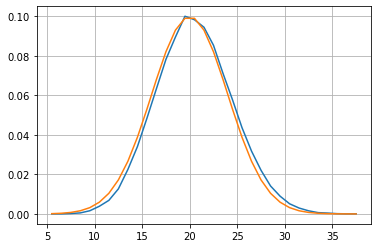

In [76]:
sample_size = 100
p = 0.2
se = np.sqrt(p * (1 - p) / sample_size)
binom = np.random.binomial(sample_size, p, 100_000)
h, bin_edges = np.histogram(binom, density=True, bins=range(min(binom), max(binom) + 1))
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.plot(bin_centers, h)
plt.plot(bin_centers, normal_pdf(bin_centers / sample_size, mu=p, sigma=se) / sample_size)
plt.grid()

In [63]:
se

In [49]:
skewtest(binom)

SkewtestResult(statistic=0.616039752270962, pvalue=0.5378682837194823)

In [50]:
binom.std()

0.07917333090717796

In [51]:
np.sqrt(sum((binom - p)**2) / (100_000 - 1))

0.07917421572436781

In [94]:
norm.ppf(0.1)

-1.2815515655446004

In [ ]:
def get_CI_of_p(sample_size, num_successes, p_edges=)